In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

import shap
from sklearn.metrics import  RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve,auc, roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
# import SVC classifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import matplotlib
from sklearn.model_selection import RandomizedSearchCV
import sklearn
#from skopt import BayesSearchCV, space
import optuna
import optuna.study
from optuna import distributions
from optuna import integration
from optuna.study import create_study
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
import joblib
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
신혼가구 = pd.read_csv('신혼가구_변수추가.csv', encoding='cp949')
신혼가구.rename(columns = {'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'target'}, inplace=True)

In [3]:
신혼가구.columns = [
    'Cat_현재 거주 지역', 'Cat_현재 주택의 유형','Cat_현재 주택의 위치',
    '현재 주택 거주 기간(총 개월)','현재 무주택 기간(총 개월)',
    'Cat_현재 주택의 점유형태','Cat_현재 주택의 구조', '현재 주택의 면적(㎡)',
    'Cat_현재 상업시설 접근용이성', 'Cat_현재 의료시설 접근용이성',
    'Cat_현재 공공기관 접근용이성', 'Cat_현재 문화시설 접근용이성',
    'Cat_현재 도시공원 및 녹지 접근용이성', 'Cat_현재 대중교통 접근용이성',
    'Cat_현재 주차시설 이용편의성', 'Cat_현재 주변도로의 보행 안전',
    'Cat_현재 교육환경', 'Cat_현재 치안 및 범죄 등 방범 상태',
    'Cat_현재 자동차 경적/집주변의 소음 정도', 'Cat_현재 청소/쓰레기 처리상태',
    'Cat_현재 대기오염 정도', 'Cat_현재 주택에 대한 전반적인 만족도',
    '총 이사 횟수', 'Cat_이사 예상 기간','Cat_이사 계획 첫 번째 이유',
    'Cat_이사 계획 중인 거주 지역', 'Cat_이사 계획 중인 주택의 유형', 'Cat_이사 계획 중인 주택의 점유형태',
    'Cat_주택 보유 의식', 'Cat_현재 가장 필요한 주거지원 1순위',
    '가구주 나이','Cat_가구주 성별','Cat_가구주 주민등록상 등재 여부','Cat_가구주 동거 여부','Cat_가구주 장애 여부',
    '총 가구원 수','Cat_기초생활보장 수급가구 여부','Cat_소득 계층',
    '소득 대비 주택 임대료의 비율', '소득 중 근로/사업소득의 비중(월평균)',
    '소득 중 재산소득의 비중(월평균)', '소득 중 사회보험 수혜금의 비중(월평균)',
    '소득 중 정부 보조금의 비중(월평균)', '소득 중 사적이전소득의 비중(월평균)', 
    '소득 대비 생활비의 비율', '소득 대비 주거관리비의 비율',
    '자산 중 부동산 자산의 비중', '자산 중 금융자산의 비중', '자산 중 기타자산의 비중',
    '부채 중 금융기관 대출금의 비중', '부채 중 비금융기관 대출금의 비중', '부채 중 임대 보증금의 비중',
    '중기부채부담지표', '장기부채부담지표', 'Cat_가구주 최종 학력', 'Cat_가구주 종사상 지위',
    'Cat_주택 마련 예상 소요연수','Cat_남편/아내의 부모님과 동거 의향','Cat_가족계획 시 중요 고려 사항 1순위',
    'target'    
]

In [4]:
cat = 신혼가구.select_dtypes(include = 'object')

In [5]:
num = 신혼가구.select_dtypes(exclude = 'object')
num_신혼 = num.drop('target',axis=1)

In [6]:
scaler=RobustScaler()
scaler.fit(num_신혼)
num_scaled_신혼=scaler.transform(num_신혼)
num_df_scaled_신혼=pd.DataFrame(data=num_scaled_신혼, columns=num_신혼.columns)
num_df_scaled_신혼

,현재 주택 거주 기간(총 개월),현재 무주택 기간(총 개월),현재 주택의 면적(㎡),총 이사 횟수,가구주 나이,총 가구원 수,소득 대비 주택 임대료의 비율,소득 중 근로/사업소득의 비중(월평균),소득 중 재산소득의 비중(월평균),소득 중 사회보험 수혜금의 비중(월평균),...,소득 대비 생활비의 비율,소득 대비 주거관리비의 비율,자산 중 부동산 자산의 비중,자산 중 금융자산의 비중,자산 중 기타자산의 비중,부채 중 금융기관 대출금의 비중,부채 중 비금융기관 대출금의 비중,부채 중 임대 보증금의 비중,중기부채부담지표,장기부채부담지표
0,-0.5,5.250000,-1.418179,2.0,2.000000,-0.5,-0.017499,0.000000,0.0,0.0,...,0.789050,-0.096618,0.0,0.289157,-0.250968,0.000000,0.000000,0.0,0.071642,0.079739
1,0.5,2.000000,0.289291,1.0,2.000000,-0.5,0.396639,0.000000,0.0,0.0,...,0.129630,-0.615385,0.0,0.289157,-0.250968,0.000000,0.000000,0.0,-0.001225,-0.001224
2,0.5,1.583333,0.691048,0.5,0.571429,0.0,-0.073950,-0.857143,0.0,0.0,...,-0.162037,-1.367521,0.0,-0.941613,1.100399,1.000000,0.000000,0.0,0.244170,0.229467
3,-0.5,1.250000,-0.313346,0.5,0.714286,-0.5,0.072605,0.000000,0.0,0.0,...,0.185185,-0.981685,0.0,0.289157,-0.250968,0.000000,0.000000,0.0,0.000900,0.001137
4,2.5,0.895833,0.691048,0.0,0.857143,0.5,1.573109,0.000000,0.0,0.0,...,0.685185,-1.020757,0.0,-0.216461,0.304193,1.000000,0.000000,0.0,0.403557,0.420097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,-0.5,-0.500000,0.385863,0.0,-0.428571,-0.5,7.235854,-10.666667,0.0,0.0,...,7.777778,11.794872,0.0,-5.425129,6.023235,0.576271,42.372881,0.0,4.778940,1.516185
6115,-0.5,3.500000,0.686654,0.5,0.428571,-0.5,1.043697,0.000000,0.0,0.0,...,1.296296,0.376068,0.0,-3.347207,3.741707,0.000000,0.000000,0.0,-0.000450,-0.000818
6116,1.0,-0.145833,-0.015191,-0.5,-0.142857,0.0,0.161345,0.000000,0.0,0.0,...,0.518519,1.018803,0.0,0.289157,-0.250968,0.000000,0.000000,0.0,-0.000450,-0.000364
6117,0.0,-0.750000,0.085072,-0.5,0.428571,-0.5,0.208403,0.000000,0.0,0.0,...,1.296296,0.526496,0.0,-0.438116,0.547567,0.000000,0.000000,0.0,-0.001080,-0.001091


In [7]:
target = 신혼가구.target

In [8]:
enc = OneHotEncoder()
enc.fit(cat)

X_cat = enc.transform(cat).toarray()
new_feature_names = enc.get_feature_names_out(cat.columns)
cat2 = pd.DataFrame(X_cat, columns= new_feature_names)

In [9]:
comp =pd.concat([num_df_scaled_신혼, target,cat2],axis=1)

In [10]:
X =comp.drop('target', axis = 1)
y=comp.target
X.shape

(6119, 221)

In [11]:
def combine_one_hot(shap_values, name, mask, return_original=True):
    """  shap_values: an Explanation object
          name: name of new feature
          mask: bool array same lenght as features

         This function assumes that shap_values[:, mask] make up a one-hot-encoded feature
    """
    mask = np.array(mask)
    mask_col_names = np.array(shap_values.feature_names, dtype='object')[mask]

    sv_name = shap.Explanation(shap_values.values[:, mask],
                               feature_names=list(mask_col_names),
                               data=shap_values.data[:, mask],
                               base_values=shap_values.base_values,
                               display_data=shap_values.display_data,
                               instance_names=shap_values.instance_names,
                               output_names=shap_values.output_names,
                               output_indexes=shap_values.output_indexes,
                               lower_bounds=shap_values.lower_bounds,
                               upper_bounds=shap_values.upper_bounds,
                               main_effects=shap_values.main_effects,
                               hierarchical_values=shap_values.hierarchical_values,
                               clustering=shap_values.clustering,
                               )

    new_data = (sv_name.data * np.arange(sum(mask))).sum(axis=1).astype(int)

    svdata = np.concatenate([
        shap_values.data[:, ~mask],
        new_data.reshape(-1, 1)
    ], axis=1)

    if shap_values.display_data is None:
        svdd = shap_values.data[:, ~mask]
    else:
        svdd = shap_values.display_data[:, ~mask]

    svdisplay_data = np.concatenate([
        svdd,
        mask_col_names[new_data].reshape(-1, 1)
    ], axis=1)

    new_values = sv_name.values.sum(axis=1)
    svvalues = np.concatenate([
        shap_values.values[:, ~mask],
        new_values.reshape(-1, 1)
    ], axis=1)
    svfeature_names = list(np.array(shap_values.feature_names)[~mask]) + [name]

    sv = shap.Explanation(svvalues,
                          base_values=shap_values.base_values,
                          data=svdata,
                          display_data=svdisplay_data,
                          instance_names=shap_values.instance_names,
                          feature_names=svfeature_names,
                          output_names=shap_values.output_names,
                          output_indexes=shap_values.output_indexes,
                          lower_bounds=shap_values.lower_bounds,
                          upper_bounds=shap_values.upper_bounds,
                          main_effects=shap_values.main_effects,
                          hierarchical_values=shap_values.hierarchical_values,
                          clustering=shap_values.clustering,
                          )
    if return_original:
        return sv, sv_name
    else:
        return sv

In [12]:
import operator

class EarlyStoppingCallback(object):
    """Early stopping callback for Optuna."""

    def __init__(self, early_stopping_rounds: int, direction: str = "minimize"):
        self.early_stopping_rounds = early_stopping_rounds

        self._iter = 0

        if direction == "minimize":
            self._operator = operator.lt
            self._score = np.inf
        elif direction == "maximize":
            self._operator = operator.gt
            self._score = -np.inf
        else:
            ValueError(f"invalid direction: {direction}")

    def __call__(self, study, trial):
        """Do early stopping."""
        if self._operator(study.best_value, self._score):
            self._iter = 0
            self._score = study.best_value
        else:
            self._iter += 1

        if self._iter >= self.early_stopping_rounds:
            study.stop()

In [13]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [16]:
tuning_roc_auc_score=[]

In [17]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X)
shap_base_values = np.zeros_like(X)
shap_data = np.zeros_like(X)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X, y)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    base = RandomForestClassifier(random_state = 0)
    base.fit(X_train, y_train)
    base_proba = base.predict_proba(X_test)[:, 1]
    base_score[index] = roc_auc_score(y_test, base_proba)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result = optuna_search.fit(X_train, y_train) 
    result.best_estimator_.fit(X_train, y_train)      

    explainer = shap.TreeExplainer(result.best_estimator_)     
    
    shap_values_te = explainer(X_test, check_additivity = False)   
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
       
    y_train_pred_proba = result.best_estimator_.predict_proba(X_train)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train, y_train_pred_proba)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba = result.best_estimator_.predict_proba(X_test)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test, y_test_pred_proba)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8007305194805194
Train ROC_AUC: 0.8610712768848052
TEST ROC_AUC: 0.8009227614490773

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7766468728639782
Train ROC_AUC: 0.8927702198268925
TEST ROC_AUC: 0.7767216336295284

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7725617310321258
Train ROC_AUC: 0.8624985820598252
TEST ROC_AUC: 0.7628908920027341

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7821951896787422
Train ROC_AUC: 0.8877293435794349
TEST ROC_AUC: 0.769865003417635

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7752477785372522
Train ROC_AUC: 0.8748485112287673
TEST ROC_AUC: 0.7644288277511961

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7477838773069035
Train ROC_AUC: 0.8640033133634597
TEST ROC_AUC: 0.7398966165413534

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7481203007518797
Train ROC_AUC: 0.864163045972918
TEST ROC_AUC: 0.7415627136021873

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [18]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767]

In [19]:
new_shap_values = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X.columns)

In [20]:
new_shap_values_001,sv_주택유형 = combine_one_hot(new_shap_values, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values.feature_names])
new_shap_values_002,sv_점유형태 = combine_one_hot(new_shap_values_001, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_001.feature_names])
new_shap_values_003,sv_거주지 = combine_one_hot(new_shap_values_002, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_002.feature_names])
new_shap_values_004,sv_최종학력 = combine_one_hot(new_shap_values_003, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_003.feature_names])
new_shap_values_005,sv_종사상지위 = combine_one_hot(new_shap_values_004, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_004.feature_names])
new_shap_values_006,sv_국민기초생활보장급여여부 = combine_one_hot(new_shap_values_005, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_005.feature_names])
new_shap_values_007,sv_성별 = combine_one_hot(new_shap_values_006, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_006.feature_names])
new_shap_values_008,sv_주택구조 = combine_one_hot(new_shap_values_007, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_007.feature_names])
new_shap_values_009,sv_이사계획 = combine_one_hot(new_shap_values_008, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_008.feature_names])
new_shap_values_010,sv_소득계층 = combine_one_hot(new_shap_values_009, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_009.feature_names])
new_shap_values_011,sv_상업시설 = combine_one_hot(new_shap_values_010, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_010.feature_names])
new_shap_values_012,sv_의료시설 = combine_one_hot(new_shap_values_011, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_011.feature_names])
new_shap_values_013,sv_공공기관 = combine_one_hot(new_shap_values_012, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_012.feature_names])
new_shap_values_014,sv_문화시설 = combine_one_hot(new_shap_values_013, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_013.feature_names])
new_shap_values_015,sv_도시공원 = combine_one_hot(new_shap_values_014, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_014.feature_names])
new_shap_values_016,sv_대중교통 = combine_one_hot(new_shap_values_015, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_015.feature_names])
new_shap_values_017,sv_주차시설 = combine_one_hot(new_shap_values_016, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_016.feature_names])
new_shap_values_018,sv_보행안전 = combine_one_hot(new_shap_values_017, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_017.feature_names])
new_shap_values_019,sv_교육환경 = combine_one_hot(new_shap_values_018, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_018.feature_names])
new_shap_values_020,sv_방범상태 = combine_one_hot(new_shap_values_019, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_019.feature_names])
new_shap_values_021,sv_소음정도 = combine_one_hot(new_shap_values_020, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_020.feature_names])
new_shap_values_022,sv_청소상태 = combine_one_hot(new_shap_values_021, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_021.feature_names])
new_shap_values_023,sv_대기오염 = combine_one_hot(new_shap_values_022, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_022.feature_names])
new_shap_values_024,sv_주거지원 = combine_one_hot(new_shap_values_023, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_023.feature_names])
new_shap_values_025,sv_주택만족도 = combine_one_hot(new_shap_values_024, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_024.feature_names])
new_shap_values_026,sv_주택위치 = combine_one_hot(new_shap_values_025, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_025.feature_names])
new_shap_values_027,sv_이사예상기간 = combine_one_hot(new_shap_values_026, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_026.feature_names])
new_shap_values_028,sv_이사이유 = combine_one_hot(new_shap_values_027, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_027.feature_names])
new_shap_values_029,sv_이사지역 = combine_one_hot(new_shap_values_028, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_028.feature_names])
new_shap_values_030,sv_이사주택유형 = combine_one_hot(new_shap_values_029, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_029.feature_names])
new_shap_values_031,sv_주택보유의식 = combine_one_hot(new_shap_values_030, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_030.feature_names])
new_shap_values_032,sv_주민등록 = combine_one_hot(new_shap_values_031, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_031.feature_names])
new_shap_values_033,sv_동거여부 = combine_one_hot(new_shap_values_032, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_032.feature_names])
new_shap_values_034,sv_장애여부 = combine_one_hot(new_shap_values_033, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_033.feature_names])
new_shap_values_035,sv_소요연수 = combine_one_hot(new_shap_values_034, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_034.feature_names])
new_shap_values_036,sv_동거의향 = combine_one_hot(new_shap_values_035, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_035.feature_names])
shap_values_0,sv_고려사항 = combine_one_hot(new_shap_values_036, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_036.feature_names])

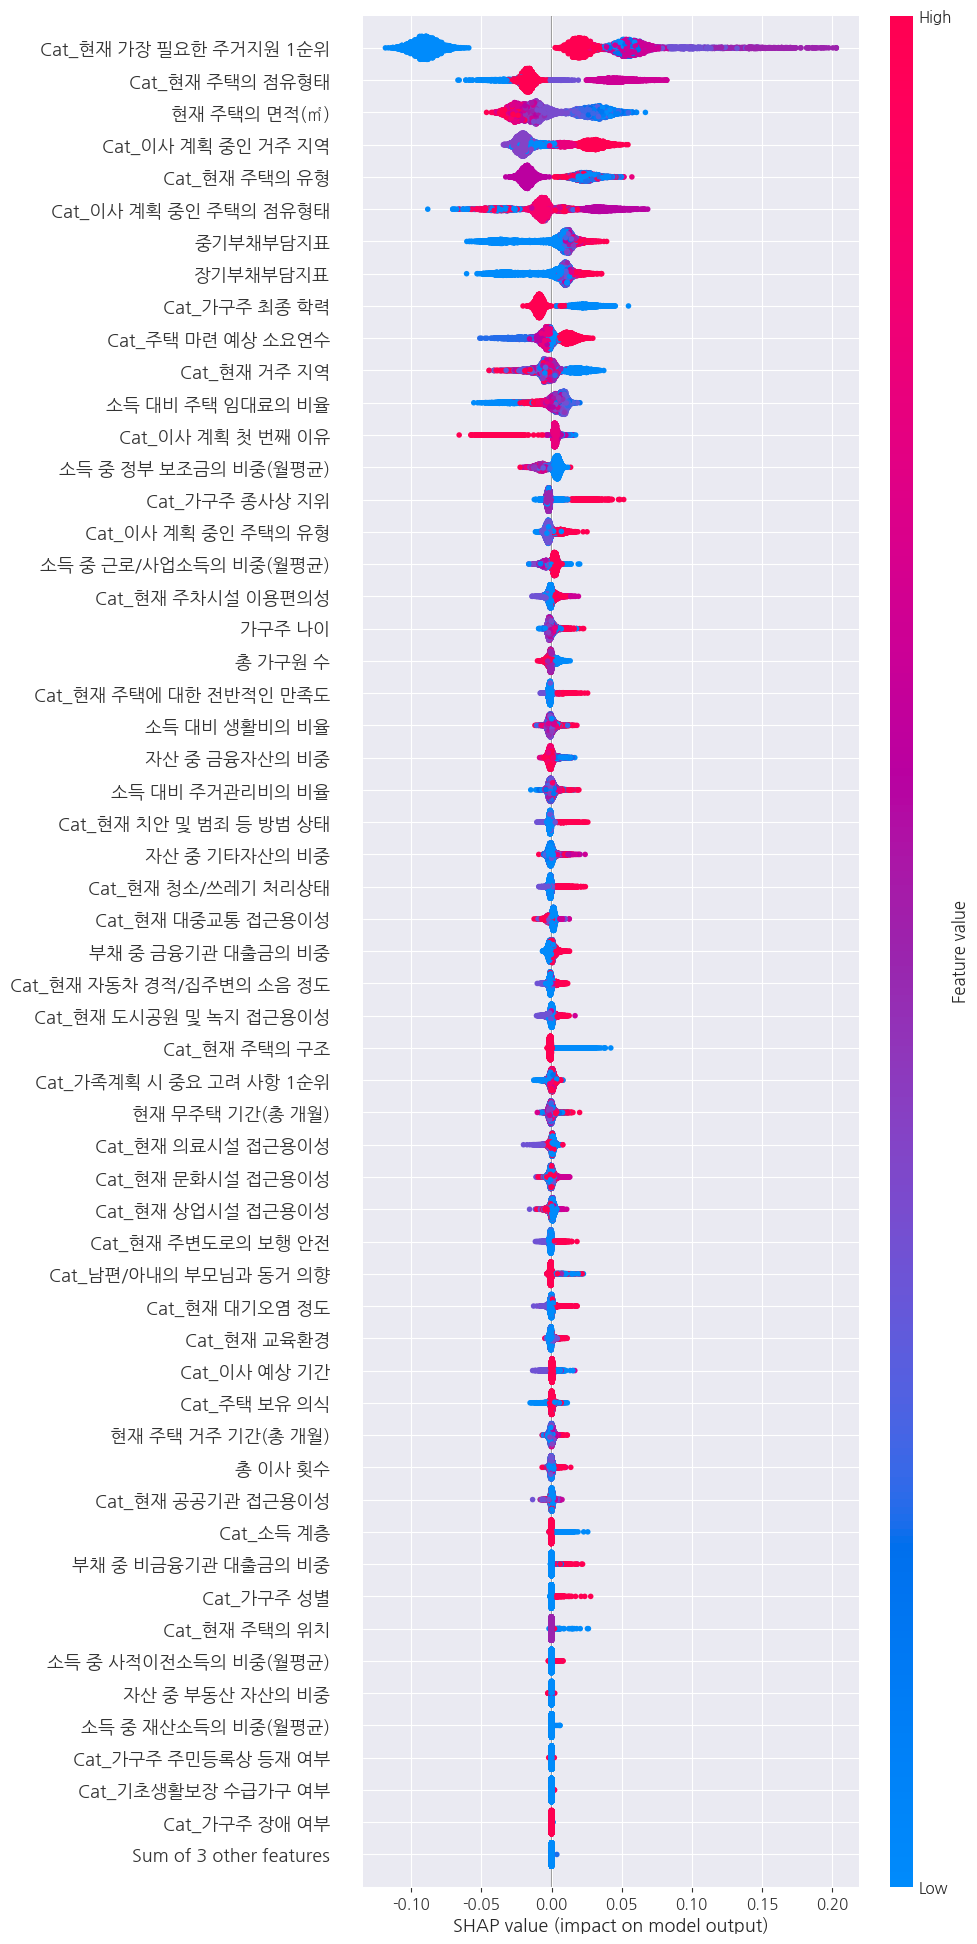

In [21]:
shap.initjs()
shap.plots.beeswarm(shap_values_0, max_display=57)

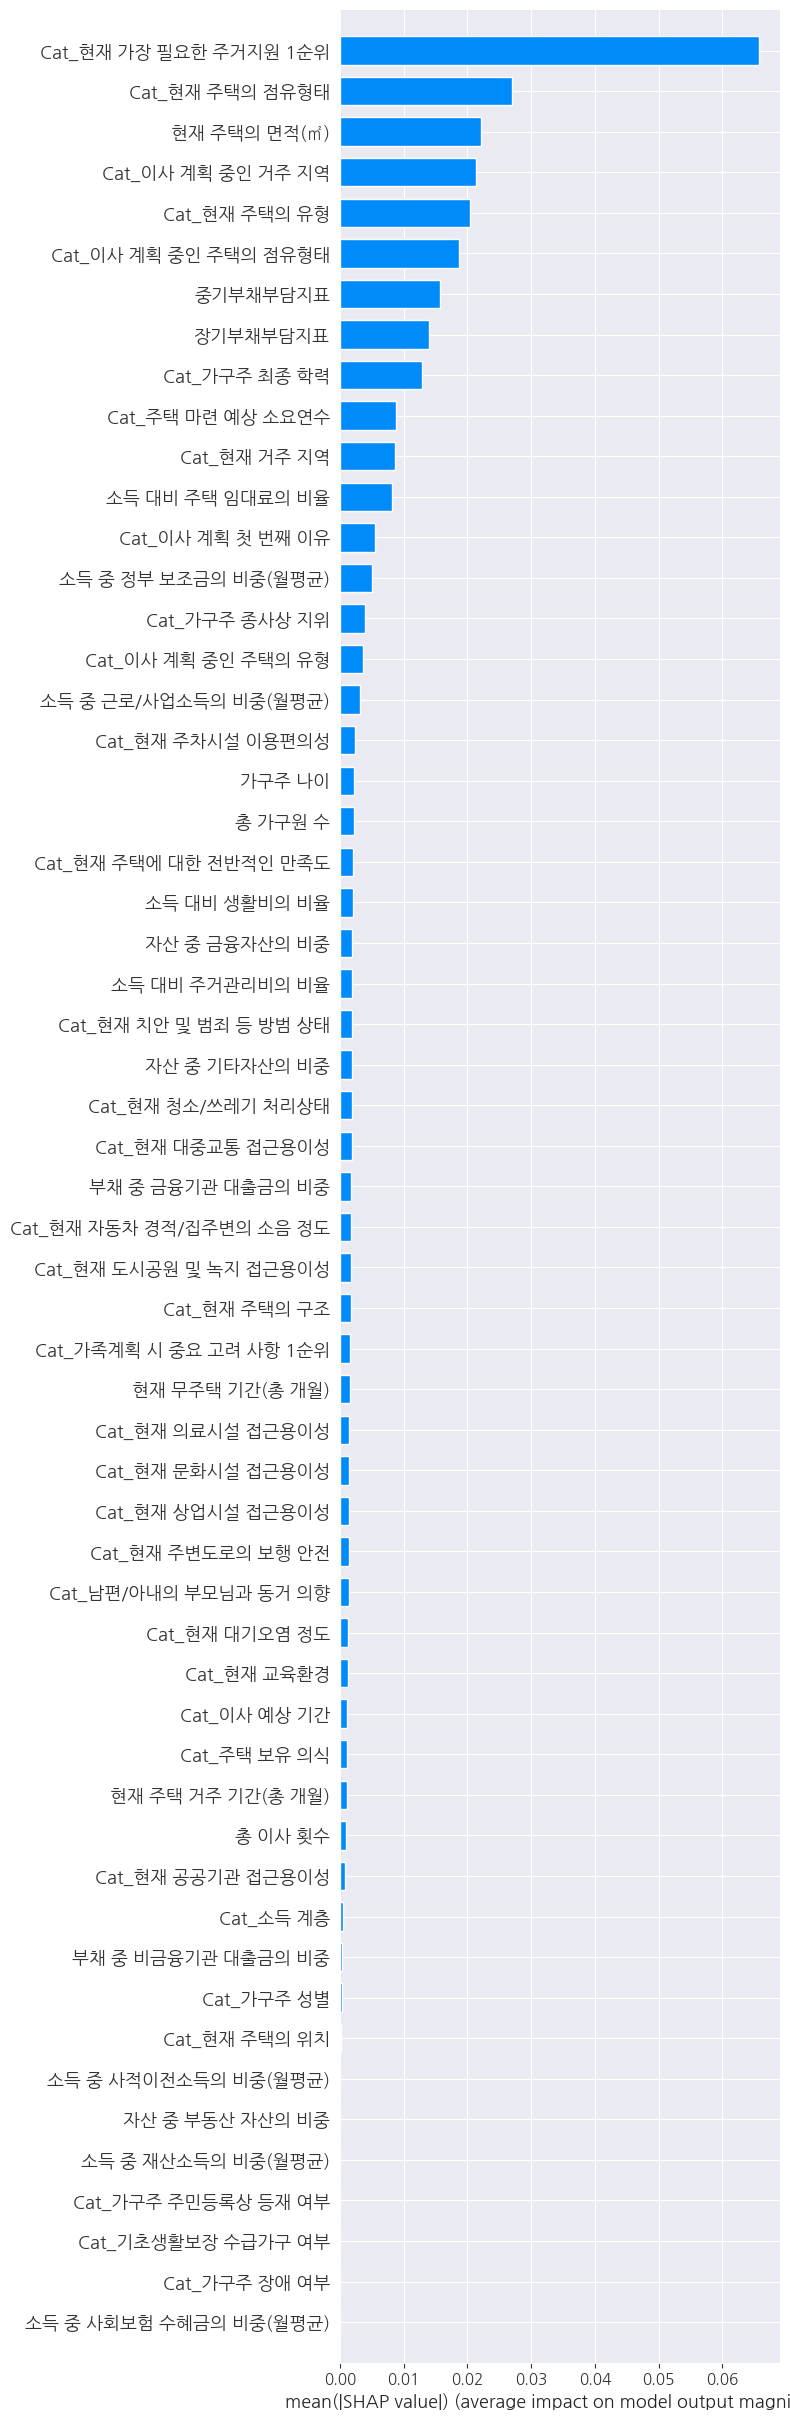

In [22]:
shap.initjs()
shap.summary_plot(shap_values_0, plot_type="bar",max_display=57)

In [23]:
mean_shap_values = np.mean(np.abs(shap_values_0.values), axis=0)
df_feature_importance = pd.DataFrame(list(zip(shap_values_0.feature_names, mean_shap_values)), columns=['feature','shap_importance'])
df_feature_importance = df_feature_importance.sort_values('shap_importance')
df_feature_importance = df_feature_importance.reset_index(drop=True)
df_feature_importance 

,feature,shap_importance
0,Cat_가구주 동거 여부,0.000000
1,부채 중 임대 보증금의 비중,0.000000
2,소득 중 사회보험 수혜금의 비중(월평균),0.000001
3,Cat_가구주 장애 여부,0.000006
4,Cat_기초생활보장 수급가구 여부,0.000006
5,Cat_가구주 주민등록상 등재 여부,0.000009
6,소득 중 재산소득의 비중(월평균),0.000010
7,자산 중 부동산 자산의 비중,0.000033
8,소득 중 사적이전소득의 비중(월평균),0.000080
9,Cat_현재 주택의 위치,0.000140


In [24]:
column_to_drop = df_feature_importance.loc[0, 'feature']
column_to_drop

'Cat_가구주 동거 여부'

In [25]:
if not column_to_drop.startswith('Cat_'):
    comp_1 = comp.drop(column_to_drop, axis=1)
    X_1 = comp_1.drop('target', axis=1)
    y_1 = comp_1['target']
else:
    comp_1 = comp.drop(comp.filter(regex='^' + column_to_drop).columns, axis=1)
    X_1 = comp_1.drop('target', axis=1)
    y_1 = comp_1['target']

print(X_1.shape)

(6119, 219)


In [26]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_1)
shap_base_values = np.zeros_like(X_1)
shap_data = np.zeros_like(X_1)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_1, y_1)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_1, X_test_1 = X_1.iloc[train_index], X_1.iloc[test_index]
    y_train_1, y_test_1 = y_1.iloc[train_index], y_1.iloc[test_index]
    
    base_1 = RandomForestClassifier(random_state = 0)
    base_1.fit(X_train_1, y_train_1)
    base_proba_1 = base_1.predict_proba(X_test_1)[:, 1]
    base_score[index] = roc_auc_score(y_test_1, base_proba_1)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_1 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_1 = optuna_search_1.fit(X_train_1, y_train_1) 
    result_1.best_estimator_.fit(X_train_1, y_train_1)      

    explainer_1 = shap.TreeExplainer(result_1.best_estimator_) 
    shap_values_te_1 = explainer_1(X_test_1, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_1[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te_1[:,:,1].base_values[:, np.newaxis], (1, X_1.shape[1]))
    shap_data[test_index,:] = shap_values_te_1[:,:,1].data
    
    
    y_train_pred_proba_1 = result_1.best_estimator_.predict_proba(X_train_1)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_1, y_train_pred_proba_1)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_1 = result_1.best_estimator_.predict_proba(X_test_1)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_1, y_test_pred_proba_1)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8110475051264524
Train ROC_AUC: 0.8739957686027156
TEST ROC_AUC: 0.8021723342447027

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7783930707450445
Train ROC_AUC: 0.8974361003611462
TEST ROC_AUC: 0.7813674812030076

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7630190533151059
Train ROC_AUC: 0.8982612755921714
TEST ROC_AUC: 0.7623355263157894

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7837224453178401
Train ROC_AUC: 0.8672264562575348
TEST ROC_AUC: 0.7754507006151743

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7683430878332194
Train ROC_AUC: 0.8785435973735791
TEST ROC_AUC: 0.7662978468899522

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7469027682843473
Train ROC_AUC: 0.8998625587291035
TEST ROC_AUC: 0.7436560150375939

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7440137987012988
Train ROC_AUC: 0.8992343123056104
TEST ROC_AUC: 0.7450444292549556

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [27]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769]

In [28]:
new_shap_values_1 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_1.columns)

In [29]:
new_shap_values_01_1,sv_주택유형_1 = combine_one_hot(new_shap_values_1, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_1.feature_names])
new_shap_values_02_1,sv_점유형태_1 = combine_one_hot(new_shap_values_01_1, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_1.feature_names])
new_shap_values_03_1,sv_거주지_1 = combine_one_hot(new_shap_values_02_1, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_1.feature_names])
new_shap_values_04_1,sv_최종학력_1 = combine_one_hot(new_shap_values_03_1, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_1.feature_names])
new_shap_values_05_1,sv_종사상지위_1 = combine_one_hot(new_shap_values_04_1, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_1.feature_names])
new_shap_values_06_1,sv_국민기초생활보장급여여부_1 = combine_one_hot(new_shap_values_05_1, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_1.feature_names])
new_shap_values_07_1,sv_성별_1 = combine_one_hot(new_shap_values_06_1, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_1.feature_names])
new_shap_values_08_1,sv_주택구조_1 = combine_one_hot(new_shap_values_07_1, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_1.feature_names])
new_shap_values_09_1,sv_이사계획_1 = combine_one_hot(new_shap_values_08_1, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_1.feature_names])
new_shap_values_10_1,sv_소득계층_1 = combine_one_hot(new_shap_values_09_1, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_1.feature_names])
new_shap_values_11_1,sv_상업시설_1 = combine_one_hot(new_shap_values_10_1, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_1.feature_names])
new_shap_values_12_1,sv_의료시설_1 = combine_one_hot(new_shap_values_11_1, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_1.feature_names])
new_shap_values_13_1,sv_공공기관_1 = combine_one_hot(new_shap_values_12_1, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_1.feature_names])
new_shap_values_14_1,sv_문화시설_1 = combine_one_hot(new_shap_values_13_1, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_1.feature_names])
new_shap_values_15_1,sv_도시공원_1 = combine_one_hot(new_shap_values_14_1, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_1.feature_names])
new_shap_values_16_1,sv_대중교통_1 = combine_one_hot(new_shap_values_15_1, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_1.feature_names])
new_shap_values_17_1,sv_주차시설_1 = combine_one_hot(new_shap_values_16_1, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_1.feature_names])
new_shap_values_18_1,sv_보행안전_1 = combine_one_hot(new_shap_values_17_1, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_1.feature_names])
new_shap_values_19_1,sv_교육환경_1 = combine_one_hot(new_shap_values_18_1, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_1.feature_names])
new_shap_values_20_1,sv_방범상태_1 = combine_one_hot(new_shap_values_19_1, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_1.feature_names])
new_shap_values_21_1,sv_소음정도_1 = combine_one_hot(new_shap_values_20_1, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_1.feature_names])
new_shap_values_22_1,sv_청소상태_1 = combine_one_hot(new_shap_values_21_1, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_1.feature_names])
new_shap_values_23_1,sv_대기오염_1 = combine_one_hot(new_shap_values_22_1, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_1.feature_names])
new_shap_values_24_1,sv_주거지원_1 = combine_one_hot(new_shap_values_23_1, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_1.feature_names])
new_shap_values_25_1,sv_주택만족도_1 = combine_one_hot(new_shap_values_24_1, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_1.feature_names])
new_shap_values_26_1,sv_주택위치_1 = combine_one_hot(new_shap_values_25_1, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_1.feature_names])
new_shap_values_27_1,sv_이사예상기간_1 = combine_one_hot(new_shap_values_26_1, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_1.feature_names])
new_shap_values_28_1,sv_이사이유_1 = combine_one_hot(new_shap_values_27_1, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_1.feature_names])
new_shap_values_29_1,sv_이사지역_1 = combine_one_hot(new_shap_values_28_1, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_1.feature_names])
new_shap_values_30_1,sv_이사주택유형_1 = combine_one_hot(new_shap_values_29_1, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_1.feature_names])
new_shap_values_31_1,sv_주택보유의식_1 = combine_one_hot(new_shap_values_30_1, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_1.feature_names])
new_shap_values_32_1,sv_주민등록_1 = combine_one_hot(new_shap_values_31_1, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_1.feature_names])
#new_shap_values_33_1,sv_동거여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_1.feature_names])
new_shap_values_34_1,sv_장애여부_1 = combine_one_hot(new_shap_values_32_1, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_1.feature_names])
new_shap_values_35_1,sv_소요연수_1 = combine_one_hot(new_shap_values_34_1, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_34_1.feature_names])
new_shap_values_36_1,sv_동거의향_1 = combine_one_hot(new_shap_values_35_1, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_1.feature_names])
shap_values_1,sv_고려사항_1 = combine_one_hot(new_shap_values_36_1, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_1.feature_names])

In [30]:
mean_shap_values_1 = np.mean(np.abs(shap_values_1.values), axis=0)
df_feature_importance_1 = pd.DataFrame(list(zip(shap_values_1.feature_names, mean_shap_values_1)), columns=['feature','shap_importance'])
df_feature_importance_1 = df_feature_importance_1.sort_values('shap_importance')
df_feature_importance_1 = df_feature_importance_1.reset_index(drop=True)
df_feature_importance_1

,feature,shap_importance
0,부채 중 임대 보증금의 비중,0.000000
1,소득 중 사회보험 수혜금의 비중(월평균),0.000002
2,소득 중 재산소득의 비중(월평균),0.000015
3,Cat_기초생활보장 수급가구 여부,0.000022
4,Cat_가구주 주민등록상 등재 여부,0.000024
5,Cat_가구주 장애 여부,0.000029
6,자산 중 부동산 자산의 비중,0.000053
7,소득 중 사적이전소득의 비중(월평균),0.000120
8,Cat_현재 주택의 위치,0.000141
9,Cat_가구주 성별,0.000334


In [31]:
column_to_drop_1 = df_feature_importance_1.loc[0, 'feature']
column_to_drop_1

'부채 중 임대 보증금의 비중'

In [32]:
if not column_to_drop_1.startswith('Cat_'):
    comp_2 = comp_1.drop(column_to_drop_1, axis=1)
    X_2 = comp_2.drop('target', axis=1)
    y_2 = comp_2['target']
else:
    comp_2 = comp_1.drop(comp_1.filter(regex='^' + column_to_drop_1).columns, axis=1)
    X_2 = comp_2.drop('target', axis=1)
    y_2 = comp_2['target']

print(X_2.shape)

(6119, 218)


In [33]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_2)
shap_base_values = np.zeros_like(X_2)
shap_data = np.zeros_like(X_2)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_2, y_2)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_2, X_test_2 = X_2.iloc[train_index], X_2.iloc[test_index]
    y_train_2, y_test_2 = y_2.iloc[train_index], y_2.iloc[test_index]
    
    base_2 = RandomForestClassifier(random_state = 0)
    base_2.fit(X_train_2, y_train_2)
    base_proba_2 = base_2.predict_proba(X_test_2)[:, 1]
    base_score[index] = roc_auc_score(y_test_2, base_proba_2)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_2 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_2 = optuna_search_2.fit(X_train_2, y_train_2) 
    result_2.best_estimator_.fit(X_train_2, y_train_2)      

    explainer_2 = shap.TreeExplainer(result_2.best_estimator_)
    shap_values_te_2 = explainer_2(X_test_2, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_2[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te_2[:,:,1].base_values[:, np.newaxis], (1, X_2.shape[1]))
    shap_data[test_index,:] = shap_values_te_2[:,:,1].data    
    
    y_train_pred_proba_2 = result_2.best_estimator_.predict_proba(X_train_2)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_2, y_train_pred_proba_2)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_2 = result_2.best_estimator_.predict_proba(X_test_2)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_2, y_test_pred_proba_2)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8003887559808613
Train ROC_AUC: 0.8998126999955153
TEST ROC_AUC: 0.8057822112098427

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7805557928913192
Train ROC_AUC: 0.8985112287671704
TEST ROC_AUC: 0.7791353383458647

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7646370898838004
Train ROC_AUC: 0.9027256107694865
TEST ROC_AUC: 0.7641725051264524

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7907819976076554
Train ROC_AUC: 0.8765873675380074
TEST ROC_AUC: 0.7788469753930279

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7684765892002734
Train ROC_AUC: 0.8769432375465283
TEST ROC_AUC: 0.7721825871496925

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7519758202323991
Train ROC_AUC: 0.9014741301761412
TEST ROC_AUC: 0.7373120300751881

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7395708732057417
Train ROC_AUC: 0.9019047882850443
TEST ROC_AUC: 0.7364255809979494

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [34]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769]

In [35]:
new_shap_values_2 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_2.columns)

In [36]:
new_shap_values_01_2,sv_주택유형_2 = combine_one_hot(new_shap_values_2, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_2.feature_names])
new_shap_values_02_2,sv_점유형태_2 = combine_one_hot(new_shap_values_01_2, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_2.feature_names])
new_shap_values_03_2,sv_거주지_2 = combine_one_hot(new_shap_values_02_2, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_2.feature_names])
new_shap_values_04_2,sv_최종학력_2 = combine_one_hot(new_shap_values_03_2, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_2.feature_names])
new_shap_values_05_2,sv_종사상지위_2 = combine_one_hot(new_shap_values_04_2, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_2.feature_names])
new_shap_values_06_2,sv_국민기초생활보장급여여부_2 = combine_one_hot(new_shap_values_05_2, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_2.feature_names])
new_shap_values_07_2,sv_성별_2 = combine_one_hot(new_shap_values_06_2, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_2.feature_names])
new_shap_values_08_2,sv_주택구조_2 = combine_one_hot(new_shap_values_07_2, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_2.feature_names])
new_shap_values_09_2,sv_이사계획_2 = combine_one_hot(new_shap_values_08_2, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_2.feature_names])
new_shap_values_10_2,sv_소득계층_2 = combine_one_hot(new_shap_values_09_2, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_2.feature_names])
new_shap_values_11_2,sv_상업시설_2 = combine_one_hot(new_shap_values_10_2, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_2.feature_names])
new_shap_values_12_2,sv_의료시설_2 = combine_one_hot(new_shap_values_11_2, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_2.feature_names])
new_shap_values_13_2,sv_공공기관_2 = combine_one_hot(new_shap_values_12_2, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_2.feature_names])
new_shap_values_14_2,sv_문화시설_2 = combine_one_hot(new_shap_values_13_2, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_2.feature_names])
new_shap_values_15_2,sv_도시공원_2 = combine_one_hot(new_shap_values_14_2, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_2.feature_names])
new_shap_values_16_2,sv_대중교통_2 = combine_one_hot(new_shap_values_15_2, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_2.feature_names])
new_shap_values_17_2,sv_주차시설_2 = combine_one_hot(new_shap_values_16_2, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_2.feature_names])
new_shap_values_18_2,sv_보행안전_2 = combine_one_hot(new_shap_values_17_2, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_2.feature_names])
new_shap_values_19_2,sv_교육환경_2 = combine_one_hot(new_shap_values_18_2, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_2.feature_names])
new_shap_values_20_2,sv_방범상태_2 = combine_one_hot(new_shap_values_19_2, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_2.feature_names])
new_shap_values_21_2,sv_소음정도_2 = combine_one_hot(new_shap_values_20_2, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_2.feature_names])
new_shap_values_22_2,sv_청소상태_2 = combine_one_hot(new_shap_values_21_2, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_2.feature_names])
new_shap_values_23_2,sv_대기오염_2 = combine_one_hot(new_shap_values_22_2, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_2.feature_names])
new_shap_values_24_2,sv_주거지원_2 = combine_one_hot(new_shap_values_23_2, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_2.feature_names])
new_shap_values_25_2,sv_주택만족도_2 = combine_one_hot(new_shap_values_24_2, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_2.feature_names])
new_shap_values_26_2,sv_주택위치_2 = combine_one_hot(new_shap_values_25_2, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_2.feature_names])
new_shap_values_27_2,sv_이사예상기간_2 = combine_one_hot(new_shap_values_26_2, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_2.feature_names])
new_shap_values_28_2,sv_이사이유_2 = combine_one_hot(new_shap_values_27_2, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_2.feature_names])
new_shap_values_29_2,sv_이사지역_2 = combine_one_hot(new_shap_values_28_2, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_2.feature_names])
new_shap_values_30_2,sv_이사주택유형_2 = combine_one_hot(new_shap_values_29_2, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_2.feature_names])
new_shap_values_31_2,sv_주택보유의식_2 = combine_one_hot(new_shap_values_30_2, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_2.feature_names])
new_shap_values_32_2,sv_주민등록_2 = combine_one_hot(new_shap_values_31_2, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_2.feature_names])
#new_shap_values_33_2,sv_동거여부_2 = combine_one_hot(new_shap_values_32_2, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_2.feature_names])
new_shap_values_34_2,sv_장애여부_2 = combine_one_hot(new_shap_values_32_2, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_2.feature_names])
new_shap_values_35_2,sv_소요연수_2 = combine_one_hot(new_shap_values_34_2, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_34_2.feature_names])
new_shap_values_36_2,sv_동거의향_2 = combine_one_hot(new_shap_values_35_2, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_2.feature_names])
shap_values_2,sv_고려사항_2 = combine_one_hot(new_shap_values_36_2, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_2.feature_names])

In [37]:
mean_shap_values_2 = np.mean(np.abs(shap_values_2.values), axis=0)
df_feature_importance_2 = pd.DataFrame(list(zip(shap_values_2.feature_names, mean_shap_values_2)), columns=['feature','shap_importance'])
df_feature_importance_2 = df_feature_importance_2.sort_values('shap_importance')
df_feature_importance_2 = df_feature_importance_2.reset_index(drop=True)
df_feature_importance_2

,feature,shap_importance
0,소득 중 사회보험 수혜금의 비중(월평균),0.000004
1,Cat_기초생활보장 수급가구 여부,0.000022
2,소득 중 재산소득의 비중(월평균),0.000027
3,Cat_가구주 주민등록상 등재 여부,0.000031
4,Cat_가구주 장애 여부,0.000041
5,자산 중 부동산 자산의 비중,0.000062
6,소득 중 사적이전소득의 비중(월평균),0.000124
7,Cat_현재 주택의 위치,0.000149
8,Cat_가구주 성별,0.000341
9,부채 중 비금융기관 대출금의 비중,0.000368


In [38]:
column_to_drop_2 = df_feature_importance_2.loc[0, 'feature']
column_to_drop_2

'소득 중 사회보험 수혜금의 비중(월평균)'

In [39]:
if not column_to_drop_2.startswith('Cat_'):
    comp_3 = comp_2.drop(column_to_drop_2, axis=1)
    X_3 = comp_3.drop('target', axis=1)
    y_3 = comp_3['target']
else:
    comp_3 = comp_2.drop(comp_2.filter(regex='^' + column_to_drop_2).columns, axis=1)
    X_3 = comp_3.drop('target', axis=1)
    y_3 = comp_3['target']

print(X_3.shape)

(6119, 217)


In [40]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_3)
shap_base_values = np.zeros_like(X_3)
shap_data = np.zeros_like(X_3)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_3, y_3)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_3, X_test_3 = X_3.iloc[train_index], X_3.iloc[test_index]
    y_train_3, y_test_3 = y_3.iloc[train_index], y_3.iloc[test_index]
    
    base_3 = RandomForestClassifier(random_state = 0)
    base_3.fit(X_train_3, y_train_3)
    base_proba_3 = base_3.predict_proba(X_test_3)[:, 1]
    base_score[index] = roc_auc_score(y_test_3, base_proba_3)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_3 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_3 = optuna_search_3.fit(X_train_3, y_train_3) 
    result_3.best_estimator_.fit(X_train_3, y_train_3)      

    explainer_3 = shap.TreeExplainer(result_3.best_estimator_)
    shap_values_te_3 = explainer_3(X_test_3, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_3[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te_3[:,:,1].base_values[:, np.newaxis], (1, X_3.shape[1]))
    shap_data[test_index,:] = shap_values_te_3[:,:,1].data   
    
    y_train_pred_proba_3 = result_3.best_estimator_.predict_proba(X_train_3)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_3, y_train_pred_proba_3)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_3 = result_3.best_estimator_.predict_proba(X_test_3)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_3, y_test_pred_proba_3)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8022043745727956
Train ROC_AUC: 0.8979296754433866
TEST ROC_AUC: 0.802717019822283

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7810524179767601
Train ROC_AUC: 0.88985717715151
TEST ROC_AUC: 0.7805344326725906

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7714776999316473
Train ROC_AUC: 0.8765024230289312
TEST ROC_AUC: 0.7638841421736158

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.794407894736842
Train ROC_AUC: 0.8820859416837479
TEST ROC_AUC: 0.7803315105946685

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7703829887218046
Train ROC_AUC: 0.9011360668581876
TEST ROC_AUC: 0.7692562371838688

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7528996496924129
Train ROC_AUC: 0.8939432190803307
TEST ROC_AUC: 0.7356138926862611

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7364416011619959
Train ROC_AUC: 0.9044742277831856
TEST ROC_AUC: 0.743089969241285

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.7

In [41]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769, 0.769]

In [42]:
new_shap_values_3 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_3.columns)

In [43]:
new_shap_values_01_3,sv_주택유형_3 = combine_one_hot(new_shap_values_3, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_3.feature_names])
new_shap_values_02_3,sv_점유형태_3 = combine_one_hot(new_shap_values_01_3, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_3.feature_names])
new_shap_values_03_3,sv_거주지_3 = combine_one_hot(new_shap_values_02_3, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_3.feature_names])
new_shap_values_04_3,sv_최종학력_3 = combine_one_hot(new_shap_values_03_3, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_3.feature_names])
new_shap_values_05_3,sv_종사상지위_3 = combine_one_hot(new_shap_values_04_3, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_3.feature_names])
new_shap_values_06_3,sv_국민기초생활보장급여여부_3 = combine_one_hot(new_shap_values_05_3, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_3.feature_names])
new_shap_values_07_3,sv_성별_3 = combine_one_hot(new_shap_values_06_3, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_3.feature_names])
new_shap_values_08_3,sv_주택구조_3 = combine_one_hot(new_shap_values_07_3, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_3.feature_names])
new_shap_values_09_3,sv_이사계획_3 = combine_one_hot(new_shap_values_08_3, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_3.feature_names])
new_shap_values_10_3,sv_소득계층_3 = combine_one_hot(new_shap_values_09_3, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_3.feature_names])
new_shap_values_11_3,sv_상업시설_3 = combine_one_hot(new_shap_values_10_3, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_3.feature_names])
new_shap_values_12_3,sv_의료시설_3 = combine_one_hot(new_shap_values_11_3, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_3.feature_names])
new_shap_values_13_3,sv_공공기관_3 = combine_one_hot(new_shap_values_12_3, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_3.feature_names])
new_shap_values_14_3,sv_문화시설_3 = combine_one_hot(new_shap_values_13_3, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_3.feature_names])
new_shap_values_15_3,sv_도시공원_3 = combine_one_hot(new_shap_values_14_3, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_3.feature_names])
new_shap_values_16_3,sv_대중교통_3 = combine_one_hot(new_shap_values_15_3, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_3.feature_names])
new_shap_values_17_3,sv_주차시설_3 = combine_one_hot(new_shap_values_16_3, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_3.feature_names])
new_shap_values_18_3,sv_보행안전_3 = combine_one_hot(new_shap_values_17_3, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_3.feature_names])
new_shap_values_19_3,sv_교육환경_3 = combine_one_hot(new_shap_values_18_3, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_3.feature_names])
new_shap_values_20_3,sv_방범상태_3 = combine_one_hot(new_shap_values_19_3, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_3.feature_names])
new_shap_values_21_3,sv_소음정도_3 = combine_one_hot(new_shap_values_20_3, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_3.feature_names])
new_shap_values_22_3,sv_청소상태_3 = combine_one_hot(new_shap_values_21_3, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_3.feature_names])
new_shap_values_23_3,sv_대기오염_3 = combine_one_hot(new_shap_values_22_3, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_3.feature_names])
new_shap_values_24_3,sv_주거지원_3 = combine_one_hot(new_shap_values_23_3, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_3.feature_names])
new_shap_values_25_3,sv_주택만족도_3 = combine_one_hot(new_shap_values_24_3, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_3.feature_names])
new_shap_values_26_3,sv_주택위치_3 = combine_one_hot(new_shap_values_25_3, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_3.feature_names])
new_shap_values_27_3,sv_이사예상기간_3 = combine_one_hot(new_shap_values_26_3, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_3.feature_names])
new_shap_values_28_3,sv_이사이유_3 = combine_one_hot(new_shap_values_27_3, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_3.feature_names])
new_shap_values_29_3,sv_이사지역_3 = combine_one_hot(new_shap_values_28_3, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_3.feature_names])
new_shap_values_30_3,sv_이사주택유형_3 = combine_one_hot(new_shap_values_29_3, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_3.feature_names])
new_shap_values_31_3,sv_주택보유의식_3 = combine_one_hot(new_shap_values_30_3, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_3.feature_names])
new_shap_values_32_3,sv_주민등록_3 = combine_one_hot(new_shap_values_31_3, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_3.feature_names])
#new_shap_values_33_3,sv_동거여부_3 = combine_one_hot(new_shap_values_32_3, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_3.feature_names])
new_shap_values_34_3,sv_장애여부_3 = combine_one_hot(new_shap_values_32_3, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_3.feature_names])
new_shap_values_35_3,sv_소요연수_3 = combine_one_hot(new_shap_values_34_3, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_34_3.feature_names])
new_shap_values_36_3,sv_동거의향_3 = combine_one_hot(new_shap_values_35_3, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_3.feature_names])
shap_values_3,sv_고려사항_3 = combine_one_hot(new_shap_values_36_3, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_3.feature_names])

In [44]:
mean_shap_values_3 = np.mean(np.abs(shap_values_3.values), axis=0)
df_feature_importance_3 = pd.DataFrame(list(zip(shap_values_3.feature_names, mean_shap_values_3)), columns=['feature','shap_importance'])
df_feature_importance_3 = df_feature_importance_3.sort_values('shap_importance')
df_feature_importance_3 = df_feature_importance_3.reset_index(drop=True)
df_feature_importance_3

,feature,shap_importance
0,Cat_기초생활보장 수급가구 여부,0.000011
1,Cat_가구주 주민등록상 등재 여부,0.000026
2,소득 중 재산소득의 비중(월평균),0.000028
3,Cat_가구주 장애 여부,0.000044
4,자산 중 부동산 자산의 비중,0.000061
5,소득 중 사적이전소득의 비중(월평균),0.000115
6,Cat_현재 주택의 위치,0.000138
7,Cat_가구주 성별,0.000318
8,부채 중 비금융기관 대출금의 비중,0.000347
9,Cat_소득 계층,0.000590


In [45]:
column_to_drop_3 = df_feature_importance_3.loc[0, 'feature']
column_to_drop_3

'Cat_기초생활보장 수급가구 여부'

In [46]:
if not column_to_drop_3.startswith('Cat_'):
    comp_4 = comp_3.drop(column_to_drop_3, axis=1)
    X_4 = comp_4.drop('target', axis=1)
    y_4 = comp_4['target']
else:
    comp_4 = comp_3.drop(comp_3.filter(regex='^' + column_to_drop_3).columns, axis=1)
    X_4 = comp_4.drop('target', axis=1)
    y_4 = comp_4['target']

print(X_4.shape)

(6119, 215)


In [47]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_4)
shap_base_values = np.zeros_like(X_4)
shap_data = np.zeros_like(X_4)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_4, y_4)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_4, X_test_4 = X_4.iloc[train_index], X_4.iloc[test_index]
    y_train_4, y_test_4 = y_4.iloc[train_index], y_4.iloc[test_index]
    
    base_4 = RandomForestClassifier(random_state = 0)
    base_4.fit(X_train_4, y_train_4)
    base_proba_4 = base_4.predict_proba(X_test_4)[:, 1]
    base_score[index] = roc_auc_score(y_test_4, base_proba_4)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_4 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_4 = optuna_search_4.fit(X_train_4, y_train_4) 
    result_4.best_estimator_.fit(X_train_4, y_train_4)      

    explainer_4 = shap.TreeExplainer(result_4.best_estimator_)
    shap_values_te_4 = explainer_4(X_test_4, check_additivity = False)
    shap_values[test_index,:] = shap_values_te_4[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te_4[:,:,1].base_values[:, np.newaxis], (1, X_4.shape[1]))
    shap_data[test_index,:] = shap_values_te_4[:,:,1].data
    
    y_train_pred_proba_4 = result_4.best_estimator_.predict_proba(X_train_4)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_4, y_train_pred_proba_4)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_4 = result_4.best_estimator_.predict_proba(X_test_4)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_4, y_test_pred_proba_4)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8023859364319891
Train ROC_AUC: 0.8695496358202024
TEST ROC_AUC: 0.8011684039644567

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7873750427204375
Train ROC_AUC: 0.898836761451021
TEST ROC_AUC: 0.7780566473000684

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7666716507177033
Train ROC_AUC: 0.8654109652281499
TEST ROC_AUC: 0.7618335611756664

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7882508116883117
Train ROC_AUC: 0.899259373573816
TEST ROC_AUC: 0.7825422932330828

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7705859107997266
Train ROC_AUC: 0.8834623329138869
TEST ROC_AUC: 0.76609492481203

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.754074461722488
Train ROC_AUC: 0.879135175204645
TEST ROC_AUC: 0.735443010936432

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7462726418318524
Train ROC_AUC: 0.8925602327796112
TEST ROC_AUC: 0.7385188824333561

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.769

In [48]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769, 0.769, 0.768]

In [49]:
new_shap_values_4 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_4.columns)

In [50]:
new_shap_values_01_4,sv_주택유형_4 = combine_one_hot(new_shap_values_4, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_4.feature_names])
new_shap_values_02_4,sv_점유형태_4 = combine_one_hot(new_shap_values_01_4, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_4.feature_names])
new_shap_values_03_4,sv_거주지_4 = combine_one_hot(new_shap_values_02_4, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_4.feature_names])
new_shap_values_04_4,sv_최종학력_4 = combine_one_hot(new_shap_values_03_4, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_4.feature_names])
new_shap_values_05_4,sv_종사상지위_4 = combine_one_hot(new_shap_values_04_4, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_4.feature_names])
#new_shap_values_06_4,sv_국민기초생활보장급여여부_4 = combine_one_hot(new_shap_values_05_4, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_4.feature_names])
new_shap_values_07_4,sv_성별_4 = combine_one_hot(new_shap_values_05_4, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_4.feature_names])
new_shap_values_08_4,sv_주택구조_4 = combine_one_hot(new_shap_values_07_4, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_4.feature_names])
new_shap_values_09_4,sv_이사계획_4 = combine_one_hot(new_shap_values_08_4, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_4.feature_names])
new_shap_values_10_4,sv_소득계층_4 = combine_one_hot(new_shap_values_09_4, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_4.feature_names])
new_shap_values_11_4,sv_상업시설_4 = combine_one_hot(new_shap_values_10_4, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_4.feature_names])
new_shap_values_12_4,sv_의료시설_4 = combine_one_hot(new_shap_values_11_4, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_4.feature_names])
new_shap_values_13_4,sv_공공기관_4 = combine_one_hot(new_shap_values_12_4, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_4.feature_names])
new_shap_values_14_4,sv_문화시설_4 = combine_one_hot(new_shap_values_13_4, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_4.feature_names])
new_shap_values_15_4,sv_도시공원_4 = combine_one_hot(new_shap_values_14_4, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_4.feature_names])
new_shap_values_16_4,sv_대중교통_4 = combine_one_hot(new_shap_values_15_4, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_4.feature_names])
new_shap_values_17_4,sv_주차시설_4 = combine_one_hot(new_shap_values_16_4, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_4.feature_names])
new_shap_values_18_4,sv_보행안전_4 = combine_one_hot(new_shap_values_17_4, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_4.feature_names])
new_shap_values_19_4,sv_교육환경_4 = combine_one_hot(new_shap_values_18_4, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_4.feature_names])
new_shap_values_20_4,sv_방범상태_4 = combine_one_hot(new_shap_values_19_4, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_4.feature_names])
new_shap_values_21_4,sv_소음정도_4 = combine_one_hot(new_shap_values_20_4, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_4.feature_names])
new_shap_values_22_4,sv_청소상태_4 = combine_one_hot(new_shap_values_21_4, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_4.feature_names])
new_shap_values_23_4,sv_대기오염_4 = combine_one_hot(new_shap_values_22_4, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_4.feature_names])
new_shap_values_24_4,sv_주거지원_4 = combine_one_hot(new_shap_values_23_4, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_4.feature_names])
new_shap_values_25_4,sv_주택만족도_4 = combine_one_hot(new_shap_values_24_4, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_4.feature_names])
new_shap_values_26_4,sv_주택위치_4 = combine_one_hot(new_shap_values_25_4, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_4.feature_names])
new_shap_values_27_4,sv_이사예상기간_4 = combine_one_hot(new_shap_values_26_4, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_4.feature_names])
new_shap_values_28_4,sv_이사이유_4 = combine_one_hot(new_shap_values_27_4, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_4.feature_names])
new_shap_values_29_4,sv_이사지역_4 = combine_one_hot(new_shap_values_28_4, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_4.feature_names])
new_shap_values_30_4,sv_이사주택유형_4 = combine_one_hot(new_shap_values_29_4, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_4.feature_names])
new_shap_values_31_4,sv_주택보유의식_4 = combine_one_hot(new_shap_values_30_4, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_4.feature_names])
new_shap_values_32_4,sv_주민등록_4 = combine_one_hot(new_shap_values_31_4, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_4.feature_names])
#new_shap_values_33_4,sv_동거여부_4 = combine_one_hot(new_shap_values_32_4, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_4.feature_names])
new_shap_values_34_4,sv_장애여부_4 = combine_one_hot(new_shap_values_32_4, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_4.feature_names])
new_shap_values_35_4,sv_소요연수_4 = combine_one_hot(new_shap_values_34_4, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_34_4.feature_names])
new_shap_values_36_4,sv_동거의향_4 = combine_one_hot(new_shap_values_35_4, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_4.feature_names])
shap_values_4,sv_고려사항_4 = combine_one_hot(new_shap_values_36_4, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_4.feature_names])

In [51]:
mean_shap_values_4 = np.mean(np.abs(shap_values_4.values), axis=0)
df_feature_importance_4 = pd.DataFrame(list(zip(shap_values_4.feature_names, mean_shap_values_4)), columns=['feature','shap_importance'])
df_feature_importance_4 = df_feature_importance_4.sort_values('shap_importance')
df_feature_importance_4 = df_feature_importance_4.reset_index(drop=True)
df_feature_importance_4

,feature,shap_importance
0,Cat_가구주 장애 여부,0.000020
1,소득 중 재산소득의 비중(월평균),0.000026
2,Cat_가구주 주민등록상 등재 여부,0.000026
3,자산 중 부동산 자산의 비중,0.000050
4,소득 중 사적이전소득의 비중(월평균),0.000137
5,Cat_현재 주택의 위치,0.000161
6,부채 중 비금융기관 대출금의 비중,0.000361
7,Cat_가구주 성별,0.000367
8,Cat_소득 계층,0.000596
9,Cat_현재 공공기관 접근용이성,0.000885


In [52]:
column_to_drop_4 = df_feature_importance_4.loc[0, 'feature']
column_to_drop_4

'Cat_가구주 장애 여부'

In [53]:
if not column_to_drop_4.startswith('Cat_'):
    comp_5 = comp_4.drop(column_to_drop_4, axis=1)
    X_5 = comp_5.drop('target', axis=1)
    y_5 = comp_5['target']
else:
    comp_5 = comp_4.drop(comp_4.filter(regex='^' + column_to_drop_4).columns, axis=1)
    X_5 = comp_5.drop('target', axis=1)
    y_5 = comp_5['target']

print(X_5.shape)

(6119, 213)


In [54]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_5)
shap_base_values = np.zeros_like(X_5)
shap_data = np.zeros_like(X_5)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_5, y_5)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_5, X_test_5 = X_5.iloc[train_index], X_5.iloc[test_index]
    y_train_5, y_test_5 = y_5.iloc[train_index], y_5.iloc[test_index]
    
    base_5 = RandomForestClassifier(random_state = 0)
    base_5.fit(X_train_5, y_train_5)
    base_proba_5 = base_5.predict_proba(X_test_5)[:, 1]
    base_score[index] = roc_auc_score(y_test_5, base_proba_5)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_5 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_5 = optuna_search_5.fit(X_train_5, y_train_5) 
    result_5.best_estimator_.fit(X_train_5, y_train_5)      

    explainer_5 = shap.TreeExplainer(result_5.best_estimator_)
    shap_values_te = explainer_5(X_test_5, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_5.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_5 = result_5.best_estimator_.predict_proba(X_train_5)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_5, y_train_pred_proba_5)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_5 = result_5.best_estimator_.predict_proba(X_test_5)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_5, y_test_pred_proba_5)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8035393882433356
Train ROC_AUC: 0.8986511761648872
TEST ROC_AUC: 0.801883971291866

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.782953477443609
Train ROC_AUC: 0.8747689746775669
TEST ROC_AUC: 0.7771167976760082

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7762410287081339
Train ROC_AUC: 0.8719320391166826
TEST ROC_AUC: 0.7622073650034177

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7924534347231716
Train ROC_AUC: 0.8809034455286741
TEST ROC_AUC: 0.7814422419685577

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7600606630211894
Train ROC_AUC: 0.8997021666125872
TEST ROC_AUC: 0.7653473171565277

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.746998889268626
Train ROC_AUC: 0.8698599998417182
TEST ROC_AUC: 0.7339157552973343

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7424918831168832
Train ROC_AUC: 0.9016975711674065
TEST ROC_AUC: 0.7424278024606972

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [55]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769, 0.769, 0.768, 0.769]

In [56]:
new_shap_values_5 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_5.columns)

In [57]:
new_shap_values_01_5,sv_주택유형_5 = combine_one_hot(new_shap_values_5, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_5.feature_names])
new_shap_values_02_5,sv_점유형태_5 = combine_one_hot(new_shap_values_01_5, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_5.feature_names])
new_shap_values_03_5,sv_거주지_5 = combine_one_hot(new_shap_values_02_5, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_5.feature_names])
new_shap_values_04_5,sv_최종학력_5 = combine_one_hot(new_shap_values_03_5, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_5.feature_names])
new_shap_values_05_5,sv_종사상지위_5 = combine_one_hot(new_shap_values_04_5, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_5.feature_names])
#new_shap_values_06_5,sv_국민기초생활보장급여여부_5 = combine_one_hot(new_shap_values_05_5, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_5.feature_names])
new_shap_values_07_5,sv_성별_5 = combine_one_hot(new_shap_values_05_5, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_5.feature_names])
new_shap_values_08_5,sv_주택구조_5 = combine_one_hot(new_shap_values_07_5, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_5.feature_names])
new_shap_values_09_5,sv_이사계획_5 = combine_one_hot(new_shap_values_08_5, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_5.feature_names])
new_shap_values_10_5,sv_소득계층_5 = combine_one_hot(new_shap_values_09_5, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_5.feature_names])
new_shap_values_11_5,sv_상업시설_5 = combine_one_hot(new_shap_values_10_5, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_5.feature_names])
new_shap_values_12_5,sv_의료시설_5 = combine_one_hot(new_shap_values_11_5, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_5.feature_names])
new_shap_values_13_5,sv_공공기관_5 = combine_one_hot(new_shap_values_12_5, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_5.feature_names])
new_shap_values_14_5,sv_문화시설_5 = combine_one_hot(new_shap_values_13_5, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_5.feature_names])
new_shap_values_15_5,sv_도시공원_5 = combine_one_hot(new_shap_values_14_5, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_5.feature_names])
new_shap_values_16_5,sv_대중교통_5 = combine_one_hot(new_shap_values_15_5, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_5.feature_names])
new_shap_values_17_5,sv_주차시설_5 = combine_one_hot(new_shap_values_16_5, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_5.feature_names])
new_shap_values_18_5,sv_보행안전_5 = combine_one_hot(new_shap_values_17_5, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_5.feature_names])
new_shap_values_19_5,sv_교육환경_5 = combine_one_hot(new_shap_values_18_5, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_5.feature_names])
new_shap_values_20_5,sv_방범상태_5 = combine_one_hot(new_shap_values_19_5, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_5.feature_names])
new_shap_values_21_5,sv_소음정도_5 = combine_one_hot(new_shap_values_20_5, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_5.feature_names])
new_shap_values_22_5,sv_청소상태_5 = combine_one_hot(new_shap_values_21_5, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_5.feature_names])
new_shap_values_23_5,sv_대기오염_5 = combine_one_hot(new_shap_values_22_5, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_5.feature_names])
new_shap_values_24_5,sv_주거지원_5 = combine_one_hot(new_shap_values_23_5, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_5.feature_names])
new_shap_values_25_5,sv_주택만족도_5 = combine_one_hot(new_shap_values_24_5, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_5.feature_names])
new_shap_values_26_5,sv_주택위치_5 = combine_one_hot(new_shap_values_25_5, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_5.feature_names])
new_shap_values_27_5,sv_이사예상기간_5 = combine_one_hot(new_shap_values_26_5, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_5.feature_names])
new_shap_values_28_5,sv_이사이유_5 = combine_one_hot(new_shap_values_27_5, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_5.feature_names])
new_shap_values_29_5,sv_이사지역_5 = combine_one_hot(new_shap_values_28_5, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_5.feature_names])
new_shap_values_30_5,sv_이사주택유형_5 = combine_one_hot(new_shap_values_29_5, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_5.feature_names])
new_shap_values_31_5,sv_주택보유의식_5 = combine_one_hot(new_shap_values_30_5, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_5.feature_names])
new_shap_values_32_5,sv_주민등록_5 = combine_one_hot(new_shap_values_31_5, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_5.feature_names])
#new_shap_values_33_5,sv_동거여부_5 = combine_one_hot(new_shap_values_32_5, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_5.feature_names])
#new_shap_values_34_5,sv_장애여부_5 = combine_one_hot(new_shap_values_32_5, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_5.feature_names])
new_shap_values_35_5,sv_소요연수_5 = combine_one_hot(new_shap_values_32_5, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_32_5.feature_names])
new_shap_values_36_5,sv_동거의향_5 = combine_one_hot(new_shap_values_35_5, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_5.feature_names])
shap_values_5,sv_고려사항_5 = combine_one_hot(new_shap_values_36_5, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_5.feature_names])

In [58]:
mean_shap_values_5 = np.mean(np.abs(shap_values_5.values), axis=0)
df_feature_importance_5 = pd.DataFrame(list(zip(shap_values_5.feature_names, mean_shap_values_5)), columns=['feature','shap_importance'])
df_feature_importance_5 = df_feature_importance_5.sort_values('shap_importance')
df_feature_importance_5 = df_feature_importance_5.reset_index(drop=True)
df_feature_importance_5

,feature,shap_importance
0,소득 중 재산소득의 비중(월평균),0.000018
1,Cat_가구주 주민등록상 등재 여부,0.000036
2,자산 중 부동산 자산의 비중,0.000048
3,소득 중 사적이전소득의 비중(월평균),0.000126
4,Cat_현재 주택의 위치,0.000142
5,Cat_가구주 성별,0.000339
6,부채 중 비금융기관 대출금의 비중,0.000390
7,Cat_소득 계층,0.000564
8,Cat_현재 공공기관 접근용이성,0.000969
9,총 이사 횟수,0.000979


In [59]:
column_to_drop_5 = df_feature_importance_5.loc[0, 'feature']
column_to_drop_5

'소득 중 재산소득의 비중(월평균)'

In [60]:
if not column_to_drop_5.startswith('Cat_'):
    comp_6 = comp_5.drop(column_to_drop_5, axis=1)
    X_6 = comp_6.drop('target', axis=1)
    y_6 = comp_6['target']
else:
    comp_6 = comp_5.drop(comp_5.filter(regex='^' + column_to_drop_5).columns, axis=1)
    X_6 = comp_6.drop('target', axis=1)
    y_6 = comp_6['target']

print(X_6.shape)

(6119, 212)


In [61]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
shap_values = np.zeros_like(X_6)
shap_base_values = np.zeros_like(X_6)
shap_data = np.zeros_like(X_6)
skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_6, y_6)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_6, X_test_6 = X_6.iloc[train_index], X_6.iloc[test_index]
    y_train_6, y_test_6 = y_6.iloc[train_index], y_6.iloc[test_index]
    
    base_6 = RandomForestClassifier(random_state = 0)
    base_6.fit(X_train_6, y_train_6)
    base_proba_6 = base_6.predict_proba(X_test_6)[:, 1]
    base_score[index] = roc_auc_score(y_test_6, base_proba_6)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_6 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_6 = optuna_search_6.fit(X_train_6, y_train_6) 
    result_6.best_estimator_.fit(X_train_6, y_train_6)      

    explainer_6 = shap.TreeExplainer(result_6.best_estimator_)
    shap_values_te = explainer_6(X_test_6, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_6.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_6 = result_6.best_estimator_.predict_proba(X_train_6)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_6, y_train_pred_proba_6)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_6 = result_6.best_estimator_.predict_proba(X_test_6)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_6, y_test_pred_proba_6)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8231053485987696
Train ROC_AUC: 0.8904101078689743
TEST ROC_AUC: 0.8089969241285031

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7823126708817498
Train ROC_AUC: 0.8904717058281958
TEST ROC_AUC: 0.7780246069719754

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7670401144907724
Train ROC_AUC: 0.8979073841048246
TEST ROC_AUC: 0.7643327067669172

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7938685492139439
Train ROC_AUC: 0.8684383664273975
TEST ROC_AUC: 0.7795091421736158

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7753492395762132
Train ROC_AUC: 0.8488950618749521
TEST ROC_AUC: 0.76475991114149

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.763553058783322
Train ROC_AUC: 0.9039289473475944
TEST ROC_AUC: 0.7385402426520847

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7515005553656869
Train ROC_AUC: 0.9009742238261434
TEST ROC_AUC: 0.7398111756664388

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [62]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769, 0.769, 0.768, 0.769, 0.769]

In [63]:
new_shap_values_6 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_6.columns)

In [64]:
new_shap_values_01_6,sv_주택유형_6 = combine_one_hot(new_shap_values_6, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_6.feature_names])
new_shap_values_02_6,sv_점유형태_6 = combine_one_hot(new_shap_values_01_6, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_6.feature_names])
new_shap_values_03_6,sv_거주지_6 = combine_one_hot(new_shap_values_02_6, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_6.feature_names])
new_shap_values_04_6,sv_최종학력_6 = combine_one_hot(new_shap_values_03_6, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_6.feature_names])
new_shap_values_05_6,sv_종사상지위_6 = combine_one_hot(new_shap_values_04_6, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_6.feature_names])
#new_shap_values_06_6,sv_국민기초생활보장급여여부_6 = combine_one_hot(new_shap_values_05_6, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_6.feature_names])
new_shap_values_07_6,sv_성별_6 = combine_one_hot(new_shap_values_05_6, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_6.feature_names])
new_shap_values_08_6,sv_주택구조_6 = combine_one_hot(new_shap_values_07_6, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_6.feature_names])
new_shap_values_09_6,sv_이사계획_6 = combine_one_hot(new_shap_values_08_6, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_6.feature_names])
new_shap_values_10_6,sv_소득계층_6 = combine_one_hot(new_shap_values_09_6, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_6.feature_names])
new_shap_values_11_6,sv_상업시설_6 = combine_one_hot(new_shap_values_10_6, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_6.feature_names])
new_shap_values_12_6,sv_의료시설_6 = combine_one_hot(new_shap_values_11_6, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_6.feature_names])
new_shap_values_13_6,sv_공공기관_6 = combine_one_hot(new_shap_values_12_6, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_6.feature_names])
new_shap_values_14_6,sv_문화시설_6 = combine_one_hot(new_shap_values_13_6, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_6.feature_names])
new_shap_values_15_6,sv_도시공원_6 = combine_one_hot(new_shap_values_14_6, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_6.feature_names])
new_shap_values_16_6,sv_대중교통_6 = combine_one_hot(new_shap_values_15_6, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_6.feature_names])
new_shap_values_17_6,sv_주차시설_6 = combine_one_hot(new_shap_values_16_6, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_6.feature_names])
new_shap_values_18_6,sv_보행안전_6 = combine_one_hot(new_shap_values_17_6, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_6.feature_names])
new_shap_values_19_6,sv_교육환경_6 = combine_one_hot(new_shap_values_18_6, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_6.feature_names])
new_shap_values_20_6,sv_방범상태_6 = combine_one_hot(new_shap_values_19_6, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_6.feature_names])
new_shap_values_21_6,sv_소음정도_6 = combine_one_hot(new_shap_values_20_6, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_6.feature_names])
new_shap_values_22_6,sv_청소상태_6 = combine_one_hot(new_shap_values_21_6, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_6.feature_names])
new_shap_values_23_6,sv_대기오염_6 = combine_one_hot(new_shap_values_22_6, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_6.feature_names])
new_shap_values_24_6,sv_주거지원_6 = combine_one_hot(new_shap_values_23_6, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_6.feature_names])
new_shap_values_25_6,sv_주택만족도_6 = combine_one_hot(new_shap_values_24_6, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_6.feature_names])
new_shap_values_26_6,sv_주택위치_6 = combine_one_hot(new_shap_values_25_6, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_6.feature_names])
new_shap_values_27_6,sv_이사예상기간_6 = combine_one_hot(new_shap_values_26_6, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_6.feature_names])
new_shap_values_28_6,sv_이사이유_6 = combine_one_hot(new_shap_values_27_6, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_6.feature_names])
new_shap_values_29_6,sv_이사지역_6 = combine_one_hot(new_shap_values_28_6, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_6.feature_names])
new_shap_values_30_6,sv_이사주택유형_6 = combine_one_hot(new_shap_values_29_6, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_6.feature_names])
new_shap_values_31_6,sv_주택보유의식_6 = combine_one_hot(new_shap_values_30_6, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_6.feature_names])
new_shap_values_32_6,sv_주민등록_6 = combine_one_hot(new_shap_values_31_6, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_6.feature_names])
#new_shap_values_33_6,sv_동거여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_6.feature_names])
#new_shap_values_34_6,sv_장애여부_6 = combine_one_hot(new_shap_values_32_6, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_6.feature_names])
new_shap_values_35_6,sv_소요연수_6 = combine_one_hot(new_shap_values_32_6, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_32_6.feature_names])
new_shap_values_36_6,sv_동거의향_6 = combine_one_hot(new_shap_values_35_6, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_6.feature_names])
shap_values_6,sv_고려사항_6 = combine_one_hot(new_shap_values_36_6, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_6.feature_names])

In [65]:
mean_shap_values_6 = np.mean(np.abs(shap_values_6.values), axis=0)
df_feature_importance_6 = pd.DataFrame(list(zip(shap_values_6.feature_names, mean_shap_values_6)), columns=['feature','shap_importance'])
df_feature_importance_6 = df_feature_importance_6.sort_values('shap_importance')
df_feature_importance_6 = df_feature_importance_6.reset_index(drop=True)
df_feature_importance_6

,feature,shap_importance
0,Cat_가구주 주민등록상 등재 여부,0.000032
1,자산 중 부동산 자산의 비중,0.000040
2,소득 중 사적이전소득의 비중(월평균),0.000104
3,Cat_현재 주택의 위치,0.000117
4,부채 중 비금융기관 대출금의 비중,0.000331
5,Cat_가구주 성별,0.000347
6,Cat_소득 계층,0.000638
7,Cat_현재 공공기관 접근용이성,0.000869
8,Cat_주택 보유 의식,0.000975
9,총 이사 횟수,0.000978


In [66]:
column_to_drop_6 = df_feature_importance_6.loc[0, 'feature']
column_to_drop_6

'Cat_가구주 주민등록상 등재 여부'

In [67]:
if not column_to_drop_6.startswith('Cat_'):
    comp_7 = comp_6.drop(column_to_drop_6, axis=1)
    X_7 = comp_7.drop('target', axis=1)
    y_7 = comp_7['target']
else:
    comp_7 = comp_6.drop(comp_6.filter(regex='^' + column_to_drop_6).columns, axis=1)
    X_7 = comp_7.drop('target', axis=1)
    y_7 = comp_7['target']

print(X_7.shape)

(6119, 210)


In [68]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_7)
shap_base_values = np.zeros_like(X_7)
shap_data = np.zeros_like(X_7)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10) 

for index, (train_index, test_index) in enumerate(skf_outer.split(X_7, y_7)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_7, X_test_7 = X_7.iloc[train_index], X_7.iloc[test_index]
    y_train_7, y_test_7 = y_7.iloc[train_index], y_7.iloc[test_index]
    
    base_7 = RandomForestClassifier(random_state = 0)
    base_7.fit(X_train_7, y_train_7)
    base_proba_7 = base_7.predict_proba(X_test_7)[:, 1]
    base_score[index] = roc_auc_score(y_test_7, base_proba_7)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_7 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_7 = optuna_search_7.fit(X_train_7, y_train_7) 
    result_7.best_estimator_.fit(X_train_7, y_train_7)      

    explainer_7 = shap.TreeExplainer(result_7.best_estimator_)
    shap_values_te = explainer_7(X_test_7, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_7.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_7 = result_7.best_estimator_.predict_proba(X_train_7)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_7, y_train_pred_proba_7)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_7 = result_7.best_estimator_.predict_proba(X_test_7)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_7, y_test_pred_proba_7)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7991178229665072
Train ROC_AUC: 0.8985940628536606
TEST ROC_AUC: 0.8003033151059467

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7718888841421736
Train ROC_AUC: 0.8973722600779274
TEST ROC_AUC: 0.7736564422419685

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7624423274094326
Train ROC_AUC: 0.8920379031896399
TEST ROC_AUC: 0.7650269138755981

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7906912166780588
Train ROC_AUC: 0.8966471980183133
TEST ROC_AUC: 0.7795091421736157

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7735122607655502
Train ROC_AUC: 0.8907584594970335
TEST ROC_AUC: 0.7652939166097061

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7404626623376623
Train ROC_AUC: 0.9024466392839336
TEST ROC_AUC: 0.735539131920711

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7515592959671907
Train ROC_AUC: 0.8786962073068106
TEST ROC_AUC: 0.7407296650717704

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [69]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769, 0.769, 0.768, 0.769, 0.769, 0.767]

In [70]:
new_shap_values_7 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_7.columns)

In [71]:
new_shap_values_01_7,sv_주택유형_7 = combine_one_hot(new_shap_values_7, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_7.feature_names])
new_shap_values_02_7,sv_점유형태_7 = combine_one_hot(new_shap_values_01_7, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_7.feature_names])
new_shap_values_03_7,sv_거주지_7 = combine_one_hot(new_shap_values_02_7, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_7.feature_names])
new_shap_values_04_7,sv_최종학력_7 = combine_one_hot(new_shap_values_03_7, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_7.feature_names])
new_shap_values_05_7,sv_종사상지위_7 = combine_one_hot(new_shap_values_04_7, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_7.feature_names])
#new_shap_values_06_7,sv_국민기초생활보장급여여부_7 = combine_one_hot(new_shap_values_05_7, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_7.feature_names])
new_shap_values_07_7,sv_성별_7 = combine_one_hot(new_shap_values_05_7, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_7.feature_names])
new_shap_values_08_7,sv_주택구조_7 = combine_one_hot(new_shap_values_07_7, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_7.feature_names])
new_shap_values_09_7,sv_이사계획_7 = combine_one_hot(new_shap_values_08_7, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_7.feature_names])
new_shap_values_10_7,sv_소득계층_7 = combine_one_hot(new_shap_values_09_7, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_7.feature_names])
new_shap_values_11_7,sv_상업시설_7 = combine_one_hot(new_shap_values_10_7, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_7.feature_names])
new_shap_values_12_7,sv_의료시설_7 = combine_one_hot(new_shap_values_11_7, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_7.feature_names])
new_shap_values_13_7,sv_공공기관_7 = combine_one_hot(new_shap_values_12_7, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_7.feature_names])
new_shap_values_14_7,sv_문화시설_7 = combine_one_hot(new_shap_values_13_7, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_7.feature_names])
new_shap_values_15_7,sv_도시공원_7 = combine_one_hot(new_shap_values_14_7, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_7.feature_names])
new_shap_values_16_7,sv_대중교통_7 = combine_one_hot(new_shap_values_15_7, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_7.feature_names])
new_shap_values_17_7,sv_주차시설_7 = combine_one_hot(new_shap_values_16_7, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_7.feature_names])
new_shap_values_18_7,sv_보행안전_7 = combine_one_hot(new_shap_values_17_7, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_7.feature_names])
new_shap_values_19_7,sv_교육환경_7 = combine_one_hot(new_shap_values_18_7, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_7.feature_names])
new_shap_values_20_7,sv_방범상태_7 = combine_one_hot(new_shap_values_19_7, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_7.feature_names])
new_shap_values_21_7,sv_소음정도_7 = combine_one_hot(new_shap_values_20_7, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_7.feature_names])
new_shap_values_22_7,sv_청소상태_7 = combine_one_hot(new_shap_values_21_7, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_7.feature_names])
new_shap_values_23_7,sv_대기오염_7 = combine_one_hot(new_shap_values_22_7, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_7.feature_names])
new_shap_values_24_7,sv_주거지원_7 = combine_one_hot(new_shap_values_23_7, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_7.feature_names])
new_shap_values_25_7,sv_주택만족도_7 = combine_one_hot(new_shap_values_24_7, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_7.feature_names])
new_shap_values_26_7,sv_주택위치_7 = combine_one_hot(new_shap_values_25_7, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_7.feature_names])
new_shap_values_27_7,sv_이사예상기간_7 = combine_one_hot(new_shap_values_26_7, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_7.feature_names])
new_shap_values_28_7,sv_이사이유_7 = combine_one_hot(new_shap_values_27_7, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_7.feature_names])
new_shap_values_29_7,sv_이사지역_7 = combine_one_hot(new_shap_values_28_7, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_7.feature_names])
new_shap_values_30_7,sv_이사주택유형_7 = combine_one_hot(new_shap_values_29_7, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_7.feature_names])
new_shap_values_31_7,sv_주택보유의식_7 = combine_one_hot(new_shap_values_30_7, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_7.feature_names])
#new_shap_values_32_7,sv_주민등록_7 = combine_one_hot(new_shap_values_31_7, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_7.feature_names])
#new_shap_values_33_7,sv_동거여부_7 = combine_one_hot(new_shap_values_32_7, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_7.feature_names])
#new_shap_values_34_7,sv_장애여부_7 = combine_one_hot(new_shap_values_32_7, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_32_7.feature_names])
new_shap_values_35_7,sv_소요연수_7 = combine_one_hot(new_shap_values_31_7, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_7.feature_names])
new_shap_values_36_7,sv_동거의향_7 = combine_one_hot(new_shap_values_35_7, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_7.feature_names])
shap_values_7,sv_고려사항_7 = combine_one_hot(new_shap_values_36_7, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_7.feature_names])

In [72]:
mean_shap_values_7 = np.mean(np.abs(shap_values_7.values), axis=0)
df_feature_importance_7 = pd.DataFrame(list(zip(shap_values_7.feature_names, mean_shap_values_7)), columns=['feature','shap_importance'])
df_feature_importance_7 = df_feature_importance_7.sort_values('shap_importance')
df_feature_importance_7 = df_feature_importance_7.reset_index(drop=True)
df_feature_importance_7

,feature,shap_importance
0,자산 중 부동산 자산의 비중,0.000051
1,소득 중 사적이전소득의 비중(월평균),0.000093
2,Cat_현재 주택의 위치,0.000142
3,Cat_가구주 성별,0.000302
4,부채 중 비금융기관 대출금의 비중,0.000373
5,Cat_소득 계층,0.000673
6,Cat_현재 공공기관 접근용이성,0.000904
7,총 이사 횟수,0.000976
8,Cat_이사 예상 기간,0.001026
9,현재 주택 거주 기간(총 개월),0.001109


In [73]:
column_to_drop_7 = df_feature_importance_7.loc[0, 'feature']
column_to_drop_7

'자산 중 부동산 자산의 비중'

In [74]:
if not column_to_drop_7.startswith('Cat_'):
    comp_8 = comp_7.drop(column_to_drop_7, axis=1)
    X_8 = comp_8.drop('target', axis=1)
    y_8 = comp_8['target']
else:
    comp_8 = comp_7.drop(comp_7.filter(regex='^' + column_to_drop_7).columns, axis=1)
    X_8 = comp_8.drop('target', axis=1)
    y_8 = comp_8['target']

print(X_8.shape)

(6119, 209)


In [75]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_8)
shap_base_values = np.zeros_like(X_8)
shap_data = np.zeros_like(X_8)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_8, y_8)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_8, X_test_8 = X_8.iloc[train_index], X_8.iloc[test_index]
    y_train_8, y_test_8 = y_8.iloc[train_index], y_8.iloc[test_index]
    
    base_8 = RandomForestClassifier(random_state = 0)
    base_8.fit(X_train_8, y_train_8)
    base_proba_8 = base_8.predict_proba(X_test_8)[:, 1]
    base_score[index] = roc_auc_score(y_test_8, base_proba_8)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_8 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_8 = optuna_search_8.fit(X_train_8, y_train_8) 
    result_8.best_estimator_.fit(X_train_8, y_train_8)      

    explainer_8 = shap.TreeExplainer(result_8.best_estimator_)
    shap_values_te = explainer_8(X_test_8, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_8.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_8 = result_8.best_estimator_.predict_proba(X_train_8)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_8, y_train_pred_proba_8)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_8 = result_8.best_estimator_.predict_proba(X_test_8)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_8, y_test_pred_proba_8)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8031442241968557
Train ROC_AUC: 0.9012260236209048
TEST ROC_AUC: 0.8033685064935063

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7866167549555707
Train ROC_AUC: 0.8824400969739177
TEST ROC_AUC: 0.7785586124401913

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7680440447710184
Train ROC_AUC: 0.8985613513035816
TEST ROC_AUC: 0.7662871667805878

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7861041097060832
Train ROC_AUC: 0.8687297366456416
TEST ROC_AUC: 0.7771488380041012

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7716112012987013
Train ROC_AUC: 0.8982625946062875
TEST ROC_AUC: 0.7670027341079975

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7491188909774437
Train ROC_AUC: 0.9018880368057698
TEST ROC_AUC: 0.7440191387559809

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7366445232399181
Train ROC_AUC: 0.8735276504929155
TEST ROC_AUC: 0.7438055365686945

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [76]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769, 0.769, 0.768, 0.769, 0.769, 0.767, 0.77]

In [77]:
new_shap_values_8 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_8.columns)

In [78]:
new_shap_values_01_8,sv_주택유형_8 = combine_one_hot(new_shap_values_8, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_8.feature_names])
new_shap_values_02_8,sv_점유형태_8 = combine_one_hot(new_shap_values_01_8, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_8.feature_names])
new_shap_values_03_8,sv_거주지_8 = combine_one_hot(new_shap_values_02_8, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_8.feature_names])
new_shap_values_04_8,sv_최종학력_8 = combine_one_hot(new_shap_values_03_8, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_8.feature_names])
new_shap_values_05_8,sv_종사상지위_8 = combine_one_hot(new_shap_values_04_8, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_8.feature_names])
#new_shap_values_06_8,sv_국민기초생활보장급여여부_8 = combine_one_hot(new_shap_values_05_8, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_8.feature_names])
new_shap_values_07_8,sv_성별_8 = combine_one_hot(new_shap_values_05_8, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_8.feature_names])
new_shap_values_08_8,sv_주택구조_8 = combine_one_hot(new_shap_values_07_8, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_8.feature_names])
new_shap_values_09_8,sv_이사계획_8 = combine_one_hot(new_shap_values_08_8, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_8.feature_names])
new_shap_values_10_8,sv_소득계층_8 = combine_one_hot(new_shap_values_09_8, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_8.feature_names])
new_shap_values_11_8,sv_상업시설_8 = combine_one_hot(new_shap_values_10_8, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_8.feature_names])
new_shap_values_12_8,sv_의료시설_8 = combine_one_hot(new_shap_values_11_8, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_8.feature_names])
new_shap_values_13_8,sv_공공기관_8 = combine_one_hot(new_shap_values_12_8, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_8.feature_names])
new_shap_values_14_8,sv_문화시설_8 = combine_one_hot(new_shap_values_13_8, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_8.feature_names])
new_shap_values_15_8,sv_도시공원_8 = combine_one_hot(new_shap_values_14_8, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_8.feature_names])
new_shap_values_16_8,sv_대중교통_8 = combine_one_hot(new_shap_values_15_8, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_8.feature_names])
new_shap_values_17_8,sv_주차시설_8 = combine_one_hot(new_shap_values_16_8, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_8.feature_names])
new_shap_values_18_8,sv_보행안전_8 = combine_one_hot(new_shap_values_17_8, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_8.feature_names])
new_shap_values_19_8,sv_교육환경_8 = combine_one_hot(new_shap_values_18_8, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_8.feature_names])
new_shap_values_20_8,sv_방범상태_8 = combine_one_hot(new_shap_values_19_8, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_8.feature_names])
new_shap_values_21_8,sv_소음정도_8 = combine_one_hot(new_shap_values_20_8, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_8.feature_names])
new_shap_values_22_8,sv_청소상태_8 = combine_one_hot(new_shap_values_21_8, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_8.feature_names])
new_shap_values_23_8,sv_대기오염_8 = combine_one_hot(new_shap_values_22_8, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_8.feature_names])
new_shap_values_24_8,sv_주거지원_8 = combine_one_hot(new_shap_values_23_8, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_8.feature_names])
new_shap_values_25_8,sv_주택만족도_8 = combine_one_hot(new_shap_values_24_8, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_8.feature_names])
new_shap_values_26_8,sv_주택위치_8 = combine_one_hot(new_shap_values_25_8, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_8.feature_names])
new_shap_values_27_8,sv_이사예상기간_8 = combine_one_hot(new_shap_values_26_8, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_8.feature_names])
new_shap_values_28_8,sv_이사이유_8 = combine_one_hot(new_shap_values_27_8, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_8.feature_names])
new_shap_values_29_8,sv_이사지역_8 = combine_one_hot(new_shap_values_28_8, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_8.feature_names])
new_shap_values_30_8,sv_이사주택유형_8 = combine_one_hot(new_shap_values_29_8, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_8.feature_names])
new_shap_values_31_8,sv_주택보유의식_8 = combine_one_hot(new_shap_values_30_8, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_8.feature_names])
#new_shap_values_32_8,sv_주민등록_8 = combine_one_hot(new_shap_values_31_8, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_8.feature_names])
#new_shap_values_33_8,sv_동거여부_8 = combine_one_hot(new_shap_values_32_8, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_8.feature_names])
#new_shap_values_34_8,sv_장애여부_8 = combine_one_hot(new_shap_values_31_8, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_31_8.feature_names])
new_shap_values_35_8,sv_소요연수_8 = combine_one_hot(new_shap_values_31_8, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_8.feature_names])
new_shap_values_36_8,sv_동거의향_8 = combine_one_hot(new_shap_values_35_8, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_8.feature_names])
shap_values_8,sv_고려사항_8 = combine_one_hot(new_shap_values_36_8, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_8.feature_names])

In [79]:
mean_shap_values_8 = np.mean(np.abs(shap_values_8.values), axis=0)
df_feature_importance_8 = pd.DataFrame(list(zip(shap_values_8.feature_names, mean_shap_values_8)), columns=['feature','shap_importance'])
df_feature_importance_8 = df_feature_importance_8.sort_values('shap_importance')
df_feature_importance_8 = df_feature_importance_8.reset_index(drop=True)
df_feature_importance_8

,feature,shap_importance
0,소득 중 사적이전소득의 비중(월평균),0.000118
1,Cat_현재 주택의 위치,0.000142
2,Cat_가구주 성별,0.000378
3,부채 중 비금융기관 대출금의 비중,0.000397
4,Cat_소득 계층,0.000590
5,Cat_현재 공공기관 접근용이성,0.000959
6,현재 주택 거주 기간(총 개월),0.001003
7,총 이사 횟수,0.001024
8,Cat_주택 보유 의식,0.001127
9,Cat_현재 주변도로의 보행 안전,0.001139


In [80]:
column_to_drop_8 = df_feature_importance_8.loc[0, 'feature']
column_to_drop_8

'소득 중 사적이전소득의 비중(월평균)'

In [81]:
if not column_to_drop_8.startswith('Cat_'):
    comp_9 = comp_8.drop(column_to_drop_8, axis=1)
    X_9 = comp_9.drop('target', axis=1)
    y_9 = comp_9['target']
else:
    comp_9 = comp_8.drop(comp_8.filter(regex='^' + column_to_drop_8).columns, axis=1)
    X_9 = comp_9.drop('target', axis=1)
    y_9 = comp_9['target']

print(X_9.shape)

(6119, 208)


In [82]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_9)
shap_base_values = np.zeros_like(X_9)
shap_data = np.zeros_like(X_9)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_9, y_9)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_9, X_test_9 = X_9.iloc[train_index], X_9.iloc[test_index]
    y_train_9, y_test_9 = y_9.iloc[train_index], y_9.iloc[test_index]
    
    base_9 = RandomForestClassifier(random_state = 0)
    base_9.fit(X_train_9, y_train_9)
    base_proba_9 = base_9.predict_proba(X_test_9)[:, 1]
    base_score[index] = roc_auc_score(y_test_9, base_proba_9)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_9 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_9 = optuna_search_9.fit(X_train_9, y_train_9) 
    result_9.best_estimator_.fit(X_train_9, y_train_9)      

    explainer_9 = shap.TreeExplainer(result_9.best_estimator_)
    shap_values_te = explainer_9(X_test_9, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_9.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_9 = result_9.best_estimator_.predict_proba(X_train_9)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_9, y_train_pred_proba_9)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_9 = result_9.best_estimator_.predict_proba(X_test_9)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_9, y_test_pred_proba_9)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7984129357484621
Train ROC_AUC: 0.8732951083042491
TEST ROC_AUC: 0.8002819548872181

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7832952409432673
Train ROC_AUC: 0.9007546079758146
TEST ROC_AUC: 0.7765187115516063

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7587309894053315
Train ROC_AUC: 0.8768982591651696
TEST ROC_AUC: 0.755073051948052

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7859011876281613
Train ROC_AUC: 0.8467552252744208
TEST ROC_AUC: 0.7784090909090909

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7691547761449077
Train ROC_AUC: 0.8524858140031816
TEST ROC_AUC: 0.7699824846206427

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7496422163362954
Train ROC_AUC: 0.8910052470381538
TEST ROC_AUC: 0.73838004101162

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7397631151742994
Train ROC_AUC: 0.8745774538279109
TEST ROC_AUC: 0.7413384313055366

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [83]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769, 0.769, 0.768, 0.769, 0.769, 0.767, 0.77, 0.768]

In [84]:
new_shap_values_9 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_9.columns)

In [85]:
new_shap_values_01_9,sv_주택유형_9 = combine_one_hot(new_shap_values_9, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_9.feature_names])
new_shap_values_02_9,sv_점유형태_9 = combine_one_hot(new_shap_values_01_9, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_9.feature_names])
new_shap_values_03_9,sv_거주지_9 = combine_one_hot(new_shap_values_02_9, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_9.feature_names])
new_shap_values_04_9,sv_최종학력_9 = combine_one_hot(new_shap_values_03_9, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_9.feature_names])
new_shap_values_05_9,sv_종사상지위_9 = combine_one_hot(new_shap_values_04_9, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_9.feature_names])
#new_shap_values_06_9,sv_국민기초생활보장급여여부_9 = combine_one_hot(new_shap_values_05_9, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_9.feature_names])
new_shap_values_07_9,sv_성별_9 = combine_one_hot(new_shap_values_05_9, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_9.feature_names])
new_shap_values_08_9,sv_주택구조_9 = combine_one_hot(new_shap_values_07_9, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_9.feature_names])
new_shap_values_09_9,sv_이사계획_9 = combine_one_hot(new_shap_values_08_9, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_9.feature_names])
new_shap_values_10_9,sv_소득계층_9 = combine_one_hot(new_shap_values_09_9, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_9.feature_names])
new_shap_values_11_9,sv_상업시설_9 = combine_one_hot(new_shap_values_10_9, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_9.feature_names])
new_shap_values_12_9,sv_의료시설_9 = combine_one_hot(new_shap_values_11_9, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_9.feature_names])
new_shap_values_13_9,sv_공공기관_9 = combine_one_hot(new_shap_values_12_9, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_9.feature_names])
new_shap_values_14_9,sv_문화시설_9 = combine_one_hot(new_shap_values_13_9, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_9.feature_names])
new_shap_values_15_9,sv_도시공원_9 = combine_one_hot(new_shap_values_14_9, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_9.feature_names])
new_shap_values_16_9,sv_대중교통_9 = combine_one_hot(new_shap_values_15_9, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_9.feature_names])
new_shap_values_17_9,sv_주차시설_9 = combine_one_hot(new_shap_values_16_9, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_9.feature_names])
new_shap_values_18_9,sv_보행안전_9 = combine_one_hot(new_shap_values_17_9, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_9.feature_names])
new_shap_values_19_9,sv_교육환경_9 = combine_one_hot(new_shap_values_18_9, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_9.feature_names])
new_shap_values_20_9,sv_방범상태_9 = combine_one_hot(new_shap_values_19_9, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_9.feature_names])
new_shap_values_21_9,sv_소음정도_9 = combine_one_hot(new_shap_values_20_9, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_9.feature_names])
new_shap_values_22_9,sv_청소상태_9 = combine_one_hot(new_shap_values_21_9, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_9.feature_names])
new_shap_values_23_9,sv_대기오염_9 = combine_one_hot(new_shap_values_22_9, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_9.feature_names])
new_shap_values_24_9,sv_주거지원_9 = combine_one_hot(new_shap_values_23_9, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_9.feature_names])
new_shap_values_25_9,sv_주택만족도_9 = combine_one_hot(new_shap_values_24_9, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_9.feature_names])
new_shap_values_26_9,sv_주택위치_9 = combine_one_hot(new_shap_values_25_9, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_9.feature_names])
new_shap_values_27_9,sv_이사예상기간_9 = combine_one_hot(new_shap_values_26_9, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_9.feature_names])
new_shap_values_28_9,sv_이사이유_9 = combine_one_hot(new_shap_values_27_9, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_9.feature_names])
new_shap_values_29_9,sv_이사지역_9 = combine_one_hot(new_shap_values_28_9, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_9.feature_names])
new_shap_values_30_9,sv_이사주택유형_9 = combine_one_hot(new_shap_values_29_9, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_9.feature_names])
new_shap_values_31_9,sv_주택보유의식_9 = combine_one_hot(new_shap_values_30_9, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_9.feature_names])
#new_shap_values_32_9,sv_주민등록_9 = combine_one_hot(new_shap_values_31_9, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_9.feature_names])
#new_shap_values_33_9,sv_동거여부_9 = combine_one_hot(new_shap_values_32_9, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_9.feature_names])
#new_shap_values_34_9,sv_장애여부_9 = combine_one_hot(new_shap_values_33_9, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_9.feature_names])
new_shap_values_35_9,sv_소요연수_9 = combine_one_hot(new_shap_values_31_9, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_9.feature_names])
new_shap_values_36_9,sv_동거의향_9 = combine_one_hot(new_shap_values_35_9, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_9.feature_names])
shap_values_9,sv_고려사항_9 = combine_one_hot(new_shap_values_36_9, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_9.feature_names])

In [86]:
mean_shap_values_9 = np.mean(np.abs(shap_values_9.values), axis=0)
df_feature_importance_9 = pd.DataFrame(list(zip(shap_values_9.feature_names, mean_shap_values_9)), columns=['feature','shap_importance'])
df_feature_importance_9 = df_feature_importance_9.sort_values('shap_importance')
df_feature_importance_9 = df_feature_importance_9.reset_index(drop=True)
df_feature_importance_9

,feature,shap_importance
0,Cat_현재 주택의 위치,0.000148
1,부채 중 비금융기관 대출금의 비중,0.000300
2,Cat_가구주 성별,0.000312
3,Cat_소득 계층,0.000588
4,Cat_현재 공공기관 접근용이성,0.000882
5,총 이사 횟수,0.000906
6,현재 주택 거주 기간(총 개월),0.000914
7,Cat_주택 보유 의식,0.000967
8,Cat_이사 예상 기간,0.001055
9,Cat_현재 주변도로의 보행 안전,0.001096


In [87]:
column_to_drop_9 = df_feature_importance_9.loc[0, 'feature']
column_to_drop_9

'Cat_현재 주택의 위치'

In [88]:
if not column_to_drop_9.startswith('Cat_'):
    comp_10 = comp_9.drop(column_to_drop_9, axis=1)
    X_10 = comp_10.drop('target', axis=1)
    y_10 = comp_10['target']
else:
    comp_10 = comp_9.drop(comp_9.filter(regex='^' + column_to_drop_9).columns, axis=1)
    X_10 = comp_10.drop('target', axis=1)
    y_10 = comp_10['target']

print(X_10.shape)

(6119, 205)


In [89]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_10)
shap_base_values = np.zeros_like(X_10)
shap_data = np.zeros_like(X_10)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_10, y_10)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_10, X_test_10 = X_10.iloc[train_index], X_10.iloc[test_index]
    y_train_10, y_test_10 = y_10.iloc[train_index], y_10.iloc[test_index]
    
    base_10 = RandomForestClassifier(random_state = 0)
    base_10.fit(X_train_10, y_train_10)
    base_proba_10 = base_10.predict_proba(X_test_10)[:, 1]
    base_score[index] = roc_auc_score(y_test_10, base_proba_10)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_10 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_10 = optuna_search_10.fit(X_train_10, y_train_10) 
    result_10.best_estimator_.fit(X_train_10, y_train_10)      

    explainer_10 = shap.TreeExplainer(result_10.best_estimator_)
    shap_values_te = explainer_10(X_test_10, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_10.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_10 = result_10.best_estimator_.predict_proba(X_train_10)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_10, y_train_pred_proba_10)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_10 = result_10.best_estimator_.predict_proba(X_test_10)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_10, y_test_pred_proba_10)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8011684039644567
Train ROC_AUC: 0.8983919898910757
TEST ROC_AUC: 0.8008907211209843

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7776347829801777
Train ROC_AUC: 0.8982685301698099
TEST ROC_AUC: 0.780748034859877

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7843472317156527
Train ROC_AUC: 0.8997782737270854
TEST ROC_AUC: 0.7631258544087491

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7952195830485304
Train ROC_AUC: 0.8752550313793459
TEST ROC_AUC: 0.7784731715652768

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7695018796992481
Train ROC_AUC: 0.8922076603063805
TEST ROC_AUC: 0.7705164900888586

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7483552631578948
Train ROC_AUC: 0.9029135702810291
TEST ROC_AUC: 0.7333497095010254

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7403825615174299
Train ROC_AUC: 0.9041542349586225
TEST ROC_AUC: 0.7411355092276145

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [90]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767, 0.769, 0.769, 0.769, 0.768, 0.769, 0.769, 0.767, 0.77, 0.768, 0.769]

In [91]:
new_shap_values_10 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_10.columns)

In [92]:
new_shap_values_01_10,sv_주택유형_10 = combine_one_hot(new_shap_values_10, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_10.feature_names])
new_shap_values_02_10,sv_점유형태_10 = combine_one_hot(new_shap_values_01_10, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_10.feature_names])
new_shap_values_03_10,sv_거주지_10 = combine_one_hot(new_shap_values_02_10, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_10.feature_names])
new_shap_values_04_10,sv_최종학력_10 = combine_one_hot(new_shap_values_03_10, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_10.feature_names])
new_shap_values_05_10,sv_종사상지위_10 = combine_one_hot(new_shap_values_04_10, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_10.feature_names])
#new_shap_values_06_10,sv_국민기초생활보장급여여부_10 = combine_one_hot(new_shap_values_05_10, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_10.feature_names])
new_shap_values_07_10,sv_성별_10 = combine_one_hot(new_shap_values_05_10, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_10.feature_names])
new_shap_values_08_10,sv_주택구조_10 = combine_one_hot(new_shap_values_07_10, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_10.feature_names])
new_shap_values_09_10,sv_이사계획_10 = combine_one_hot(new_shap_values_08_10, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_10.feature_names])
new_shap_values_10_10,sv_소득계층_10 = combine_one_hot(new_shap_values_09_10, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_10.feature_names])
new_shap_values_11_10,sv_상업시설_10 = combine_one_hot(new_shap_values_10_10, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_10.feature_names])
new_shap_values_12_10,sv_의료시설_10 = combine_one_hot(new_shap_values_11_10, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_10.feature_names])
new_shap_values_13_10,sv_공공기관_10 = combine_one_hot(new_shap_values_12_10, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_10.feature_names])
new_shap_values_14_10,sv_문화시설_10 = combine_one_hot(new_shap_values_13_10, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_10.feature_names])
new_shap_values_15_10,sv_도시공원_10 = combine_one_hot(new_shap_values_14_10, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_10.feature_names])
new_shap_values_16_10,sv_대중교통_10 = combine_one_hot(new_shap_values_15_10, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_10.feature_names])
new_shap_values_17_10,sv_주차시설_10 = combine_one_hot(new_shap_values_16_10, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_10.feature_names])
new_shap_values_18_10,sv_보행안전_10 = combine_one_hot(new_shap_values_17_10, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_10.feature_names])
new_shap_values_19_10,sv_교육환경_10 = combine_one_hot(new_shap_values_18_10, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_10.feature_names])
new_shap_values_20_10,sv_방범상태_10 = combine_one_hot(new_shap_values_19_10, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_10.feature_names])
new_shap_values_21_10,sv_소음정도_10 = combine_one_hot(new_shap_values_20_10, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_10.feature_names])
new_shap_values_22_10,sv_청소상태_10 = combine_one_hot(new_shap_values_21_10, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_10.feature_names])
new_shap_values_23_10,sv_대기오염_10 = combine_one_hot(new_shap_values_22_10, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_10.feature_names])
new_shap_values_24_10,sv_주거지원_10 = combine_one_hot(new_shap_values_23_10, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_10.feature_names])
new_shap_values_25_10,sv_주택만족도_10 = combine_one_hot(new_shap_values_24_10, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_10.feature_names])
#new_shap_values_26_10,sv_주택위치_10 = combine_one_hot(new_shap_values_25_10, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_10.feature_names])
new_shap_values_27_10,sv_이사예상기간_10 = combine_one_hot(new_shap_values_25_10, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_10.feature_names])
new_shap_values_28_10,sv_이사이유_10 = combine_one_hot(new_shap_values_27_10, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_10.feature_names])
new_shap_values_29_10,sv_이사지역_10 = combine_one_hot(new_shap_values_28_10, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_10.feature_names])
new_shap_values_30_10,sv_이사주택유형_10 = combine_one_hot(new_shap_values_29_10, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_10.feature_names])
new_shap_values_31_10,sv_주택보유의식_10 = combine_one_hot(new_shap_values_30_10, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_10.feature_names])
#new_shap_values_32_10,sv_주민등록_10 = combine_one_hot(new_shap_values_31_10, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_10.feature_names])
#new_shap_values_33_10,sv_동거여부_10 = combine_one_hot(new_shap_values_32_10, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_10.feature_names])
#new_shap_values_34_10,sv_장애여부_10 = combine_one_hot(new_shap_values_33_10, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_10.feature_names])
new_shap_values_35_10,sv_소요연수_10 = combine_one_hot(new_shap_values_31_10, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_10.feature_names])
new_shap_values_36_10,sv_동거의향_10 = combine_one_hot(new_shap_values_35_10, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_10.feature_names])
shap_values_10,sv_고려사항_10 = combine_one_hot(new_shap_values_36_10, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_10.feature_names])

In [93]:
mean_shap_values_10 = np.mean(np.abs(shap_values_10.values), axis=0)
df_feature_importance_10 = pd.DataFrame(list(zip(shap_values_10.feature_names, mean_shap_values_10)), columns=['feature','shap_importance'])
df_feature_importance_10 = df_feature_importance_10.sort_values('shap_importance')
df_feature_importance_10 = df_feature_importance_10.reset_index(drop=True)
df_feature_importance_10

,feature,shap_importance
0,부채 중 비금융기관 대출금의 비중,0.000325
1,Cat_가구주 성별,0.000361
2,Cat_소득 계층,0.000620
3,Cat_현재 공공기관 접근용이성,0.001003
4,총 이사 횟수,0.001015
5,현재 주택 거주 기간(총 개월),0.001024
6,Cat_주택 보유 의식,0.001075
7,Cat_현재 주변도로의 보행 안전,0.001200
8,Cat_이사 예상 기간,0.001235
9,Cat_남편/아내의 부모님과 동거 의향,0.001249


In [94]:
column_to_drop_10 = df_feature_importance_10.loc[0, 'feature']
column_to_drop_10

'부채 중 비금융기관 대출금의 비중'

In [95]:
if not column_to_drop_10.startswith('Cat_'):
    comp_11 = comp_10.drop(column_to_drop_10, axis=1)
    X_11 = comp_11.drop('target', axis=1)
    y_11 = comp_11['target']
else:
    comp_11 = comp_10.drop(comp_10.filter(regex='^' + column_to_drop_10).columns, axis=1)
    X_11 = comp_11.drop('target', axis=1)
    y_11 = comp_11['target']

print(X_11.shape)

(6119, 204)


In [96]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_11)
shap_base_values = np.zeros_like(X_11)
shap_data = np.zeros_like(X_11)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_11, y_11)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_11, X_test_11 = X_11.iloc[train_index], X_11.iloc[test_index]
    y_train_11, y_test_11 = y_11.iloc[train_index], y_11.iloc[test_index]
    
    base_11 = RandomForestClassifier(random_state = 0)
    base_11.fit(X_train_11, y_train_11)
    base_proba_11 = base_11.predict_proba(X_test_11)[:, 1]
    base_score[index] = roc_auc_score(y_test_11, base_proba_11)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_11 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_11 = optuna_search_11.fit(X_train_11, y_train_11) 
    result_11.best_estimator_.fit(X_train_11, y_train_11)      

    explainer_11 = shap.TreeExplainer(result_11.best_estimator_)
    shap_values_te = explainer_11(X_test_11, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_11.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_11 = result_11.best_estimator_.predict_proba(X_train_11)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_11, y_train_pred_proba_11)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_11 = result_11.best_estimator_.predict_proba(X_test_11)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_11, y_test_pred_proba_11)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8087993421052632
Train ROC_AUC: 0.8760248080174954
TEST ROC_AUC: 0.7978255297334245

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7788149350649352
Train ROC_AUC: 0.8901588356798595
TEST ROC_AUC: 0.778280929596719

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7692936175666438
Train ROC_AUC: 0.9013504066520519
TEST ROC_AUC: 0.7612675153793576

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.8027597402597403
Train ROC_AUC: 0.8980541903759454
TEST ROC_AUC: 0.7810150375939848

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7644128075871497
Train ROC_AUC: 0.8679583771905526
TEST ROC_AUC: 0.7694484791524265

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.743490473342447
Train ROC_AUC: 0.8958138448997681
TEST ROC_AUC: 0.7385722829801777

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7463367224880383
Train ROC_AUC: 0.8789563168905034
TEST ROC_AUC: 0.7421607997265892

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [97]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769]

In [98]:
new_shap_values_11 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_11.columns)

In [99]:
new_shap_values_01_11,sv_주택유형_11 = combine_one_hot(new_shap_values_11, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_11.feature_names])
new_shap_values_02_11,sv_점유형태_11 = combine_one_hot(new_shap_values_01_11, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_11.feature_names])
new_shap_values_03_11,sv_거주지_11 = combine_one_hot(new_shap_values_02_11, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_11.feature_names])
new_shap_values_04_11,sv_최종학력_11 = combine_one_hot(new_shap_values_03_11, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_11.feature_names])
new_shap_values_05_11,sv_종사상지위_11 = combine_one_hot(new_shap_values_04_11, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_11.feature_names])
#new_shap_values_06_11,sv_국민기초생활보장급여여부_11 = combine_one_hot(new_shap_values_05_11, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_11.feature_names])
new_shap_values_07_11,sv_성별_11 = combine_one_hot(new_shap_values_05_11, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_11.feature_names])
new_shap_values_08_11,sv_주택구조_11 = combine_one_hot(new_shap_values_07_11, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_11.feature_names])
new_shap_values_09_11,sv_이사계획_11 = combine_one_hot(new_shap_values_08_11, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_11.feature_names])
new_shap_values_10_11,sv_소득계층_11 = combine_one_hot(new_shap_values_09_11, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_11.feature_names])
new_shap_values_11_11,sv_상업시설_11 = combine_one_hot(new_shap_values_10_11, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_11.feature_names])
new_shap_values_12_11,sv_의료시설_11 = combine_one_hot(new_shap_values_11_11, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_11.feature_names])
new_shap_values_13_11,sv_공공기관_11 = combine_one_hot(new_shap_values_12_11, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_11.feature_names])
new_shap_values_14_11,sv_문화시설_11 = combine_one_hot(new_shap_values_13_11, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_11.feature_names])
new_shap_values_15_11,sv_도시공원_11 = combine_one_hot(new_shap_values_14_11, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_11.feature_names])
new_shap_values_16_11,sv_대중교통_11 = combine_one_hot(new_shap_values_15_11, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_11.feature_names])
new_shap_values_17_11,sv_주차시설_11 = combine_one_hot(new_shap_values_16_11, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_11.feature_names])
new_shap_values_18_11,sv_보행안전_11 = combine_one_hot(new_shap_values_17_11, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_11.feature_names])
new_shap_values_19_11,sv_교육환경_11 = combine_one_hot(new_shap_values_18_11, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_11.feature_names])
new_shap_values_20_11,sv_방범상태_11 = combine_one_hot(new_shap_values_19_11, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_11.feature_names])
new_shap_values_21_11,sv_소음정도_11 = combine_one_hot(new_shap_values_20_11, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_11.feature_names])
new_shap_values_22_11,sv_청소상태_11 = combine_one_hot(new_shap_values_21_11, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_11.feature_names])
new_shap_values_23_11,sv_대기오염_11 = combine_one_hot(new_shap_values_22_11, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_11.feature_names])
new_shap_values_24_11,sv_주거지원_11 = combine_one_hot(new_shap_values_23_11, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_11.feature_names])
new_shap_values_25_11,sv_주택만족도_11 = combine_one_hot(new_shap_values_24_11, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_11.feature_names])
#new_shap_values_26_11,sv_주택위치_11 = combine_one_hot(new_shap_values_25_11, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_11.feature_names])
new_shap_values_27_11,sv_이사예상기간_11 = combine_one_hot(new_shap_values_25_11, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_11.feature_names])
new_shap_values_28_11,sv_이사이유_11 = combine_one_hot(new_shap_values_27_11, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_11.feature_names])
new_shap_values_29_11,sv_이사지역_11 = combine_one_hot(new_shap_values_28_11, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_11.feature_names])
new_shap_values_30_11,sv_이사주택유형_11 = combine_one_hot(new_shap_values_29_11, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_11.feature_names])
new_shap_values_31_11,sv_주택보유의식_11 = combine_one_hot(new_shap_values_30_11, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_11.feature_names])
#new_shap_values_32_11,sv_주민등록_11 = combine_one_hot(new_shap_values_31_11, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_11.feature_names])
#new_shap_values_33_11,sv_동거여부_11 = combine_one_hot(new_shap_values_32_11, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_11.feature_names])
#new_shap_values_34_11,sv_장애여부_11 = combine_one_hot(new_shap_values_33_11, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_11.feature_names])
new_shap_values_35_11,sv_소요연수_11 = combine_one_hot(new_shap_values_31_11, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_11.feature_names])
new_shap_values_36_11,sv_동거의향_11 = combine_one_hot(new_shap_values_35_11, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_11.feature_names])
shap_values_11,sv_고려사항_11 = combine_one_hot(new_shap_values_36_11, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_11.feature_names])

In [100]:
mean_shap_values_11 = np.mean(np.abs(shap_values_11.values), axis=0)
df_feature_importance_11 = pd.DataFrame(list(zip(shap_values_11.feature_names, mean_shap_values_11)), columns=['feature','shap_importance'])
df_feature_importance_11 = df_feature_importance_11.sort_values('shap_importance')
df_feature_importance_11 = df_feature_importance_11.reset_index(drop=True)
df_feature_importance_11

,feature,shap_importance
0,Cat_가구주 성별,0.000324
1,Cat_소득 계층,0.000619
2,Cat_현재 공공기관 접근용이성,0.000893
3,총 이사 횟수,0.000957
4,현재 주택 거주 기간(총 개월),0.001036
5,Cat_주택 보유 의식,0.001039
6,Cat_현재 주변도로의 보행 안전,0.001116
7,Cat_이사 예상 기간,0.001184
8,Cat_현재 주택의 구조,0.001288
9,Cat_현재 교육환경,0.001296


In [101]:
column_to_drop_11 = df_feature_importance_11.loc[0, 'feature']
column_to_drop_11

'Cat_가구주 성별'

In [102]:
if not column_to_drop_11.startswith('Cat_'):
    comp_12 = comp_11.drop(column_to_drop_11, axis=1)
    X_12 = comp_12.drop('target', axis=1)
    y_12 = comp_12['target']
else:
    comp_12 = comp_11.drop(comp_11.filter(regex='^' + column_to_drop_11).columns, axis=1)
    X_12 = comp_12.drop('target', axis=1)
    y_12 = comp_12['target']

print(X_12.shape)

(6119, 202)


In [103]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_12)
shap_base_values = np.zeros_like(X_12)
shap_data = np.zeros_like(X_12)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_12, y_12)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_12, X_test_12 = X_12.iloc[train_index], X_12.iloc[test_index]
    y_train_12, y_test_12 = y_12.iloc[train_index], y_12.iloc[test_index]
    
    base_12 = RandomForestClassifier(random_state = 0)
    base_12.fit(X_train_12, y_train_12)
    base_proba_12 = base_12.predict_proba(X_test_12)[:, 1]
    base_score[index] = roc_auc_score(y_test_12, base_proba_12)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_12 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_12 = optuna_search_12.fit(X_train_12, y_train_12) 
    result_12.best_estimator_.fit(X_train_12, y_train_12)      

    explainer_12 = shap.TreeExplainer(result_12.best_estimator_)
    shap_values_te = explainer_12(X_test_12, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_12.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_12 = result_12.best_estimator_.predict_proba(X_train_12)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_12, y_train_pred_proba_12)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_12 = result_12.best_estimator_.predict_proba(X_test_12)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_12, y_test_pred_proba_12)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.801515507518797
Train ROC_AUC: 0.9035315283944169
TEST ROC_AUC: 0.8042122351332879

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.776208988380041
Train ROC_AUC: 0.8575613803218922
TEST ROC_AUC: 0.776038106630212

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7651710953520164
Train ROC_AUC: 0.900499510645763
TEST ROC_AUC: 0.764151144907724

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7886833561175667
Train ROC_AUC: 0.9005938201550634
TEST ROC_AUC: 0.7794877819548873

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7707941729323309
Train ROC_AUC: 0.8858738864223326
TEST ROC_AUC: 0.7633608168147642

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7479547590567328
Train ROC_AUC: 0.9024957066090522
TEST ROC_AUC: 0.7350585269993164

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7433996924128503
Train ROC_AUC: 0.9053369949165195
TEST ROC_AUC: 0.7381877990430622

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.7

In [104]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768]

In [105]:
new_shap_values_12 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_12.columns)

In [106]:
new_shap_values_01_12,sv_주택유형_12 = combine_one_hot(new_shap_values_12, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_12.feature_names])
new_shap_values_02_12,sv_점유형태_12 = combine_one_hot(new_shap_values_01_12, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_12.feature_names])
new_shap_values_03_12,sv_거주지_12 = combine_one_hot(new_shap_values_02_12, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_12.feature_names])
new_shap_values_04_12,sv_최종학력_12 = combine_one_hot(new_shap_values_03_12, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_12.feature_names])
new_shap_values_05_12,sv_종사상지위_12 = combine_one_hot(new_shap_values_04_12, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_12.feature_names])
#new_shap_values_06_12,sv_국민기초생활보장급여여부_12 = combine_one_hot(new_shap_values_05_12, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_12.feature_names])
#new_shap_values_07_12,sv_성별_12 = combine_one_hot(new_shap_values_05_12, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_12.feature_names])
new_shap_values_08_12,sv_주택구조_12 = combine_one_hot(new_shap_values_05_12, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_12.feature_names])
new_shap_values_09_12,sv_이사계획_12 = combine_one_hot(new_shap_values_08_12, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_12.feature_names])
new_shap_values_10_12,sv_소득계층_12 = combine_one_hot(new_shap_values_09_12, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_12.feature_names])
new_shap_values_11_12,sv_상업시설_12 = combine_one_hot(new_shap_values_10_12, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_12.feature_names])
new_shap_values_12_12,sv_의료시설_12 = combine_one_hot(new_shap_values_11_12, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_12.feature_names])
new_shap_values_13_12,sv_공공기관_12 = combine_one_hot(new_shap_values_12_12, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_12.feature_names])
new_shap_values_14_12,sv_문화시설_12 = combine_one_hot(new_shap_values_13_12, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_12.feature_names])
new_shap_values_15_12,sv_도시공원_12 = combine_one_hot(new_shap_values_14_12, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_12.feature_names])
new_shap_values_16_12,sv_대중교통_12 = combine_one_hot(new_shap_values_15_12, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_12.feature_names])
new_shap_values_17_12,sv_주차시설_12 = combine_one_hot(new_shap_values_16_12, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_12.feature_names])
new_shap_values_18_12,sv_보행안전_12 = combine_one_hot(new_shap_values_17_12, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_12.feature_names])
new_shap_values_19_12,sv_교육환경_12 = combine_one_hot(new_shap_values_18_12, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_12.feature_names])
new_shap_values_20_12,sv_방범상태_12 = combine_one_hot(new_shap_values_19_12, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_12.feature_names])
new_shap_values_21_12,sv_소음정도_12 = combine_one_hot(new_shap_values_20_12, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_12.feature_names])
new_shap_values_22_12,sv_청소상태_12 = combine_one_hot(new_shap_values_21_12, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_12.feature_names])
new_shap_values_23_12,sv_대기오염_12 = combine_one_hot(new_shap_values_22_12, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_12.feature_names])
new_shap_values_24_12,sv_주거지원_12 = combine_one_hot(new_shap_values_23_12, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_12.feature_names])
new_shap_values_25_12,sv_주택만족도_12 = combine_one_hot(new_shap_values_24_12, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_12.feature_names])
#new_shap_values_26_12,sv_주택위치_12 = combine_one_hot(new_shap_values_25_12, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_12.feature_names])
new_shap_values_27_12,sv_이사예상기간_12 = combine_one_hot(new_shap_values_25_12, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_12.feature_names])
new_shap_values_28_12,sv_이사이유_12 = combine_one_hot(new_shap_values_27_12, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_12.feature_names])
new_shap_values_29_12,sv_이사지역_12 = combine_one_hot(new_shap_values_28_12, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_12.feature_names])
new_shap_values_30_12,sv_이사주택유형_12 = combine_one_hot(new_shap_values_29_12, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_12.feature_names])
new_shap_values_31_12,sv_주택보유의식_12 = combine_one_hot(new_shap_values_30_12, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_12.feature_names])
#new_shap_values_32_12,sv_주민등록_12 = combine_one_hot(new_shap_values_31_12, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_12.feature_names])
#new_shap_values_33_12,sv_동거여부_12 = combine_one_hot(new_shap_values_32_12, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_12.feature_names])
#new_shap_values_34_12,sv_장애여부_12 = combine_one_hot(new_shap_values_33_12, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_12.feature_names])
new_shap_values_35_12,sv_소요연수_12 = combine_one_hot(new_shap_values_31_12, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_12.feature_names])
new_shap_values_36_12,sv_동거의향_12 = combine_one_hot(new_shap_values_35_12, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_12.feature_names])
shap_values_12,sv_고려사항_12 = combine_one_hot(new_shap_values_36_12, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_12.feature_names])

In [107]:
mean_shap_values_12 = np.mean(np.abs(shap_values_12.values), axis=0)
df_feature_importance_12 = pd.DataFrame(list(zip(shap_values_12.feature_names, mean_shap_values_12)), columns=['feature','shap_importance'])
df_feature_importance_12 = df_feature_importance_12.sort_values('shap_importance')
df_feature_importance_12 = df_feature_importance_12.reset_index(drop=True)
df_feature_importance_12

,feature,shap_importance
0,Cat_소득 계층,0.000569
1,Cat_현재 공공기관 접근용이성,0.000931
2,총 이사 횟수,0.000981
3,현재 주택 거주 기간(총 개월),0.001027
4,Cat_이사 예상 기간,0.001127
5,Cat_주택 보유 의식,0.001179
6,Cat_현재 교육환경,0.001289
7,Cat_현재 주변도로의 보행 안전,0.001291
8,Cat_현재 주택의 구조,0.001308
9,Cat_남편/아내의 부모님과 동거 의향,0.001396


In [108]:
column_to_drop_12 = df_feature_importance_12.loc[0, 'feature']
column_to_drop_12

'Cat_소득 계층'

In [109]:
if not column_to_drop_12.startswith('Cat_'):
    comp_13 = comp_12.drop(column_to_drop_12, axis=1)
    X_13 = comp_13.drop('target', axis=1)
    y_13 = comp_13['target']
else:
    comp_13 = comp_12.drop(comp_12.filter(regex='^' + column_to_drop_12).columns, axis=1)
    X_13 = comp_13.drop('target', axis=1)
    y_13 = comp_13['target']

print(X_13.shape)

(6119, 200)


In [110]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_13)
shap_base_values = np.zeros_like(X_13)
shap_data = np.zeros_like(X_13)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_13, y_13)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_13, X_test_13 = X_13.iloc[train_index], X_13.iloc[test_index]
    y_train_13, y_test_13 = y_13.iloc[train_index], y_13.iloc[test_index]
    
    base_13 = RandomForestClassifier(random_state = 0)
    base_13.fit(X_train_13, y_train_13)
    base_proba_13 = base_13.predict_proba(X_test_13)[:, 1]
    base_score[index] = roc_auc_score(y_test_13, base_proba_13)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_13 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_13 = optuna_search_13.fit(X_train_13, y_train_13) 
    result_13.best_estimator_.fit(X_train_13, y_train_13)      

    explainer_13 = shap.TreeExplainer(result_13.best_estimator_)
    shap_values_te = explainer_13(X_test_13, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_13.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_13 = result_13.best_estimator_.predict_proba(X_train_13)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_13, y_train_pred_proba_13)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_13 = result_13.best_estimator_.predict_proba(X_test_13)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_13, y_test_pred_proba_13)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7991018028024607
Train ROC_AUC: 0.9051483758979189
TEST ROC_AUC: 0.8000363123718387

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.78592254784689
Train ROC_AUC: 0.9046959540561004
TEST ROC_AUC: 0.7779178058783323

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7644501879699248
Train ROC_AUC: 0.8950207217117637
TEST ROC_AUC: 0.7672590567327411

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7916150461380724
Train ROC_AUC: 0.9015738476433175
TEST ROC_AUC: 0.7725884313055366

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7700358851674642
Train ROC_AUC: 0.9027435493614653
TEST ROC_AUC: 0.770334928229665

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7537273581681476
Train ROC_AUC: 0.9077432723685008
TEST ROC_AUC: 0.7387538448393711

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7409913277511961
Train ROC_AUC: 0.8943348343713975
TEST ROC_AUC: 0.73884996582365

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.7

In [111]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769]

In [112]:
new_shap_values_13 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_13.columns)

In [113]:
new_shap_values_01_13,sv_주택유형_13 = combine_one_hot(new_shap_values_13, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_13.feature_names])
new_shap_values_02_13,sv_점유형태_13 = combine_one_hot(new_shap_values_01_13, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_13.feature_names])
new_shap_values_03_13,sv_거주지_13 = combine_one_hot(new_shap_values_02_13, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_13.feature_names])
new_shap_values_04_13,sv_최종학력_13 = combine_one_hot(new_shap_values_03_13, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_13.feature_names])
new_shap_values_05_13,sv_종사상지위_13 = combine_one_hot(new_shap_values_04_13, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_13.feature_names])
#new_shap_values_06_13,sv_국민기초생활보장급여여부_13 = combine_one_hot(new_shap_values_05_13, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_13.feature_names])
#new_shap_values_07_13,sv_성별_13 = combine_one_hot(new_shap_values_05_13, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_13.feature_names])
new_shap_values_08_13,sv_주택구조_13 = combine_one_hot(new_shap_values_05_13, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_13.feature_names])
new_shap_values_09_13,sv_이사계획_13 = combine_one_hot(new_shap_values_08_13, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_13.feature_names])
#new_shap_values_10_13,sv_소득계층_13 = combine_one_hot(new_shap_values_09_13, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_13.feature_names])
new_shap_values_11_13,sv_상업시설_13 = combine_one_hot(new_shap_values_09_13, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_13.feature_names])
new_shap_values_12_13,sv_의료시설_13 = combine_one_hot(new_shap_values_11_13, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_13.feature_names])
new_shap_values_13_13,sv_공공기관_13 = combine_one_hot(new_shap_values_12_13, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_13.feature_names])
new_shap_values_14_13,sv_문화시설_13 = combine_one_hot(new_shap_values_13_13, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_13.feature_names])
new_shap_values_15_13,sv_도시공원_13 = combine_one_hot(new_shap_values_14_13, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_13.feature_names])
new_shap_values_16_13,sv_대중교통_13 = combine_one_hot(new_shap_values_15_13, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_13.feature_names])
new_shap_values_17_13,sv_주차시설_13 = combine_one_hot(new_shap_values_16_13, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_13.feature_names])
new_shap_values_18_13,sv_보행안전_13 = combine_one_hot(new_shap_values_17_13, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_13.feature_names])
new_shap_values_19_13,sv_교육환경_13 = combine_one_hot(new_shap_values_18_13, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_13.feature_names])
new_shap_values_20_13,sv_방범상태_13 = combine_one_hot(new_shap_values_19_13, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_13.feature_names])
new_shap_values_21_13,sv_소음정도_13 = combine_one_hot(new_shap_values_20_13, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_13.feature_names])
new_shap_values_22_13,sv_청소상태_13 = combine_one_hot(new_shap_values_21_13, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_13.feature_names])
new_shap_values_23_13,sv_대기오염_13 = combine_one_hot(new_shap_values_22_13, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_13.feature_names])
new_shap_values_24_13,sv_주거지원_13 = combine_one_hot(new_shap_values_23_13, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_13.feature_names])
new_shap_values_25_13,sv_주택만족도_13 = combine_one_hot(new_shap_values_24_13, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_13.feature_names])
#new_shap_values_26_13,sv_주택위치_13 = combine_one_hot(new_shap_values_25_13, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_13.feature_names])
new_shap_values_27_13,sv_이사예상기간_13 = combine_one_hot(new_shap_values_25_13, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_13.feature_names])
new_shap_values_28_13,sv_이사이유_13 = combine_one_hot(new_shap_values_27_13, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_13.feature_names])
new_shap_values_29_13,sv_이사지역_13 = combine_one_hot(new_shap_values_28_13, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_13.feature_names])
new_shap_values_30_13,sv_이사주택유형_13 = combine_one_hot(new_shap_values_29_13, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_13.feature_names])
new_shap_values_31_13,sv_주택보유의식_13 = combine_one_hot(new_shap_values_30_13, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_13.feature_names])
#new_shap_values_32_13,sv_주민등록_13 = combine_one_hot(new_shap_values_31_13, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_13.feature_names])
#new_shap_values_33_13,sv_동거여부_13 = combine_one_hot(new_shap_values_32_13, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_13.feature_names])
#new_shap_values_34_13,sv_장애여부_13 = combine_one_hot(new_shap_values_33_13, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_13.feature_names])
new_shap_values_35_13,sv_소요연수_13 = combine_one_hot(new_shap_values_31_13, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_13.feature_names])
new_shap_values_36_13,sv_동거의향_13 = combine_one_hot(new_shap_values_35_13, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_13.feature_names])
shap_values_13,sv_고려사항_13 = combine_one_hot(new_shap_values_36_13, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_13.feature_names])

In [114]:
mean_shap_values_13 = np.mean(np.abs(shap_values_13.values), axis=0)
df_feature_importance_13 = pd.DataFrame(list(zip(shap_values_13.feature_names, mean_shap_values_13)), columns=['feature','shap_importance'])
df_feature_importance_13 = df_feature_importance_13.sort_values('shap_importance')
df_feature_importance_13 = df_feature_importance_13.reset_index(drop=True)
df_feature_importance_13

,feature,shap_importance
0,Cat_현재 공공기관 접근용이성,0.001014
1,총 이사 횟수,0.001030
2,현재 주택 거주 기간(총 개월),0.001167
3,Cat_주택 보유 의식,0.001183
4,Cat_이사 예상 기간,0.001277
5,Cat_현재 주변도로의 보행 안전,0.001358
6,Cat_현재 대기오염 정도,0.001394
7,Cat_현재 교육환경,0.001450
8,Cat_남편/아내의 부모님과 동거 의향,0.001454
9,Cat_현재 문화시설 접근용이성,0.001501


In [115]:
column_to_drop_13 = df_feature_importance_13.loc[0, 'feature']
column_to_drop_13

'Cat_현재 공공기관 접근용이성'

In [116]:
if not column_to_drop_13.startswith('Cat_'):
    comp_14 = comp_13.drop(column_to_drop_13, axis=1)
    X_14 = comp_14.drop('target', axis=1)
    y_14 = comp_14['target']
else:
    comp_14 = comp_13.drop(comp_13.filter(regex='^' + column_to_drop_13).columns, axis=1)
    X_14 = comp_14.drop('target', axis=1)
    y_14 = comp_14['target']

print(X_14.shape)

(6119, 196)


In [117]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_14)
shap_base_values = np.zeros_like(X_14)
shap_data = np.zeros_like(X_14)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_14, y_14)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_14, X_test_14 = X_14.iloc[train_index], X_14.iloc[test_index]
    y_train_14, y_test_14 = y_14.iloc[train_index], y_14.iloc[test_index]
    
    base_14 = RandomForestClassifier(random_state = 0)
    base_14.fit(X_train_14, y_train_14)
    base_proba_14 = base_14.predict_proba(X_test_14)[:, 1]
    base_score[index] = roc_auc_score(y_test_14, base_proba_14)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_14 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_14 = optuna_search_14.fit(X_train_14, y_train_14) 
    result_14.best_estimator_.fit(X_train_14, y_train_14)      

    explainer_14 = shap.TreeExplainer(result_14.best_estimator_)
    shap_values_te = explainer_14(X_test_14, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_14.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_14 = result_14.best_estimator_.predict_proba(X_train_14)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_14, y_train_pred_proba_14)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_14 = result_14.best_estimator_.predict_proba(X_test_14)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_14, y_test_pred_proba_14)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7997799897470951
Train ROC_AUC: 0.8793607266184963
TEST ROC_AUC: 0.8051948051948052

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7787615345181136
Train ROC_AUC: 0.8937803208369937
TEST ROC_AUC: 0.7826597744360902

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7636331596035543
Train ROC_AUC: 0.8913909267656983
TEST ROC_AUC: 0.7659026828434722

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7897567071086808
Train ROC_AUC: 0.9004757683916733
TEST ROC_AUC: 0.7797975051264525

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7752050580997949
Train ROC_AUC: 0.8796677931047219
TEST ROC_AUC: 0.7631258544087491

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7507422676008203
Train ROC_AUC: 0.8955885572887401
TEST ROC_AUC: 0.7391383287764867

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7400995386192756
Train ROC_AUC: 0.9033592651508555
TEST ROC_AUC: 0.7370557074504444

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [118]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769]

In [119]:
new_shap_values_14 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_14.columns)

In [120]:
new_shap_values_01_14,sv_주택유형_14 = combine_one_hot(new_shap_values_14, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_14.feature_names])
new_shap_values_02_14,sv_점유형태_14 = combine_one_hot(new_shap_values_01_14, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_14.feature_names])
new_shap_values_03_14,sv_거주지_14 = combine_one_hot(new_shap_values_02_14, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_14.feature_names])
new_shap_values_04_14,sv_최종학력_14 = combine_one_hot(new_shap_values_03_14, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_14.feature_names])
new_shap_values_05_14,sv_종사상지위_14 = combine_one_hot(new_shap_values_04_14, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_14.feature_names])
#new_shap_values_06_14,sv_국민기초생활보장급여여부_14 = combine_one_hot(new_shap_values_05_14, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_14.feature_names])
#new_shap_values_07_14,sv_성별_14 = combine_one_hot(new_shap_values_05_14, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_14.feature_names])
new_shap_values_08_14,sv_주택구조_14 = combine_one_hot(new_shap_values_05_14, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_14.feature_names])
new_shap_values_09_14,sv_이사계획_14 = combine_one_hot(new_shap_values_08_14, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_14.feature_names])
#new_shap_values_10_14,sv_소득계층_14 = combine_one_hot(new_shap_values_09_14, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_14.feature_names])
new_shap_values_11_14,sv_상업시설_14 = combine_one_hot(new_shap_values_09_14, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_14.feature_names])
new_shap_values_12_14,sv_의료시설_14 = combine_one_hot(new_shap_values_11_14, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_14.feature_names])
#new_shap_values_13_14,sv_공공기관_14 = combine_one_hot(new_shap_values_12_14, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_14.feature_names])
new_shap_values_14_14,sv_문화시설_14 = combine_one_hot(new_shap_values_12_14, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_14.feature_names])
new_shap_values_15_14,sv_도시공원_14 = combine_one_hot(new_shap_values_14_14, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_14.feature_names])
new_shap_values_16_14,sv_대중교통_14 = combine_one_hot(new_shap_values_15_14, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_14.feature_names])
new_shap_values_17_14,sv_주차시설_14 = combine_one_hot(new_shap_values_16_14, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_14.feature_names])
new_shap_values_18_14,sv_보행안전_14 = combine_one_hot(new_shap_values_17_14, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_14.feature_names])
new_shap_values_19_14,sv_교육환경_14 = combine_one_hot(new_shap_values_18_14, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_14.feature_names])
new_shap_values_20_14,sv_방범상태_14 = combine_one_hot(new_shap_values_19_14, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_14.feature_names])
new_shap_values_21_14,sv_소음정도_14 = combine_one_hot(new_shap_values_20_14, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_14.feature_names])
new_shap_values_22_14,sv_청소상태_14 = combine_one_hot(new_shap_values_21_14, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_14.feature_names])
new_shap_values_23_14,sv_대기오염_14 = combine_one_hot(new_shap_values_22_14, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_14.feature_names])
new_shap_values_24_14,sv_주거지원_14 = combine_one_hot(new_shap_values_23_14, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_14.feature_names])
new_shap_values_25_14,sv_주택만족도_14 = combine_one_hot(new_shap_values_24_14, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_14.feature_names])
#new_shap_values_26_14,sv_주택위치_14 = combine_one_hot(new_shap_values_25_14, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_14.feature_names])
new_shap_values_27_14,sv_이사예상기간_14 = combine_one_hot(new_shap_values_25_14, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_14.feature_names])
new_shap_values_28_14,sv_이사이유_14 = combine_one_hot(new_shap_values_27_14, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_14.feature_names])
new_shap_values_29_14,sv_이사지역_14 = combine_one_hot(new_shap_values_28_14, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_14.feature_names])
new_shap_values_30_14,sv_이사주택유형_14 = combine_one_hot(new_shap_values_29_14, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_14.feature_names])
new_shap_values_31_14,sv_주택보유의식_14 = combine_one_hot(new_shap_values_30_14, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_14.feature_names])
#new_shap_values_32_14,sv_주민등록_14 = combine_one_hot(new_shap_values_31_14, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_14.feature_names])
#new_shap_values_33_14,sv_동거여부_14 = combine_one_hot(new_shap_values_32_14, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_14.feature_names])
#new_shap_values_34_14,sv_장애여부_14 = combine_one_hot(new_shap_values_33_14, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_14.feature_names])
new_shap_values_35_14,sv_소요연수_14 = combine_one_hot(new_shap_values_31_14, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_14.feature_names])
new_shap_values_36_14,sv_동거의향_14 = combine_one_hot(new_shap_values_35_14, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_14.feature_names])
shap_values_14,sv_고려사항_14 = combine_one_hot(new_shap_values_36_14, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_14.feature_names])

In [121]:
mean_shap_values_14 = np.mean(np.abs(shap_values_14.values), axis=0)
df_feature_importance_14 = pd.DataFrame(list(zip(shap_values_14.feature_names, mean_shap_values_14)), columns=['feature','shap_importance'])
df_feature_importance_14 = df_feature_importance_14.sort_values('shap_importance')
df_feature_importance_14 = df_feature_importance_14.reset_index(drop=True)
df_feature_importance_14

,feature,shap_importance
0,총 이사 횟수,0.000993
1,현재 주택 거주 기간(총 개월),0.001064
2,Cat_주택 보유 의식,0.001078
3,Cat_이사 예상 기간,0.001090
4,Cat_현재 주변도로의 보행 안전,0.001244
5,Cat_현재 대기오염 정도,0.001256
6,Cat_현재 교육환경,0.001355
7,Cat_남편/아내의 부모님과 동거 의향,0.001370
8,Cat_현재 주택의 구조,0.001412
9,Cat_현재 문화시설 접근용이성,0.001466


In [122]:
column_to_drop_14 = df_feature_importance_14.loc[0, 'feature']
column_to_drop_14

'총 이사 횟수'

In [123]:
if not column_to_drop_14.startswith('Cat_'):
    comp_15 = comp_14.drop(column_to_drop_14, axis=1)
    X_15 = comp_15.drop('target', axis=1)
    y_15 = comp_15['target']
else:
    comp_15 = comp_14.drop(comp_14.filter(regex='^' + column_to_drop_14).columns, axis=1)
    X_15 = comp_15.drop('target', axis=1)
    y_15 = comp_15['target']

print(X_15.shape)

(6119, 195)


In [124]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_15)
shap_base_values = np.zeros_like(X_15)
shap_data = np.zeros_like(X_15)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)
accuracy_scores = np.zeros(10)
f1_scores = np.zeros(10)
base_accuracy_scores = np.zeros(10)
base_f1_scores = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_15, y_15)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_15, X_test_15 = X_15.iloc[train_index], X_15.iloc[test_index]
    y_train_15, y_test_15 = y_15.iloc[train_index], y_15.iloc[test_index]
    
    base_15 = RandomForestClassifier(random_state = 0)
    base_15.fit(X_train_15, y_train_15)
    base_proba_15 = base_15.predict_proba(X_test_15)[:, 1]
    base_score[index] = roc_auc_score(y_test_15, base_proba_15)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    optuna_search_15 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_15 = optuna_search_15.fit(X_train_15, y_train_15) 
    result_15.best_estimator_.fit(X_train_15, y_train_15)      

    explainer_15 = shap.TreeExplainer(result_15.best_estimator_)
    shap_values_te = explainer_15(X_test_15, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_15.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    
    y_train_pred_proba_15 = result_15.best_estimator_.predict_proba(X_train_15)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_15, y_train_pred_proba_15)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_15 = result_15.best_estimator_.predict_proba(X_test_15)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_15, y_test_pred_proba_15)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8040093130553657
Train ROC_AUC: 0.8798045748685603
TEST ROC_AUC: 0.8069997436773753

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7782862696514012
Train ROC_AUC: 0.8881898114073616
TEST ROC_AUC: 0.7856074846206424

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7728554340396445
Train ROC_AUC: 0.8700531035083137
TEST ROC_AUC: 0.7596334586466167

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7944612952836637
Train ROC_AUC: 0.8795134684531394
TEST ROC_AUC: 0.7835996240601504

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.77029754784689
Train ROC_AUC: 0.8819920278786825
TEST ROC_AUC: 0.7648667122351334

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7441526401230348
Train ROC_AUC: 0.8935432940003324
TEST ROC_AUC: 0.7395548530416951

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7433462918660286
Train ROC_AUC: 0.8597390726275553
TEST ROC_AUC: 0.7407189849624061

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [125]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77]

In [128]:
new_shap_values_15 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_15.columns)

In [129]:
new_shap_values_01_15,sv_주택유형_15 = combine_one_hot(new_shap_values_15, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_15.feature_names])
new_shap_values_02_15,sv_점유형태_15 = combine_one_hot(new_shap_values_01_15, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_15.feature_names])
new_shap_values_03_15,sv_거주지_15 = combine_one_hot(new_shap_values_02_15, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_15.feature_names])
new_shap_values_04_15,sv_최종학력_15 = combine_one_hot(new_shap_values_03_15, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_15.feature_names])
new_shap_values_05_15,sv_종사상지위_15 = combine_one_hot(new_shap_values_04_15, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_15.feature_names])
#new_shap_values_06_15,sv_국민기초생활보장급여여부_15 = combine_one_hot(new_shap_values_05_15, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_15.feature_names])
#new_shap_values_07_15,sv_성별_15 = combine_one_hot(new_shap_values_05_15, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_15.feature_names])
new_shap_values_08_15,sv_주택구조_15 = combine_one_hot(new_shap_values_05_15, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_15.feature_names])
new_shap_values_09_15,sv_이사계획_15 = combine_one_hot(new_shap_values_08_15, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_15.feature_names])
#new_shap_values_10_15,sv_소득계층_15 = combine_one_hot(new_shap_values_09_15, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_15.feature_names])
new_shap_values_11_15,sv_상업시설_15 = combine_one_hot(new_shap_values_09_15, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_15.feature_names])
new_shap_values_12_15,sv_의료시설_15 = combine_one_hot(new_shap_values_11_15, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_15.feature_names])
#new_shap_values_13_15,sv_공공기관_15 = combine_one_hot(new_shap_values_12_15, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_15.feature_names])
new_shap_values_14_15,sv_문화시설_15 = combine_one_hot(new_shap_values_12_15, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_15.feature_names])
new_shap_values_15_15,sv_도시공원_15 = combine_one_hot(new_shap_values_14_15, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_15.feature_names])
new_shap_values_16_15,sv_대중교통_15 = combine_one_hot(new_shap_values_15_15, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_15.feature_names])
new_shap_values_17_15,sv_주차시설_15 = combine_one_hot(new_shap_values_16_15, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_15.feature_names])
new_shap_values_18_15,sv_보행안전_15 = combine_one_hot(new_shap_values_17_15, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_15.feature_names])
new_shap_values_19_15,sv_교육환경_15 = combine_one_hot(new_shap_values_18_15, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_15.feature_names])
new_shap_values_20_15,sv_방범상태_15 = combine_one_hot(new_shap_values_19_15, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_15.feature_names])
new_shap_values_21_15,sv_소음정도_15 = combine_one_hot(new_shap_values_20_15, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_15.feature_names])
new_shap_values_22_15,sv_청소상태_15 = combine_one_hot(new_shap_values_21_15, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_15.feature_names])
new_shap_values_23_15,sv_대기오염_15 = combine_one_hot(new_shap_values_22_15, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_15.feature_names])
new_shap_values_24_15,sv_주거지원_15 = combine_one_hot(new_shap_values_23_15, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_15.feature_names])
new_shap_values_25_15,sv_주택만족도_15 = combine_one_hot(new_shap_values_24_15, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_15.feature_names])
#new_shap_values_26_15,sv_주택위치_15 = combine_one_hot(new_shap_values_25_15, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_15.feature_names])
new_shap_values_27_15,sv_이사예상기간_15 = combine_one_hot(new_shap_values_25_15, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_15.feature_names])
new_shap_values_28_15,sv_이사이유_15 = combine_one_hot(new_shap_values_27_15, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_15.feature_names])
new_shap_values_29_15,sv_이사지역_15 = combine_one_hot(new_shap_values_28_15, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_15.feature_names])
new_shap_values_30_15,sv_이사주택유형_15 = combine_one_hot(new_shap_values_29_15, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_15.feature_names])
new_shap_values_31_15,sv_주택보유의식_15 = combine_one_hot(new_shap_values_30_15, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_15.feature_names])
#new_shap_values_32_15,sv_주민등록_15 = combine_one_hot(new_shap_values_31_15, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_15.feature_names])
#new_shap_values_33_15,sv_동거여부_15 = combine_one_hot(new_shap_values_32_15, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_15.feature_names])
#new_shap_values_34_15,sv_장애여부_15 = combine_one_hot(new_shap_values_33_15, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_15.feature_names])
new_shap_values_35_15,sv_소요연수_15 = combine_one_hot(new_shap_values_31_15, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_15.feature_names])
new_shap_values_36_15,sv_동거의향_15 = combine_one_hot(new_shap_values_35_15, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_15.feature_names])
shap_values_15,sv_고려사항_15 = combine_one_hot(new_shap_values_36_15, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_15.feature_names])

In [130]:
mean_shap_values_15 = np.mean(np.abs(shap_values_15.values), axis=0)
df_feature_importance_15 = pd.DataFrame(list(zip(shap_values_15.feature_names, mean_shap_values_15)), columns=['feature','shap_importance'])
df_feature_importance_15 = df_feature_importance_15.sort_values('shap_importance')
df_feature_importance_15 = df_feature_importance_15.reset_index(drop=True)
df_feature_importance_15

,feature,shap_importance
0,현재 주택 거주 기간(총 개월),0.000940
1,Cat_주택 보유 의식,0.001027
2,Cat_이사 예상 기간,0.001146
3,Cat_현재 주변도로의 보행 안전,0.001246
4,Cat_현재 대기오염 정도,0.001287
5,Cat_현재 교육환경,0.001350
6,Cat_남편/아내의 부모님과 동거 의향,0.001386
7,Cat_현재 상업시설 접근용이성,0.001416
8,Cat_가족계획 시 중요 고려 사항 1순위,0.001497
9,Cat_현재 의료시설 접근용이성,0.001508


In [131]:
column_to_drop_15 = df_feature_importance_15.loc[0, 'feature']
column_to_drop_15

'현재 주택 거주 기간(총 개월)'

In [132]:
if not column_to_drop_15.startswith('Cat_'):
    comp_16 = comp_15.drop(column_to_drop_15, axis=1)
    X_16 = comp_16.drop('target', axis=1)
    y_16 = comp_16['target']
else:
    comp_16 = comp_15.drop(comp_15.filter(regex='^' + column_to_drop_15).columns, axis=1)
    X_16 = comp_16.drop('target', axis=1)
    y_16 = comp_16['target']

print(X_16.shape)

(6119, 194)


In [133]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_16)
shap_base_values = np.zeros_like(X_16)
shap_data = np.zeros_like(X_16)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_16, y_16)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_16, X_test_16 = X_16.iloc[train_index], X_16.iloc[test_index]
    y_train_16, y_test_16 = y_16.iloc[train_index], y_16.iloc[test_index]
    
    base_16 = RandomForestClassifier(random_state = 0)
    base_16.fit(X_train_16, y_train_16)
    base_proba_16 = base_16.predict_proba(X_test_16)[:, 1]
    base_score[index] = roc_auc_score(y_test_16, base_proba_16)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }

    optuna_search_16 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_16 = optuna_search_16.fit(X_train_16, y_train_16) 
    result_16.best_estimator_.fit(X_train_16, y_train_16)      

    explainer_16 = shap.TreeExplainer(result_16.best_estimator_)     
    shap_values_te = explainer_16(X_test_16, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_16.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_16 = result_16.best_estimator_.predict_proba(X_train_16)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_16, y_train_pred_proba_16)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_16 = result_16.best_estimator_.predict_proba(X_test_16)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_16, y_test_pred_proba_16)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8080410543403965
Train ROC_AUC: 0.897306968879181
TEST ROC_AUC: 0.8010722829801776

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7838078861927545
Train ROC_AUC: 0.8947500600151423
TEST ROC_AUC: 0.7755681818181818

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7707941729323308
Train ROC_AUC: 0.8524983446372842
TEST ROC_AUC: 0.7630831339712918

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7871721206425154
Train ROC_AUC: 0.8871496368754138
TEST ROC_AUC: 0.7782702494873548

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7694324589883801
Train ROC_AUC: 0.8993459008998312
TEST ROC_AUC: 0.7657745215311005

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7484727443609023
Train ROC_AUC: 0.8912796019743002
TEST ROC_AUC: 0.7392237696514012

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7467479066985646
Train ROC_AUC: 0.8930308570162317
TEST ROC_AUC: 0.7371091079972659

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [134]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768]

In [135]:
new_shap_values_16 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_16.columns)

In [136]:
new_shap_values_01_16,sv_주택유형_16 = combine_one_hot(new_shap_values_16, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_16.feature_names])
new_shap_values_02_16,sv_점유형태_16 = combine_one_hot(new_shap_values_01_16, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_16.feature_names])
new_shap_values_03_16,sv_거주지_16 = combine_one_hot(new_shap_values_02_16, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_16.feature_names])
new_shap_values_04_16,sv_최종학력_16 = combine_one_hot(new_shap_values_03_16, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_16.feature_names])
new_shap_values_05_16,sv_종사상지위_16 = combine_one_hot(new_shap_values_04_16, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_16.feature_names])
#new_shap_values_06_16,sv_국민기초생활보장급여여부_16 = combine_one_hot(new_shap_values_05_16, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_16.feature_names])
#new_shap_values_07_16,sv_성별_16 = combine_one_hot(new_shap_values_05_16, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_16.feature_names])
new_shap_values_08_16,sv_주택구조_16 = combine_one_hot(new_shap_values_05_16, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_16.feature_names])
new_shap_values_09_16,sv_이사계획_16 = combine_one_hot(new_shap_values_08_16, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_16.feature_names])
#new_shap_values_10_16,sv_소득계층_16 = combine_one_hot(new_shap_values_09_16, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_16.feature_names])
new_shap_values_11_16,sv_상업시설_16 = combine_one_hot(new_shap_values_09_16, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_16.feature_names])
new_shap_values_12_16,sv_의료시설_16 = combine_one_hot(new_shap_values_11_16, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_16.feature_names])
#new_shap_values_13_16,sv_공공기관_16 = combine_one_hot(new_shap_values_12_16, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_16.feature_names])
new_shap_values_14_16,sv_문화시설_16 = combine_one_hot(new_shap_values_12_16, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_16.feature_names])
new_shap_values_15_16,sv_도시공원_16 = combine_one_hot(new_shap_values_14_16, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_16.feature_names])
new_shap_values_16_16,sv_대중교통_16 = combine_one_hot(new_shap_values_15_16, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_16.feature_names])
new_shap_values_17_16,sv_주차시설_16 = combine_one_hot(new_shap_values_16_16, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_16.feature_names])
new_shap_values_18_16,sv_보행안전_16 = combine_one_hot(new_shap_values_17_16, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_16.feature_names])
new_shap_values_19_16,sv_교육환경_16 = combine_one_hot(new_shap_values_18_16, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_16.feature_names])
new_shap_values_20_16,sv_방범상태_16 = combine_one_hot(new_shap_values_19_16, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_16.feature_names])
new_shap_values_21_16,sv_소음정도_16 = combine_one_hot(new_shap_values_20_16, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_16.feature_names])
new_shap_values_22_16,sv_청소상태_16 = combine_one_hot(new_shap_values_21_16, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_16.feature_names])
new_shap_values_23_16,sv_대기오염_16 = combine_one_hot(new_shap_values_22_16, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_16.feature_names])
new_shap_values_24_16,sv_주거지원_16 = combine_one_hot(new_shap_values_23_16, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_16.feature_names])
new_shap_values_25_16,sv_주택만족도_16 = combine_one_hot(new_shap_values_24_16, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_16.feature_names])
#new_shap_values_26_16,sv_주택위치_16 = combine_one_hot(new_shap_values_25_16, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_16.feature_names])
new_shap_values_27_16,sv_이사예상기간_16 = combine_one_hot(new_shap_values_25_16, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_16.feature_names])
new_shap_values_28_16,sv_이사이유_16 = combine_one_hot(new_shap_values_27_16, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_16.feature_names])
new_shap_values_29_16,sv_이사지역_16 = combine_one_hot(new_shap_values_28_16, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_16.feature_names])
new_shap_values_30_16,sv_이사주택유형_16 = combine_one_hot(new_shap_values_29_16, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_16.feature_names])
new_shap_values_31_16,sv_주택보유의식_16 = combine_one_hot(new_shap_values_30_16, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_16.feature_names])
#new_shap_values_32_16,sv_주민등록_16 = combine_one_hot(new_shap_values_31_16, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_16.feature_names])
#new_shap_values_33_16,sv_동거여부_16 = combine_one_hot(new_shap_values_32_16, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_16.feature_names])
#new_shap_values_34_16,sv_장애여부_16 = combine_one_hot(new_shap_values_33_16, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_16.feature_names])
new_shap_values_35_16,sv_소요연수_16 = combine_one_hot(new_shap_values_31_16, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_31_16.feature_names])
new_shap_values_36_16,sv_동거의향_16 = combine_one_hot(new_shap_values_35_16, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_16.feature_names])
shap_values_16,sv_고려사항_16 = combine_one_hot(new_shap_values_36_16, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_16.feature_names])

In [137]:
mean_shap_values_16 = np.mean(np.abs(shap_values_16.values), axis=0)
df_feature_importance_16 = pd.DataFrame(list(zip(shap_values_16.feature_names, mean_shap_values_16)), columns=['feature','shap_importance'])
df_feature_importance_16 = df_feature_importance_16.sort_values('shap_importance')
df_feature_importance_16 = df_feature_importance_16.reset_index(drop=True)
df_feature_importance_16

,feature,shap_importance
0,Cat_주택 보유 의식,0.001116
1,Cat_이사 예상 기간,0.001268
2,Cat_현재 주변도로의 보행 안전,0.001323
3,Cat_현재 대기오염 정도,0.001327
4,Cat_현재 교육환경,0.001411
5,Cat_남편/아내의 부모님과 동거 의향,0.001444
6,Cat_현재 상업시설 접근용이성,0.001564
7,Cat_현재 문화시설 접근용이성,0.001566
8,현재 무주택 기간(총 개월),0.001595
9,Cat_가족계획 시 중요 고려 사항 1순위,0.001597


In [138]:
column_to_drop_16 = df_feature_importance_16.loc[0, 'feature']
column_to_drop_16

'Cat_주택 보유 의식'

In [139]:
if not column_to_drop_16.startswith('Cat_'):
    comp_17 = comp_16.drop(column_to_drop_16, axis=1)
    X_17 = comp_17.drop('target', axis=1)
    y_17 = comp_17['target']
else:
    comp_17 = comp_16.drop(comp_16.filter(regex='^' + column_to_drop_16).columns, axis=1)
    X_17 = comp_17.drop('target', axis=1)
    y_17 = comp_17['target']

print(X_17.shape)

(6119, 192)


In [140]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_17)
shap_base_values = np.zeros_like(X_17)
shap_data = np.zeros_like(X_17)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_17, y_17)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_17, X_test_17 = X_17.iloc[train_index], X_17.iloc[test_index]
    y_train_17, y_test_17 = y_17.iloc[train_index], y_17.iloc[test_index]
    
    base_17 = RandomForestClassifier(random_state = 0)
    base_17.fit(X_train_17, y_train_17)
    base_proba_17 = base_17.predict_proba(X_test_17)[:, 1]
    base_score[index] = roc_auc_score(y_test_17, base_proba_17)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_17 = optuna_search.fit(X_train_17, y_train_17) 
    result_17.best_estimator_.fit(X_train_17, y_train_17)      

    explainer_17 = shap.TreeExplainer(result_17.best_estimator_)     
    shap_values_te = explainer_17(X_test_17, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_17.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_17 = result_17.best_estimator_.predict_proba(X_train_17)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_17, y_train_pred_proba_17)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_17 = result_17.best_estimator_.predict_proba(X_test_17)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_17, y_test_pred_proba_17)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8006717788790159
Train ROC_AUC: 0.8735168345771637
TEST ROC_AUC: 0.8013926862611074

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7750501965140122
Train ROC_AUC: 0.8902040778640412
TEST ROC_AUC: 0.7823714114832535

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7787294941900206
Train ROC_AUC: 0.8941689023955933
TEST ROC_AUC: 0.7632540157211211

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7809456168831169
Train ROC_AUC: 0.8949897248800356
TEST ROC_AUC: 0.7827238550922762

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7714670198222829
Train ROC_AUC: 0.8967768571059248
TEST ROC_AUC: 0.7651016746411483

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7404573222829801
Train ROC_AUC: 0.8779613845427374
TEST ROC_AUC: 0.7358061346548188

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7465930451127819
Train ROC_AUC: 0.8887799383228998
TEST ROC_AUC: 0.7431113294600136

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [141]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [142]:
new_shap_values_17 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_17.columns)

In [143]:
new_shap_values_01_17,sv_주택유형_17 = combine_one_hot(new_shap_values_17, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_17.feature_names])
new_shap_values_02_17,sv_점유형태_17 = combine_one_hot(new_shap_values_01_17, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_17.feature_names])
new_shap_values_03_17,sv_거주지_17 = combine_one_hot(new_shap_values_02_17, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_17.feature_names])
new_shap_values_04_17,sv_최종학력_17 = combine_one_hot(new_shap_values_03_17, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_17.feature_names])
new_shap_values_05_17,sv_종사상지위_17 = combine_one_hot(new_shap_values_04_17, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_17.feature_names])
#new_shap_values_06_17,sv_국민기초생활보장급여여부_17 = combine_one_hot(new_shap_values_05_17, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_17.feature_names])
#new_shap_values_07_17,sv_성별_17 = combine_one_hot(new_shap_values_05_17, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_17.feature_names])
new_shap_values_08_17,sv_주택구조_17 = combine_one_hot(new_shap_values_05_17, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_17.feature_names])
new_shap_values_09_17,sv_이사계획_17 = combine_one_hot(new_shap_values_08_17, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_17.feature_names])
#new_shap_values_10_17,sv_소득계층_17 = combine_one_hot(new_shap_values_09_17, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_17.feature_names])
new_shap_values_11_17,sv_상업시설_17 = combine_one_hot(new_shap_values_09_17, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_17.feature_names])
new_shap_values_12_17,sv_의료시설_17 = combine_one_hot(new_shap_values_11_17, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_17.feature_names])
#new_shap_values_13_17,sv_공공기관_17 = combine_one_hot(new_shap_values_12_17, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_17.feature_names])
new_shap_values_14_17,sv_문화시설_17 = combine_one_hot(new_shap_values_12_17, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_17.feature_names])
new_shap_values_15_17,sv_도시공원_17 = combine_one_hot(new_shap_values_14_17, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_17.feature_names])
new_shap_values_16_17,sv_대중교통_17 = combine_one_hot(new_shap_values_15_17, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_17.feature_names])
new_shap_values_17_17,sv_주차시설_17 = combine_one_hot(new_shap_values_16_17, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_17.feature_names])
new_shap_values_18_17,sv_보행안전_17 = combine_one_hot(new_shap_values_17_17, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_17.feature_names])
new_shap_values_19_17,sv_교육환경_17 = combine_one_hot(new_shap_values_18_17, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_17.feature_names])
new_shap_values_20_17,sv_방범상태_17 = combine_one_hot(new_shap_values_19_17, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_17.feature_names])
new_shap_values_21_17,sv_소음정도_17 = combine_one_hot(new_shap_values_20_17, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_17.feature_names])
new_shap_values_22_17,sv_청소상태_17 = combine_one_hot(new_shap_values_21_17, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_17.feature_names])
new_shap_values_23_17,sv_대기오염_17 = combine_one_hot(new_shap_values_22_17, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_17.feature_names])
new_shap_values_24_17,sv_주거지원_17 = combine_one_hot(new_shap_values_23_17, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_17.feature_names])
new_shap_values_25_17,sv_주택만족도_17 = combine_one_hot(new_shap_values_24_17, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_17.feature_names])
#new_shap_values_26_17,sv_주택위치_17 = combine_one_hot(new_shap_values_25_17, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_17.feature_names])
new_shap_values_27_17,sv_이사예상기간_17 = combine_one_hot(new_shap_values_25_17, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_17.feature_names])
new_shap_values_28_17,sv_이사이유_17 = combine_one_hot(new_shap_values_27_17, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_17.feature_names])
new_shap_values_29_17,sv_이사지역_17 = combine_one_hot(new_shap_values_28_17, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_17.feature_names])
new_shap_values_30_17,sv_이사주택유형_17 = combine_one_hot(new_shap_values_29_17, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_17.feature_names])
#new_shap_values_31_17,sv_주택보유의식_17 = combine_one_hot(new_shap_values_30_17, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_17.feature_names])
#new_shap_values_32_17,sv_주민등록_17 = combine_one_hot(new_shap_values_31_17, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_17.feature_names])
#new_shap_values_33_17,sv_동거여부_17 = combine_one_hot(new_shap_values_32_17, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_17.feature_names])
#new_shap_values_34_17,sv_장애여부_17 = combine_one_hot(new_shap_values_33_17, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_17.feature_names])
new_shap_values_35_17,sv_소요연수_17 = combine_one_hot(new_shap_values_30_17, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_17.feature_names])
new_shap_values_36_17,sv_동거의향_17 = combine_one_hot(new_shap_values_35_17, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_17.feature_names])
shap_values_17,sv_고려사항_17 = combine_one_hot(new_shap_values_36_17, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_17.feature_names])

In [144]:
mean_shap_values_17 = np.mean(np.abs(shap_values_17.values), axis=0)
df_feature_importance_17 = pd.DataFrame(list(zip(shap_values_17.feature_names, mean_shap_values_17)), columns=['feature','shap_importance'])
df_feature_importance_17 = df_feature_importance_17.sort_values('shap_importance')
df_feature_importance_17 = df_feature_importance_17.reset_index(drop=True)
df_feature_importance_17

,feature,shap_importance
0,Cat_이사 예상 기간,0.001172
1,Cat_현재 교육환경,0.001239
2,Cat_현재 주변도로의 보행 안전,0.001304
3,Cat_현재 대기오염 정도,0.001378
4,Cat_현재 문화시설 접근용이성,0.001456
5,Cat_남편/아내의 부모님과 동거 의향,0.001506
6,Cat_현재 상업시설 접근용이성,0.001517
7,Cat_현재 주택의 구조,0.001547
8,현재 무주택 기간(총 개월),0.001567
9,Cat_현재 의료시설 접근용이성,0.001649


In [145]:
column_to_drop_17 = df_feature_importance_17.loc[0, 'feature']
column_to_drop_17

'Cat_이사 예상 기간'

In [148]:
if not column_to_drop_17.startswith('Cat_'):
    comp_18 = comp_17.drop(column_to_drop_17, axis=1)
    X_18 = comp_18.drop('target', axis=1)
    y_18 = comp_18['target']
else:
    comp_18 = comp_17.drop(comp_17.filter(regex='^' + column_to_drop_17).columns, axis=1)
    X_18 = comp_18.drop('target', axis=1)
    y_18 = comp_18['target']

print(X_18.shape)

(6119, 188)


In [149]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_18)
shap_base_values = np.zeros_like(X_18)
shap_data = np.zeros_like(X_18)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_18, y_18)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_18, X_test_18 = X_18.iloc[train_index], X_18.iloc[test_index]
    y_train_18, y_test_18 = y_18.iloc[train_index], y_18.iloc[test_index]
    
    base_18 = RandomForestClassifier(random_state = 0)
    base_18.fit(X_train_18, y_train_18)
    base_proba_18 = base_18.predict_proba(X_test_18)[:, 1]
    base_score[index] = roc_auc_score(y_test_18, base_proba_18)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_18 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_18 = optuna_search_18.fit(X_train_18, y_train_18) 
    result_18.best_estimator_.fit(X_train_18, y_train_18)      

    explainer_18 = shap.TreeExplainer(result_18.best_estimator_)     
    shap_values_te = explainer_18(X_test_18, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_18.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_18 = result_18.best_estimator_.predict_proba(X_train_18)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_18, y_train_pred_proba_18)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_18 = result_18.best_estimator_.predict_proba(X_test_18)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_18, y_test_pred_proba_18)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8076779306220097
Train ROC_AUC: 0.8968437311216104
TEST ROC_AUC: 0.805889012303486

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7815223427887901
Train ROC_AUC: 0.8975697164911058
TEST ROC_AUC: 0.7810577580314423

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7688397129186604
Train ROC_AUC: 0.8757757781523778
TEST ROC_AUC: 0.7583518455228981

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7944345950102529
Train ROC_AUC: 0.8741731760013296
TEST ROC_AUC: 0.7804276315789473

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7691013755980862
Train ROC_AUC: 0.876462720704037
TEST ROC_AUC: 0.7651123547505128

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.749797077922078
Train ROC_AUC: 0.8930392987065747
TEST ROC_AUC: 0.7364042207792207

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7596708390293916
Train ROC_AUC: 0.8925595732725531
TEST ROC_AUC: 0.7409112269309638

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [150]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [151]:
new_shap_values_18 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_18.columns)

In [152]:
new_shap_values_01_18,sv_주택유형_18 = combine_one_hot(new_shap_values_18, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_18.feature_names])
new_shap_values_02_18,sv_점유형태_18 = combine_one_hot(new_shap_values_01_18, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_18.feature_names])
new_shap_values_03_18,sv_거주지_18 = combine_one_hot(new_shap_values_02_18, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_18.feature_names])
new_shap_values_04_18,sv_최종학력_18 = combine_one_hot(new_shap_values_03_18, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_18.feature_names])
new_shap_values_05_18,sv_종사상지위_18 = combine_one_hot(new_shap_values_04_18, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_18.feature_names])
#new_shap_values_06_18,sv_국민기초생활보장급여여부_18 = combine_one_hot(new_shap_values_05_18, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_18.feature_names])
#new_shap_values_07_18,sv_성별_18 = combine_one_hot(new_shap_values_05_18, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_18.feature_names])
new_shap_values_08_18,sv_주택구조_18 = combine_one_hot(new_shap_values_05_18, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_18.feature_names])
new_shap_values_09_18,sv_이사계획_18 = combine_one_hot(new_shap_values_08_18, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_18.feature_names])
#new_shap_values_10_18,sv_소득계층_18 = combine_one_hot(new_shap_values_09_18, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_18.feature_names])
new_shap_values_11_18,sv_상업시설_18 = combine_one_hot(new_shap_values_09_18, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_18.feature_names])
new_shap_values_12_18,sv_의료시설_18 = combine_one_hot(new_shap_values_11_18, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_18.feature_names])
#new_shap_values_13_18,sv_공공기관_18 = combine_one_hot(new_shap_values_12_18, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_18.feature_names])
new_shap_values_14_18,sv_문화시설_18 = combine_one_hot(new_shap_values_12_18, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_18.feature_names])
new_shap_values_15_18,sv_도시공원_18 = combine_one_hot(new_shap_values_14_18, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_18.feature_names])
new_shap_values_16_18,sv_대중교통_18 = combine_one_hot(new_shap_values_15_18, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_18.feature_names])
new_shap_values_17_18,sv_주차시설_18 = combine_one_hot(new_shap_values_16_18, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_18.feature_names])
new_shap_values_18_18,sv_보행안전_18 = combine_one_hot(new_shap_values_17_18, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_18.feature_names])
new_shap_values_19_18,sv_교육환경_18 = combine_one_hot(new_shap_values_18_18, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_18.feature_names])
new_shap_values_20_18,sv_방범상태_18 = combine_one_hot(new_shap_values_19_18, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_18.feature_names])
new_shap_values_21_18,sv_소음정도_18 = combine_one_hot(new_shap_values_20_18, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_18.feature_names])
new_shap_values_22_18,sv_청소상태_18 = combine_one_hot(new_shap_values_21_18, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_18.feature_names])
new_shap_values_23_18,sv_대기오염_18 = combine_one_hot(new_shap_values_22_18, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_18.feature_names])
new_shap_values_24_18,sv_주거지원_18 = combine_one_hot(new_shap_values_23_18, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_18.feature_names])
new_shap_values_25_18,sv_주택만족도_18 = combine_one_hot(new_shap_values_24_18, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_18.feature_names])
#new_shap_values_26_18,sv_주택위치_18 = combine_one_hot(new_shap_values_25_18, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_18.feature_names])
#new_shap_values_27_18,sv_이사예상기간_18 = combine_one_hot(new_shap_values_25_18, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_18.feature_names])
new_shap_values_28_18,sv_이사이유_18 = combine_one_hot(new_shap_values_25_18, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_18.feature_names])
new_shap_values_29_18,sv_이사지역_18 = combine_one_hot(new_shap_values_28_18, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_18.feature_names])
new_shap_values_30_18,sv_이사주택유형_18 = combine_one_hot(new_shap_values_29_18, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_18.feature_names])
#new_shap_values_31_18,sv_주택보유의식_18 = combine_one_hot(new_shap_values_30_18, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_18.feature_names])
#new_shap_values_32_18,sv_주민등록_18 = combine_one_hot(new_shap_values_31_18, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_18.feature_names])
#new_shap_values_33_18,sv_동거여부_18 = combine_one_hot(new_shap_values_32_18, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_18.feature_names])
#new_shap_values_34_18,sv_장애여부_18 = combine_one_hot(new_shap_values_33_18, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_18.feature_names])
new_shap_values_35_18,sv_소요연수_18 = combine_one_hot(new_shap_values_30_18, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_18.feature_names])
new_shap_values_36_18,sv_동거의향_18 = combine_one_hot(new_shap_values_35_18, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_18.feature_names])
shap_values_18,sv_고려사항_18 = combine_one_hot(new_shap_values_36_18, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_18.feature_names])

In [153]:
mean_shap_values_18 = np.mean(np.abs(shap_values_18.values), axis=0)
df_feature_importance_18 = pd.DataFrame(list(zip(shap_values_18.feature_names, mean_shap_values_18)), columns=['feature','shap_importance'])
df_feature_importance_18 = df_feature_importance_18.sort_values('shap_importance')
df_feature_importance_18 = df_feature_importance_18.reset_index(drop=True)
df_feature_importance_18

,feature,shap_importance
0,Cat_현재 교육환경,0.001272
1,Cat_현재 주변도로의 보행 안전,0.001321
2,Cat_현재 대기오염 정도,0.001360
3,Cat_남편/아내의 부모님과 동거 의향,0.001462
4,Cat_현재 문화시설 접근용이성,0.001530
5,Cat_현재 상업시설 접근용이성,0.001631
6,Cat_가족계획 시 중요 고려 사항 1순위,0.001636
7,Cat_현재 주택의 구조,0.001675
8,Cat_현재 도시공원 및 녹지 접근용이성,0.001698
9,Cat_현재 자동차 경적/집주변의 소음 정도,0.001705


In [154]:
column_to_drop_18 = df_feature_importance_18.loc[0, 'feature']
column_to_drop_18

'Cat_현재 교육환경'

In [155]:
if not column_to_drop_18.startswith('Cat_'):
    comp_19 = comp_18.drop(column_to_drop_18, axis=1)
    X_19 = comp_19.drop('target', axis=1)
    y_19 = comp_19['target']
else:
    comp_19 = comp_18.drop(comp_18.filter(regex='^' + column_to_drop_18).columns, axis=1)
    X_19 = comp_19.drop('target', axis=1)
    y_19 = comp_19['target']

print(X_19.shape)

(6119, 184)


In [156]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_19)
shap_base_values = np.zeros_like(X_19)
shap_data = np.zeros_like(X_19)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_19, y_19)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_19, X_test_19 = X_19.iloc[train_index], X_19.iloc[test_index]
    y_train_19, y_test_19 = y_19.iloc[train_index], y_19.iloc[test_index]
    
    base_19 = RandomForestClassifier(random_state = 0)
    base_19.fit(X_train_19, y_train_19)
    base_proba_19 = base_19.predict_proba(X_test_19)[:, 1]
    base_score[index] = roc_auc_score(y_test_19, base_proba_19)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_19 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_19 = optuna_search_19.fit(X_train_19, y_train_19) 
    result_19.best_estimator_.fit(X_train_19, y_train_19)      

    explainer_19 = shap.TreeExplainer(result_19.best_estimator_)     
    shap_values_te = explainer_19(X_test_19, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_19.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_19 = result_19.best_estimator_.predict_proba(X_train_19)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_19, y_train_pred_proba_19)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_19 = result_19.best_estimator_.predict_proba(X_test_19)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_19, y_test_pred_proba_19)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8028665413533833
Train ROC_AUC: 0.8949031975540201
TEST ROC_AUC: 0.8051520847573478

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7821791695146958
Train ROC_AUC: 0.89670760886483
TEST ROC_AUC: 0.7706766917293233

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7727219326725907
Train ROC_AUC: 0.901271793410733
TEST ROC_AUC: 0.7658386021872864

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7955293062200958
Train ROC_AUC: 0.8914376198654077
TEST ROC_AUC: 0.7827879357484622

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7751943779904307
Train ROC_AUC: 0.8994243822397388
TEST ROC_AUC: 0.7693843984962407

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7405694634313056
Train ROC_AUC: 0.8993994528729445
TEST ROC_AUC: 0.737643113465482

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7564454460013672
Train ROC_AUC: 0.8758419926610055
TEST ROC_AUC: 0.7434958133971292

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [157]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [158]:
new_shap_values_19 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_19.columns)

In [159]:
new_shap_values_01_19,sv_주택유형_19 = combine_one_hot(new_shap_values_19, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_19.feature_names])
new_shap_values_02_19,sv_점유형태_19 = combine_one_hot(new_shap_values_01_19, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_19.feature_names])
new_shap_values_03_19,sv_거주지_19 = combine_one_hot(new_shap_values_02_19, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_19.feature_names])
new_shap_values_04_19,sv_최종학력_19 = combine_one_hot(new_shap_values_03_19, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_19.feature_names])
new_shap_values_05_19,sv_종사상지위_19 = combine_one_hot(new_shap_values_04_19, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_19.feature_names])
#new_shap_values_06_19,sv_국민기초생활보장급여여부_19 = combine_one_hot(new_shap_values_05_19, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_19.feature_names])
#new_shap_values_07_19,sv_성별_19 = combine_one_hot(new_shap_values_05_19, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_19.feature_names])
new_shap_values_08_19,sv_주택구조_19 = combine_one_hot(new_shap_values_05_19, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_19.feature_names])
new_shap_values_09_19,sv_이사계획_19 = combine_one_hot(new_shap_values_08_19, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_08_19.feature_names])
#new_shap_values_10_19,sv_소득계층_19 = combine_one_hot(new_shap_values_09_19, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_19.feature_names])
new_shap_values_11_19,sv_상업시설_19 = combine_one_hot(new_shap_values_09_19, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_19.feature_names])
new_shap_values_12_19,sv_의료시설_19 = combine_one_hot(new_shap_values_11_19, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_19.feature_names])
#new_shap_values_13_19,sv_공공기관_19 = combine_one_hot(new_shap_values_12_19, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_19.feature_names])
new_shap_values_14_19,sv_문화시설_19 = combine_one_hot(new_shap_values_12_19, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_19.feature_names])
new_shap_values_15_19,sv_도시공원_19 = combine_one_hot(new_shap_values_14_19, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_19.feature_names])
new_shap_values_16_19,sv_대중교통_19 = combine_one_hot(new_shap_values_15_19, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_19.feature_names])
new_shap_values_17_19,sv_주차시설_19 = combine_one_hot(new_shap_values_16_19, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_19.feature_names])
new_shap_values_18_19,sv_보행안전_19 = combine_one_hot(new_shap_values_17_19, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_19.feature_names])
#new_shap_values_19_19,sv_교육환경_19 = combine_one_hot(new_shap_values_18_19, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_19.feature_names])
new_shap_values_20_19,sv_방범상태_19 = combine_one_hot(new_shap_values_18_19, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_18_19.feature_names])
new_shap_values_21_19,sv_소음정도_19 = combine_one_hot(new_shap_values_20_19, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_19.feature_names])
new_shap_values_22_19,sv_청소상태_19 = combine_one_hot(new_shap_values_21_19, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_19.feature_names])
new_shap_values_23_19,sv_대기오염_19 = combine_one_hot(new_shap_values_22_19, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_19.feature_names])
new_shap_values_24_19,sv_주거지원_19 = combine_one_hot(new_shap_values_23_19, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_19.feature_names])
new_shap_values_25_19,sv_주택만족도_19 = combine_one_hot(new_shap_values_24_19, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_19.feature_names])
#new_shap_values_26_19,sv_주택위치_19 = combine_one_hot(new_shap_values_25_19, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_19.feature_names])
#new_shap_values_27_19,sv_이사예상기간_19 = combine_one_hot(new_shap_values_25_19, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_19.feature_names])
new_shap_values_28_19,sv_이사이유_19 = combine_one_hot(new_shap_values_25_19, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_19.feature_names])
new_shap_values_29_19,sv_이사지역_19 = combine_one_hot(new_shap_values_28_19, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_19.feature_names])
new_shap_values_30_19,sv_이사주택유형_19 = combine_one_hot(new_shap_values_29_19, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_19.feature_names])
#new_shap_values_31_19,sv_주택보유의식_19 = combine_one_hot(new_shap_values_30_19, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_19.feature_names])
#new_shap_values_32_19,sv_주민등록_19 = combine_one_hot(new_shap_values_31_19, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_19.feature_names])
#new_shap_values_33_19,sv_동거여부_19 = combine_one_hot(new_shap_values_32_19, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_19.feature_names])
#new_shap_values_34_19,sv_장애여부_19 = combine_one_hot(new_shap_values_33_19, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_19.feature_names])
new_shap_values_35_19,sv_소요연수_19 = combine_one_hot(new_shap_values_30_19, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_19.feature_names])
new_shap_values_36_19,sv_동거의향_19 = combine_one_hot(new_shap_values_35_19, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_19.feature_names])
shap_values_19,sv_고려사항_19 = combine_one_hot(new_shap_values_36_19, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_19.feature_names])

In [160]:
mean_shap_values_19 = np.mean(np.abs(shap_values_19.values), axis=0)
df_feature_importance_19 = pd.DataFrame(list(zip(shap_values_19.feature_names, mean_shap_values_19)), columns=['feature','shap_importance'])
df_feature_importance_19 = df_feature_importance_19.sort_values('shap_importance')
df_feature_importance_19 = df_feature_importance_19.reset_index(drop=True)
df_feature_importance_19

,feature,shap_importance
0,Cat_현재 주택의 구조,0.001334
1,Cat_현재 주변도로의 보행 안전,0.001361
2,Cat_남편/아내의 부모님과 동거 의향,0.001474
3,Cat_현재 대기오염 정도,0.001497
4,Cat_현재 상업시설 접근용이성,0.001643
5,Cat_가족계획 시 중요 고려 사항 1순위,0.001657
6,Cat_현재 문화시설 접근용이성,0.001681
7,현재 무주택 기간(총 개월),0.001748
8,Cat_현재 자동차 경적/집주변의 소음 정도,0.001771
9,Cat_현재 의료시설 접근용이성,0.001809


In [161]:
column_to_drop_19 = df_feature_importance_19.loc[0, 'feature']
column_to_drop_19

'Cat_현재 주택의 구조'

In [162]:
if not column_to_drop_19.startswith('Cat_'):
    comp_20 = comp_19.drop(column_to_drop_19, axis=1)
    X_20 = comp_20.drop('target', axis=1)
    y_20 = comp_20['target']
else:
    comp_20 = comp_19.drop(comp_19.filter(regex='^' + column_to_drop_19).columns, axis=1)
    X_20 = comp_20.drop('target', axis=1)
    y_20 = comp_20['target']

print(X_20.shape)

(6119, 182)


In [163]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_20)
shap_base_values = np.zeros_like(X_20)
shap_data = np.zeros_like(X_20)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_20, y_20)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_20, X_test_20 = X_20.iloc[train_index], X_20.iloc[test_index]
    y_train_20, y_test_20 = y_20.iloc[train_index], y_20.iloc[test_index]
    
    base_20 = RandomForestClassifier(random_state = 0)
    base_20.fit(X_train_20, y_train_20)
    base_proba_20 = base_20.predict_proba(X_test_20)[:, 1]
    base_score[index] = roc_auc_score(y_test_20, base_proba_20)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_20 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_20 = optuna_search_20.fit(X_train_20, y_train_20) 
    result_20.best_estimator_.fit(X_train_20, y_train_20)      

    explainer_20 = shap.TreeExplainer(result_20.best_estimator_)     
    shap_values_te = explainer_20(X_test_20, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_20.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    
    y_train_pred_proba_20 = result_20.best_estimator_.predict_proba(X_train_20)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_20, y_train_pred_proba_20)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_20 = result_20.best_estimator_.predict_proba(X_test_20)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_20, y_test_pred_proba_20)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8002926349965823
Train ROC_AUC: 0.8611953961131291
TEST ROC_AUC: 0.80221505468216

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7746924128503077
Train ROC_AUC: 0.8761739885140252
TEST ROC_AUC: 0.7826277341079972

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7747564935064936
Train ROC_AUC: 0.847517087827874
TEST ROC_AUC: 0.7628802118933697

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7782649094326726
Train ROC_AUC: 0.8913216785246035
TEST ROC_AUC: 0.781047077922078

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7637880211893371
Train ROC_AUC: 0.8755131624418644
TEST ROC_AUC: 0.7641725051264525

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7309840652768284
Train ROC_AUC: 0.8813031068058491
TEST ROC_AUC: 0.7314166097060834

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.748931989063568
Train ROC_AUC: 0.8491367052610197
TEST ROC_AUC: 0.7428122863978127

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.7

In [164]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [167]:
new_shap_values_20 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_20.columns)

In [168]:
new_shap_values_01_20,sv_주택유형_20 = combine_one_hot(new_shap_values_20, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_20.feature_names])
new_shap_values_02_20,sv_점유형태_20 = combine_one_hot(new_shap_values_01_20, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_20.feature_names])
new_shap_values_03_20,sv_거주지_20 = combine_one_hot(new_shap_values_02_20, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_20.feature_names])
new_shap_values_04_20,sv_최종학력_20 = combine_one_hot(new_shap_values_03_20, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_20.feature_names])
new_shap_values_05_20,sv_종사상지위_20 = combine_one_hot(new_shap_values_04_20, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_20.feature_names])
#new_shap_values_06_20,sv_국민기초생활보장급여여부_20 = combine_one_hot(new_shap_values_05_20, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_20.feature_names])
#new_shap_values_07_20,sv_성별_20 = combine_one_hot(new_shap_values_05_20, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_20.feature_names])
#new_shap_values_08_20,sv_주택구조_20 = combine_one_hot(new_shap_values_05_20, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_20.feature_names])
new_shap_values_09_20,sv_이사계획_20 = combine_one_hot(new_shap_values_05_20, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_20.feature_names])
#new_shap_values_10_20,sv_소득계층_20 = combine_one_hot(new_shap_values_09_20, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_20.feature_names])
new_shap_values_11_20,sv_상업시설_20 = combine_one_hot(new_shap_values_09_20, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_20.feature_names])
new_shap_values_12_20,sv_의료시설_20 = combine_one_hot(new_shap_values_11_20, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_20.feature_names])
#new_shap_values_13_20,sv_공공기관_20 = combine_one_hot(new_shap_values_12_20, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_20.feature_names])
new_shap_values_14_20,sv_문화시설_20 = combine_one_hot(new_shap_values_12_20, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_20.feature_names])
new_shap_values_15_20,sv_도시공원_20 = combine_one_hot(new_shap_values_14_20, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_20.feature_names])
new_shap_values_16_20,sv_대중교통_20 = combine_one_hot(new_shap_values_15_20, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_20.feature_names])
new_shap_values_17_20,sv_주차시설_20 = combine_one_hot(new_shap_values_16_20, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_20.feature_names])
new_shap_values_18_20,sv_보행_안전_20 = combine_one_hot(new_shap_values_17_20, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_20.feature_names])
#new_shap_values_19_20,sv_교육환경_20 = combine_one_hot(new_shap_values_18_20, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_20.feature_names])
new_shap_values_20_20,sv_방범상태_20 = combine_one_hot(new_shap_values_18_20, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_18_20.feature_names])
new_shap_values_21_20,sv_소음정도_20 = combine_one_hot(new_shap_values_20_20, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_20.feature_names])
new_shap_values_22_20,sv_청소상태_20 = combine_one_hot(new_shap_values_21_20, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_20.feature_names])
new_shap_values_23_20,sv_대기오염_20 = combine_one_hot(new_shap_values_22_20, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_20.feature_names])
new_shap_values_24_20,sv_주거지원_20 = combine_one_hot(new_shap_values_23_20, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_23_20.feature_names])
new_shap_values_25_20,sv_주택만족도_20 = combine_one_hot(new_shap_values_24_20, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_20.feature_names])
#new_shap_values_26_20,sv_주택위치_20 = combine_one_hot(new_shap_values_25_20, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_20.feature_names])
#new_shap_values_27_20,sv_이사예상기간_20 = combine_one_hot(new_shap_values_25_20, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_20.feature_names])
new_shap_values_28_20,sv_이사이유_20 = combine_one_hot(new_shap_values_25_20, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_20.feature_names])
new_shap_values_29_20,sv_이사지역_20 = combine_one_hot(new_shap_values_28_20, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_20.feature_names])
new_shap_values_30_20,sv_이사주택유형_20 = combine_one_hot(new_shap_values_29_20, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_20.feature_names])
#new_shap_values_31_20,sv_주택보유의식_20 = combine_one_hot(new_shap_values_30_20, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_20.feature_names])
#new_shap_values_32_20,sv_주민등록_20 = combine_one_hot(new_shap_values_31_20, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_20.feature_names])
#new_shap_values_33_20,sv_동거여부_20 = combine_one_hot(new_shap_values_32_20, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_20.feature_names])
#new_shap_values_34_20,sv_장애여부_20 = combine_one_hot(new_shap_values_33_20, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_20.feature_names])
new_shap_values_35_20,sv_소요연수_20 = combine_one_hot(new_shap_values_30_20, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_20.feature_names])
new_shap_values_36_20,sv_동거의향_20 = combine_one_hot(new_shap_values_35_20, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_20.feature_names])
shap_values_20,sv_고려사항_20 = combine_one_hot(new_shap_values_36_20, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_20.feature_names])

In [169]:
mean_shap_values_20 = np.mean(np.abs(shap_values_20.values), axis=0)
df_feature_importance_20 = pd.DataFrame(list(zip(shap_values_20.feature_names, mean_shap_values_20)), columns=['feature','shap_importance'])
df_feature_importance_20 = df_feature_importance_20.sort_values('shap_importance')
df_feature_importance_20 = df_feature_importance_20.reset_index(drop=True)
df_feature_importance_20

,feature,shap_importance
0,Cat_현재 대기오염 정도,0.001227
1,Cat_현재 주변도로의 보행 안전,0.001258
2,Cat_현재 문화시설 접근용이성,0.001376
3,Cat_남편/아내의 부모님과 동거 의향,0.001377
4,Cat_현재 의료시설 접근용이성,0.001465
5,Cat_현재 상업시설 접근용이성,0.001481
6,Cat_가족계획 시 중요 고려 사항 1순위,0.001496
7,현재 무주택 기간(총 개월),0.001512
8,Cat_현재 자동차 경적/집주변의 소음 정도,0.001610
9,부채 중 금융기관 대출금의 비중,0.001667


In [170]:
column_to_drop_20 = df_feature_importance_20.loc[0, 'feature']
column_to_drop_20

'Cat_현재 대기오염 정도'

In [171]:
if not column_to_drop_20.startswith('Cat_'):
    comp_21 = comp_20.drop(column_to_drop_20, axis=1)
    X_21 = comp_21.drop('target', axis=1)
    y_21 = comp_21['target']
else:
    comp_21 = comp_20.drop(comp_20.filter(regex='^' + column_to_drop_20).columns, axis=1)
    X_21 = comp_21.drop('target', axis=1)
    y_21 = comp_21['target']

print(X_21.shape)

(6119, 178)


In [172]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_21)
shap_base_values = np.zeros_like(X_21)
shap_data = np.zeros_like(X_21)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_21, y_21)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_21, X_test_21 = X_21.iloc[train_index], X_21.iloc[test_index]
    y_train_21, y_test_21 = y_21.iloc[train_index], y_21.iloc[test_index]
    
    base_21 = RandomForestClassifier(random_state = 0)
    base_21.fit(X_train_21, y_train_21)
    base_proba_21 = base_21.predict_proba(X_test_21)[:, 1]
    base_score[index] = roc_auc_score(y_test_21, base_proba_21)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_21 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_21 = optuna_search_21.fit(X_train_21, y_train_21) 
    result_21.best_estimator_.fit(X_train_21, y_train_21)      

    explainer_21 = shap.TreeExplainer(result_21.best_estimator_)     
    shap_values_te = explainer_21(X_test_21, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_21.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    
    y_train_pred_proba_21 = result_21.best_estimator_.predict_proba(X_train_21)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_21, y_train_pred_proba_21)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_21 = result_21.best_estimator_.predict_proba(X_test_21)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_21, y_test_pred_proba_21)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8110208048530417
Train ROC_AUC: 0.8746207174909186
TEST ROC_AUC: 0.8054938482570062

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7803635509227614
Train ROC_AUC: 0.8562655808542463
TEST ROC_AUC: 0.7737418831168832

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7706713516746412
Train ROC_AUC: 0.8788246792817177
TEST ROC_AUC: 0.7660308441558441

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7822966507177034
Train ROC_AUC: 0.8998832672507262
TEST ROC_AUC: 0.7781954887218044

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7757123632946
Train ROC_AUC: 0.8877792023130232
TEST ROC_AUC: 0.7667570915926178

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7471857911825017
Train ROC_AUC: 0.8994088178731688
TEST ROC_AUC: 0.7382518796992481

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7442808014354066
Train ROC_AUC: 0.8771305375510128
TEST ROC_AUC: 0.7444143028024607

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [173]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [174]:
new_shap_values_21 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_21.columns)

In [175]:
new_shap_values_01_21,sv_주택유형_21 = combine_one_hot(new_shap_values_21, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_21.feature_names])
new_shap_values_02_21,sv_점유형태_21 = combine_one_hot(new_shap_values_01_21, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_21.feature_names])
new_shap_values_03_21,sv_거주지_21 = combine_one_hot(new_shap_values_02_21, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_21.feature_names])
new_shap_values_04_21,sv_최종학력_21 = combine_one_hot(new_shap_values_03_21, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_21.feature_names])
new_shap_values_05_21,sv_종사상지위_21 = combine_one_hot(new_shap_values_04_21, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_21.feature_names])
#new_shap_values_06_21,sv_국민기초생활보장급여여부_21 = combine_one_hot(new_shap_values_05_21, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_21.feature_names])
#new_shap_values_07_21,sv_성별_21 = combine_one_hot(new_shap_values_05_21, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_05_21.feature_names])
#new_shap_values_08_21,sv_주택구조_21 = combine_one_hot(new_shap_values_07_21, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_21.feature_names])
new_shap_values_09_21,sv_이사계획_21 = combine_one_hot(new_shap_values_05_21, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_21.feature_names])
#new_shap_values_10_21,sv_소득계층_21 = combine_one_hot(new_shap_values_09_21, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_21.feature_names])
new_shap_values_11_21,sv_상업시설_21 = combine_one_hot(new_shap_values_09_21, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_21.feature_names])
new_shap_values_12_21,sv_의료시설_21 = combine_one_hot(new_shap_values_11_21, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_21.feature_names])
#new_shap_values_13_21,sv_공공기관_21 = combine_one_hot(new_shap_values_12_21, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_21.feature_names])
new_shap_values_14_21,sv_문화시설_21 = combine_one_hot(new_shap_values_12_21, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_21.feature_names])
new_shap_values_15_21,sv_도시공원_21 = combine_one_hot(new_shap_values_14_21, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_21.feature_names])
new_shap_values_16_21,sv_대중교통_21 = combine_one_hot(new_shap_values_15_21, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_21.feature_names])
new_shap_values_17_21,sv_주차시설_21 = combine_one_hot(new_shap_values_16_21, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_21.feature_names])
new_shap_values_18_21,sv_보행안전_21 = combine_one_hot(new_shap_values_17_21, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_21.feature_names])
#new_shap_values_19_21,sv_교육환경_21 = combine_one_hot(new_shap_values_18_21, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_21.feature_names])
new_shap_values_20_21,sv_방범상태_21 = combine_one_hot(new_shap_values_18_21, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_18_21.feature_names])
new_shap_values_21_21,sv_소음정도_21 = combine_one_hot(new_shap_values_20_21, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_21.feature_names])
new_shap_values_22_21,sv_청소상태_21 = combine_one_hot(new_shap_values_21_21, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_21.feature_names])
#new_shap_values_23_21,sv_대기오염_21 = combine_one_hot(new_shap_values_22_21, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_21.feature_names])
new_shap_values_24_21,sv_주거지원_21 = combine_one_hot(new_shap_values_22_21, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_21.feature_names])
new_shap_values_25_21,sv_주택만족도_21 = combine_one_hot(new_shap_values_24_21, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_21.feature_names])
#new_shap_values_26_21,sv_주택위치_21 = combine_one_hot(new_shap_values_25_21, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_21.feature_names])
#new_shap_values_27_21,sv_이사예상기간_21 = combine_one_hot(new_shap_values_25_21, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_21.feature_names])
new_shap_values_28_21,sv_이사이유_21 = combine_one_hot(new_shap_values_25_21, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_21.feature_names])
new_shap_values_29_21,sv_이사지역_21 = combine_one_hot(new_shap_values_28_21, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_21.feature_names])
new_shap_values_30_21,sv_이사주택유형_21 = combine_one_hot(new_shap_values_29_21, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_21.feature_names])
#new_shap_values_31_21,sv_주택보유의식_21 = combine_one_hot(new_shap_values_30_21, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_21.feature_names])
#new_shap_values_32_21,sv_주민등록_21 = combine_one_hot(new_shap_values_31_21, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_21.feature_names])
#new_shap_values_33_21,sv_동거여부_21 = combine_one_hot(new_shap_values_32_21, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_21.feature_names])
#new_shap_values_34_21,sv_장애여부_21 = combine_one_hot(new_shap_values_33_21, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_21.feature_names])
new_shap_values_35_21,sv_소요연수_21 = combine_one_hot(new_shap_values_30_21, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_21.feature_names])
new_shap_values_36_21,sv_동거의향_21 = combine_one_hot(new_shap_values_35_21, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_21.feature_names])
shap_values_21,sv_고려사항_21 = combine_one_hot(new_shap_values_36_21, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_21.feature_names])

In [176]:
mean_shap_values_21 = np.mean(np.abs(shap_values_21.values), axis=0)
df_feature_importance_21 = pd.DataFrame(list(zip(shap_values_21.feature_names, mean_shap_values_21)), columns=['feature','shap_importance'])
df_feature_importance_21 = df_feature_importance_21.sort_values('shap_importance')
df_feature_importance_21 = df_feature_importance_21.reset_index(drop=True)
df_feature_importance_21

,feature,shap_importance
0,Cat_현재 주변도로의 보행 안전,0.001293
1,Cat_남편/아내의 부모님과 동거 의향,0.001375
2,Cat_가족계획 시 중요 고려 사항 1순위,0.001538
3,Cat_현재 문화시설 접근용이성,0.001543
4,현재 무주택 기간(총 개월),0.001546
5,Cat_현재 의료시설 접근용이성,0.001610
6,Cat_현재 상업시설 접근용이성,0.001633
7,Cat_현재 도시공원 및 녹지 접근용이성,0.001665
8,Cat_현재 자동차 경적/집주변의 소음 정도,0.001792
9,자산 중 기타자산의 비중,0.001903


In [177]:
column_to_drop_21 = df_feature_importance_21.loc[0, 'feature']
column_to_drop_21

'Cat_현재 주변도로의 보행 안전'

In [178]:
if not column_to_drop_21.startswith('Cat_'):
    comp_22 = comp_21.drop(column_to_drop_21, axis=1)
    X_22 = comp_22.drop('target', axis=1)
    y_22 = comp_22['target']
else:
    comp_22 = comp_21.drop(comp_21.filter(regex='^' + column_to_drop_21).columns, axis=1)
    X_22 = comp_22.drop('target', axis=1)
    y_22 = comp_22['target']

print(X_22.shape)

(6119, 174)


In [179]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_22)
shap_base_values = np.zeros_like(X_22)
shap_data = np.zeros_like(X_22)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_22, y_22)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_22, X_test_22 = X_22.iloc[train_index], X_22.iloc[test_index]
    y_train_22, y_test_22 = y_22.iloc[train_index], y_22.iloc[test_index]
    
    base_22 = RandomForestClassifier(random_state = 0)
    base_22.fit(X_train_22, y_train_22)
    base_proba_22 = base_22.predict_proba(X_test_22)[:, 1]
    base_score[index] = roc_auc_score(y_test_22, base_proba_22)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_22 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_22 = optuna_search_22.fit(X_train_22, y_train_22) 
    result_22.best_estimator_.fit(X_train_22, y_train_22)      

    explainer_22 = shap.TreeExplainer(result_22.best_estimator_)     
    shap_values_te = explainer_22(X_test_22, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_22.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_22 = result_22.best_estimator_.predict_proba(X_train_22)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_22, y_train_pred_proba_22)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_22 = result_22.best_estimator_.predict_proba(X_test_22)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_22, y_test_pred_proba_22)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7994542464114832
Train ROC_AUC: 0.882121950769117
TEST ROC_AUC: 0.8086124401913874

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7745322112098428
Train ROC_AUC: 0.9032011153583366
TEST ROC_AUC: 0.7791887388926863

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.76495749316473
Train ROC_AUC: 0.8874171329381568
TEST ROC_AUC: 0.7693309979494191

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7906111158578264
Train ROC_AUC: 0.8742112955092843
TEST ROC_AUC: 0.7803528708133971

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7658439422419686
Train ROC_AUC: 0.8912761725375984
TEST ROC_AUC: 0.7644608680792893

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7455570745044429
Train ROC_AUC: 0.8908803364013601
TEST ROC_AUC: 0.7367887047163364

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7417229152426521
Train ROC_AUC: 0.8724092584238837
TEST ROC_AUC: 0.7415733937115516

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [180]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [181]:
new_shap_values_22 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_22.columns)

In [182]:
new_shap_values_01_22,sv_주택유형_22 = combine_one_hot(new_shap_values_22, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_22.feature_names])
new_shap_values_02_22,sv_점유형태_22 = combine_one_hot(new_shap_values_01_22, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_22.feature_names])
new_shap_values_03_22,sv_거주지_22 = combine_one_hot(new_shap_values_02_22, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_22.feature_names])
new_shap_values_04_22,sv_최종학력_22 = combine_one_hot(new_shap_values_03_22, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_22.feature_names])
new_shap_values_05_22,sv_종사상지위_22 = combine_one_hot(new_shap_values_04_22, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_22.feature_names])
#new_shap_values_06_22,sv_국민기초생활보장급여여부_22 = combine_one_hot(new_shap_values_05_22, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_22.feature_names])
#new_shap_values_07_22,sv_성별_22 = combine_one_hot(new_shap_values_06_22, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_22.feature_names])
#new_shap_values_08_22,sv_주택구조_22 = combine_one_hot(new_shap_values_05_22, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_22.feature_names])
new_shap_values_09_22,sv_이사계획_22 = combine_one_hot(new_shap_values_05_22, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_22.feature_names])
#new_shap_values_10_22,sv_소득계층_22 = combine_one_hot(new_shap_values_09_22, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_22.feature_names])
new_shap_values_11_22,sv_상업시설_22 = combine_one_hot(new_shap_values_09_22, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_22.feature_names])
new_shap_values_12_22,sv_의료시설_22 = combine_one_hot(new_shap_values_11_22, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_22.feature_names])
#new_shap_values_13_22,sv_공공기관_22 = combine_one_hot(new_shap_values_12_22, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_22.feature_names])
new_shap_values_14_22,sv_문화시설_22 = combine_one_hot(new_shap_values_12_22, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_22.feature_names])
new_shap_values_15_22,sv_도시공원_22 = combine_one_hot(new_shap_values_14_22, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_22.feature_names])
new_shap_values_16_22,sv_대중교통_22 = combine_one_hot(new_shap_values_15_22, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_22.feature_names])
new_shap_values_17_22,sv_주차시설_22 = combine_one_hot(new_shap_values_16_22, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_22.feature_names])
#new_shap_values_18_22,sv_보행안전_22 = combine_one_hot(new_shap_values_17_22, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_22.feature_names])
#new_shap_values_19_22,sv_교육환경_22 = combine_one_hot(new_shap_values_18_22, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_22.feature_names])
new_shap_values_20_22,sv_방범상태_22 = combine_one_hot(new_shap_values_17_22, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_22.feature_names])
new_shap_values_21_22,sv_소음정도_22 = combine_one_hot(new_shap_values_20_22, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_22.feature_names])
new_shap_values_22_22,sv_청소상태_22 = combine_one_hot(new_shap_values_21_22, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_22.feature_names])
#new_shap_values_23_22,sv_대기오염_22 = combine_one_hot(new_shap_values_22_22, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_22.feature_names])
new_shap_values_24_22,sv_주거지원_22 = combine_one_hot(new_shap_values_22_22, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_22.feature_names])
new_shap_values_25_22,sv_주택만족도_22 = combine_one_hot(new_shap_values_24_22, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_22.feature_names])
#new_shap_values_26_22,sv_주택위치_22 = combine_one_hot(new_shap_values_25_22, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_22.feature_names])
#new_shap_values_27_22,sv_이사예상기간_22 = combine_one_hot(new_shap_values_25_22, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_22.feature_names])
new_shap_values_28_22,sv_이사이유_22 = combine_one_hot(new_shap_values_25_22, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_22.feature_names])
new_shap_values_29_22,sv_이사지역_22 = combine_one_hot(new_shap_values_28_22, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_22.feature_names])
new_shap_values_30_22,sv_이사주택유형_22 = combine_one_hot(new_shap_values_29_22, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_22.feature_names])
#new_shap_values_31_22,sv_주택보유의식_22 = combine_one_hot(new_shap_values_30_22, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_22.feature_names])
#new_shap_values_32_22,sv_주민등록_22 = combine_one_hot(new_shap_values_31_22, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_22.feature_names])
#new_shap_values_33_22,sv_동거여부_22 = combine_one_hot(new_shap_values_32_22, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_22.feature_names])
#new_shap_values_34_22,sv_장애여부_22 = combine_one_hot(new_shap_values_33_22, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_22.feature_names])
new_shap_values_35_22,sv_소요연수_22 = combine_one_hot(new_shap_values_30_22, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_22.feature_names])
new_shap_values_36_22,sv_동거의향_22 = combine_one_hot(new_shap_values_35_22, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_22.feature_names])
shap_values_22,sv_고려사항_22 = combine_one_hot(new_shap_values_36_22, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_22.feature_names])

In [183]:
mean_shap_values_22 = np.mean(np.abs(shap_values_22.values), axis=0)
df_feature_importance_22 = pd.DataFrame(list(zip(shap_values_22.feature_names, mean_shap_values_22)), columns=['feature','shap_importance'])
df_feature_importance_22 = df_feature_importance_22.sort_values('shap_importance')
df_feature_importance_22 = df_feature_importance_22.reset_index(drop=True)
df_feature_importance_22

,feature,shap_importance
0,Cat_남편/아내의 부모님과 동거 의향,0.001490
1,부채 중 금융기관 대출금의 비중,0.001600
2,Cat_현재 상업시설 접근용이성,0.001630
3,Cat_현재 문화시설 접근용이성,0.001667
4,Cat_가족계획 시 중요 고려 사항 1순위,0.001714
5,현재 무주택 기간(총 개월),0.001730
6,Cat_현재 의료시설 접근용이성,0.001753
7,Cat_현재 자동차 경적/집주변의 소음 정도,0.001842
8,Cat_현재 도시공원 및 녹지 접근용이성,0.001865
9,자산 중 금융자산의 비중,0.002044


In [184]:
column_to_drop_22 = df_feature_importance_22.loc[0, 'feature']
column_to_drop_22

'Cat_남편/아내의 부모님과 동거 의향'

In [185]:
if not column_to_drop_22.startswith('Cat_'):
    comp_23 = comp_22.drop(column_to_drop_22, axis=1)
    X_23 = comp_23.drop('target', axis=1)
    y_23 = comp_23['target']
else:
    comp_23 = comp_22.drop(comp_22.filter(regex='^' + column_to_drop_22).columns, axis=1)
    X_23 = comp_23.drop('target', axis=1)
    y_23 = comp_23['target']

print(X_23.shape)

(6119, 169)


In [186]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_23)
shap_base_values = np.zeros_like(X_23)
shap_data = np.zeros_like(X_23)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_23, y_23)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_23, X_test_23 = X_23.iloc[train_index], X_23.iloc[test_index]
    y_train_23, y_test_23 = y_23.iloc[train_index], y_23.iloc[test_index]
    
    base_23 = RandomForestClassifier(random_state = 0)
    base_23.fit(X_train_23, y_train_23)
    base_proba_23 = base_23.predict_proba(X_test_23)[:, 1]
    base_score[index] = roc_auc_score(y_test_23, base_proba_23)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_23 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_23 = optuna_search_23.fit(X_train_23, y_train_23) 
    result_23.best_estimator_.fit(X_train_23, y_train_23)      

    explainer_23 = shap.TreeExplainer(result_23.best_estimator_)     
    shap_values_te = explainer_23(X_test_23, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_23.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_23 = result_23.best_estimator_.predict_proba(X_train_23)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_23, y_train_pred_proba_23)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_23 = result_23.best_estimator_.predict_proba(X_test_23)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_23, y_test_pred_proba_23)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8020601930963772
Train ROC_AUC: 0.8904033808969823
TEST ROC_AUC: 0.8040627136021874

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.785559424128503
Train ROC_AUC: 0.8786386982913491
TEST ROC_AUC: 0.7789324162679425

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7699451042378674
Train ROC_AUC: 0.9004637653632168
TEST ROC_AUC: 0.7684872693096376

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7921437115516062
Train ROC_AUC: 0.8999860184503694
TEST ROC_AUC: 0.7830656185919344

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7723481288448394
Train ROC_AUC: 0.8911288386608314
TEST ROC_AUC: 0.7694057587149693

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7333016490088858
Train ROC_AUC: 0.9030305668331263
TEST ROC_AUC: 0.739448051948052

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7514791951469584
Train ROC_AUC: 0.8861615634010513
TEST ROC_AUC: 0.7403665413533834

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [187]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77]

In [188]:
new_shap_values_23 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_23.columns)

In [189]:
new_shap_values_01_23,sv_주택유형_23 = combine_one_hot(new_shap_values_23, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_23.feature_names])
new_shap_values_02_23,sv_점유형태_23 = combine_one_hot(new_shap_values_01_23, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_23.feature_names])
new_shap_values_03_23,sv_거주지_23 = combine_one_hot(new_shap_values_02_23, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_23.feature_names])
new_shap_values_04_23,sv_최종학력_23 = combine_one_hot(new_shap_values_03_23, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_23.feature_names])
new_shap_values_05_23,sv_종사상지위_23 = combine_one_hot(new_shap_values_04_23, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_23.feature_names])
#new_shap_values_06_23,sv_국민기초생활보장급여여부_23 = combine_one_hot(new_shap_values_05_23, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_23.feature_names])
#new_shap_values_07_23,sv_성별_23 = combine_one_hot(new_shap_values_06_23, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_23.feature_names])
#new_shap_values_08_23,sv_주택구조_23 = combine_one_hot(new_shap_values_05_23, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_23.feature_names])
new_shap_values_09_23,sv_이사계획_23 = combine_one_hot(new_shap_values_05_23, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_23.feature_names])
#new_shap_values_10_23,sv_소득계층_23 = combine_one_hot(new_shap_values_09_23, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_23.feature_names])
new_shap_values_11_23,sv_상업시설_23 = combine_one_hot(new_shap_values_09_23, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_23.feature_names])
new_shap_values_12_23,sv_의료시설_23 = combine_one_hot(new_shap_values_11_23, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_23.feature_names])
#new_shap_values_13_23,sv_공공기관_23 = combine_one_hot(new_shap_values_12_23, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_23.feature_names])
new_shap_values_14_23,sv_문화시설_23 = combine_one_hot(new_shap_values_12_23, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_23.feature_names])
new_shap_values_15_23,sv_도시공원_23 = combine_one_hot(new_shap_values_14_23, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_23.feature_names])
new_shap_values_16_23,sv_대중교통_23 = combine_one_hot(new_shap_values_15_23, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_23.feature_names])
new_shap_values_17_23,sv_주차시설_23 = combine_one_hot(new_shap_values_16_23, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_23.feature_names])
#new_shap_values_18_23,sv_보행안전_23 = combine_one_hot(new_shap_values_17_23, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_23.feature_names])
#new_shap_values_19_23,sv_교육환경_23 = combine_one_hot(new_shap_values_18_23, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_23.feature_names])
new_shap_values_20_23,sv_방범상태_23 = combine_one_hot(new_shap_values_17_23, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_23.feature_names])
new_shap_values_21_23,sv_소음정도_23 = combine_one_hot(new_shap_values_20_23, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_23.feature_names])
new_shap_values_22_23,sv_청소상태_23 = combine_one_hot(new_shap_values_21_23, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_23.feature_names])
#new_shap_values_23_23,sv_대기오염_23 = combine_one_hot(new_shap_values_22_23, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_23.feature_names])
new_shap_values_24_23,sv_주거지원_23 = combine_one_hot(new_shap_values_22_23, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_23.feature_names])
new_shap_values_25_23,sv_주택만족도_23 = combine_one_hot(new_shap_values_24_23, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_23.feature_names])
#new_shap_values_26_23,sv_주택위치_23 = combine_one_hot(new_shap_values_25_23, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_23.feature_names])
#new_shap_values_27_23,sv_이사예상기간_23 = combine_one_hot(new_shap_values_25_23, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_23.feature_names])
new_shap_values_28_23,sv_이사이유_23 = combine_one_hot(new_shap_values_25_23, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_23.feature_names])
new_shap_values_29_23,sv_이사지역_23 = combine_one_hot(new_shap_values_28_23, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_23.feature_names])
new_shap_values_30_23,sv_이사주택유형_23 = combine_one_hot(new_shap_values_29_23, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_23.feature_names])
#new_shap_values_31_23,sv_주택보유의식_23 = combine_one_hot(new_shap_values_30_23, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_23.feature_names])
#new_shap_values_32_23,sv_주민등록_23 = combine_one_hot(new_shap_values_31_23, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_23.feature_names])
#new_shap_values_33_23,sv_동거여부_23 = combine_one_hot(new_shap_values_32_23, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_23.feature_names])
#new_shap_values_34_23,sv_장애여부_23 = combine_one_hot(new_shap_values_33_23, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_23.feature_names])
new_shap_values_35_23,sv_소요연수_23 = combine_one_hot(new_shap_values_30_23, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_23.feature_names])
#new_shap_values_36_23,sv_동거의향_23 = combine_one_hot(new_shap_values_35_23, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_23.feature_names])
shap_values_23,sv_고려사항_23 = combine_one_hot(new_shap_values_35_23, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_35_23.feature_names])

In [190]:
mean_shap_values_23 = np.mean(np.abs(shap_values_23.values), axis=0)
df_feature_importance_23 = pd.DataFrame(list(zip(shap_values_23.feature_names, mean_shap_values_23)), columns=['feature','shap_importance'])
df_feature_importance_23 = df_feature_importance_23.sort_values('shap_importance')
df_feature_importance_23 = df_feature_importance_23.reset_index(drop=True)
df_feature_importance_23

,feature,shap_importance
0,부채 중 금융기관 대출금의 비중,0.001617
1,Cat_현재 문화시설 접근용이성,0.001648
2,Cat_현재 상업시설 접근용이성,0.001681
3,Cat_가족계획 시 중요 고려 사항 1순위,0.001724
4,Cat_현재 의료시설 접근용이성,0.001797
5,Cat_현재 자동차 경적/집주변의 소음 정도,0.001798
6,Cat_현재 도시공원 및 녹지 접근용이성,0.001834
7,현재 무주택 기간(총 개월),0.001927
8,총 가구원 수,0.002057
9,Cat_현재 치안 및 범죄 등 방범 상태,0.002176


In [191]:
column_to_drop_23 = df_feature_importance_23.loc[0, 'feature']
column_to_drop_23

'부채 중 금융기관 대출금의 비중'

In [192]:
if not column_to_drop_23.startswith('Cat_'):
    comp_24 = comp_23.drop(column_to_drop_23, axis=1)
    X_24 = comp_24.drop('target', axis=1)
    y_24 = comp_24['target']
else:
    comp_24 = comp_23.drop(comp_23.filter(regex='^' + column_to_drop_23).columns, axis=1)
    X_24 = comp_24.drop('target', axis=1)
    y_24 = comp_24['target']

print(X_24.shape)

(6119, 168)


In [193]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_24)
shap_base_values = np.zeros_like(X_24)
shap_data = np.zeros_like(X_24)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_24, y_24)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_24, X_test_24 = X_24.iloc[train_index], X_24.iloc[test_index]
    y_train_24, y_test_24 = y_24.iloc[train_index], y_24.iloc[test_index]
    
    base_24 = RandomForestClassifier(random_state = 0)
    base_24.fit(X_train_24, y_train_24)
    base_proba_24 = base_24.predict_proba(X_test_24)[:, 1]
    base_score[index] = roc_auc_score(y_test_24, base_proba_24)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_24 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_24 = optuna_search_24.fit(X_train_24, y_train_24) 
    result_24.best_estimator_.fit(X_train_24, y_train_24)      

    explainer_24 = shap.TreeExplainer(result_24.best_estimator_)     
    shap_values_te = explainer_24(X_test_24, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_24.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_24 = result_24.best_estimator_.predict_proba(X_train_24)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_24, y_train_pred_proba_24)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_24 = result_24.best_estimator_.predict_proba(X_test_24)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_24, y_test_pred_proba_24)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.802118933697881
Train ROC_AUC: 0.8865039794655883
TEST ROC_AUC: 0.8039559125085441

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7813087406015038
Train ROC_AUC: 0.8738468519090091
TEST ROC_AUC: 0.7771808783321941

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7762570488721805
Train ROC_AUC: 0.8802583157244949
TEST ROC_AUC: 0.7663298872180451

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7887848171565277
Train ROC_AUC: 0.8845729427996338
TEST ROC_AUC: 0.7796907040328094

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7727165926179084
Train ROC_AUC: 0.8882547069018732
TEST ROC_AUC: 0.7645676691729324

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7494820146958304
Train ROC_AUC: 0.8897083923592148
TEST ROC_AUC: 0.7316836124401914

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7411408492822966
Train ROC_AUC: 0.8898235422915495
TEST ROC_AUC: 0.74058014354067

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [194]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [195]:
new_shap_values_24 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_24.columns)

In [196]:
new_shap_values_01_24,sv_주택유형_24 = combine_one_hot(new_shap_values_24, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_24.feature_names])
new_shap_values_02_24,sv_점유형태_24 = combine_one_hot(new_shap_values_01_24, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_24.feature_names])
new_shap_values_03_24,sv_거주지_24 = combine_one_hot(new_shap_values_02_24, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_24.feature_names])
new_shap_values_04_24,sv_최종학력_24 = combine_one_hot(new_shap_values_03_24, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_24.feature_names])
new_shap_values_05_24,sv_종사상지위_24 = combine_one_hot(new_shap_values_04_24, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_24.feature_names])
#new_shap_values_06_24,sv_국민기초생활보장급여여부_24 = combine_one_hot(new_shap_values_05_24, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_24.feature_names])
#new_shap_values_07_24,sv_성별_24 = combine_one_hot(new_shap_values_06_24, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_24.feature_names])
#new_shap_values_08_24,sv_주택구조_24 = combine_one_hot(new_shap_values_05_24, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_24.feature_names])
new_shap_values_09_24,sv_이사계획_24 = combine_one_hot(new_shap_values_05_24, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_24.feature_names])
#new_shap_values_10_24,sv_소득계층_24 = combine_one_hot(new_shap_values_09_24, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_24.feature_names])
new_shap_values_11_24,sv_상업시설_24 = combine_one_hot(new_shap_values_09_24, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_24.feature_names])
new_shap_values_12_24,sv_의료시설_24 = combine_one_hot(new_shap_values_11_24, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_24.feature_names])
#new_shap_values_13_24,sv_공공기관_24 = combine_one_hot(new_shap_values_12_24, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_24.feature_names])
new_shap_values_14_24,sv_문화시설_24 = combine_one_hot(new_shap_values_12_24, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_24.feature_names])
new_shap_values_15_24,sv_도시공원_24 = combine_one_hot(new_shap_values_14_24, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_24.feature_names])
new_shap_values_16_24,sv_대중교통_24 = combine_one_hot(new_shap_values_15_24, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_24.feature_names])
new_shap_values_17_24,sv_주차시설_24 = combine_one_hot(new_shap_values_16_24, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_24.feature_names])
#new_shap_values_18_24,sv_보행안전_24 = combine_one_hot(new_shap_values_17_24, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_24.feature_names])
#new_shap_values_19_24,sv_교육환경_24 = combine_one_hot(new_shap_values_18_24, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_24.feature_names])
new_shap_values_20_24,sv_방범상태_24 = combine_one_hot(new_shap_values_17_24, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_24.feature_names])
new_shap_values_21_24,sv_소음정도_24 = combine_one_hot(new_shap_values_20_24, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_24.feature_names])
new_shap_values_22_24,sv_청소상태_24 = combine_one_hot(new_shap_values_21_24, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_24.feature_names])
#new_shap_values_23_24,sv_대기오염_24 = combine_one_hot(new_shap_values_22_24, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_24.feature_names])
new_shap_values_24_24,sv_주거지원_24 = combine_one_hot(new_shap_values_22_24, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_24.feature_names])
new_shap_values_25_24,sv_주택만족도_24 = combine_one_hot(new_shap_values_24_24, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_24.feature_names])
#new_shap_values_26_24,sv_주택위치_24 = combine_one_hot(new_shap_values_25_24, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_24.feature_names])
#new_shap_values_27_24,sv_이사예상기간_24 = combine_one_hot(new_shap_values_25_24, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_24.feature_names])
new_shap_values_28_24,sv_이사이유_24 = combine_one_hot(new_shap_values_25_24, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_24.feature_names])
new_shap_values_29_24,sv_이사지역_24 = combine_one_hot(new_shap_values_28_24, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_24.feature_names])
new_shap_values_30_24,sv_이사주택유형_24 = combine_one_hot(new_shap_values_29_24, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_24.feature_names])
#new_shap_values_31_24,sv_주택보유의식_24 = combine_one_hot(new_shap_values_30_24, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_24.feature_names])
#new_shap_values_32_24,sv_주민등록_24 = combine_one_hot(new_shap_values_31_24, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_24.feature_names])
#new_shap_values_33_24,sv_동거여부_24 = combine_one_hot(new_shap_values_32_24, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_24.feature_names])
#new_shap_values_34_24,sv_장애여부_24 = combine_one_hot(new_shap_values_33_24, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_24.feature_names])
new_shap_values_35_24,sv_소요연수_24 = combine_one_hot(new_shap_values_30_24, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_24.feature_names])
#new_shap_values_36_24,sv_동거의향_24 = combine_one_hot(new_shap_values_35_24, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_24.feature_names])
shap_values_24,sv_고려사항_24 = combine_one_hot(new_shap_values_35_24, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_35_24.feature_names])

In [197]:
mean_shap_values_24 = np.mean(np.abs(shap_values_24.values), axis=0)
df_feature_importance_24 = pd.DataFrame(list(zip(shap_values_24.feature_names, mean_shap_values_24)), columns=['feature','shap_importance'])
df_feature_importance_24 = df_feature_importance_24.sort_values('shap_importance')
df_feature_importance_24 = df_feature_importance_24.reset_index(drop=True)
df_feature_importance_24

,feature,shap_importance
0,Cat_현재 상업시설 접근용이성,0.001638
1,Cat_현재 문화시설 접근용이성,0.001640
2,Cat_가족계획 시 중요 고려 사항 1순위,0.001699
3,현재 무주택 기간(총 개월),0.001728
4,Cat_현재 의료시설 접근용이성,0.001741
5,Cat_현재 자동차 경적/집주변의 소음 정도,0.001824
6,Cat_현재 도시공원 및 녹지 접근용이성,0.001944
7,소득 대비 주거관리비의 비율,0.002091
8,Cat_현재 대중교통 접근용이성,0.002120
9,자산 중 기타자산의 비중,0.002141


In [198]:
column_to_drop_24 = df_feature_importance_24.loc[0, 'feature']
column_to_drop_24

'Cat_현재 상업시설 접근용이성'

In [199]:
if not column_to_drop_24.startswith('Cat_'):
    comp_25 = comp_24.drop(column_to_drop_24, axis=1)
    X_25 = comp_25.drop('target', axis=1)
    y_25 = comp_25['target']
else:
    comp_25 = comp_24.drop(comp_24.filter(regex='^' + column_to_drop_24).columns, axis=1)
    X_25 = comp_25.drop('target', axis=1)
    y_25 = comp_25['target']

print(X_25.shape)

(6119, 164)


In [200]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_25)
shap_base_values = np.zeros_like(X_25)
shap_data = np.zeros_like(X_25)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_25, y_25)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_25, X_test_25 = X_25.iloc[train_index], X_25.iloc[test_index]
    y_train_25, y_test_25 = y_25.iloc[train_index], y_25.iloc[test_index]
    
    base_25 = RandomForestClassifier(random_state = 0)
    base_25.fit(X_train_25, y_train_25)
    base_proba_25 = base_25.predict_proba(X_test_25)[:, 1]
    base_score[index] = roc_auc_score(y_test_25, base_proba_25)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_25 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_25 = optuna_search_25.fit(X_train_25, y_train_25) 
    result_25.best_estimator_.fit(X_train_25, y_train_25)      

    explainer_25 = shap.TreeExplainer(result_25.best_estimator_)     
    shap_values_te = explainer_25(X_test_25, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_25.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_25 = result_25.best_estimator_.predict_proba(X_train_25)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_25, y_train_pred_proba_25)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_25 = result_25.best_estimator_.predict_proba(X_test_25)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_25, y_test_pred_proba_25)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8027009996582365
Train ROC_AUC: 0.8724359025090286
TEST ROC_AUC: 0.8038384313055364

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7743186090225564
Train ROC_AUC: 0.8700159073102399
TEST ROC_AUC: 0.7805985133287765

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.77724495898838
Train ROC_AUC: 0.896940019152085
TEST ROC_AUC: 0.762153964456596

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7815597231715652
Train ROC_AUC: 0.8868814813056128
TEST ROC_AUC: 0.7750982570061516

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7665915498974709
Train ROC_AUC: 0.8859378586069628
TEST ROC_AUC: 0.766927973342447

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7495407552973342
Train ROC_AUC: 0.8908005360473369
TEST ROC_AUC: 0.7356993335611757

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7386203434723172
Train ROC_AUC: 0.8889713272711445
TEST ROC_AUC: 0.741188909774436

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.76

In [201]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [202]:
new_shap_values_25 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_25.columns)

In [203]:
new_shap_values_01_25,sv_주택유형_25 = combine_one_hot(new_shap_values_25, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_25.feature_names])
new_shap_values_02_25,sv_점유형태_25 = combine_one_hot(new_shap_values_01_25, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_25.feature_names])
new_shap_values_03_25,sv_거주지_25 = combine_one_hot(new_shap_values_02_25, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_25.feature_names])
new_shap_values_04_25,sv_최종학력_25 = combine_one_hot(new_shap_values_03_25, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_25.feature_names])
new_shap_values_05_25,sv_종사상지위_25 = combine_one_hot(new_shap_values_04_25, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_25.feature_names])
#new_shap_values_06_25,sv_국민기초생활보장급여여부_25 = combine_one_hot(new_shap_values_05_25, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_25.feature_names])
#new_shap_values_07_25,sv_성별_25 = combine_one_hot(new_shap_values_06_25, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_25.feature_names])
#new_shap_values_08_25,sv_주택구조_25 = combine_one_hot(new_shap_values_05_25, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_25.feature_names])
new_shap_values_09_25,sv_이사계획_25 = combine_one_hot(new_shap_values_05_25, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_25.feature_names])
#new_shap_values_10_25,sv_소득계층_25 = combine_one_hot(new_shap_values_09_25, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_25.feature_names])
#new_shap_values_11_25,sv_상업시설_25 = combine_one_hot(new_shap_values_10_25, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_25.feature_names])
new_shap_values_12_25,sv_의료시설_25 = combine_one_hot(new_shap_values_09_25, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_25.feature_names])
#new_shap_values_13_25,sv_공공기관_25 = combine_one_hot(new_shap_values_12_25, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_25.feature_names])
new_shap_values_14_25,sv_문화시설_25 = combine_one_hot(new_shap_values_12_25, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_25.feature_names])
new_shap_values_15_25,sv_도시공원_25 = combine_one_hot(new_shap_values_14_25, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_25.feature_names])
new_shap_values_16_25,sv_대중교통_25 = combine_one_hot(new_shap_values_15_25, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_25.feature_names])
new_shap_values_17_25,sv_주차시설_25 = combine_one_hot(new_shap_values_16_25, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_25.feature_names])
#new_shap_values_18_25,sv_보행안전_25 = combine_one_hot(new_shap_values_17_25, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_25.feature_names])
#new_shap_values_19_25,sv_교육환경_25 = combine_one_hot(new_shap_values_18_25, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_25.feature_names])
new_shap_values_20_25,sv_방범상태_25 = combine_one_hot(new_shap_values_17_25, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_25.feature_names])
new_shap_values_21_25,sv_소음정도_25 = combine_one_hot(new_shap_values_20_25, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_25.feature_names])
new_shap_values_22_25,sv_청소상태_25 = combine_one_hot(new_shap_values_21_25, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_25.feature_names])
#new_shap_values_23_25,sv_대기오염_25 = combine_one_hot(new_shap_values_22_25, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_25.feature_names])
new_shap_values_24_25,sv_주거지원_25 = combine_one_hot(new_shap_values_22_25, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_25.feature_names])
new_shap_values_25_25,sv_주택만족도_25 = combine_one_hot(new_shap_values_24_25, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_25.feature_names])
#new_shap_values_26_25,sv_주택위치_25 = combine_one_hot(new_shap_values_25_25, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_25.feature_names])
#new_shap_values_27_25,sv_이사예상기간_25 = combine_one_hot(new_shap_values_25_25, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_25.feature_names])
new_shap_values_28_25,sv_이사이유_25 = combine_one_hot(new_shap_values_25_25, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_25.feature_names])
new_shap_values_29_25,sv_이사지역_25 = combine_one_hot(new_shap_values_28_25, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_25.feature_names])
new_shap_values_30_25,sv_이사주택유형_25 = combine_one_hot(new_shap_values_29_25, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_25.feature_names])
#new_shap_values_31_25,sv_주택보유의식_25 = combine_one_hot(new_shap_values_30_25, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_25.feature_names])
#new_shap_values_32_25,sv_주민등록_25 = combine_one_hot(new_shap_values_31_25, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_25.feature_names])
#new_shap_values_33_25,sv_동거여부_25 = combine_one_hot(new_shap_values_32_25, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_25.feature_names])
#new_shap_values_34_25,sv_장애여부_25 = combine_one_hot(new_shap_values_33_25, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_25.feature_names])
new_shap_values_35_25,sv_소요연수_25 = combine_one_hot(new_shap_values_30_25, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_25.feature_names])
#new_shap_values_36_25,sv_동거의향_25 = combine_one_hot(new_shap_values_35_25, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_25.feature_names])
shap_values_25,sv_고려사항_25 = combine_one_hot(new_shap_values_35_25, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_35_25.feature_names])

In [204]:
mean_shap_values_25 = np.mean(np.abs(shap_values_25.values), axis=0)
df_feature_importance_25 = pd.DataFrame(list(zip(shap_values_25.feature_names, mean_shap_values_25)), columns=['feature','shap_importance'])
df_feature_importance_25 = df_feature_importance_25.sort_values('shap_importance')
df_feature_importance_25 = df_feature_importance_25.reset_index(drop=True)
df_feature_importance_25

,feature,shap_importance
0,Cat_현재 문화시설 접근용이성,0.001674
1,현재 무주택 기간(총 개월),0.001679
2,Cat_가족계획 시 중요 고려 사항 1순위,0.001778
3,Cat_현재 자동차 경적/집주변의 소음 정도,0.001803
4,Cat_현재 의료시설 접근용이성,0.001813
5,Cat_현재 도시공원 및 녹지 접근용이성,0.001883
6,자산 중 기타자산의 비중,0.002079
7,소득 대비 주거관리비의 비율,0.002199
8,자산 중 금융자산의 비중,0.002235
9,총 가구원 수,0.002236


In [205]:
column_to_drop_25 = df_feature_importance_25.loc[0, 'feature']
column_to_drop_25

'Cat_현재 문화시설 접근용이성'

In [206]:
if not column_to_drop_25.startswith('Cat_'):
    comp_26 = comp_25.drop(column_to_drop_25, axis=1)
    X_26 = comp_26.drop('target', axis=1)
    y_26 = comp_26['target']
else:
    comp_26 = comp_25.drop(comp_25.filter(regex='^' + column_to_drop_25).columns, axis=1)
    X_26 = comp_26.drop('target', axis=1)
    y_26 = comp_26['target']

print(X_26.shape)

(6119, 160)


In [207]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_26)
shap_base_values = np.zeros_like(X_26)
shap_data = np.zeros_like(X_26)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_26, y_26)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_26, X_test_26 = X_26.iloc[train_index], X_26.iloc[test_index]
    y_train_26, y_test_26 = y_26.iloc[train_index], y_26.iloc[test_index]
    
    base_26 = RandomForestClassifier(random_state = 0)
    base_26.fit(X_train_26, y_train_26)
    base_proba_26 = base_26.predict_proba(X_test_26)[:, 1]
    base_score[index] = roc_auc_score(y_test_26, base_proba_26)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_26 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_26 = optuna_search_26.fit(X_train_26, y_train_26) 
    result_26.best_estimator_.fit(X_train_26, y_train_26)      

    explainer_26 = shap.TreeExplainer(result_26.best_estimator_)     
    shap_values_te = explainer_26(X_test_26, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_26.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_26 = result_26.best_estimator_.predict_proba(X_train_26)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_26, y_train_pred_proba_26)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_26 = result_26.best_estimator_.predict_proba(X_test_26)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_26, y_test_pred_proba_26)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8047088602187287
Train ROC_AUC: 0.8725034360317724
TEST ROC_AUC: 0.8011363636363636

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.77296757518797
Train ROC_AUC: 0.8777382073542951
TEST ROC_AUC: 0.7806625939849623

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7799149863294601
Train ROC_AUC: 0.8719890205264977
TEST ROC_AUC: 0.7636171394395079

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7900557501708817
Train ROC_AUC: 0.8749831825700198
TEST ROC_AUC: 0.7837384654818865

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7767109535201641
Train ROC_AUC: 0.8666670623709014
TEST ROC_AUC: 0.7695552802460698

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7573158749145591
Train ROC_AUC: 0.8567049444563155
TEST ROC_AUC: 0.7344070403280929

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7465556647300069
Train ROC_AUC: 0.8962408097691461
TEST ROC_AUC: 0.7399179767600821

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [208]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768]

In [209]:
new_shap_values_26 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_26.columns)

In [210]:
new_shap_values_01_26,sv_주택유형_26 = combine_one_hot(new_shap_values_26, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_26.feature_names])
new_shap_values_02_26,sv_점유형태_26 = combine_one_hot(new_shap_values_01_26, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_26.feature_names])
new_shap_values_03_26,sv_거주지_26 = combine_one_hot(new_shap_values_02_26, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_26.feature_names])
new_shap_values_04_26,sv_최종학력_26 = combine_one_hot(new_shap_values_03_26, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_26.feature_names])
new_shap_values_05_26,sv_종사상지위_26 = combine_one_hot(new_shap_values_04_26, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_26.feature_names])
#new_shap_values_06_26,sv_국민기초생활보장급여여부_26 = combine_one_hot(new_shap_values_05_26, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_26.feature_names])
#new_shap_values_07_26,sv_성별_26 = combine_one_hot(new_shap_values_06_26, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_26.feature_names])
#new_shap_values_08_26,sv_주택구조_26 = combine_one_hot(new_shap_values_05_26, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_26.feature_names])
new_shap_values_09_26,sv_이사계획_26 = combine_one_hot(new_shap_values_05_26, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_26.feature_names])
#new_shap_values_10_26,sv_소득계층_26 = combine_one_hot(new_shap_values_09_26, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_26.feature_names])
#new_shap_values_11_26,sv_상업시설_26 = combine_one_hot(new_shap_values_09_26, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_26.feature_names])
new_shap_values_12_26,sv_의료시설_26 = combine_one_hot(new_shap_values_09_26, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_26.feature_names])
#new_shap_values_13_26,sv_공공기관_26 = combine_one_hot(new_shap_values_12_26, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_26.feature_names])
#new_shap_values_14_26,sv_문화시설_26 = combine_one_hot(new_shap_values_13_26, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_26.feature_names])
new_shap_values_15_26,sv_도시공원_26 = combine_one_hot(new_shap_values_12_26, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_12_26.feature_names])
new_shap_values_16_26,sv_대중교통_26 = combine_one_hot(new_shap_values_15_26, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_26.feature_names])
new_shap_values_17_26,sv_주차시설_26 = combine_one_hot(new_shap_values_16_26, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_26.feature_names])
#new_shap_values_18_26,sv_보행안전_26 = combine_one_hot(new_shap_values_17_26, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_26.feature_names])
#new_shap_values_19_26,sv_교육환경_26 = combine_one_hot(new_shap_values_18_26, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_26.feature_names])
new_shap_values_20_26,sv_방범상태_26 = combine_one_hot(new_shap_values_17_26, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_26.feature_names])
new_shap_values_21_26,sv_소음정도_26 = combine_one_hot(new_shap_values_20_26, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_26.feature_names])
new_shap_values_22_26,sv_청소상태_26 = combine_one_hot(new_shap_values_21_26, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_26.feature_names])
#new_shap_values_23_26,sv_대기오염_26 = combine_one_hot(new_shap_values_22_26, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_26.feature_names])
new_shap_values_24_26,sv_주거지원_26 = combine_one_hot(new_shap_values_22_26, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_26.feature_names])
new_shap_values_25_26,sv_주택만족도_26 = combine_one_hot(new_shap_values_24_26, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_26.feature_names])
#new_shap_values_26_26,sv_주택위치_26 = combine_one_hot(new_shap_values_25_26, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_26.feature_names])
#new_shap_values_27_26,sv_이사예상기간_26 = combine_one_hot(new_shap_values_25_26, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_26.feature_names])
new_shap_values_28_26,sv_이사이유_26 = combine_one_hot(new_shap_values_25_26, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_26.feature_names])
new_shap_values_29_26,sv_이사지역_26 = combine_one_hot(new_shap_values_28_26, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_26.feature_names])
new_shap_values_30_26,sv_이사주택유형_26 = combine_one_hot(new_shap_values_29_26, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_26.feature_names])
#new_shap_values_31_26,sv_주택보유의식_26 = combine_one_hot(new_shap_values_30_26, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_26.feature_names])
#new_shap_values_32_26,sv_주민등록_26 = combine_one_hot(new_shap_values_31_26, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_26.feature_names])
#new_shap_values_33_26,sv_동거여부_26 = combine_one_hot(new_shap_values_32_26, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_26.feature_names])
#new_shap_values_34_26,sv_장애여부_26 = combine_one_hot(new_shap_values_33_26, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_26.feature_names])
new_shap_values_35_26,sv_소요연수_26 = combine_one_hot(new_shap_values_30_26, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_26.feature_names])
#new_shap_values_36_26,sv_동거의향_26 = combine_one_hot(new_shap_values_35_26, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_26.feature_names])
shap_values_26,sv_고려사항_26 = combine_one_hot(new_shap_values_35_26, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_35_26.feature_names])

In [211]:
mean_shap_values_26 = np.mean(np.abs(shap_values_26.values), axis=0)
df_feature_importance_26 = pd.DataFrame(list(zip(shap_values_26.feature_names, mean_shap_values_26)), columns=['feature','shap_importance'])
df_feature_importance_26 = df_feature_importance_26.sort_values('shap_importance')
df_feature_importance_26 = df_feature_importance_26.reset_index(drop=True)
df_feature_importance_26

,feature,shap_importance
0,Cat_가족계획 시 중요 고려 사항 1순위,0.001692
1,현재 무주택 기간(총 개월),0.001703
2,Cat_현재 의료시설 접근용이성,0.001835
3,Cat_현재 자동차 경적/집주변의 소음 정도,0.001841
4,Cat_현재 도시공원 및 녹지 접근용이성,0.001926
5,자산 중 금융자산의 비중,0.002033
6,Cat_현재 대중교통 접근용이성,0.002055
7,총 가구원 수,0.002081
8,자산 중 기타자산의 비중,0.002095
9,소득 대비 주거관리비의 비율,0.002219


In [212]:
column_to_drop_26 = df_feature_importance_26.loc[0, 'feature']
column_to_drop_26

'Cat_가족계획 시 중요 고려 사항 1순위'

In [213]:
if not column_to_drop_26.startswith('Cat_'):
    comp_27 = comp_26.drop(column_to_drop_26, axis=1)
    X_27 = comp_27.drop('target', axis=1)
    y_27 = comp_27['target']
else:
    comp_27 = comp_26.drop(comp_26.filter(regex='^' + column_to_drop_26).columns, axis=1)
    X_27 = comp_27.drop('target', axis=1)
    y_27 = comp_27['target']

print(X_27.shape)

(6119, 153)


In [214]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_27)
shap_base_values = np.zeros_like(X_27)
shap_data = np.zeros_like(X_27)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_27, y_27)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_27, X_test_27 = X_27.iloc[train_index], X_27.iloc[test_index]
    y_train_27, y_test_27 = y_27.iloc[train_index], y_27.iloc[test_index]
    
    base_27 = RandomForestClassifier(random_state = 0)
    base_27.fit(X_train_27, y_train_27)
    base_proba_27 = base_27.predict_proba(X_test_27)[:, 1]
    base_score[index] = roc_auc_score(y_test_27, base_proba_27)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_27 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_27 = optuna_search_27.fit(X_train_27, y_train_27) 
    result_27.best_estimator_.fit(X_train_27, y_train_27)      

    explainer_27 = shap.TreeExplainer(result_27.best_estimator_)     
    shap_values_te = explainer_27(X_test_27, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_27.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_27 = result_27.best_estimator_.predict_proba(X_train_27)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_27, y_train_pred_proba_27)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_27 = result_27.best_estimator_.predict_proba(X_test_27)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_27, y_test_pred_proba_27)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8060652341079971
Train ROC_AUC: 0.8777029896773955
TEST ROC_AUC: 0.8050025632262474

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7751997180451127
Train ROC_AUC: 0.8931618351179594
TEST ROC_AUC: 0.7803315105946684

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7668104921394395
Train ROC_AUC: 0.8789642309752002
TEST ROC_AUC: 0.7665434894053316

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.793703007518797
Train ROC_AUC: 0.8702653328795925
TEST ROC_AUC: 0.7782702494873548

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7748472744360902
Train ROC_AUC: 0.8866556660889385
TEST ROC_AUC: 0.7659774436090225

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.75934509569378
Train ROC_AUC: 0.8733833503486155
TEST ROC_AUC: 0.7391596889952152

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7380756578947368
Train ROC_AUC: 0.8969484608424281
TEST ROC_AUC: 0.7357313738892687

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [215]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77]

In [216]:
new_shap_values_27 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_27.columns)

In [217]:
new_shap_values_01_27,sv_주택유형_27 = combine_one_hot(new_shap_values_27, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_27.feature_names])
new_shap_values_02_27,sv_점유형태_27 = combine_one_hot(new_shap_values_01_27, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_27.feature_names])
new_shap_values_03_27,sv_거주지_27 = combine_one_hot(new_shap_values_02_27, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_27.feature_names])
new_shap_values_04_27,sv_최종학력_27 = combine_one_hot(new_shap_values_03_27, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_27.feature_names])
new_shap_values_05_27,sv_종사상지위_27 = combine_one_hot(new_shap_values_04_27, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_27.feature_names])
#new_shap_values_06_27,sv_국민기초생활보장급여여부_27 = combine_one_hot(new_shap_values_05_27, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_27.feature_names])
#new_shap_values_07_27,sv_성별_27 = combine_one_hot(new_shap_values_06_27, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_27.feature_names])
#new_shap_values_08_27,sv_주택구조_27 = combine_one_hot(new_shap_values_05_27, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_27.feature_names])
new_shap_values_09_27,sv_이사계획_27 = combine_one_hot(new_shap_values_05_27, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_27.feature_names])
#new_shap_values_10_27,sv_소득계층_27 = combine_one_hot(new_shap_values_09_27, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_27.feature_names])
#new_shap_values_11_27,sv_상업시설_27 = combine_one_hot(new_shap_values_09_27, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_27.feature_names])
new_shap_values_12_27,sv_의료시설_27 = combine_one_hot(new_shap_values_09_27, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_27.feature_names])
#new_shap_values_13_27,sv_공공기관_27 = combine_one_hot(new_shap_values_12_27, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_27.feature_names])
#new_shap_values_14_27,sv_문화시설_27 = combine_one_hot(new_shap_values_13_27, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_27.feature_names])
new_shap_values_15_27,sv_도시공원_27 = combine_one_hot(new_shap_values_12_27, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_12_27.feature_names])
new_shap_values_16_27,sv_대중교통_27 = combine_one_hot(new_shap_values_15_27, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_27.feature_names])
new_shap_values_17_27,sv_주차시설_27 = combine_one_hot(new_shap_values_16_27, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_27.feature_names])
#new_shap_values_18_27,sv_보행안전_27 = combine_one_hot(new_shap_values_17_27, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_27.feature_names])
#new_shap_values_19_27,sv_교육환경_27 = combine_one_hot(new_shap_values_18_27, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_27.feature_names])
new_shap_values_20_27,sv_방범상태_27 = combine_one_hot(new_shap_values_17_27, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_27.feature_names])
new_shap_values_21_27,sv_소음정도_27 = combine_one_hot(new_shap_values_20_27, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_27.feature_names])
new_shap_values_22_27,sv_청소상태_27 = combine_one_hot(new_shap_values_21_27, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_27.feature_names])
#new_shap_values_23_27,sv_대기오염_27 = combine_one_hot(new_shap_values_22_27, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_27.feature_names])
new_shap_values_24_27,sv_주거지원_27 = combine_one_hot(new_shap_values_22_27, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_27.feature_names])
new_shap_values_25_27,sv_주택만족도_27 = combine_one_hot(new_shap_values_24_27, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_27.feature_names])
#new_shap_values_26_27,sv_주택위치_27 = combine_one_hot(new_shap_values_25_27, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_27.feature_names])
#new_shap_values_27_27,sv_이사예상기간_27 = combine_one_hot(new_shap_values_25_27, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_27.feature_names])
new_shap_values_28_27,sv_이사이유_27 = combine_one_hot(new_shap_values_25_27, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_27.feature_names])
new_shap_values_29_27,sv_이사지역_27 = combine_one_hot(new_shap_values_28_27, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_27.feature_names])
new_shap_values_30_27,sv_이사주택유형_27 = combine_one_hot(new_shap_values_29_27, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_27.feature_names])
#new_shap_values_31_27,sv_주택보유의식_27 = combine_one_hot(new_shap_values_30_27, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_27.feature_names])
#new_shap_values_32_27,sv_주민등록_27 = combine_one_hot(new_shap_values_31_27, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_27.feature_names])
#new_shap_values_33_27,sv_동거여부_27 = combine_one_hot(new_shap_values_32_27, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_27.feature_names])
#new_shap_values_34_27,sv_장애여부_27 = combine_one_hot(new_shap_values_33_27, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_27.feature_names])
shap_values_27,sv_소요연수_27 = combine_one_hot(new_shap_values_30_27, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_27.feature_names])
#new_shap_values_36_27,sv_동거의향_27 = combine_one_hot(new_shap_values_35_27, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_27.feature_names])
#shap_values_27,sv_고려사항_27 = combine_one_hot(new_shap_values_36_27, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_27.feature_names])

In [218]:
mean_shap_values_27 = np.mean(np.abs(shap_values_27.values), axis=0)
df_feature_importance_27 = pd.DataFrame(list(zip(shap_values_27.feature_names, mean_shap_values_27)), columns=['feature','shap_importance'])
df_feature_importance_27 = df_feature_importance_27.sort_values('shap_importance')
df_feature_importance_27 = df_feature_importance_27.reset_index(drop=True)
df_feature_importance_27

,feature,shap_importance
0,현재 무주택 기간(총 개월),0.001845
1,Cat_현재 자동차 경적/집주변의 소음 정도,0.001881
2,Cat_현재 의료시설 접근용이성,0.001884
3,총 가구원 수,0.001889
4,Cat_현재 도시공원 및 녹지 접근용이성,0.002101
5,Cat_현재 치안 및 범죄 등 방범 상태,0.002227
6,자산 중 금융자산의 비중,0.002240
7,소득 대비 주거관리비의 비율,0.002291
8,Cat_현재 대중교통 접근용이성,0.002298
9,Cat_현재 청소/쓰레기 처리상태,0.002339


In [219]:
column_to_drop_27 = df_feature_importance_27.loc[0, 'feature']
column_to_drop_27

'현재 무주택 기간(총 개월)'

In [222]:
if not column_to_drop_27.startswith('Cat_'):
    comp_28 = comp_27.drop(column_to_drop_27, axis=1)
    X_28 = comp_28.drop('target', axis=1)
    y_28 = comp_28['target']
else:
    comp_28 = comp_27.drop(comp_27.filter(regex='^' + column_to_drop_27).columns, axis=1)
    X_28 = comp_28.drop('target', axis=1)
    y_28 = comp_28['target']

print(X_28.shape)

(6119, 152)


In [223]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_28)
shap_base_values = np.zeros_like(X_28)
shap_data = np.zeros_like(X_28)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_28, y_28)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_28, X_test_28 = X_28.iloc[train_index], X_28.iloc[test_index]
    y_train_28, y_test_28 = y_28.iloc[train_index], y_28.iloc[test_index]
    
    base_28 = RandomForestClassifier(random_state = 0)
    base_28.fit(X_train_28, y_train_28)
    base_proba_28 = base_28.predict_proba(X_test_28)[:, 1]
    base_score[index] = roc_auc_score(y_test_28, base_proba_28)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_28 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_28 = optuna_search_28.fit(X_train_28, y_train_28) 
    result_28.best_estimator_.fit(X_train_28, y_train_28)      

    explainer_28 = shap.TreeExplainer(result_28.best_estimator_)     
    shap_values_te = explainer_28(X_test_28, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_28.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_28 = result_28.best_estimator_.predict_proba(X_train_28)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_28, y_train_pred_proba_28)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_28 = result_28.best_estimator_.predict_proba(X_test_28)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_28, y_test_pred_proba_28)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.817476930963773
Train ROC_AUC: 0.8872737561037379
TEST ROC_AUC: 0.8094668489405331

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7880265293916611
Train ROC_AUC: 0.8689568708764321
TEST ROC_AUC: 0.7811004784688996

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.76982762303486
Train ROC_AUC: 0.8940668107030081
TEST ROC_AUC: 0.7677289815447711

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7799577067669172
Train ROC_AUC: 0.8900575353957438
TEST ROC_AUC: 0.7788576555023923

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7737685833902939
Train ROC_AUC: 0.893135322934226
TEST ROC_AUC: 0.7756109022556391

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.747030929596719
Train ROC_AUC: 0.8947517747334932
TEST ROC_AUC: 0.7384120813397129

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7420433185235816
Train ROC_AUC: 0.8918558792416196
TEST ROC_AUC: 0.7438696172248804

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.7

In [224]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [225]:
new_shap_values_28 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_28.columns)

In [226]:
new_shap_values_01_28,sv_주택유형_28 = combine_one_hot(new_shap_values_28, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_28.feature_names])
new_shap_values_02_28,sv_점유형태_28 = combine_one_hot(new_shap_values_01_28, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_28.feature_names])
new_shap_values_03_28,sv_거주지_28 = combine_one_hot(new_shap_values_02_28, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_28.feature_names])
new_shap_values_04_28,sv_최종학력_28 = combine_one_hot(new_shap_values_03_28, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_28.feature_names])
new_shap_values_05_28,sv_종사상지위_28 = combine_one_hot(new_shap_values_04_28, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_28.feature_names])
#new_shap_values_06_28,sv_국민기초생활보장급여여부_28 = combine_one_hot(new_shap_values_05_28, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_28.feature_names])
#new_shap_values_07_28,sv_성별_28 = combine_one_hot(new_shap_values_06_28, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_28.feature_names])
#new_shap_values_08_28,sv_주택구조_28 = combine_one_hot(new_shap_values_05_28, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_28.feature_names])
new_shap_values_09_28,sv_이사계획_28 = combine_one_hot(new_shap_values_05_28, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_28.feature_names])
#new_shap_values_10_28,sv_소득계층_28 = combine_one_hot(new_shap_values_09_28, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_28.feature_names])
#new_shap_values_11_28,sv_상업시설_28 = combine_one_hot(new_shap_values_09_28, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_28.feature_names])
new_shap_values_12_28,sv_의료시설_28 = combine_one_hot(new_shap_values_09_28, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_28.feature_names])
#new_shap_values_13_28,sv_공공기관_28 = combine_one_hot(new_shap_values_12_28, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_28.feature_names])
#new_shap_values_14_28,sv_문화시설_28 = combine_one_hot(new_shap_values_12_28, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_28.feature_names])
new_shap_values_15_28,sv_도시공원_28 = combine_one_hot(new_shap_values_12_28, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_12_28.feature_names])
new_shap_values_16_28,sv_대중교통_28 = combine_one_hot(new_shap_values_15_28, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_28.feature_names])
new_shap_values_17_28,sv_주차시설_28 = combine_one_hot(new_shap_values_16_28, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_28.feature_names])
#new_shap_values_18_28,sv_보행안전_28 = combine_one_hot(new_shap_values_17_28, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_28.feature_names])
#new_shap_values_19_28,sv_교육환경_28 = combine_one_hot(new_shap_values_18_28, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_28.feature_names])
new_shap_values_20_28,sv_방범상태_28 = combine_one_hot(new_shap_values_17_28, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_28.feature_names])
new_shap_values_21_28,sv_소음정도_28 = combine_one_hot(new_shap_values_20_28, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_28.feature_names])
new_shap_values_22_28,sv_청소상태_28 = combine_one_hot(new_shap_values_21_28, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_28.feature_names])
#new_shap_values_23_28,sv_대기오염_28 = combine_one_hot(new_shap_values_22_28, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_28.feature_names])
new_shap_values_24_28,sv_주거지원_28 = combine_one_hot(new_shap_values_22_28, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_28.feature_names])
new_shap_values_25_28,sv_주택만족도_28 = combine_one_hot(new_shap_values_24_28, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_28.feature_names])
#new_shap_values_26_28,sv_주택위치_28 = combine_one_hot(new_shap_values_25_28, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_28.feature_names])
#new_shap_values_27_28,sv_이사예상기간_28 = combine_one_hot(new_shap_values_25_28, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_28.feature_names])
new_shap_values_28_28,sv_이사이유_28 = combine_one_hot(new_shap_values_25_28, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_28.feature_names])
new_shap_values_29_28,sv_이사지역_28 = combine_one_hot(new_shap_values_28_28, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_28.feature_names])
new_shap_values_30_28,sv_이사주택유형_28 = combine_one_hot(new_shap_values_29_28, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_28.feature_names])
#new_shap_values_31_28,sv_주택보유의식_28 = combine_one_hot(new_shap_values_30_28, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_28.feature_names])
#new_shap_values_32_28,sv_주민등록_28 = combine_one_hot(new_shap_values_31_28, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_28.feature_names])
#new_shap_values_33_28,sv_동거여부_28 = combine_one_hot(new_shap_values_32_28, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_28.feature_names])
#new_shap_values_34_28,sv_장애여부_28 = combine_one_hot(new_shap_values_33_28, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_28.feature_names])
shap_values_28,sv_소요연수_28 = combine_one_hot(new_shap_values_30_28, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_28.feature_names])
#new_shap_values_36_28,sv_동거의향_28 = combine_one_hot(new_shap_values_35_28, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_28.feature_names])
#shap_values_28,sv_고려사항_28 = combine_one_hot(new_shap_values_36_28, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_28.feature_names])

In [227]:
mean_shap_values_28 = np.mean(np.abs(shap_values_28.values), axis=0)
df_feature_importance_28 = pd.DataFrame(list(zip(shap_values_28.feature_names, mean_shap_values_28)), columns=['feature','shap_importance'])
df_feature_importance_28 = df_feature_importance_28.sort_values('shap_importance')
df_feature_importance_28 = df_feature_importance_28.reset_index(drop=True)
df_feature_importance_28

,feature,shap_importance
0,Cat_현재 의료시설 접근용이성,0.001948
1,Cat_현재 자동차 경적/집주변의 소음 정도,0.002057
2,Cat_현재 도시공원 및 녹지 접근용이성,0.002089
3,총 가구원 수,0.002165
4,Cat_현재 치안 및 범죄 등 방범 상태,0.002250
5,자산 중 금융자산의 비중,0.002322
6,Cat_현재 대중교통 접근용이성,0.002407
7,자산 중 기타자산의 비중,0.002424
8,Cat_현재 청소/쓰레기 처리상태,0.002438
9,소득 대비 주거관리비의 비율,0.002462


In [228]:
column_to_drop_28 = df_feature_importance_28.loc[0, 'feature']
column_to_drop_28

'Cat_현재 의료시설 접근용이성'

In [229]:
if not column_to_drop_28.startswith('Cat_'):
    comp_29 = comp_28.drop(column_to_drop_28, axis=1)
    X_29 = comp_29.drop('target', axis=1)
    y_29 = comp_29['target']
else:
    comp_29 = comp_28.drop(comp_28.filter(regex='^' + column_to_drop_28).columns, axis=1)
    X_29 = comp_29.drop('target', axis=1)
    y_29 = comp_29['target']

print(X_29.shape)

(6119, 148)


In [230]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_29)
shap_base_values = np.zeros_like(X_29)
shap_data = np.zeros_like(X_29)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_29, y_29)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_29, X_test_29 = X_29.iloc[train_index], X_29.iloc[test_index]
    y_train_29, y_test_29 = y_29.iloc[train_index], y_29.iloc[test_index]
    
    base_29 = RandomForestClassifier(random_state = 0)
    base_29.fit(X_train_29, y_train_29)
    base_proba_29 = base_29.predict_proba(X_test_29)[:, 1]
    base_score[index] = roc_auc_score(y_test_29, base_proba_29)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_29 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_29 = optuna_search_29.fit(X_train_29, y_train_29) 
    result_29.best_estimator_.fit(X_train_29, y_train_29)      

    explainer_29 = shap.TreeExplainer(result_29.best_estimator_)     
    shap_values_te = explainer_29(X_test_29, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_29.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_29 = result_29.best_estimator_.predict_proba(X_train_29)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_29, y_train_pred_proba_29)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_29 = result_29.best_estimator_.predict_proba(X_test_29)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_29, y_test_pred_proba_29)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8010616028708134
Train ROC_AUC: 0.8828206325464094
TEST ROC_AUC: 0.8055152084757349

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7780139268626111
Train ROC_AUC: 0.8808574119360225
TEST ROC_AUC: 0.782755895420369

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7704417293233083
Train ROC_AUC: 0.8696037153989622
TEST ROC_AUC: 0.7653686773752564

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7896605861244019
Train ROC_AUC: 0.8825791210617535
TEST ROC_AUC: 0.7813140806561859

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7636705399863295
Train ROC_AUC: 0.8589442347212
TEST ROC_AUC: 0.7701747265892003

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7479867993848258
Train ROC_AUC: 0.8814619161054262
TEST ROC_AUC: 0.7382946001367054

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7506621667805878
Train ROC_AUC: 0.8944886314173333
TEST ROC_AUC: 0.7403879015721122

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [231]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77]

In [232]:
new_shap_values_29 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_29.columns)

In [233]:
new_shap_values_01_29,sv_주택유형_29 = combine_one_hot(new_shap_values_29, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_29.feature_names])
new_shap_values_02_29,sv_점유형태_29 = combine_one_hot(new_shap_values_01_29, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_29.feature_names])
new_shap_values_03_29,sv_거주지_29 = combine_one_hot(new_shap_values_02_29, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_29.feature_names])
new_shap_values_04_29,sv_최종학력_29 = combine_one_hot(new_shap_values_03_29, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_29.feature_names])
new_shap_values_05_29,sv_종사상지위_29 = combine_one_hot(new_shap_values_04_29, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_29.feature_names])
#new_shap_values_06_29,sv_국민기초생활보장급여여부_29 = combine_one_hot(new_shap_values_05_29, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_29.feature_names])
#new_shap_values_07_29,sv_성별_29 = combine_one_hot(new_shap_values_06_29, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_29.feature_names])
#new_shap_values_08_29,sv_주택구조_29 = combine_one_hot(new_shap_values_05_29, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_29.feature_names])
new_shap_values_09_29,sv_이사계획_29 = combine_one_hot(new_shap_values_05_29, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_29.feature_names])
#new_shap_values_10_29,sv_소득계층_29 = combine_one_hot(new_shap_values_09_29, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_29.feature_names])
#new_shap_values_11_29,sv_상업시설_29 = combine_one_hot(new_shap_values_09_29, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_29.feature_names])
#new_shap_values_12_29,sv_의료시설_29 = combine_one_hot(new_shap_values_11_29, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_29.feature_names])
#new_shap_values_13_29,sv_공공기관_29 = combine_one_hot(new_shap_values_12_29, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_29.feature_names])
#new_shap_values_14_29,sv_문화시설_29 = combine_one_hot(new_shap_values_12_29, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_29.feature_names])
new_shap_values_15_29,sv_도시공원_29 = combine_one_hot(new_shap_values_09_29, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_09_29.feature_names])
new_shap_values_16_29,sv_대중교통_29 = combine_one_hot(new_shap_values_15_29, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_29.feature_names])
new_shap_values_17_29,sv_주차시설_29 = combine_one_hot(new_shap_values_16_29, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_29.feature_names])
#new_shap_values_18_29,sv_보행안전_29 = combine_one_hot(new_shap_values_17_29, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_29.feature_names])
#new_shap_values_19_29,sv_교육환경_29 = combine_one_hot(new_shap_values_18_29, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_29.feature_names])
new_shap_values_20_29,sv_방범상태_29 = combine_one_hot(new_shap_values_17_29, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_29.feature_names])
new_shap_values_21_29,sv_소음정도_29 = combine_one_hot(new_shap_values_20_29, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_29.feature_names])
new_shap_values_22_29,sv_청소상태_29 = combine_one_hot(new_shap_values_21_29, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_29.feature_names])
#new_shap_values_23_29,sv_대기오염_29 = combine_one_hot(new_shap_values_22_29, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_29.feature_names])
new_shap_values_24_29,sv_주거지원_29 = combine_one_hot(new_shap_values_22_29, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_29.feature_names])
new_shap_values_25_29,sv_주택만족도_29 = combine_one_hot(new_shap_values_24_29, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_29.feature_names])
#new_shap_values_26_29,sv_주택위치_29 = combine_one_hot(new_shap_values_25_29, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_29.feature_names])
#new_shap_values_27_29,sv_이사예상기간_29 = combine_one_hot(new_shap_values_25_29, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_25_29.feature_names])
new_shap_values_28_29,sv_이사이유_29 = combine_one_hot(new_shap_values_25_29, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_29.feature_names])
new_shap_values_29_29,sv_이사지역_29 = combine_one_hot(new_shap_values_28_29, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_29.feature_names])
new_shap_values_30_29,sv_이사주택유형_29 = combine_one_hot(new_shap_values_29_29, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_29.feature_names])
#new_shap_values_31_29,sv_주택보유의식_29 = combine_one_hot(new_shap_values_30_29, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_29.feature_names])
#new_shap_values_32_29,sv_주민등록_29 = combine_one_hot(new_shap_values_31_29, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_29.feature_names])
#new_shap_values_33_29,sv_동거여부_29 = combine_one_hot(new_shap_values_32_29, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_29.feature_names])
#new_shap_values_34_29,sv_장애여부_29 = combine_one_hot(new_shap_values_33_29, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_29.feature_names])
shap_values_29,sv_소요연수_29 = combine_one_hot(new_shap_values_30_29, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_29.feature_names])
#new_shap_values_36_29,sv_동거의향_29 = combine_one_hot(new_shap_values_35_29, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_29.feature_names])
#shap_values_29,sv_고려사항_29 = combine_one_hot(new_shap_values_36_29, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_29.feature_names])

In [234]:
mean_shap_values_29 = np.mean(np.abs(shap_values_29.values), axis=0)
df_feature_importance_29 = pd.DataFrame(list(zip(shap_values_29.feature_names, mean_shap_values_29)), columns=['feature','shap_importance'])
df_feature_importance_29 = df_feature_importance_29.sort_values('shap_importance')
df_feature_importance_29 = df_feature_importance_29.reset_index(drop=True)
df_feature_importance_29

,feature,shap_importance
0,Cat_현재 자동차 경적/집주변의 소음 정도,0.001787
1,Cat_현재 도시공원 및 녹지 접근용이성,0.001998
2,총 가구원 수,0.002097
3,소득 대비 주거관리비의 비율,0.002201
4,자산 중 금융자산의 비중,0.002332
5,Cat_현재 청소/쓰레기 처리상태,0.002368
6,Cat_현재 대중교통 접근용이성,0.002372
7,자산 중 기타자산의 비중,0.002398
8,Cat_현재 치안 및 범죄 등 방범 상태,0.002462
9,가구주 나이,0.002476


In [235]:
column_to_drop_29 = df_feature_importance_29.loc[0, 'feature']
column_to_drop_29

'Cat_현재 자동차 경적/집주변의 소음 정도'

In [238]:
if not column_to_drop_29.startswith('Cat_'):
    comp_30 = comp_29.drop(column_to_drop_29, axis=1)
    X_30 = comp_30.drop('target', axis=1)
    y_30 = comp_30['target']
else:
    comp_30 = comp_29.drop(comp_29.filter(regex='^' + column_to_drop_29).columns, axis=1)
    X_30 = comp_30.drop('target', axis=1)
    y_30 = comp_30['target']

print(X_30.shape)

(6119, 144)


In [239]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_30)
shap_base_values = np.zeros_like(X_30)
shap_data = np.zeros_like(X_30)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_30, y_30)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_30, X_test_30 = X_30.iloc[train_index], X_30.iloc[test_index]
    y_train_30, y_test_30 = y_30.iloc[train_index], y_30.iloc[test_index]
    
    base_30 = RandomForestClassifier(random_state = 0)
    base_30.fit(X_train_30, y_train_30)
    base_proba_30 = base_30.predict_proba(X_test_30)[:, 1]
    base_score[index] = roc_auc_score(y_test_30, base_proba_30)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_30 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_30 = optuna_search_30.fit(X_train_30, y_train_30) 
    result_30.best_estimator_.fit(X_train_30, y_train_30)      

    explainer_30 = shap.TreeExplainer(result_30.best_estimator_)
    shap_values_te = explainer_30(X_test_30, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_30.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_30 = result_30.best_estimator_.predict_proba(X_train_30)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_30, y_train_pred_proba_30)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_30 = result_30.best_estimator_.predict_proba(X_test_30)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_30, y_test_pred_proba_30)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8075657894736842
Train ROC_AUC: 0.8883400471151842
TEST ROC_AUC: 0.8093386876281613

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7816772043745729
Train ROC_AUC: 0.8911073387307391
TEST ROC_AUC: 0.7845928742310322

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7749861158578265
Train ROC_AUC: 0.8832756924164602
TEST ROC_AUC: 0.7687329118250171

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7880051691729323
Train ROC_AUC: 0.8816008082918503
TEST ROC_AUC: 0.7818480861244019

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7748312542720437
Train ROC_AUC: 0.891867222763018
TEST ROC_AUC: 0.7691707963089542

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7492577323991798
Train ROC_AUC: 0.886365087279164
TEST ROC_AUC: 0.7387752050580999

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7418083561175666
Train ROC_AUC: 0.893901274431439
TEST ROC_AUC: 0.7371838687628162

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [240]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [241]:
new_shap_values_30 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_30.columns)

In [242]:
new_shap_values_01_30,sv_주택유형_30 = combine_one_hot(new_shap_values_30, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_30.feature_names])
new_shap_values_02_30,sv_점유형태_30 = combine_one_hot(new_shap_values_01_30, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_30.feature_names])
new_shap_values_03_30,sv_거주지_30 = combine_one_hot(new_shap_values_02_30, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_30.feature_names])
new_shap_values_04_30,sv_최종학력_30 = combine_one_hot(new_shap_values_03_30, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_30.feature_names])
new_shap_values_05_30,sv_종사상지위_30 = combine_one_hot(new_shap_values_04_30, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_30.feature_names])
#new_shap_values_06_30,sv_국민기초생활보장급여여부_30 = combine_one_hot(new_shap_values_05_30, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_30.feature_names])
#new_shap_values_07_30,sv_성별_30 = combine_one_hot(new_shap_values_06_30, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_30.feature_names])
#new_shap_values_08_30,sv_주택구조_30 = combine_one_hot(new_shap_values_05_30, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_30.feature_names])
new_shap_values_09_30,sv_이사계획_30 = combine_one_hot(new_shap_values_05_30, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_30.feature_names])
#new_shap_values_10_30,sv_소득계층_30 = combine_one_hot(new_shap_values_09_30, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_30.feature_names])
#new_shap_values_11_30,sv_상업시설_30 = combine_one_hot(new_shap_values_09_30, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_30.feature_names])
#new_shap_values_12_30,sv_의료시설_30 = combine_one_hot(new_shap_values_11_30, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_30.feature_names])
#new_shap_values_13_30,sv_공공기관_30 = combine_one_hot(new_shap_values_12_30, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_30.feature_names])
#new_shap_values_14_30,sv_문화시설_30 = combine_one_hot(new_shap_values_12_30, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_30.feature_names])
new_shap_values_15_30,sv_도시공원_30 = combine_one_hot(new_shap_values_09_30, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_09_30.feature_names])
new_shap_values_16_30,sv_대중교통_30 = combine_one_hot(new_shap_values_15_30, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_30.feature_names])
new_shap_values_17_30,sv_주차시설_30 = combine_one_hot(new_shap_values_16_30, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_30.feature_names])
#new_shap_values_18_30,sv_보행안전_30 = combine_one_hot(new_shap_values_17_30, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_30.feature_names])
#new_shap_values_19_30,sv_교육환경_30 = combine_one_hot(new_shap_values_18_30, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_30.feature_names])
new_shap_values_20_30,sv_방범상태_30 = combine_one_hot(new_shap_values_17_30, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_30.feature_names])
#new_shap_values_21_30,sv_소음정도_30 = combine_one_hot(new_shap_values_20_30, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_30.feature_names])
new_shap_values_22_30,sv_청소상태_30 = combine_one_hot(new_shap_values_20_30, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_30.feature_names])
#new_shap_values_23_30,sv_대기오염_30 = combine_one_hot(new_shap_values_22_30, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_30.feature_names])
new_shap_values_24_30,sv_주거지원_30 = combine_one_hot(new_shap_values_22_30, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_30.feature_names])
new_shap_values_25_30,sv_주택만족도_30 = combine_one_hot(new_shap_values_24_30, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_30.feature_names])
#new_shap_values_26_30,sv_주택위치_30 = combine_one_hot(new_shap_values_25_30, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_30.feature_names])
#new_shap_values_27_30,sv_이사예상기간_30 = combine_one_hot(new_shap_values_26_30, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_30.feature_names])
new_shap_values_28_30,sv_이사이유_30 = combine_one_hot(new_shap_values_25_30, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_30.feature_names])
new_shap_values_29_30,sv_이사지역_30 = combine_one_hot(new_shap_values_28_30, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_30.feature_names])
new_shap_values_30_30,sv_이사주택유형_30 = combine_one_hot(new_shap_values_29_30, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_30.feature_names])
#new_shap_values_31_30,sv_주택보유의식_30 = combine_one_hot(new_shap_values_30_30, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_30.feature_names])
#new_shap_values_32_30,sv_주민등록_30 = combine_one_hot(new_shap_values_31_30, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_30.feature_names])
#new_shap_values_33_30,sv_동거여부_30 = combine_one_hot(new_shap_values_32_30, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_30.feature_names])
#new_shap_values_34_30,sv_장애여부_30 = combine_one_hot(new_shap_values_33_30, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_30.feature_names])
shap_values_30,sv_소요연수_30 = combine_one_hot(new_shap_values_30_30, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_30.feature_names])
#new_shap_values_36_30,sv_동거의향_30 = combine_one_hot(new_shap_values_35_30, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_30.feature_names])
#shap_values_30,sv_고려사항_30 = combine_one_hot(new_shap_values_36_30, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_30.feature_names])

In [243]:
mean_shap_values_30 = np.mean(np.abs(shap_values_30.values), axis=0)
df_feature_importance_30 = pd.DataFrame(list(zip(shap_values_30.feature_names, mean_shap_values_30)), columns=['feature','shap_importance'])
df_feature_importance_30 = df_feature_importance_30.sort_values('shap_importance')
df_feature_importance_30 = df_feature_importance_30.reset_index(drop=True)
df_feature_importance_30

,feature,shap_importance
0,Cat_현재 도시공원 및 녹지 접근용이성,0.002079
1,총 가구원 수,0.002255
2,Cat_현재 치안 및 범죄 등 방범 상태,0.002306
3,소득 대비 주거관리비의 비율,0.002390
4,Cat_현재 청소/쓰레기 처리상태,0.002401
5,Cat_현재 대중교통 접근용이성,0.002439
6,자산 중 금융자산의 비중,0.002459
7,Cat_현재 주택에 대한 전반적인 만족도,0.002546
8,자산 중 기타자산의 비중,0.002556
9,가구주 나이,0.002700


In [244]:
column_to_drop_30 = df_feature_importance_30.loc[0, 'feature']
column_to_drop_30

'Cat_현재 도시공원 및 녹지 접근용이성'

In [245]:
if not column_to_drop_30.startswith('Cat_'):
    comp_31 = comp_30.drop(column_to_drop_30, axis=1)
    X_31 = comp_31.drop('target', axis=1)
    y_31 = comp_31['target']
else:
    comp_31 = comp_30.drop(comp_30.filter(regex='^' + column_to_drop_30).columns, axis=1)
    X_31 = comp_31.drop('target', axis=1)
    y_31 = comp_31['target']

print(X_31.shape)

(6119, 140)


In [246]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_31)
shap_base_values = np.zeros_like(X_31)
shap_data = np.zeros_like(X_31)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_31, y_31)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_31, X_test_31 = X_31.iloc[train_index], X_31.iloc[test_index]
    y_train_31, y_test_31 = y_31.iloc[train_index], y_31.iloc[test_index]
    
    base_31 = RandomForestClassifier(random_state = 0)
    base_31.fit(X_train_31, y_train_31)
    base_proba_31 = base_31.predict_proba(X_test_31)[:, 1]
    base_score[index] = roc_auc_score(y_test_31, base_proba_31)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_31 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_31 = optuna_search_31.fit(X_train_31, y_train_31) 
    result_31.best_estimator_.fit(X_train_31, y_train_31)      

    explainer_31 = shap.TreeExplainer(result_31.best_estimator_)
    shap_values_te = explainer_31(X_test_31, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_31.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_31 = result_31.best_estimator_.predict_proba(X_train_31)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_31, y_train_pred_proba_31)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_31 = result_31.best_estimator_.predict_proba(X_test_31)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_31, y_test_pred_proba_31)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8012057843472317
Train ROC_AUC: 0.8883533691577568
TEST ROC_AUC: 0.806924982911825

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7896232057416267
Train ROC_AUC: 0.888341102326477
TEST ROC_AUC: 0.7811538790157211

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7664900888585099
Train ROC_AUC: 0.888182952533958
TEST ROC_AUC: 0.7677823820915926

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7893508629528366
Train ROC_AUC: 0.8865663688332792
TEST ROC_AUC: 0.7843792720437456

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.768663491114149
Train ROC_AUC: 0.8534039797293911
TEST ROC_AUC: 0.7721612269309639

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7420166182501708
Train ROC_AUC: 0.8895825584125401
TEST ROC_AUC: 0.7413063909774437

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7396402939166098
Train ROC_AUC: 0.8804561678419083
TEST ROC_AUC: 0.7422248803827751

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [247]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [248]:
new_shap_values_31 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_31.columns)

In [249]:
new_shap_values_01_31,sv_주택유형_31 = combine_one_hot(new_shap_values_31, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_31.feature_names])
new_shap_values_02_31,sv_점유형태_31 = combine_one_hot(new_shap_values_01_31, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_31.feature_names])
new_shap_values_03_31,sv_거주지_31 = combine_one_hot(new_shap_values_02_31, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_31.feature_names])
new_shap_values_04_31,sv_최종학력_31 = combine_one_hot(new_shap_values_03_31, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_31.feature_names])
new_shap_values_05_31,sv_종사상지위_31 = combine_one_hot(new_shap_values_04_31, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_31.feature_names])
#new_shap_values_06_31,sv_국민기초생활보장급여여부_31 = combine_one_hot(new_shap_values_05_31, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_31.feature_names])
#new_shap_values_07_31,sv_성별_31 = combine_one_hot(new_shap_values_06_31, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_31.feature_names])
#new_shap_values_08_31,sv_주택구조_31 = combine_one_hot(new_shap_values_05_31, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_31.feature_names])
new_shap_values_09_31,sv_이사계획_31 = combine_one_hot(new_shap_values_05_31, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_31.feature_names])
#new_shap_values_10_31,sv_소득계층_31 = combine_one_hot(new_shap_values_09_31, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_31.feature_names])
#new_shap_values_11_31,sv_상업시설_31 = combine_one_hot(new_shap_values_09_31, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_31.feature_names])
#new_shap_values_12_31,sv_의료시설_31 = combine_one_hot(new_shap_values_11_31, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_31.feature_names])
#new_shap_values_13_31,sv_공공기관_31 = combine_one_hot(new_shap_values_12_31, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_31.feature_names])
#new_shap_values_14_31,sv_문화시설_31 = combine_one_hot(new_shap_values_12_31, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_31.feature_names])
#new_shap_values_15_31,sv_도시공원_31 = combine_one_hot(new_shap_values_14_31, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_31.feature_names])
new_shap_values_16_31,sv_대중교통_31 = combine_one_hot(new_shap_values_09_31, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_09_31.feature_names])
new_shap_values_17_31,sv_주차시설_31 = combine_one_hot(new_shap_values_16_31, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_31.feature_names])
#new_shap_values_18_31,sv_보행안전_31 = combine_one_hot(new_shap_values_17_31, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_31.feature_names])
#new_shap_values_19_31,sv_교육환경_31 = combine_one_hot(new_shap_values_17_31, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_17_31.feature_names])
new_shap_values_20_31,sv_방범상태_31 = combine_one_hot(new_shap_values_17_31, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_31.feature_names])
#new_shap_values_21_31,sv_소음정도_31 = combine_one_hot(new_shap_values_20_31, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_31.feature_names])
new_shap_values_22_31,sv_청소상태_31 = combine_one_hot(new_shap_values_20_31, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_31.feature_names])
#new_shap_values_23_31,sv_대기오염_31 = combine_one_hot(new_shap_values_22_31, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_31.feature_names])
new_shap_values_24_31,sv_주거지원_31 = combine_one_hot(new_shap_values_22_31, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_31.feature_names])
new_shap_values_25_31,sv_주택만족도_31 = combine_one_hot(new_shap_values_24_31, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_31.feature_names])
#new_shap_values_26_31,sv_주택위치_31 = combine_one_hot(new_shap_values_25_31, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_31.feature_names])
#new_shap_values_27_31,sv_이사예상기간_31 = combine_one_hot(new_shap_values_26_31, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_31.feature_names])
new_shap_values_28_31,sv_이사이유_31 = combine_one_hot(new_shap_values_25_31, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_31.feature_names])
new_shap_values_29_31,sv_이사지역_31 = combine_one_hot(new_shap_values_28_31, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_31.feature_names])
new_shap_values_30_31,sv_이사주택유형_31 = combine_one_hot(new_shap_values_29_31, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_31.feature_names])
#new_shap_values_31_31,sv_주택보유의식_31 = combine_one_hot(new_shap_values_30_31, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_31.feature_names])
#new_shap_values_32_31,sv_주민등록_31 = combine_one_hot(new_shap_values_31_31, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_31.feature_names])
#new_shap_values_33_31,sv_동거여부_31 = combine_one_hot(new_shap_values_32_31, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_31.feature_names])
#new_shap_values_34_31,sv_장애여부_31 = combine_one_hot(new_shap_values_33_31, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_31.feature_names])
shap_values_31,sv_소요연수_31 = combine_one_hot(new_shap_values_30_31, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_31.feature_names])
#new_shap_values_36_31,sv_동거의향_31 = combine_one_hot(new_shap_values_35_31, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_31.feature_names])
#shap_values_31,sv_고려사항_31 = combine_one_hot(new_shap_values_36_31, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_31.feature_names])

In [250]:
mean_shap_values_31 = np.mean(np.abs(shap_values_31.values), axis=0)
df_feature_importance_31 = pd.DataFrame(list(zip(shap_values_31.feature_names, mean_shap_values_31)), columns=['feature','shap_importance'])
df_feature_importance_31 = df_feature_importance_31.sort_values('shap_importance')
df_feature_importance_31 = df_feature_importance_31.reset_index(drop=True)
df_feature_importance_31

,feature,shap_importance
0,총 가구원 수,0.002148
1,자산 중 기타자산의 비중,0.002164
2,Cat_현재 청소/쓰레기 처리상태,0.002324
3,소득 대비 주거관리비의 비율,0.002463
4,Cat_현재 주택에 대한 전반적인 만족도,0.002520
5,자산 중 금융자산의 비중,0.002530
6,소득 대비 생활비의 비율,0.002591
7,Cat_현재 대중교통 접근용이성,0.002682
8,가구주 나이,0.002685
9,Cat_현재 치안 및 범죄 등 방범 상태,0.002782


In [251]:
column_to_drop_31 = df_feature_importance_31.loc[0, 'feature']
column_to_drop_31

'총 가구원 수'

In [252]:
if not column_to_drop_31.startswith('Cat_'):
    comp_32 = comp_31.drop(column_to_drop_31, axis=1)
    X_32 = comp_32.drop('target', axis=1)
    y_32 = comp_32['target']
else:
    comp_32 = comp_31.drop(comp_31.filter(regex='^' + column_to_drop_31).columns, axis=1)
    X_32 = comp_32.drop('target', axis=1)
    y_32 = comp_32['target']

print(X_32.shape)

(6119, 139)


In [253]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_32)
shap_base_values = np.zeros_like(X_32)
shap_data = np.zeros_like(X_32)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_32, y_32)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_32, X_test_32 = X_32.iloc[train_index], X_32.iloc[test_index]
    y_train_32, y_test_32 = y_32.iloc[train_index], y_32.iloc[test_index]
    
    base_32 = RandomForestClassifier(random_state = 0)
    base_32.fit(X_train_32, y_train_32)
    base_proba_32 = base_32.predict_proba(X_test_32)[:, 1]
    base_score[index] = roc_auc_score(y_test_32, base_proba_32)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_32 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_32 = optuna_search_32.fit(X_train_32, y_train_32) 
    result_32.best_estimator_.fit(X_train_32, y_train_32)      

    explainer_32 = shap.TreeExplainer(result_32.best_estimator_)
    shap_values_te = explainer_32(X_test_32, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_32.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_32 = result_32.best_estimator_.predict_proba(X_train_32)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_32, y_train_pred_proba_32)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_32 = result_32.best_estimator_.predict_proba(X_test_32)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_32, y_test_pred_proba_32)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8014888072453863
Train ROC_AUC: 0.8635200265913247
TEST ROC_AUC: 0.8086444805194805

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7753812799043062
Train ROC_AUC: 0.8817427342107416
TEST ROC_AUC: 0.7760487867395762

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7669439935064934
Train ROC_AUC: 0.8753159698315089
TEST ROC_AUC: 0.766693010936432

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7971847231715653
Train ROC_AUC: 0.8776809621416569
TEST ROC_AUC: 0.776443950786056

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7712480775803146
Train ROC_AUC: 0.8771647000166196
TEST ROC_AUC: 0.7656463602187286

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7517835782638413
Train ROC_AUC: 0.8800838101569363
TEST ROC_AUC: 0.7375469924812029

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.739650974025974
Train ROC_AUC: 0.8864890746060765
TEST ROC_AUC: 0.7397364149008886

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [254]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [255]:
new_shap_values_32 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_32.columns)

In [256]:
new_shap_values_01_32,sv_주택유형_32 = combine_one_hot(new_shap_values_32, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_32.feature_names])
new_shap_values_02_32,sv_점유형태_32 = combine_one_hot(new_shap_values_01_32, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_32.feature_names])
new_shap_values_03_32,sv_거주지_32 = combine_one_hot(new_shap_values_02_32, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_32.feature_names])
new_shap_values_04_32,sv_최종학력_32 = combine_one_hot(new_shap_values_03_32, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_32.feature_names])
new_shap_values_05_32,sv_종사상지위_32 = combine_one_hot(new_shap_values_04_32, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_32.feature_names])
#new_shap_values_06_32,sv_국민기초생활보장급여여부_32 = combine_one_hot(new_shap_values_05_32, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_32.feature_names])
#new_shap_values_07_32,sv_성별_32 = combine_one_hot(new_shap_values_06_32, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_32.feature_names])
#new_shap_values_08_32,sv_주택구조_32 = combine_one_hot(new_shap_values_05_32, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_32.feature_names])
new_shap_values_09_32,sv_이사계획_32 = combine_one_hot(new_shap_values_05_32, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_32.feature_names])
#new_shap_values_10_32,sv_소득계층_32 = combine_one_hot(new_shap_values_09_32, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_32.feature_names])
#new_shap_values_11_32,sv_상업시설_32 = combine_one_hot(new_shap_values_09_32, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_32.feature_names])
#new_shap_values_12_32,sv_의료시설_32 = combine_one_hot(new_shap_values_11_32, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_32.feature_names])
#new_shap_values_13_32,sv_공공기관_32 = combine_one_hot(new_shap_values_12_32, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_32.feature_names])
#new_shap_values_14_32,sv_문화시설_32 = combine_one_hot(new_shap_values_12_32, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_12_32.feature_names])
#new_shap_values_15_32,sv_도시공원_32 = combine_one_hot(new_shap_values_14_32, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_32.feature_names])
new_shap_values_16_32,sv_대중교통_32 = combine_one_hot(new_shap_values_09_32, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_09_32.feature_names])
new_shap_values_17_32,sv_주차시설_32 = combine_one_hot(new_shap_values_16_32, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_32.feature_names])
#new_shap_values_18_32,sv_보행안전_32 = combine_one_hot(new_shap_values_17_32, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_32.feature_names])
#new_shap_values_19_32,sv_교육환경_32 = combine_one_hot(new_shap_values_17_32, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_17_32.feature_names])
new_shap_values_20_32,sv_방범상태_32 = combine_one_hot(new_shap_values_17_32, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_32.feature_names])
#new_shap_values_21_32,sv_소음정도_32 = combine_one_hot(new_shap_values_20_32, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_32.feature_names])
new_shap_values_22_32,sv_청소상태_32 = combine_one_hot(new_shap_values_20_32, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_32.feature_names])
#new_shap_values_23_32,sv_대기오염_32 = combine_one_hot(new_shap_values_22_32, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_32.feature_names])
new_shap_values_24_32,sv_주거지원_32 = combine_one_hot(new_shap_values_22_32, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_32.feature_names])
new_shap_values_25_32,sv_주택만족도_32 = combine_one_hot(new_shap_values_24_32, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_32.feature_names])
#new_shap_values_26_32,sv_주택위치_32 = combine_one_hot(new_shap_values_25_32, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_32.feature_names])
#new_shap_values_27_32,sv_이사예상기간_32 = combine_one_hot(new_shap_values_26_32, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_32.feature_names])
new_shap_values_28_32,sv_이사이유_32 = combine_one_hot(new_shap_values_25_32, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_32.feature_names])
new_shap_values_29_32,sv_이사지역_32 = combine_one_hot(new_shap_values_28_32, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_32.feature_names])
new_shap_values_30_32,sv_이사주택유형_32 = combine_one_hot(new_shap_values_29_32, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_32.feature_names])
#new_shap_values_31_32,sv_주택보유의식_32 = combine_one_hot(new_shap_values_30_32, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_32.feature_names])
#new_shap_values_32_32,sv_주민등록_32 = combine_one_hot(new_shap_values_31_32, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_32.feature_names])
#new_shap_values_33_32,sv_동거여부_32 = combine_one_hot(new_shap_values_32_32, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_32.feature_names])
#new_shap_values_34_32,sv_장애여부_32 = combine_one_hot(new_shap_values_33_32, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_32.feature_names])
shap_values_32,sv_소요연수_32 = combine_one_hot(new_shap_values_30_32, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_32.feature_names])
#new_shap_values_36_32,sv_동거의향_32 = combine_one_hot(new_shap_values_35_32, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_32.feature_names])
#shap_values_32,sv_고려사항_32 = combine_one_hot(new_shap_values_36_32, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_32.feature_names])

In [257]:
mean_shap_values_32 = np.mean(np.abs(shap_values_32.values), axis=0)
df_feature_importance_32 = pd.DataFrame(list(zip(shap_values_32.feature_names, mean_shap_values_32)), columns=['feature','shap_importance'])
df_feature_importance_32 = df_feature_importance_32.sort_values('shap_importance')
df_feature_importance_32 = df_feature_importance_32.reset_index(drop=True)
df_feature_importance_32

,feature,shap_importance
0,자산 중 금융자산의 비중,0.002294
1,소득 대비 주거관리비의 비율,0.002318
2,가구주 나이,0.002395
3,소득 대비 생활비의 비율,0.002513
4,Cat_현재 청소/쓰레기 처리상태,0.002526
5,자산 중 기타자산의 비중,0.002532
6,Cat_현재 치안 및 범죄 등 방범 상태,0.002554
7,Cat_현재 대중교통 접근용이성,0.002679
8,Cat_현재 주차시설 이용편의성,0.002790
9,Cat_현재 주택에 대한 전반적인 만족도,0.002820


In [258]:
column_to_drop_32 = df_feature_importance_32.loc[0, 'feature']
column_to_drop_32

'자산 중 금융자산의 비중'

In [259]:
if not column_to_drop_32.startswith('Cat_'):
    comp_33 = comp_32.drop(column_to_drop_32, axis=1)
    X_33 = comp_33.drop('target', axis=1)
    y_33 = comp_33['target']
else:
    comp_33 = comp_32.drop(comp_32.filter(regex='^' + column_to_drop_32).columns, axis=1)
    X_33 = comp_33.drop('target', axis=1)
    y_33 = comp_33['target']

print(X_33.shape)

(6119, 138)


In [260]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_33)
shap_base_values = np.zeros_like(X_33)
shap_data = np.zeros_like(X_33)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_33, y_33)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_33, X_test_33 = X_33.iloc[train_index], X_33.iloc[test_index]
    y_train_33, y_test_33 = y_33.iloc[train_index], y_33.iloc[test_index]
    
    base_33 = RandomForestClassifier(random_state = 0)
    base_33.fit(X_train_33, y_train_33)
    base_proba_33 = base_33.predict_proba(X_test_33)[:, 1]
    base_score[index] = roc_auc_score(y_test_33, base_proba_33)
    print('TEST ROC_AUC (Base Model):',base_score[index])
    
    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_33 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_33 = optuna_search_33.fit(X_train_33, y_train_33) 
    result_33.best_estimator_.fit(X_train_33, y_train_33)      

    explainer_33 = shap.TreeExplainer(result_33.best_estimator_)
    shap_values_te = explainer_33(X_test_33, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_33.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_33 = result_33.best_estimator_.predict_proba(X_train_33)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_33, y_train_pred_proba_33)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_33 = result_33.best_estimator_.predict_proba(X_test_33)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_33, y_test_pred_proba_33)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7990537423103213
Train ROC_AUC: 0.8739943176871878
TEST ROC_AUC: 0.8057181305536568

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7807640550239234
Train ROC_AUC: 0.8835175996053509
TEST ROC_AUC: 0.7779712064251537

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7718835440874915
Train ROC_AUC: 0.8668597703332621
TEST ROC_AUC: 0.7627093301435407

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7972381237183869
Train ROC_AUC: 0.8835317130563932
TEST ROC_AUC: 0.7811431989063569

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7673711978810663
Train ROC_AUC: 0.8753664880721554
TEST ROC_AUC: 0.7692455570745045

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7518369788106629
Train ROC_AUC: 0.8863793326316178
TEST ROC_AUC: 0.7399927375256322

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7475702751196173
Train ROC_AUC: 0.8859401009309601
TEST ROC_AUC: 0.739084928229665

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [261]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [262]:
new_shap_values_33 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_33.columns)

In [263]:
new_shap_values_01_33,sv_주택유형_33 = combine_one_hot(new_shap_values_33, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_33.feature_names])
new_shap_values_02_33,sv_점유형태_33 = combine_one_hot(new_shap_values_01_33, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_33.feature_names])
new_shap_values_03_33,sv_거주지_33 = combine_one_hot(new_shap_values_02_33, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_33.feature_names])
new_shap_values_04_33,sv_최종학력_33 = combine_one_hot(new_shap_values_03_33, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_33.feature_names])
new_shap_values_05_33,sv_종사상지위_33 = combine_one_hot(new_shap_values_04_33, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_33.feature_names])
#new_shap_values_06_33,sv_국민기초생활보장급여여부_33 = combine_one_hot(new_shap_values_05_33, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_33.feature_names])
#new_shap_values_07_33,sv_성별_33 = combine_one_hot(new_shap_values_06_33, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_33.feature_names])
#new_shap_values_08_33,sv_주택구조_33 = combine_one_hot(new_shap_values_05_33, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_33.feature_names])
new_shap_values_09_33,sv_이사계획_33 = combine_one_hot(new_shap_values_05_33, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_33.feature_names])
#new_shap_values_10_33,sv_소득계층_33 = combine_one_hot(new_shap_values_09_33, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_33.feature_names])
#new_shap_values_11_33,sv_상업시설_33 = combine_one_hot(new_shap_values_09_33, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_33.feature_names])
#new_shap_values_12_33,sv_의료시설_33 = combine_one_hot(new_shap_values_11_33, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_33.feature_names])
#new_shap_values_13_33,sv_공공기관_33 = combine_one_hot(new_shap_values_12_33, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_33.feature_names])
#new_shap_values_14_33,sv_문화시설_33 = combine_one_hot(new_shap_values_13_33, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_33.feature_names])
#new_shap_values_15_33,sv_도시공원_33 = combine_one_hot(new_shap_values_12_33, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_12_33.feature_names])
new_shap_values_16_33,sv_대중교통_33 = combine_one_hot(new_shap_values_09_33, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_09_33.feature_names])
new_shap_values_17_33,sv_주차시설_33 = combine_one_hot(new_shap_values_16_33, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_33.feature_names])
#new_shap_values_18_33,sv_보행안전_33 = combine_one_hot(new_shap_values_17_33, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_33.feature_names])
#new_shap_values_19_33,sv_교육환경_33 = combine_one_hot(new_shap_values_17_33, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_17_33.feature_names])
new_shap_values_20_33,sv_방범상태_33 = combine_one_hot(new_shap_values_17_33, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_33.feature_names])
#new_shap_values_21_33,sv_소음정도_33 = combine_one_hot(new_shap_values_20_33, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_33.feature_names])
new_shap_values_22_33,sv_청소상태_33 = combine_one_hot(new_shap_values_20_33, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_33.feature_names])
#new_shap_values_23_33,sv_대기오염_33 = combine_one_hot(new_shap_values_22_33, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_33.feature_names])
new_shap_values_24_33,sv_주거지원_33 = combine_one_hot(new_shap_values_22_33, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_33.feature_names])
new_shap_values_25_33,sv_주택만족도_33 = combine_one_hot(new_shap_values_24_33, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_33.feature_names])
#new_shap_values_26_33,sv_주택위치_33 = combine_one_hot(new_shap_values_25_33, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_33.feature_names])
#new_shap_values_27_33,sv_이사예상기간_33 = combine_one_hot(new_shap_values_26_33, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_33.feature_names])
new_shap_values_28_33,sv_이사이유_33 = combine_one_hot(new_shap_values_25_33, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_33.feature_names])
new_shap_values_29_33,sv_이사지역_33 = combine_one_hot(new_shap_values_28_33, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_33.feature_names])
new_shap_values_30_33,sv_이사주택유형_33 = combine_one_hot(new_shap_values_29_33, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_33.feature_names])
#new_shap_values_31_33,sv_주택보유의식_33 = combine_one_hot(new_shap_values_30_33, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_33.feature_names])
#new_shap_values_32_33,sv_주민등록_33 = combine_one_hot(new_shap_values_31_33, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_33.feature_names])
#new_shap_values_33_33,sv_동거여부_33 = combine_one_hot(new_shap_values_32_33, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_33.feature_names])
#new_shap_values_34_33,sv_장애여부_33 = combine_one_hot(new_shap_values_33_33, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_33.feature_names])
shap_values_33,sv_소요연수_33 = combine_one_hot(new_shap_values_30_33, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_33.feature_names])
#new_shap_values_36_33,sv_동거의향_33 = combine_one_hot(new_shap_values_35_33, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_33.feature_names])
#shap_values_33,sv_고려사항_33 = combine_one_hot(new_shap_values_36_33, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_33.feature_names])

In [264]:
mean_shap_values_33 = np.mean(np.abs(shap_values_33.values), axis=0)
df_feature_importance_33 = pd.DataFrame(list(zip(shap_values_33.feature_names, mean_shap_values_33)), columns=['feature','shap_importance'])
df_feature_importance_33 = df_feature_importance_33.sort_values('shap_importance')
df_feature_importance_33 = df_feature_importance_33.reset_index(drop=True)
df_feature_importance_33

,feature,shap_importance
0,Cat_현재 대중교통 접근용이성,0.002489
1,소득 대비 주거관리비의 비율,0.002499
2,Cat_현재 치안 및 범죄 등 방범 상태,0.002529
3,자산 중 기타자산의 비중,0.002621
4,가구주 나이,0.002621
5,Cat_현재 주택에 대한 전반적인 만족도,0.002634
6,소득 대비 생활비의 비율,0.002651
7,Cat_현재 청소/쓰레기 처리상태,0.002752
8,Cat_현재 주차시설 이용편의성,0.002970
9,Cat_이사 계획 중인 주택의 유형,0.003375


In [265]:
column_to_drop_33 = df_feature_importance_33.loc[0, 'feature']
column_to_drop_33

'Cat_현재 대중교통 접근용이성'

In [266]:
if not column_to_drop_33.startswith('Cat_'):
    comp_34 = comp_33.drop(column_to_drop_33, axis=1)
    X_34 = comp_34.drop('target', axis=1)
    y_34 = comp_34['target']
else:
    comp_34 = comp_33.drop(comp_33.filter(regex='^' + column_to_drop_33).columns, axis=1)
    X_34 = comp_34.drop('target', axis=1)
    y_34 = comp_34['target']

print(X_34.shape)

(6119, 134)


In [267]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_34)
shap_base_values = np.zeros_like(X_34)
shap_data = np.zeros_like(X_34)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_34, y_34)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_34, X_test_34 = X_34.iloc[train_index], X_34.iloc[test_index]
    y_train_34, y_test_34 = y_34.iloc[train_index], y_34.iloc[test_index]
    
    base_34 = RandomForestClassifier(random_state = 0)
    base_34.fit(X_train_34, y_train_34)
    base_proba_34 = base_34.predict_proba(X_test_34)[:, 1]
    base_score[index] = roc_auc_score(y_test_34, base_proba_34)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_34 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_34 = optuna_search_34.fit(X_train_34, y_train_34) 
    result_34.best_estimator_.fit(X_train_34, y_train_34)      

    explainer_34 = shap.TreeExplainer(result_34.best_estimator_)
    shap_values_te = explainer_34(X_test_34, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_34.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_34 = result_34.best_estimator_.predict_proba(X_train_34)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_34, y_train_pred_proba_34)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_34 = result_34.best_estimator_.predict_proba(X_test_34)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_34, y_test_pred_proba_34)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.8071118848257006
Train ROC_AUC: 0.8808884087677507
TEST ROC_AUC: 0.8084308783321942

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7818480861244019
Train ROC_AUC: 0.8456035940496636
TEST ROC_AUC: 0.7817412850307587

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7711252563226247
Train ROC_AUC: 0.8818224026633533
TEST ROC_AUC: 0.7663832877648666

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7950166609706084
Train ROC_AUC: 0.879810378530671
TEST ROC_AUC: 0.7820082877648669

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7756856630211892
Train ROC_AUC: 0.8602252612307457
TEST ROC_AUC: 0.765293916609706

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7404680023923446
Train ROC_AUC: 0.8843356521601494
TEST ROC_AUC: 0.741252990430622

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7433623120300753
Train ROC_AUC: 0.874283313680023
TEST ROC_AUC: 0.7416588345864662

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [268]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771]

In [270]:
new_shap_values_34 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_34.columns)

In [271]:
new_shap_values_01_34,sv_주택유형_34 = combine_one_hot(new_shap_values_34, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_34.feature_names])
new_shap_values_02_34,sv_점유형태_34 = combine_one_hot(new_shap_values_01_34, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_34.feature_names])
new_shap_values_03_34,sv_거주지_34 = combine_one_hot(new_shap_values_02_34, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_34.feature_names])
new_shap_values_04_34,sv_최종학력_34 = combine_one_hot(new_shap_values_03_34, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_34.feature_names])
new_shap_values_05_34,sv_종사상지위_34 = combine_one_hot(new_shap_values_04_34, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_34.feature_names])
#new_shap_values_06_34,sv_국민기초생활보장급여여부_34 = combine_one_hot(new_shap_values_05_34, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_34.feature_names])
#new_shap_values_07_34,sv_성별_34 = combine_one_hot(new_shap_values_06_34, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_34.feature_names])
#new_shap_values_08_34,sv_주택구조_34 = combine_one_hot(new_shap_values_05_34, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_34.feature_names])
new_shap_values_09_34,sv_이사계획_34 = combine_one_hot(new_shap_values_05_34, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_34.feature_names])
#new_shap_values_10_34,sv_소득계층_34 = combine_one_hot(new_shap_values_09_34, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_34.feature_names])
#new_shap_values_11_34,sv_상업시설_34 = combine_one_hot(new_shap_values_09_34, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_09_34.feature_names])
#new_shap_values_12_34,sv_의료시설_34 = combine_one_hot(new_shap_values_11_34, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_34.feature_names])
#new_shap_values_13_34,sv_공공기관_34 = combine_one_hot(new_shap_values_12_34, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_34.feature_names])
#new_shap_values_14_34,sv_문화시설_34 = combine_one_hot(new_shap_values_13_34, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_34.feature_names])
#new_shap_values_15_34,sv_도시공원_34 = combine_one_hot(new_shap_values_12_34, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_12_34.feature_names])
#new_shap_values_16_34,sv_대중교통_34 = combine_one_hot(new_shap_values_15_34, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_34.feature_names])
new_shap_values_17_34,sv_주차시설_34 = combine_one_hot(new_shap_values_09_34, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_34.feature_names])
#new_shap_values_18_34,sv_보행안전_34 = combine_one_hot(new_shap_values_17_34, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_34.feature_names])
#new_shap_values_19_34,sv_교육환경_34 = combine_one_hot(new_shap_values_18_34, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_34.feature_names])
new_shap_values_20_34,sv_방범상태_34 = combine_one_hot(new_shap_values_17_34, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_34.feature_names])
#new_shap_values_21_34,sv_소음정도_34 = combine_one_hot(new_shap_values_20_34, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_34.feature_names])
new_shap_values_22_34,sv_청소상태_34 = combine_one_hot(new_shap_values_20_34, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_34.feature_names])
#new_shap_values_23_34,sv_대기오염_34 = combine_one_hot(new_shap_values_22_34, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_34.feature_names])
new_shap_values_24_34,sv_주거지원_34 = combine_one_hot(new_shap_values_22_34, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_22_34.feature_names])
new_shap_values_25_34,sv_주택만족도_34 = combine_one_hot(new_shap_values_24_34, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_34.feature_names])
#new_shap_values_26_34,sv_주택위치_34 = combine_one_hot(new_shap_values_25_34, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_34.feature_names])
#new_shap_values_27_34,sv_이사예상기간_34 = combine_one_hot(new_shap_values_26_34, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_34.feature_names])
new_shap_values_28_34,sv_이사이유_34 = combine_one_hot(new_shap_values_25_34, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_34.feature_names])
new_shap_values_29_34,sv_이사지역_34 = combine_one_hot(new_shap_values_28_34, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_34.feature_names])
new_shap_values_30_34,sv_이사주택유형_34 = combine_one_hot(new_shap_values_29_34, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_34.feature_names])
#new_shap_values_31_34,sv_주택보유의식_34 = combine_one_hot(new_shap_values_30_34, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_34.feature_names])
#new_shap_values_32_34,sv_주민등록_34 = combine_one_hot(new_shap_values_31_34, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_34.feature_names])
#new_shap_values_33_34,sv_동거여부_34 = combine_one_hot(new_shap_values_32_34, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_34.feature_names])
#new_shap_values_34_34,sv_장애여부_34 = combine_one_hot(new_shap_values_33_34, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_34.feature_names])
shap_values_34,sv_소요연수_34 = combine_one_hot(new_shap_values_30_34, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_34.feature_names])
#new_shap_values_36_34,sv_동거의향_34 = combine_one_hot(new_shap_values_35_34, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_34.feature_names])
#shap_values_34,sv_고려사항_34 = combine_one_hot(new_shap_values_36_34, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_34.feature_names])

In [272]:
mean_shap_values_34 = np.mean(np.abs(shap_values_34.values), axis=0)
df_feature_importance_34 = pd.DataFrame(list(zip(shap_values_34.feature_names, mean_shap_values_34)), columns=['feature','shap_importance'])
df_feature_importance_34 = df_feature_importance_34.sort_values('shap_importance')
df_feature_importance_34 = df_feature_importance_34.reset_index(drop=True)
df_feature_importance_34

,feature,shap_importance
0,Cat_현재 청소/쓰레기 처리상태,0.002369
1,소득 대비 주거관리비의 비율,0.002517
2,소득 대비 생활비의 비율,0.002657
3,가구주 나이,0.002671
4,자산 중 기타자산의 비중,0.002717
5,Cat_현재 치안 및 범죄 등 방범 상태,0.002817
6,Cat_현재 주택에 대한 전반적인 만족도,0.003018
7,Cat_현재 주차시설 이용편의성,0.003034
8,소득 중 근로/사업소득의 비중(월평균),0.003197
9,Cat_이사 계획 중인 주택의 유형,0.003668


In [273]:
column_to_drop_34 = df_feature_importance_34.loc[0, 'feature']
column_to_drop_34

'Cat_현재 청소/쓰레기 처리상태'

In [274]:
if not column_to_drop_34.startswith('Cat_'):
    comp_35 = comp_34.drop(column_to_drop_34, axis=1)
    X_35 = comp_35.drop('target', axis=1)
    y_35 = comp_35['target']
else:
    comp_35 = comp_34.drop(comp_34.filter(regex='^' + column_to_drop_34).columns, axis=1)
    X_35 = comp_35.drop('target', axis=1)
    y_35 = comp_35['target']

print(X_35.shape)

(6119, 130)


In [275]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_35)
shap_base_values = np.zeros_like(X_35)
shap_data = np.zeros_like(X_35)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_35, y_35)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_35, X_test_35 = X_35.iloc[train_index], X_35.iloc[test_index]
    y_train_35, y_test_35 = y_35.iloc[train_index], y_35.iloc[test_index]
    
    base_35 = RandomForestClassifier(random_state = 0)
    base_35.fit(X_train_35, y_train_35)
    base_proba_35 = base_35.predict_proba(X_test_35)[:, 1]
    base_score[index] = roc_auc_score(y_test_35, base_proba_35)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_35 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_35 = optuna_search_35.fit(X_train_35, y_train_35) 
    result_35.best_estimator_.fit(X_train_35, y_train_35)      

    explainer_35 = shap.TreeExplainer(result_35.best_estimator_)
    shap_values_te = explainer_35(X_test_35, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_35.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_35 = result_35.best_estimator_.predict_proba(X_train_35)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_35, y_train_pred_proba_35)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_35 = result_35.best_estimator_.predict_proba(X_test_35)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_35, y_test_pred_proba_35)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7994862867395762
Train ROC_AUC: 0.878086954686589
TEST ROC_AUC: 0.8063802973342447

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7754774008885851
Train ROC_AUC: 0.8792021811217423
TEST ROC_AUC: 0.77857997265892

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7640763841421736
Train ROC_AUC: 0.862075706134207
TEST ROC_AUC: 0.7607762303485988

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7903601332877649
Train ROC_AUC: 0.8831238738916983
TEST ROC_AUC: 0.7877435064935066

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7762196684894054
Train ROC_AUC: 0.8812455977903875
TEST ROC_AUC: 0.7815597231715653

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7446973257006152
Train ROC_AUC: 0.865680439812067
TEST ROC_AUC: 0.740484022556391

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.733643412508544
Train ROC_AUC: 0.8766948671884687
TEST ROC_AUC: 0.7390208475734792

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.764

In [276]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [277]:
new_shap_values_35 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_35.columns)

In [278]:
new_shap_values_01_35,sv_주택유형_35 = combine_one_hot(new_shap_values_35, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_35.feature_names])
new_shap_values_02_35,sv_점유형태_35 = combine_one_hot(new_shap_values_01_35, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_35.feature_names])
new_shap_values_03_35,sv_거주지_35 = combine_one_hot(new_shap_values_02_35, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_35.feature_names])
new_shap_values_04_35,sv_최종학력_35 = combine_one_hot(new_shap_values_03_35, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_35.feature_names])
new_shap_values_05_35,sv_종사상지위_35 = combine_one_hot(new_shap_values_04_35, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_35.feature_names])
#new_shap_values_06_35,sv_국민기초생활보장급여여부_35 = combine_one_hot(new_shap_values_05_35, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_35.feature_names])
#new_shap_values_07_35,sv_성별_35 = combine_one_hot(new_shap_values_06_35, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_35.feature_names])
#new_shap_values_08_35,sv_주택구조_35 = combine_one_hot(new_shap_values_05_35, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_35.feature_names])
new_shap_values_09_35,sv_이사계획_35 = combine_one_hot(new_shap_values_05_35, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_35.feature_names])
#new_shap_values_10_35,sv_소득계층_35 = combine_one_hot(new_shap_values_09_35, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_35.feature_names])
#new_shap_values_11_35,sv_상업시설_35 = combine_one_hot(new_shap_values_10_35, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_35.feature_names])
#new_shap_values_12_35,sv_의료시설_35 = combine_one_hot(new_shap_values_09_35, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_35.feature_names])
#new_shap_values_13_35,sv_공공기관_35 = combine_one_hot(new_shap_values_12_35, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_35.feature_names])
#new_shap_values_14_35,sv_문화시설_35 = combine_one_hot(new_shap_values_13_35, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_35.feature_names])
#new_shap_values_15_35,sv_도시공원_35 = combine_one_hot(new_shap_values_12_35, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_12_35.feature_names])
#new_shap_values_16_35,sv_대중교통_35 = combine_one_hot(new_shap_values_15_35, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_35.feature_names])
new_shap_values_17_35,sv_주차시설_35 = combine_one_hot(new_shap_values_09_35, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_35.feature_names])
#new_shap_values_18_35,sv_보행안전_35 = combine_one_hot(new_shap_values_17_35, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_35.feature_names])
#new_shap_values_19_35,sv_교육환경_35 = combine_one_hot(new_shap_values_18_35, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_35.feature_names])
new_shap_values_20_35,sv_방범상태_35 = combine_one_hot(new_shap_values_17_35, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_35.feature_names])
#new_shap_values_21_35,sv_소음정도_35 = combine_one_hot(new_shap_values_20_35, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_35.feature_names])
#new_shap_values_22_35,sv_청소상태_35 = combine_one_hot(new_shap_values_21_35, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_35.feature_names])
#new_shap_values_23_35,sv_대기오염_35 = combine_one_hot(new_shap_values_22_35, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_35.feature_names])
new_shap_values_24_35,sv_주거지원_35 = combine_one_hot(new_shap_values_20_35, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_35.feature_names])
new_shap_values_25_35,sv_주택만족도_35 = combine_one_hot(new_shap_values_24_35, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_35.feature_names])
#new_shap_values_26_35,sv_주택위치_35 = combine_one_hot(new_shap_values_25_35, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_35.feature_names])
#new_shap_values_27_35,sv_이사예상기간_35 = combine_one_hot(new_shap_values_26_35, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_35.feature_names])
new_shap_values_28_35,sv_이사이유_35 = combine_one_hot(new_shap_values_25_35, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_35.feature_names])
new_shap_values_29_35,sv_이사지역_35 = combine_one_hot(new_shap_values_28_35, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_35.feature_names])
new_shap_values_30_35,sv_이사주택유형_35 = combine_one_hot(new_shap_values_29_35, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_35.feature_names])
#new_shap_values_31_35,sv_주택보유의식_35 = combine_one_hot(new_shap_values_30_35, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_35.feature_names])
#new_shap_values_32_35,sv_주민등록_35 = combine_one_hot(new_shap_values_31_35, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_35.feature_names])
#new_shap_values_33_35,sv_동거여부_35 = combine_one_hot(new_shap_values_32_35, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_35.feature_names])
#new_shap_values_34_35,sv_장애여부_35 = combine_one_hot(new_shap_values_33_35, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_35.feature_names])
shap_values_35,sv_소요연수_35 = combine_one_hot(new_shap_values_30_35, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_35.feature_names])
#new_shap_values_36_35,sv_동거의향_35 = combine_one_hot(new_shap_values_35_35, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_35.feature_names])
#shap_values_35,sv_고려사항_35 = combine_one_hot(new_shap_values_36_35, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_35.feature_names])

In [279]:
mean_shap_values_35 = np.mean(np.abs(shap_values_35.values), axis=0)
df_feature_importance_35 = pd.DataFrame(list(zip(shap_values_35.feature_names, mean_shap_values_35)), columns=['feature','shap_importance'])
df_feature_importance_35 = df_feature_importance_35.sort_values('shap_importance')
df_feature_importance_35 = df_feature_importance_35.reset_index(drop=True)
df_feature_importance_35

,feature,shap_importance
0,소득 대비 주거관리비의 비율,0.002610
1,자산 중 기타자산의 비중,0.002614
2,Cat_현재 치안 및 범죄 등 방범 상태,0.002615
3,Cat_현재 주택에 대한 전반적인 만족도,0.002716
4,가구주 나이,0.002845
5,소득 대비 생활비의 비율,0.002909
6,Cat_현재 주차시설 이용편의성,0.003112
7,소득 중 근로/사업소득의 비중(월평균),0.003673
8,Cat_이사 계획 중인 주택의 유형,0.003841
9,Cat_가구주 종사상 지위,0.003971


In [280]:
column_to_drop_35 = df_feature_importance_35.loc[0, 'feature']
column_to_drop_35

'소득 대비 주거관리비의 비율'

In [281]:
if not column_to_drop_35.startswith('Cat_'):
    comp_36 = comp_35.drop(column_to_drop_35, axis=1)
    X_36 = comp_36.drop('target', axis=1)
    y_36 = comp_36['target']
else:
    comp_36 = comp_35.drop(comp_35.filter(regex='^' + column_to_drop_35).columns, axis=1)
    X_36 = comp_36.drop('target', axis=1)
    y_36 = comp_36['target']

print(X_36.shape)

(6119, 129)


In [282]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_36)
shap_base_values = np.zeros_like(X_36)
shap_data = np.zeros_like(X_36)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_36, y_36)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_36, X_test_36 = X_36.iloc[train_index], X_36.iloc[test_index]
    y_train_36, y_test_36 = y_36.iloc[train_index], y_36.iloc[test_index]
    
    base_36 = RandomForestClassifier(random_state = 0)
    base_36.fit(X_train_36, y_train_36)
    base_proba_36 = base_36.predict_proba(X_test_36)[:, 1]
    base_score[index] = roc_auc_score(y_test_36, base_proba_36)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_36 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_36 = optuna_search_36.fit(X_train_36, y_train_36) 
    result_36.best_estimator_.fit(X_train_36, y_train_36)      

    explainer_36 = shap.TreeExplainer(result_36.best_estimator_)
    shap_values_te = explainer_36(X_test_36, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_36.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_36 = result_36.best_estimator_.predict_proba(X_train_36)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_36, y_train_pred_proba_36)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_36 = result_36.best_estimator_.predict_proba(X_test_36)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_36, y_test_pred_proba_36)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7976012474367739
Train ROC_AUC: 0.8399005727159292
TEST ROC_AUC: 0.8042015550239235

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7753705997949418
Train ROC_AUC: 0.8674264187975338
TEST ROC_AUC: 0.7765934723171565

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7706606715652768
Train ROC_AUC: 0.87217038496746
TEST ROC_AUC: 0.7642472658920026

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7891319207108681
Train ROC_AUC: 0.8620162185975714
TEST ROC_AUC: 0.7808761961722488

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7668638926862612
Train ROC_AUC: 0.8766109778906854
TEST ROC_AUC: 0.7693416780587834

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7501495215311005
Train ROC_AUC: 0.8807201025665377
TEST ROC_AUC: 0.7396616541353385

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7338837149692413
Train ROC_AUC: 0.8660786501737142
TEST ROC_AUC: 0.7393519309637732

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [283]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [284]:
new_shap_values_36 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_36.columns)

In [285]:
new_shap_values_01_36,sv_주택유형_36 = combine_one_hot(new_shap_values_36, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_36.feature_names])
new_shap_values_02_36,sv_점유형태_36 = combine_one_hot(new_shap_values_01_36, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_36.feature_names])
new_shap_values_03_36,sv_거주지_36 = combine_one_hot(new_shap_values_02_36, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_36.feature_names])
new_shap_values_04_36,sv_최종학력_36 = combine_one_hot(new_shap_values_03_36, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_36.feature_names])
new_shap_values_05_36,sv_종사상지위_36 = combine_one_hot(new_shap_values_04_36, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_36.feature_names])
#new_shap_values_06_36,sv_국민기초생활보장급여여부_36 = combine_one_hot(new_shap_values_05_36, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_36.feature_names])
#new_shap_values_07_36,sv_성별_36 = combine_one_hot(new_shap_values_06_36, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_36.feature_names])
#new_shap_values_08_36,sv_주택구조_36 = combine_one_hot(new_shap_values_05_36, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_36.feature_names])
new_shap_values_09_36,sv_이사계획_36 = combine_one_hot(new_shap_values_05_36, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_36.feature_names])
#new_shap_values_10_36,sv_소득계층_36 = combine_one_hot(new_shap_values_09_36, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_36.feature_names])
#new_shap_values_11_36,sv_상업시설_36 = combine_one_hot(new_shap_values_10_36, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_36.feature_names])
#new_shap_values_12_36,sv_의료시설_36 = combine_one_hot(new_shap_values_09_36, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_36.feature_names])
#new_shap_values_13_36,sv_공공기관_36 = combine_one_hot(new_shap_values_12_36, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_36.feature_names])
#new_shap_values_14_36,sv_문화시설_36 = combine_one_hot(new_shap_values_13_36, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_36.feature_names])
#new_shap_values_15_36,sv_도시공원_36 = combine_one_hot(new_shap_values_14_36, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_36.feature_names])
#new_shap_values_16_36,sv_대중교통_36 = combine_one_hot(new_shap_values_12_36, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_36.feature_names])
new_shap_values_17_36,sv_주차시설_36 = combine_one_hot(new_shap_values_09_36, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_36.feature_names])
#new_shap_values_18_36,sv_보행안전_36 = combine_one_hot(new_shap_values_17_36, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_36.feature_names])
#new_shap_values_19_36,sv_교육환경_36 = combine_one_hot(new_shap_values_18_36, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_36.feature_names])
new_shap_values_20_36,sv_방범상태_36 = combine_one_hot(new_shap_values_17_36, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_36.feature_names])
#new_shap_values_21_36,sv_소음정도_36 = combine_one_hot(new_shap_values_20_36, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_36.feature_names])
#new_shap_values_22_36,sv_청소상태_36 = combine_one_hot(new_shap_values_21_36, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_36.feature_names])
#new_shap_values_23_36,sv_대기오염_36 = combine_one_hot(new_shap_values_22_36, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_36.feature_names])
new_shap_values_24_36,sv_주거지원_36 = combine_one_hot(new_shap_values_20_36, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_36.feature_names])
new_shap_values_25_36,sv_주택만족도_36 = combine_one_hot(new_shap_values_24_36, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_36.feature_names])
#new_shap_values_26_36,sv_주택위치_36 = combine_one_hot(new_shap_values_25_36, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_36.feature_names])
#new_shap_values_27_36,sv_이사예상기간_36 = combine_one_hot(new_shap_values_26_36, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_36.feature_names])
new_shap_values_28_36,sv_이사이유_36 = combine_one_hot(new_shap_values_25_36, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_36.feature_names])
new_shap_values_29_36,sv_이사지역_36 = combine_one_hot(new_shap_values_28_36, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_36.feature_names])
new_shap_values_30_36,sv_이사주택유형_36 = combine_one_hot(new_shap_values_29_36, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_36.feature_names])
#new_shap_values_31_36,sv_주택보유의식_36 = combine_one_hot(new_shap_values_30_36, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_36.feature_names])
#new_shap_values_32_36,sv_주민등록_36 = combine_one_hot(new_shap_values_31_36, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_36.feature_names])
#new_shap_values_33_36,sv_동거여부_36 = combine_one_hot(new_shap_values_32_36, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_36.feature_names])
#new_shap_values_34_36,sv_장애여부_36 = combine_one_hot(new_shap_values_33_36, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_36.feature_names])
shap_values_36,sv_소요연수_36 = combine_one_hot(new_shap_values_30_36, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_36.feature_names])
#new_shap_values_36_36,sv_동거의향_36 = combine_one_hot(new_shap_values_35_36, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_36.feature_names])
#shap_values_36,sv_고려사항_36 = combine_one_hot(new_shap_values_36_36, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_36.feature_names])

In [286]:
mean_shap_values_36 = np.mean(np.abs(shap_values_36.values), axis=0)
df_feature_importance_36 = pd.DataFrame(list(zip(shap_values_36.feature_names, mean_shap_values_36)), columns=['feature','shap_importance'])
df_feature_importance_36 = df_feature_importance_36.sort_values('shap_importance')
df_feature_importance_36 = df_feature_importance_36.reset_index(drop=True)
df_feature_importance_36

,feature,shap_importance
0,소득 대비 생활비의 비율,0.002623
1,가구주 나이,0.002748
2,Cat_현재 치안 및 범죄 등 방범 상태,0.002750
3,자산 중 기타자산의 비중,0.002911
4,Cat_현재 주택에 대한 전반적인 만족도,0.003106
5,Cat_현재 주차시설 이용편의성,0.003208
6,소득 중 근로/사업소득의 비중(월평균),0.003395
7,Cat_이사 계획 중인 주택의 유형,0.003523
8,Cat_가구주 종사상 지위,0.004287
9,소득 중 정부 보조금의 비중(월평균),0.005251


In [287]:
column_to_drop_36 = df_feature_importance_36.loc[0, 'feature']
column_to_drop_36

'소득 대비 생활비의 비율'

In [288]:
if not column_to_drop_36.startswith('Cat_'):
    comp_37 = comp_36.drop(column_to_drop_36, axis=1)
    X_37 = comp_37.drop('target', axis=1)
    y_37 = comp_37['target']
else:
    comp_37 = comp_36.drop(comp_36.filter(regex='^' + column_to_drop_36).columns, axis=1)
    X_37 = comp_37.drop('target', axis=1)
    y_37 = comp_37['target']

print(X_37.shape)

(6119, 128)


In [300]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_37)
shap_base_values = np.zeros_like(X_37)
shap_data = np.zeros_like(X_37)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_37, y_37)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_37, X_test_37 = X_37.iloc[train_index], X_37.iloc[test_index]
    y_train_37, y_test_37 = y_37.iloc[train_index], y_37.iloc[test_index]
    
    base_37 = RandomForestClassifier(random_state = 0)
    base_37.fit(X_train_37, y_train_37)
    base_proba_37 = base_37.predict_proba(X_test_37)[:, 1]
    base_score[index] = roc_auc_score(y_test_37, base_proba_37)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_37 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_37 = optuna_search_37.fit(X_train_37, y_train_37) 
    result_37.best_estimator_.fit(X_train_37, y_train_37)      

    explainer_37 = shap.TreeExplainer(result_37.best_estimator_)
    shap_values_te = explainer_37(X_test_37, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_37.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_37 = result_37.best_estimator_.predict_proba(X_train_37)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_37, y_train_pred_proba_37)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_37 = result_37.best_estimator_.predict_proba(X_test_37)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_37, y_test_pred_proba_37)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.806059894053315
Train ROC_AUC: 0.8465374560438544
TEST ROC_AUC: 0.8032617053998632

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7769459159261791
Train ROC_AUC: 0.8710715143073462
TEST ROC_AUC: 0.7767002734107996

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7653793574846206
Train ROC_AUC: 0.8641117363238022
TEST ROC_AUC: 0.7689892344497608

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7893882433356118
Train ROC_AUC: 0.8680912019120428
TEST ROC_AUC: 0.7843472317156527

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7711572966507176
Train ROC_AUC: 0.8551110477984336
TEST ROC_AUC: 0.7717874231032127

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7435064935064934
Train ROC_AUC: 0.8742810713560256
TEST ROC_AUC: 0.7366285030758715

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7340332365003418
Train ROC_AUC: 0.8748375634116037
TEST ROC_AUC: 0.7417442754613807

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [290]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77]

In [301]:
new_shap_values_37 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_37.columns)

In [302]:
new_shap_values_01_37,sv_주택유형_37 = combine_one_hot(new_shap_values_37, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_37.feature_names])
new_shap_values_02_37,sv_점유형태_37 = combine_one_hot(new_shap_values_01_37, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_37.feature_names])
new_shap_values_03_37,sv_거주지_37 = combine_one_hot(new_shap_values_02_37, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_37.feature_names])
new_shap_values_04_37,sv_최종학력_37 = combine_one_hot(new_shap_values_03_37, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_37.feature_names])
new_shap_values_05_37,sv_종사상지위_37 = combine_one_hot(new_shap_values_04_37, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_37.feature_names])
#new_shap_values_06_37,sv_국민기초생활보장급여여부_37 = combine_one_hot(new_shap_values_05_37, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_37.feature_names])
#new_shap_values_07_37,sv_성별_37 = combine_one_hot(new_shap_values_06_37, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_37.feature_names])
#new_shap_values_08_37,sv_주택구조_37 = combine_one_hot(new_shap_values_05_37, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_37.feature_names])
new_shap_values_09_37,sv_이사계획_37 = combine_one_hot(new_shap_values_05_37, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_37.feature_names])
#new_shap_values_10_37,sv_소득계층_37 = combine_one_hot(new_shap_values_09_37, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_37.feature_names])
#new_shap_values_11_37,sv_상업시설_37 = combine_one_hot(new_shap_values_10_37, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_37.feature_names])
#new_shap_values_12_37,sv_의료시설_37 = combine_one_hot(new_shap_values_09_37, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_37.feature_names])
#new_shap_values_13_37,sv_공공기관_37 = combine_one_hot(new_shap_values_12_37, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_37.feature_names])
#new_shap_values_14_37,sv_문화시설_37 = combine_one_hot(new_shap_values_13_37, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_37.feature_names])
#new_shap_values_15_37,sv_도시공원_37 = combine_one_hot(new_shap_values_14_37, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_37.feature_names])
#new_shap_values_16_37,sv_대중교통_37 = combine_one_hot(new_shap_values_12_37, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_37.feature_names])
new_shap_values_17_37,sv_주차시설_37 = combine_one_hot(new_shap_values_09_37, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_37.feature_names])
#new_shap_values_18_37,sv_보행안전_37 = combine_one_hot(new_shap_values_17_37, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_37.feature_names])
#new_shap_values_19_37,sv_교육환경_37 = combine_one_hot(new_shap_values_18_37, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_37.feature_names])
new_shap_values_20_37,sv_방범상태_37 = combine_one_hot(new_shap_values_17_37, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_37.feature_names])
#new_shap_values_21_37,sv_소음정도_37 = combine_one_hot(new_shap_values_20_37, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_37.feature_names])
#new_shap_values_22_37,sv_청소상태_37 = combine_one_hot(new_shap_values_21_37, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_37.feature_names])
#new_shap_values_23_37,sv_대기오염_37 = combine_one_hot(new_shap_values_22_37, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_37.feature_names])
new_shap_values_24_37,sv_주거지원_37 = combine_one_hot(new_shap_values_20_37, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_37.feature_names])
new_shap_values_25_37,sv_주택만족도_37 = combine_one_hot(new_shap_values_24_37, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_37.feature_names])
#new_shap_values_26_37,sv_주택위치_37 = combine_one_hot(new_shap_values_25_37, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_37.feature_names])
#new_shap_values_27_37,sv_이사예상기간_37 = combine_one_hot(new_shap_values_26_37, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_37.feature_names])
new_shap_values_28_37,sv_이사이유_37 = combine_one_hot(new_shap_values_25_37, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_37.feature_names])
new_shap_values_29_37,sv_이사지역_37 = combine_one_hot(new_shap_values_28_37, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_37.feature_names])
new_shap_values_30_37,sv_이사주택유형_37 = combine_one_hot(new_shap_values_29_37, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_37.feature_names])
#new_shap_values_31_37,sv_주택보유의식_37 = combine_one_hot(new_shap_values_30_37, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_37.feature_names])
#new_shap_values_32_37,sv_주민등록_37 = combine_one_hot(new_shap_values_31_37, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_37.feature_names])
#new_shap_values_33_37,sv_동거여부_37 = combine_one_hot(new_shap_values_32_37, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_37.feature_names])
#new_shap_values_34_37,sv_장애여부_37 = combine_one_hot(new_shap_values_33_37, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_37.feature_names])
shap_values_37,sv_소요연수_37 = combine_one_hot(new_shap_values_30_37, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_37.feature_names])
#shap_values_37,sv_동거의향_37 = combine_one_hot(new_shap_values_35_37, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_37.feature_names])
#shap_values_37,sv_고려사항_37 = combine_one_hot(new_shap_values_36_37, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_37.feature_names])

In [303]:
mean_shap_values_37 = np.mean(np.abs(shap_values_37.values), axis=0)
df_feature_importance_37 = pd.DataFrame(list(zip(shap_values_37.feature_names, mean_shap_values_37)), columns=['feature','shap_importance'])
df_feature_importance_37 = df_feature_importance_37.sort_values('shap_importance')
df_feature_importance_37 = df_feature_importance_37.reset_index(drop=True)
df_feature_importance_37

,feature,shap_importance
0,자산 중 기타자산의 비중,0.002891
1,가구주 나이,0.002895
2,Cat_현재 치안 및 범죄 등 방범 상태,0.002952
3,Cat_현재 주택에 대한 전반적인 만족도,0.002984
4,Cat_현재 주차시설 이용편의성,0.003338
5,소득 중 근로/사업소득의 비중(월평균),0.003439
6,Cat_이사 계획 중인 주택의 유형,0.004169
7,Cat_가구주 종사상 지위,0.004511
8,소득 중 정부 보조금의 비중(월평균),0.005878
9,Cat_이사 계획 첫 번째 이유,0.006780


In [304]:
column_to_drop_37 = df_feature_importance_37.loc[0, 'feature']
column_to_drop_37

'자산 중 기타자산의 비중'

In [305]:
if not column_to_drop_37.startswith('Cat_'):
    comp_38 = comp_37.drop(column_to_drop_37, axis=1)
    X_38 = comp_38.drop('target', axis=1)
    y_38 = comp_38['target']
else:
    comp_38 = comp_37.drop(comp_37.filter(regex='^' + column_to_drop_37).columns, axis=1)
    X_38 = comp_38.drop('target', axis=1)
    y_38 = comp_38['target']

print(X_38.shape)

(6119, 127)


In [306]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_38)
shap_base_values = np.zeros_like(X_38)
shap_data = np.zeros_like(X_38)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_38, y_38)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_38, X_test_38 = X_38.iloc[train_index], X_38.iloc[test_index]
    y_train_38, y_test_38 = y_38.iloc[train_index], y_38.iloc[test_index]
    
    base_38 = RandomForestClassifier(random_state = 0)
    base_38.fit(X_train_38, y_train_38)
    base_proba_38 = base_38.predict_proba(X_test_38)[:, 1]
    base_score[index] = roc_auc_score(y_test_38, base_proba_38)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_38 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_38 = optuna_search_38.fit(X_train_38, y_train_38) 
    result_38.best_estimator_.fit(X_train_38, y_train_38)      

    explainer_38 = shap.TreeExplainer(result_38.best_estimator_)
    shap_values_te = explainer_38(X_test_38, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_38.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_38 = result_38.best_estimator_.predict_proba(X_train_38)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_38, y_train_pred_proba_38)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_38 = result_38.best_estimator_.predict_proba(X_test_38)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_38, y_test_pred_proba_38)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7961327323991798
Train ROC_AUC: 0.8587188152087604
TEST ROC_AUC: 0.8087726418318525

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7841816900205058
Train ROC_AUC: 0.8603161413033443
TEST ROC_AUC: 0.7778857655502392

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7566643882433356
Train ROC_AUC: 0.8709971219111987
TEST ROC_AUC: 0.7632433356117565

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7902800324675324
Train ROC_AUC: 0.8503127382469249
TEST ROC_AUC: 0.7825422932330826

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7653099367737526
Train ROC_AUC: 0.8667302431470623
TEST ROC_AUC: 0.7679212235133287

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7484780844155844
Train ROC_AUC: 0.8703377467545658
TEST ROC_AUC: 0.7386577238550922

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7411942498291183
Train ROC_AUC: 0.8731046426658857
TEST ROC_AUC: 0.7355177717019823

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [307]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [308]:
new_shap_values_38 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_38.columns)

In [309]:
new_shap_values_01_38,sv_주택유형_38 = combine_one_hot(new_shap_values_38, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_38.feature_names])
new_shap_values_02_38,sv_점유형태_38 = combine_one_hot(new_shap_values_01_38, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_38.feature_names])
new_shap_values_03_38,sv_거주지_38 = combine_one_hot(new_shap_values_02_38, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_38.feature_names])
new_shap_values_04_38,sv_최종학력_38 = combine_one_hot(new_shap_values_03_38, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_38.feature_names])
new_shap_values_05_38,sv_종사상지위_38 = combine_one_hot(new_shap_values_04_38, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_38.feature_names])
#new_shap_values_06_38,sv_국민기초생활보장급여여부_38 = combine_one_hot(new_shap_values_05_38, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_38.feature_names])
#new_shap_values_07_38,sv_성별_38 = combine_one_hot(new_shap_values_06_38, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_38.feature_names])
#new_shap_values_08_38,sv_주택구조_38 = combine_one_hot(new_shap_values_05_38, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_38.feature_names])
new_shap_values_09_38,sv_이사계획_38 = combine_one_hot(new_shap_values_05_38, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_38.feature_names])
#new_shap_values_10_38,sv_소득계층_38 = combine_one_hot(new_shap_values_09_38, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_38.feature_names])
#new_shap_values_11_38,sv_상업시설_38 = combine_one_hot(new_shap_values_10_38, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_38.feature_names])
#new_shap_values_12_38,sv_의료시설_38 = combine_one_hot(new_shap_values_09_38, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_38.feature_names])
#new_shap_values_13_38,sv_공공기관_38 = combine_one_hot(new_shap_values_12_38, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_38.feature_names])
#new_shap_values_14_38,sv_문화시설_38 = combine_one_hot(new_shap_values_13_38, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_38.feature_names])
#new_shap_values_15_38,sv_도시공원_38 = combine_one_hot(new_shap_values_14_38, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_38.feature_names])
#new_shap_values_16_38,sv_대중교통_38 = combine_one_hot(new_shap_values_12_38, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_38.feature_names])
new_shap_values_17_38,sv_주차시설_38 = combine_one_hot(new_shap_values_09_38, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_38.feature_names])
#new_shap_values_18_38,sv_보행안전_38 = combine_one_hot(new_shap_values_17_38, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_38.feature_names])
#new_shap_values_19_38,sv_교육환경_38 = combine_one_hot(new_shap_values_18_38, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_38.feature_names])
new_shap_values_20_38,sv_방범상태_38 = combine_one_hot(new_shap_values_17_38, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_38.feature_names])
#new_shap_values_21_38,sv_소음정도_38 = combine_one_hot(new_shap_values_20_38, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_38.feature_names])
#new_shap_values_22_38,sv_청소상태_38 = combine_one_hot(new_shap_values_20_38, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_38.feature_names])
#new_shap_values_23_38,sv_대기오염_38 = combine_one_hot(new_shap_values_22_38, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_38.feature_names])
new_shap_values_24_38,sv_주거지원_38 = combine_one_hot(new_shap_values_20_38, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_38.feature_names])
new_shap_values_25_38,sv_주택만족도_38 = combine_one_hot(new_shap_values_24_38, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_38.feature_names])
#new_shap_values_26_38,sv_주택위치_38 = combine_one_hot(new_shap_values_25_38, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_38.feature_names])
#new_shap_values_27_38,sv_이사예상기간_38 = combine_one_hot(new_shap_values_26_38, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_38.feature_names])
new_shap_values_28_38,sv_이사이유_38 = combine_one_hot(new_shap_values_25_38, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_38.feature_names])
new_shap_values_29_38,sv_이사지역_38 = combine_one_hot(new_shap_values_28_38, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_38.feature_names])
new_shap_values_30_38,sv_이사주택유형_38 = combine_one_hot(new_shap_values_29_38, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_38.feature_names])
#new_shap_values_31_38,sv_주택보유의식_38 = combine_one_hot(new_shap_values_30_38, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_38.feature_names])
#new_shap_values_32_38,sv_주민등록_38 = combine_one_hot(new_shap_values_31_38, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_38.feature_names])
#new_shap_values_33_38,sv_동거여부_38 = combine_one_hot(new_shap_values_32_38, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_38.feature_names])
#new_shap_values_34_38,sv_장애여부_38 = combine_one_hot(new_shap_values_33_38, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_38.feature_names])
shap_values_38,sv_소요연수_38 = combine_one_hot(new_shap_values_30_38, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_38.feature_names])
#shap_values_38,sv_동거의향_38 = combine_one_hot(new_shap_values_35_38, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_38.feature_names])
#shap_values_38,sv_고려사항_38 = combine_one_hot(new_shap_values_36_38, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_38.feature_names])

In [310]:
mean_shap_values_38 = np.mean(np.abs(shap_values_38.values), axis=0)
df_feature_importance_38 = pd.DataFrame(list(zip(shap_values_38.feature_names, mean_shap_values_38)), columns=['feature','shap_importance'])
df_feature_importance_38 = df_feature_importance_38.sort_values('shap_importance')
df_feature_importance_38 = df_feature_importance_38.reset_index(drop=True)
df_feature_importance_38

,feature,shap_importance
0,가구주 나이,0.002783
1,Cat_현재 치안 및 범죄 등 방범 상태,0.002816
2,Cat_현재 주택에 대한 전반적인 만족도,0.003026
3,Cat_이사 계획 중인 주택의 유형,0.003311
4,Cat_현재 주차시설 이용편의성,0.003569
5,소득 중 근로/사업소득의 비중(월평균),0.004118
6,Cat_가구주 종사상 지위,0.004392
7,소득 중 정부 보조금의 비중(월평균),0.005285
8,Cat_이사 계획 첫 번째 이유,0.006541
9,소득 대비 주택 임대료의 비율,0.009421


In [311]:
column_to_drop_38 = df_feature_importance_38.loc[0, 'feature']
column_to_drop_38

'가구주 나이'

In [312]:
if not column_to_drop_38.startswith('Cat_'):
    comp_39 = comp_38.drop(column_to_drop_38, axis=1)
    X_39 = comp_39.drop('target', axis=1)
    y_39 = comp_39['target']
else:
    comp_39 = comp_38.drop(comp_38.filter(regex='^' + column_to_drop_38).columns, axis=1)
    X_39 = comp_39.drop('target', axis=1)
    y_39 = comp_39['target']

print(X_39.shape)

(6119, 126)


In [313]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_39)
shap_base_values = np.zeros_like(X_39)
shap_data = np.zeros_like(X_39)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_39, y_39)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_39, X_test_39 = X_39.iloc[train_index], X_39.iloc[test_index]
    y_train_39, y_test_39 = y_39.iloc[train_index], y_39.iloc[test_index]
    
    base_39 = RandomForestClassifier(random_state = 0)
    base_39.fit(X_train_39, y_train_39)
    base_proba_39 = base_39.predict_proba(X_test_39)[:, 1]
    base_score[index] = roc_auc_score(y_test_39, base_proba_39)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }

    optuna_search_39 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_39 = optuna_search_39.fit(X_train_39, y_train_39) 
    result_39.best_estimator_.fit(X_train_39, y_train_39)      

    explainer_39 = shap.TreeExplainer(result_39.best_estimator_)
    shap_values_te = explainer_39(X_test_39, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_39.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_39 = result_39.best_estimator_.predict_proba(X_train_39)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_39, y_train_pred_proba_39)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_39 = result_39.best_estimator_.predict_proba(X_test_39)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_39, y_test_pred_proba_39)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7998921308954204
Train ROC_AUC: 0.8571177958746514
TEST ROC_AUC: 0.8054404477101845

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7825102529049898
Train ROC_AUC: 0.8464485544924302
TEST ROC_AUC: 0.7751516575529734

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7556230775803144
Train ROC_AUC: 0.8487975867317732
TEST ROC_AUC: 0.7589072112098428

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.799112482911825
Train ROC_AUC: 0.8636232394459087
TEST ROC_AUC: 0.785457963089542

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.775375939849624
Train ROC_AUC: 0.8655671364994948
TEST ROC_AUC: 0.7771808783321942

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7484033236500341
Train ROC_AUC: 0.8605609503232903
TEST ROC_AUC: 0.7357954545454545

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7338676948051949
Train ROC_AUC: 0.866485434127116
TEST ROC_AUC: 0.7416801948051949

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [314]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [315]:
new_shap_values_39 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_39.columns)

In [316]:
new_shap_values_01_39,sv_주택유형_39 = combine_one_hot(new_shap_values_39, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_39.feature_names])
new_shap_values_02_39,sv_점유형태_39 = combine_one_hot(new_shap_values_01_39, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_39.feature_names])
new_shap_values_03_39,sv_거주지_39 = combine_one_hot(new_shap_values_02_39, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_39.feature_names])
new_shap_values_04_39,sv_최종학력_39 = combine_one_hot(new_shap_values_03_39, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_39.feature_names])
new_shap_values_05_39,sv_종사상지위_39 = combine_one_hot(new_shap_values_04_39, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_39.feature_names])
#new_shap_values_06_39,sv_국민기초생활보장급여여부_39 = combine_one_hot(new_shap_values_05_39, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_39.feature_names])
#new_shap_values_07_39,sv_성별_39 = combine_one_hot(new_shap_values_06_39, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_39.feature_names])
#new_shap_values_08_39,sv_주택구조_39 = combine_one_hot(new_shap_values_05_39, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_39.feature_names])
new_shap_values_09_39,sv_이사계획_39 = combine_one_hot(new_shap_values_05_39, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_39.feature_names])
#new_shap_values_10_39,sv_소득계층_39 = combine_one_hot(new_shap_values_09_39, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_39.feature_names])
#new_shap_values_11_39,sv_상업시설_39 = combine_one_hot(new_shap_values_10_39, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_39.feature_names])
#new_shap_values_12_39,sv_의료시설_39 = combine_one_hot(new_shap_values_09_39, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_09_39.feature_names])
#new_shap_values_13_39,sv_공공기관_39 = combine_one_hot(new_shap_values_12_39, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_39.feature_names])
#new_shap_values_14_39,sv_문화시설_39 = combine_one_hot(new_shap_values_13_39, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_39.feature_names])
#new_shap_values_15_39,sv_도시공원_39 = combine_one_hot(new_shap_values_14_39, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_39.feature_names])
#new_shap_values_16_39,sv_대중교통_39 = combine_one_hot(new_shap_values_12_39, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_12_39.feature_names])
new_shap_values_17_39,sv_주차시설_39 = combine_one_hot(new_shap_values_09_39, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_39.feature_names])
#new_shap_values_18_39,sv_보행안전_39 = combine_one_hot(new_shap_values_17_39, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_39.feature_names])
#new_shap_values_19_39,sv_교육환경_39 = combine_one_hot(new_shap_values_18_39, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_39.feature_names])
new_shap_values_20_39,sv_방범상태_39 = combine_one_hot(new_shap_values_17_39, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_39.feature_names])
#new_shap_values_21_39,sv_소음정도_39 = combine_one_hot(new_shap_values_20_39, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_39.feature_names])
#new_shap_values_22_39,sv_청소상태_39 = combine_one_hot(new_shap_values_20_39, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_39.feature_names])
#new_shap_values_23_39,sv_대기오염_39 = combine_one_hot(new_shap_values_22_39, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_39.feature_names])
new_shap_values_24_39,sv_주거지원_39 = combine_one_hot(new_shap_values_20_39, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_20_39.feature_names])
new_shap_values_25_39,sv_주택만족도_39 = combine_one_hot(new_shap_values_24_39, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_39.feature_names])
#new_shap_values_26_39,sv_주택위치_39 = combine_one_hot(new_shap_values_25_39, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_39.feature_names])
#new_shap_values_27_39,sv_이사예상기간_39 = combine_one_hot(new_shap_values_26_39, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_39.feature_names])
new_shap_values_28_39,sv_이사이유_39 = combine_one_hot(new_shap_values_25_39, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_39.feature_names])
new_shap_values_29_39,sv_이사지역_39 = combine_one_hot(new_shap_values_28_39, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_39.feature_names])
new_shap_values_30_39,sv_이사주택유형_39 = combine_one_hot(new_shap_values_29_39, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_39.feature_names])
#new_shap_values_31_39,sv_주택보유의식_39 = combine_one_hot(new_shap_values_30_39, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_39.feature_names])
#new_shap_values_32_39,sv_주민등록_39 = combine_one_hot(new_shap_values_31_39, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_39.feature_names])
#new_shap_values_33_39,sv_동거여부_39 = combine_one_hot(new_shap_values_32_39, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_39.feature_names])
#new_shap_values_34_39,sv_장애여부_39 = combine_one_hot(new_shap_values_33_39, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_39.feature_names])
shap_values_39,sv_소요연수_39 = combine_one_hot(new_shap_values_30_39, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_39.feature_names])
#shap_values_39,sv_동거의향_39 = combine_one_hot(new_shap_values_35_39, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_39.feature_names])
#shap_values_39,sv_고려사항_39 = combine_one_hot(new_shap_values_36_39, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_39.feature_names])

In [317]:
mean_shap_values_39 = np.mean(np.abs(shap_values_39.values), axis=0)
df_feature_importance_39 = pd.DataFrame(list(zip(shap_values_39.feature_names, mean_shap_values_39)), columns=['feature','shap_importance'])
df_feature_importance_39 = df_feature_importance_39.sort_values('shap_importance')
df_feature_importance_39 = df_feature_importance_39.reset_index(drop=True)
df_feature_importance_39

,feature,shap_importance
0,Cat_현재 치안 및 범죄 등 방범 상태,0.002884
1,Cat_현재 주택에 대한 전반적인 만족도,0.003024
2,Cat_현재 주차시설 이용편의성,0.003408
3,Cat_이사 계획 중인 주택의 유형,0.003745
4,소득 중 근로/사업소득의 비중(월평균),0.003746
5,Cat_가구주 종사상 지위,0.004794
6,소득 중 정부 보조금의 비중(월평균),0.005111
7,Cat_이사 계획 첫 번째 이유,0.006277
8,소득 대비 주택 임대료의 비율,0.009603
9,Cat_현재 거주 지역,0.011194


In [318]:
column_to_drop_39 = df_feature_importance_39.loc[0, 'feature']
column_to_drop_39

'Cat_현재 치안 및 범죄 등 방범 상태'

In [319]:
if not column_to_drop_39.startswith('Cat_'):
    comp_40 = comp_39.drop(column_to_drop_39, axis=1)
    X_40 = comp_40.drop('target', axis=1)
    y_40 = comp_40['target']
else:
    comp_40 = comp_39.drop(comp_39.filter(regex='^' + column_to_drop_39).columns, axis=1)
    X_40 = comp_40.drop('target', axis=1)
    y_40 = comp_40['target']

print(X_40.shape)

(6119, 122)


In [320]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_40)
shap_base_values = np.zeros_like(X_40)
shap_data = np.zeros_like(X_40)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_40, y_40)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_40, X_test_40 = X_40.iloc[train_index], X_40.iloc[test_index]
    y_train_40, y_test_40 = y_40.iloc[train_index], y_40.iloc[test_index]
    
    base_40 = RandomForestClassifier(random_state = 0)
    base_40.fit(X_train_40, y_train_40)
    base_proba_40 = base_40.predict_proba(X_test_40)[:, 1]
    base_score[index] = roc_auc_score(y_test_40, base_proba_40)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_40 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_40 = optuna_search_40.fit(X_train_40, y_train_40) 
    result_40.best_estimator_.fit(X_train_40, y_train_40)      

    explainer_40 = shap.TreeExplainer(result_40.best_estimator_)
    shap_values_te = explainer_40(X_test_40, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_40.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_40 = result_40.best_estimator_.predict_proba(X_train_40)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_40, y_train_pred_proba_40)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_40 = result_40.best_estimator_.predict_proba(X_test_40)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_40, y_test_pred_proba_40)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7935908663704716
Train ROC_AUC: 0.8626381337533074
TEST ROC_AUC: 0.8040413533834586

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7773464200273411
Train ROC_AUC: 0.8657838505187683
TEST ROC_AUC: 0.7737846035543403

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7498504784688995
Train ROC_AUC: 0.8570096367171323
TEST ROC_AUC: 0.7584266062884484

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7896445659603555
Train ROC_AUC: 0.8535529623738034
TEST ROC_AUC: 0.7834073820915926

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7762784090909091
Train ROC_AUC: 0.864462857881505
TEST ROC_AUC: 0.7739127648667121

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7474260936431989
Train ROC_AUC: 0.857914876105004
TEST ROC_AUC: 0.7378246753246753

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.724629400205058
Train ROC_AUC: 0.8641788741423111
TEST ROC_AUC: 0.7398966165413534

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [321]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77]

In [322]:
new_shap_values_40 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_40.columns)

In [323]:
new_shap_values_01_40,sv_주택유형_40 = combine_one_hot(new_shap_values_40, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_40.feature_names])
new_shap_values_02_40,sv_점유형태_40 = combine_one_hot(new_shap_values_01_40, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_40.feature_names])
new_shap_values_03_40,sv_거주지_40 = combine_one_hot(new_shap_values_02_40, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_40.feature_names])
new_shap_values_04_40,sv_최종학력_40 = combine_one_hot(new_shap_values_03_40, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_40.feature_names])
new_shap_values_05_40,sv_종사상지위_40 = combine_one_hot(new_shap_values_04_40, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_40.feature_names])
#new_shap_values_06_40,sv_국민기초생활보장급여여부_40 = combine_one_hot(new_shap_values_05_40, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_40.feature_names])
#new_shap_values_07_40,sv_성별_40 = combine_one_hot(new_shap_values_06_40, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_40.feature_names])
#new_shap_values_08_40,sv_주택구조_40 = combine_one_hot(new_shap_values_05_40, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_05_40.feature_names])
new_shap_values_09_40,sv_이사계획_40 = combine_one_hot(new_shap_values_05_40, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_40.feature_names])
#new_shap_values_10_40,sv_소득계층_40 = combine_one_hot(new_shap_values_09_40, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_40.feature_names])
#new_shap_values_11_40,sv_상업시설_40 = combine_one_hot(new_shap_values_10_40, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_40.feature_names])
#new_shap_values_12_40,sv_의료시설_40 = combine_one_hot(new_shap_values_11_40, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_40.feature_names])
#new_shap_values_13_40,sv_공공기관_40 = combine_one_hot(new_shap_values_12_40, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_40.feature_names])
#new_shap_values_14_40,sv_문화시설_40 = combine_one_hot(new_shap_values_13_40, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_40.feature_names])
#new_shap_values_15_40,sv_도시공원_40 = combine_one_hot(new_shap_values_14_40, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_40.feature_names])
#new_shap_values_16_40,sv_대중교통_40 = combine_one_hot(new_shap_values_09_40, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_09_40.feature_names])
new_shap_values_17_40,sv_주차시설_40 = combine_one_hot(new_shap_values_09_40, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_40.feature_names])
#new_shap_values_18_40,sv_보행안전_40 = combine_one_hot(new_shap_values_17_40, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_40.feature_names])
#new_shap_values_19_40,sv_교육환경_40 = combine_one_hot(new_shap_values_18_40, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_40.feature_names])
#new_shap_values_20_40,sv_방범상태_40 = combine_one_hot(new_shap_values_17_40, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_40.feature_names])
#new_shap_values_21_40,sv_소음정도_40 = combine_one_hot(new_shap_values_20_40, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_40.feature_names])
#new_shap_values_22_40,sv_청소상태_40 = combine_one_hot(new_shap_values_20_40, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_40.feature_names])
#new_shap_values_23_40,sv_대기오염_40 = combine_one_hot(new_shap_values_22_40, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_40.feature_names])
new_shap_values_24_40,sv_주거지원_40 = combine_one_hot(new_shap_values_17_40, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_17_40.feature_names])
new_shap_values_25_40,sv_주택만족도_40 = combine_one_hot(new_shap_values_24_40, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_40.feature_names])
#new_shap_values_26_40,sv_주택위치_40 = combine_one_hot(new_shap_values_25_40, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_40.feature_names])
#new_shap_values_27_40,sv_이사예상기간_40 = combine_one_hot(new_shap_values_26_40, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_40.feature_names])
new_shap_values_28_40,sv_이사이유_40 = combine_one_hot(new_shap_values_25_40, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_40.feature_names])
new_shap_values_29_40,sv_이사지역_40 = combine_one_hot(new_shap_values_28_40, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_40.feature_names])
new_shap_values_30_40,sv_이사주택유형_40 = combine_one_hot(new_shap_values_29_40, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_40.feature_names])
#new_shap_values_31_40,sv_주택보유의식_40 = combine_one_hot(new_shap_values_30_40, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_40.feature_names])
#new_shap_values_32_40,sv_주민등록_40 = combine_one_hot(new_shap_values_31_40, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_40.feature_names])
#new_shap_values_33_40,sv_동거여부_40 = combine_one_hot(new_shap_values_32_40, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_40.feature_names])
#new_shap_values_34_40,sv_장애여부_40 = combine_one_hot(new_shap_values_33_40, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_40.feature_names])
shap_values_40,sv_소요연수_40 = combine_one_hot(new_shap_values_30_40, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_30_40.feature_names])
#new_shap_values_36_40,sv_동거의향_40 = combine_one_hot(new_shap_values_35_40, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_40.feature_names])
#shap_values_40,sv_고려사항_40 = combine_one_hot(new_shap_values_36_40, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_40.feature_names])

In [324]:
mean_shap_values_40 = np.mean(np.abs(shap_values_40.values), axis=0)
df_feature_importance_40 = pd.DataFrame(list(zip(shap_values_40.feature_names, mean_shap_values_40)), columns=['feature','shap_importance'])
df_feature_importance_40 = df_feature_importance_40.sort_values('shap_importance')
df_feature_importance_40 = df_feature_importance_40.reset_index(drop=True)
df_feature_importance_40

,feature,shap_importance
0,Cat_이사 계획 중인 주택의 유형,0.003443
1,Cat_현재 주택에 대한 전반적인 만족도,0.003675
2,소득 중 근로/사업소득의 비중(월평균),0.003721
3,Cat_현재 주차시설 이용편의성,0.003732
4,Cat_가구주 종사상 지위,0.004667
5,소득 중 정부 보조금의 비중(월평균),0.005285
6,Cat_이사 계획 첫 번째 이유,0.006620
7,소득 대비 주택 임대료의 비율,0.010289
8,Cat_주택 마련 예상 소요연수,0.011533
9,Cat_현재 거주 지역,0.011750


In [325]:
column_to_drop_40 = df_feature_importance_40.loc[0, 'feature']
column_to_drop_40

'Cat_이사 계획 중인 주택의 유형'

In [326]:
if not column_to_drop_40.startswith('Cat_'):
    comp_41 = comp_40.drop(column_to_drop_40, axis=1)
    X_41 = comp_41.drop('target', axis=1)
    y_41 = comp_41['target']
else:
    comp_41 = comp_40.drop(comp_40.filter(regex='^' + column_to_drop_40).columns, axis=1)
    X_41 = comp_41.drop('target', axis=1)
    y_41 = comp_41['target']

print(X_41.shape)

(6119, 108)


In [327]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_41)
shap_base_values = np.zeros_like(X_41)
shap_data = np.zeros_like(X_41)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_41, y_41)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_41, X_test_41 = X_41.iloc[train_index], X_41.iloc[test_index]
    y_train_41, y_test_41 = y_41.iloc[train_index], y_41.iloc[test_index]
    
    base_41 = RandomForestClassifier(random_state = 0)
    base_41.fit(X_train_41, y_train_41)
    base_proba_41 = base_41.predict_proba(X_test_41)[:, 1]
    base_score[index] = roc_auc_score(y_test_41, base_proba_41)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_41 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_41 = optuna_search_41.fit(X_train_41, y_train_41) 
    result_41.best_estimator_.fit(X_train_41, y_train_41)      

    explainer_41 = shap.TreeExplainer(result_41.best_estimator_)
    shap_values_te = explainer_41(X_test_41, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_41.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_41 = result_41.best_estimator_.predict_proba(X_train_41)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_41, y_train_pred_proba_41)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_41 = result_41.best_estimator_.predict_proba(X_test_41)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_41, y_test_pred_proba_41)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7950914217361584
Train ROC_AUC: 0.8630195266849745
TEST ROC_AUC: 0.8065084586466165

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7767910543403965
Train ROC_AUC: 0.8633973582785283
TEST ROC_AUC: 0.7786760936431989

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7502563226247436
Train ROC_AUC: 0.8620968103600645
TEST ROC_AUC: 0.7648560321257689

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7914922248803827
Train ROC_AUC: 0.8613444447082473
TEST ROC_AUC: 0.7897834073820915

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7756215823650034
Train ROC_AUC: 0.8631914601750068
TEST ROC_AUC: 0.7779498462064252

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7438375768967873
Train ROC_AUC: 0.8675004154894463
TEST ROC_AUC: 0.7376965140123035

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7306476418318524
Train ROC_AUC: 0.8587751371115173
TEST ROC_AUC: 0.7402811004784688

------ Fold Number: 7
TEST ROC_AUC (Base Model)

In [328]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772]

In [329]:
new_shap_values_41 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_41.columns)

In [330]:
new_shap_values_01_41,sv_주택유형_41 = combine_one_hot(new_shap_values_41, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_41.feature_names])
new_shap_values_02_41,sv_점유형태_41 = combine_one_hot(new_shap_values_01_41, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_41.feature_names])
new_shap_values_03_41,sv_거주지_41 = combine_one_hot(new_shap_values_02_41, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_41.feature_names])
new_shap_values_04_41,sv_최종학력_41 = combine_one_hot(new_shap_values_03_41, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_41.feature_names])
new_shap_values_05_41,sv_종사상지위_41 = combine_one_hot(new_shap_values_04_41, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_41.feature_names])
#new_shap_values_06_41,sv_국민기초생활보장급여여부_41 = combine_one_hot(new_shap_values_05_41, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_41.feature_names])
#new_shap_values_07_41,sv_성별_41 = combine_one_hot(new_shap_values_06_41, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_41.feature_names])
#new_shap_values_08_41,sv_주택구조_41 = combine_one_hot(new_shap_values_07_41, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_41.feature_names])
new_shap_values_09_41,sv_이사계획_41 = combine_one_hot(new_shap_values_05_41, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_41.feature_names])
#new_shap_values_10_41,sv_소득계층_41 = combine_one_hot(new_shap_values_09_41, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_41.feature_names])
#new_shap_values_11_41,sv_상업시설_41 = combine_one_hot(new_shap_values_10_41, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_41.feature_names])
#new_shap_values_12_41,sv_의료시설_41 = combine_one_hot(new_shap_values_11_41, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_41.feature_names])
#new_shap_values_13_41,sv_공공기관_41 = combine_one_hot(new_shap_values_12_41, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_41.feature_names])
#new_shap_values_14_41,sv_문화시설_41 = combine_one_hot(new_shap_values_13_41, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_41.feature_names])
#new_shap_values_15_41,sv_도시공원_41 = combine_one_hot(new_shap_values_14_41, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_41.feature_names])
#new_shap_values_16_41,sv_대중교통_41 = combine_one_hot(new_shap_values_09_41, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_09_41.feature_names])
new_shap_values_17_41,sv_주차시설_41 = combine_one_hot(new_shap_values_09_41, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_41.feature_names])
#new_shap_values_18_41,sv_보행안전_41 = combine_one_hot(new_shap_values_17_41, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_41.feature_names])
#new_shap_values_19_41,sv_교육환경_41 = combine_one_hot(new_shap_values_18_41, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_41.feature_names])
#new_shap_values_20_41,sv_방범상태_41 = combine_one_hot(new_shap_values_17_41, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_41.feature_names])
#new_shap_values_21_41,sv_소음정도_41 = combine_one_hot(new_shap_values_20_41, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_41.feature_names])
#new_shap_values_22_41,sv_청소상태_41 = combine_one_hot(new_shap_values_20_41, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_41.feature_names])
#new_shap_values_23_41,sv_대기오염_41 = combine_one_hot(new_shap_values_22_41, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_41.feature_names])
new_shap_values_24_41,sv_주거지원_41 = combine_one_hot(new_shap_values_17_41, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_17_41.feature_names])
new_shap_values_25_41,sv_주택만족도_41 = combine_one_hot(new_shap_values_24_41, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_41.feature_names])
#new_shap_values_26_41,sv_주택위치_41 = combine_one_hot(new_shap_values_25_41, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_41.feature_names])
#new_shap_values_27_41,sv_이사예상기간_41 = combine_one_hot(new_shap_values_26_41, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_41.feature_names])
new_shap_values_28_41,sv_이사이유_41 = combine_one_hot(new_shap_values_25_41, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_25_41.feature_names])
new_shap_values_29_41,sv_이사지역_41 = combine_one_hot(new_shap_values_28_41, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_41.feature_names])
#new_shap_values_30_41,sv_이사주택유형_41 = combine_one_hot(new_shap_values_29_41, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_41.feature_names])
#new_shap_values_31_41,sv_주택보유의식_41 = combine_one_hot(new_shap_values_30_41, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_41.feature_names])
#new_shap_values_32_41,sv_주민등록_41 = combine_one_hot(new_shap_values_31_41, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_41.feature_names])
#new_shap_values_33_41,sv_동거여부_41 = combine_one_hot(new_shap_values_32_41, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_41.feature_names])
#new_shap_values_34_41,sv_장애여부_41 = combine_one_hot(new_shap_values_33_41, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_41.feature_names])
shap_values_41,sv_소요연수_41 = combine_one_hot(new_shap_values_29_41, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_41.feature_names])
#new_shap_values_36_41,sv_동거의향_41 = combine_one_hot(new_shap_values_35_41, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_41.feature_names])
#shap_values_41,sv_고려사항_41 = combine_one_hot(new_shap_values_36_41, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_41.feature_names])

In [331]:
mean_shap_values_41 = np.mean(np.abs(shap_values_41.values), axis=0)
df_feature_importance_41 = pd.DataFrame(list(zip(shap_values_41.feature_names, mean_shap_values_41)), columns=['feature','shap_importance'])
df_feature_importance_41 = df_feature_importance_41.sort_values('shap_importance')
df_feature_importance_41 = df_feature_importance_41.reset_index(drop=True)
df_feature_importance_41

,feature,shap_importance
0,Cat_현재 주택에 대한 전반적인 만족도,0.003407
1,Cat_현재 주차시설 이용편의성,0.003857
2,소득 중 근로/사업소득의 비중(월평균),0.004124
3,Cat_가구주 종사상 지위,0.004939
4,소득 중 정부 보조금의 비중(월평균),0.005679
5,Cat_이사 계획 첫 번째 이유,0.006445
6,소득 대비 주택 임대료의 비율,0.009845
7,Cat_주택 마련 예상 소요연수,0.011964
8,Cat_현재 거주 지역,0.012563
9,Cat_가구주 최종 학력,0.014001


In [332]:
column_to_drop_41 = df_feature_importance_41.loc[0, 'feature']
column_to_drop_41

'Cat_현재 주택에 대한 전반적인 만족도'

In [333]:
if not column_to_drop_41.startswith('Cat_'):
    comp_42 = comp_41.drop(column_to_drop_41, axis=1)
    X_42 = comp_42.drop('target', axis=1)
    y_42 = comp_42['target']
else:
    comp_42 = comp_41.drop(comp_41.filter(regex='^' + column_to_drop_41).columns, axis=1)
    X_42 = comp_42.drop('target', axis=1)
    y_42 = comp_42['target']

print(X_42.shape)

(6119, 104)


In [334]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_42)
shap_base_values = np.zeros_like(X_42)
shap_data = np.zeros_like(X_42)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_42, y_42)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_42, X_test_42 = X_42.iloc[train_index], X_42.iloc[test_index]
    y_train_42, y_test_42 = y_42.iloc[train_index], y_42.iloc[test_index]
    
    base_42 = RandomForestClassifier(random_state = 0)
    base_42.fit(X_train_42, y_train_42)
    base_proba_42 = base_42.predict_proba(X_test_42)[:, 1]
    base_score[index] = roc_auc_score(y_test_42, base_proba_42)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }

    optuna_search_42 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_42 = optuna_search_42.fit(X_train_42, y_train_42) 
    result_42.best_estimator_.fit(X_train_42, y_train_42)      

    explainer_42 = shap.TreeExplainer(result_42.best_estimator_)
    shap_values_te = explainer_42(X_test_42, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_42.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_42 = result_42.best_estimator_.predict_proba(X_train_42)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_42, y_train_pred_proba_42)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_42 = result_42.best_estimator_.predict_proba(X_test_42)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_42, y_test_pred_proba_42)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7941302118933699
Train ROC_AUC: 0.8597099224155896
TEST ROC_AUC: 0.8044685577580314

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7784998718386876
Train ROC_AUC: 0.8482286959435041
TEST ROC_AUC: 0.7773303998632947

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7517942583732058
Train ROC_AUC: 0.8614347971751993
TEST ROC_AUC: 0.7627093301435407

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7908941387559809
Train ROC_AUC: 0.832201619221729
TEST ROC_AUC: 0.7808655160628845

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7849132775119618
Train ROC_AUC: 0.8530028675366883
TEST ROC_AUC: 0.7795198222829801

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.749834458304853
Train ROC_AUC: 0.8658388534074091
TEST ROC_AUC: 0.73884996582365

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7377285543403965
Train ROC_AUC: 0.856919943757238
TEST ROC_AUC: 0.734674043062201

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.76

In [335]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77]

In [338]:
new_shap_values_42 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_42.columns)

In [339]:
new_shap_values_01_42,sv_주택유형_42 = combine_one_hot(new_shap_values_42, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_42.feature_names])
new_shap_values_02_42,sv_점유형태_42 = combine_one_hot(new_shap_values_01_42, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_42.feature_names])
new_shap_values_03_42,sv_거주지_42 = combine_one_hot(new_shap_values_02_42, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_42.feature_names])
new_shap_values_04_42,sv_최종학력_42 = combine_one_hot(new_shap_values_03_42, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_42.feature_names])
new_shap_values_05_42,sv_종사상지위_42 = combine_one_hot(new_shap_values_04_42, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_42.feature_names])
#new_shap_values_06_42,sv_국민기초생활보장급여여부_42 = combine_one_hot(new_shap_values_05_42, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_42.feature_names])
#new_shap_values_07_42,sv_성별_42 = combine_one_hot(new_shap_values_06_42, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_42.feature_names])
#new_shap_values_08_42,sv_주택구조_42 = combine_one_hot(new_shap_values_07_42, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_42.feature_names])
new_shap_values_09_42,sv_이사계획_42 = combine_one_hot(new_shap_values_05_42, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_42.feature_names])
#new_shap_values_10_42,sv_소득계층_42 = combine_one_hot(new_shap_values_09_42, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_42.feature_names])
#new_shap_values_11_42,sv_상업시설_42 = combine_one_hot(new_shap_values_10_42, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_42.feature_names])
#new_shap_values_12_42,sv_의료시설_42 = combine_one_hot(new_shap_values_11_42, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_42.feature_names])
#new_shap_values_13_42,sv_공공기관_42 = combine_one_hot(new_shap_values_12_42, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_42.feature_names])
#new_shap_values_14_42,sv_문화시설_42 = combine_one_hot(new_shap_values_13_42, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_42.feature_names])
#new_shap_values_15_42,sv_도시공원_42 = combine_one_hot(new_shap_values_14_42, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_42.feature_names])
#new_shap_values_16_42,sv_대중교통_42 = combine_one_hot(new_shap_values_15_42, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_42.feature_names])
new_shap_values_17_42,sv_주차시설_42 = combine_one_hot(new_shap_values_09_42, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_42.feature_names])
#new_shap_values_18_42,sv_보행안전_42 = combine_one_hot(new_shap_values_17_42, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_42.feature_names])
#new_shap_values_19_42,sv_교육환경_42 = combine_one_hot(new_shap_values_18_42, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_42.feature_names])
#new_shap_values_20_42,sv_방범상태_42 = combine_one_hot(new_shap_values_17_42, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_42.feature_names])
#new_shap_values_21_42,sv_소음정도_42 = combine_one_hot(new_shap_values_20_42, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_42.feature_names])
#new_shap_values_22_42,sv_청소상태_42 = combine_one_hot(new_shap_values_20_42, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_20_42.feature_names])
#new_shap_values_23_42,sv_대기오염_42 = combine_one_hot(new_shap_values_22_42, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_42.feature_names])
new_shap_values_24_42,sv_주거지원_42 = combine_one_hot(new_shap_values_17_42, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_17_42.feature_names])
#new_shap_values_25_42,sv_주택만족도_42 = combine_one_hot(new_shap_values_24_42, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_42.feature_names])
#new_shap_values_26_42,sv_주택위치_42 = combine_one_hot(new_shap_values_25_42, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_42.feature_names])
#new_shap_values_27_42,sv_이사예상기간_42 = combine_one_hot(new_shap_values_26_42, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_42.feature_names])
new_shap_values_28_42,sv_이사이유_42 = combine_one_hot(new_shap_values_24_42, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_42.feature_names])
new_shap_values_29_42,sv_이사지역_42 = combine_one_hot(new_shap_values_28_42, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_42.feature_names])
#new_shap_values_30_42,sv_이사주택유형_42 = combine_one_hot(new_shap_values_29_42, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_42.feature_names])
#new_shap_values_31_42,sv_주택보유의식_42 = combine_one_hot(new_shap_values_30_42, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_42.feature_names])
#new_shap_values_32_42,sv_주민등록_42 = combine_one_hot(new_shap_values_31_42, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_42.feature_names])
#new_shap_values_33_42,sv_동거여부_42 = combine_one_hot(new_shap_values_32_42, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_42.feature_names])
#new_shap_values_34_42,sv_장애여부_42 = combine_one_hot(new_shap_values_33_42, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_42.feature_names])
shap_values_42,sv_소요연수_42 = combine_one_hot(new_shap_values_29_42, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_42.feature_names])
#new_shap_values_36_42,sv_동거의향_42 = combine_one_hot(new_shap_values_35_42, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_42.feature_names])
#shap_values_42,sv_고려사항_42 = combine_one_hot(new_shap_values_36_42, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_42.feature_names])

In [340]:
mean_shap_values_42 = np.mean(np.abs(shap_values_42.values), axis=0)
df_feature_importance_42 = pd.DataFrame(list(zip(shap_values_42.feature_names, mean_shap_values_42)), columns=['feature','shap_importance'])
df_feature_importance_42 = df_feature_importance_42.sort_values('shap_importance')
df_feature_importance_42 = df_feature_importance_42.reset_index(drop=True)
df_feature_importance_42

,feature,shap_importance
0,소득 중 근로/사업소득의 비중(월평균),0.003681
1,Cat_현재 주차시설 이용편의성,0.004024
2,Cat_가구주 종사상 지위,0.004337
3,소득 중 정부 보조금의 비중(월평균),0.006188
4,Cat_이사 계획 첫 번째 이유,0.006598
5,소득 대비 주택 임대료의 비율,0.009501
6,Cat_주택 마련 예상 소요연수,0.012016
7,Cat_현재 거주 지역,0.012840
8,Cat_가구주 최종 학력,0.013259
9,장기부채부담지표,0.016666


In [341]:
column_to_drop_42 = df_feature_importance_42.loc[0, 'feature']
column_to_drop_42

'소득 중 근로/사업소득의 비중(월평균)'

In [342]:
if not column_to_drop_42.startswith('Cat_'):
    comp_43 = comp_42.drop(column_to_drop_42, axis=1)
    X_43 = comp_43.drop('target', axis=1)
    y_43 = comp_43['target']
else:
    comp_43 = comp_42.drop(comp_42.filter(regex='^' + column_to_drop_42).columns, axis=1)
    X_43 = comp_43.drop('target', axis=1)
    y_43 = comp_43['target']

print(X_43.shape)

(6119, 103)


In [343]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_43)
shap_base_values = np.zeros_like(X_43)
shap_data = np.zeros_like(X_43)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_43, y_43)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_43, X_test_43 = X_43.iloc[train_index], X_43.iloc[test_index]
    y_train_43, y_test_43 = y_43.iloc[train_index], y_43.iloc[test_index]
    
    base_43 = RandomForestClassifier(random_state = 0)
    base_43.fit(X_train_43, y_train_43)
    base_proba_43 = base_43.predict_proba(X_test_43)[:, 1]
    base_score[index] = roc_auc_score(y_test_43, base_proba_43)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }

    optuna_search_43 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_43 = optuna_search_43.fit(X_train_43, y_train_43) 
    result_43.best_estimator_.fit(X_train_43, y_train_43)      

    explainer_43 = shap.TreeExplainer(result_43.best_estimator_)
    shap_values_te = explainer_43(X_test_43, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_43.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_43 = result_43.best_estimator_.predict_proba(X_train_43)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_43, y_train_pred_proba_43)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_43 = result_43.best_estimator_.predict_proba(X_test_43)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_43, y_test_pred_proba_43)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7969657809295966
Train ROC_AUC: 0.858506849640305
TEST ROC_AUC: 0.8018412508544087

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.776406570403281
Train ROC_AUC: 0.8514976086274076
TEST ROC_AUC: 0.7773303998632946

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.750897129186603
Train ROC_AUC: 0.8448513602992579
TEST ROC_AUC: 0.7623355263157895

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7994328861927547
Train ROC_AUC: 0.8599524891115385
TEST ROC_AUC: 0.7839841079972658

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7866434552289815
Train ROC_AUC: 0.8488918962410735
TEST ROC_AUC: 0.7772022385509227

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7516714371155161
Train ROC_AUC: 0.8469959453506071
TEST ROC_AUC: 0.7375256322624744

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7353789302802461
Train ROC_AUC: 0.845974105114873
TEST ROC_AUC: 0.740953947368421

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.7

In [344]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77]

In [345]:
new_shap_values_43 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_43.columns)

In [346]:
new_shap_values_01_43,sv_주택유형_43 = combine_one_hot(new_shap_values_43, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_43.feature_names])
new_shap_values_02_43,sv_점유형태_43 = combine_one_hot(new_shap_values_01_43, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_43.feature_names])
new_shap_values_03_43,sv_거주지_43 = combine_one_hot(new_shap_values_02_43, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_43.feature_names])
new_shap_values_04_43,sv_최종학력_43 = combine_one_hot(new_shap_values_03_43, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_43.feature_names])
new_shap_values_05_43,sv_종사상지위_43 = combine_one_hot(new_shap_values_04_43, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_43.feature_names])
#new_shap_values_06_43,sv_국민기초생활보장급여여부_43 = combine_one_hot(new_shap_values_05_43, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_43.feature_names])
#new_shap_values_07_43,sv_성별_43 = combine_one_hot(new_shap_values_06_43, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_43.feature_names])
#new_shap_values_08_43,sv_주택구조_43 = combine_one_hot(new_shap_values_07_43, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_43.feature_names])
new_shap_values_09_43,sv_이사계획_43 = combine_one_hot(new_shap_values_05_43, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_43.feature_names])
#new_shap_values_10_43,sv_소득계층_43 = combine_one_hot(new_shap_values_09_43, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_43.feature_names])
#new_shap_values_11_43,sv_상업시설_43 = combine_one_hot(new_shap_values_10_43, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_43.feature_names])
#new_shap_values_12_43,sv_의료시설_43 = combine_one_hot(new_shap_values_11_43, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_43.feature_names])
#new_shap_values_13_43,sv_공공기관_43 = combine_one_hot(new_shap_values_12_43, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_43.feature_names])
#new_shap_values_14_43,sv_문화시설_43 = combine_one_hot(new_shap_values_13_43, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_43.feature_names])
#new_shap_values_15_43,sv_도시공원_43 = combine_one_hot(new_shap_values_14_43, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_43.feature_names])
#new_shap_values_16_43,sv_대중교통_43 = combine_one_hot(new_shap_values_15_43, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_43.feature_names])
new_shap_values_17_43,sv_주차시설_43 = combine_one_hot(new_shap_values_09_43, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_43.feature_names])
#new_shap_values_18_43,sv_보행안전_43 = combine_one_hot(new_shap_values_17_43, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_43.feature_names])
#new_shap_values_19_43,sv_교육환경_43 = combine_one_hot(new_shap_values_18_43, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_43.feature_names])
#new_shap_values_20_43,sv_방범상태_43 = combine_one_hot(new_shap_values_17_43, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_17_43.feature_names])
#new_shap_values_21_43,sv_소음정도_43 = combine_one_hot(new_shap_values_20_43, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_43.feature_names])
#new_shap_values_22_43,sv_청소상태_43 = combine_one_hot(new_shap_values_21_43, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_43.feature_names])
#new_shap_values_23_43,sv_대기오염_43 = combine_one_hot(new_shap_values_22_43, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_43.feature_names])
new_shap_values_24_43,sv_주거지원_43 = combine_one_hot(new_shap_values_17_43, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_17_43.feature_names])
#new_shap_values_25_43,sv_주택만족도_43 = combine_one_hot(new_shap_values_24_43, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_43.feature_names])
#new_shap_values_26_43,sv_주택위치_43 = combine_one_hot(new_shap_values_25_43, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_43.feature_names])
#new_shap_values_27_43,sv_이사예상기간_43 = combine_one_hot(new_shap_values_26_43, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_43.feature_names])
new_shap_values_28_43,sv_이사이유_43 = combine_one_hot(new_shap_values_24_43, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_43.feature_names])
new_shap_values_29_43,sv_이사지역_43 = combine_one_hot(new_shap_values_28_43, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_43.feature_names])
#new_shap_values_30_43,sv_이사주택유형_43 = combine_one_hot(new_shap_values_29_43, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_43.feature_names])
#new_shap_values_31_43,sv_주택보유의식_43 = combine_one_hot(new_shap_values_30_43, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_43.feature_names])
#new_shap_values_32_43,sv_주민등록_43 = combine_one_hot(new_shap_values_31_43, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_43.feature_names])
#new_shap_values_33_43,sv_동거여부_43 = combine_one_hot(new_shap_values_32_43, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_43.feature_names])
#new_shap_values_34_43,sv_장애여부_43 = combine_one_hot(new_shap_values_33_43, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_43.feature_names])
shap_values_43,sv_소요연수_43 = combine_one_hot(new_shap_values_29_43, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_43.feature_names])
#new_shap_values_36_43,sv_동거의향_43 = combine_one_hot(new_shap_values_35_43, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_43.feature_names])
#shap_values_43,sv_고려사항_43 = combine_one_hot(new_shap_values_36_43, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_43.feature_names])

In [347]:
mean_shap_values_43 = np.mean(np.abs(shap_values_43.values), axis=0)
df_feature_importance_43 = pd.DataFrame(list(zip(shap_values_43.feature_names, mean_shap_values_43)), columns=['feature','shap_importance'])
df_feature_importance_43 = df_feature_importance_43.sort_values('shap_importance')
df_feature_importance_43 = df_feature_importance_43.reset_index(drop=True)
df_feature_importance_43

,feature,shap_importance
0,Cat_현재 주차시설 이용편의성,0.003935
1,Cat_가구주 종사상 지위,0.004635
2,소득 중 정부 보조금의 비중(월평균),0.005958
3,Cat_이사 계획 첫 번째 이유,0.006629
4,소득 대비 주택 임대료의 비율,0.009191
5,Cat_주택 마련 예상 소요연수,0.012095
6,Cat_현재 거주 지역,0.013187
7,Cat_가구주 최종 학력,0.013817
8,장기부채부담지표,0.016462
9,중기부채부담지표,0.018427


In [348]:
column_to_drop_43 = df_feature_importance_43.loc[0, 'feature']
column_to_drop_43

'Cat_현재 주차시설 이용편의성'

In [349]:
if not column_to_drop_43.startswith('Cat_'):
    comp_44 = comp_43.drop(column_to_drop_43, axis=1)
    X_44 = comp_44.drop('target', axis=1)
    y_44 = comp_44['target']
else:
    comp_44 = comp_43.drop(comp_43.filter(regex='^' + column_to_drop_43).columns, axis=1)
    X_44 = comp_44.drop('target', axis=1)
    y_44 = comp_44['target']

print(X_44.shape)

(6119, 99)


In [350]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_44)
shap_base_values = np.zeros_like(X_44)
shap_data = np.zeros_like(X_44)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_44, y_44)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_44, X_test_44 = X_44.iloc[train_index], X_44.iloc[test_index]
    y_train_44, y_test_44 = y_44.iloc[train_index], y_44.iloc[test_index]
    
    base_44 = RandomForestClassifier(random_state = 0)
    base_44.fit(X_train_44, y_train_44)
    base_proba_44 = base_44.predict_proba(X_test_44)[:, 1]
    base_score[index] = roc_auc_score(y_test_44, base_proba_44)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    optuna_search_44 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_44 = optuna_search_44.fit(X_train_44, y_train_44) 
    result_44.best_estimator_.fit(X_train_44, y_train_44)      

    explainer_44 = shap.TreeExplainer(result_44.best_estimator_)
    shap_values_te = explainer_44(X_test_44, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_44.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_44 = result_44.best_estimator_.predict_proba(X_train_44)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_44, y_train_pred_proba_44)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_44 = result_44.best_estimator_.predict_proba(X_test_44)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_44, y_test_pred_proba_44)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7795945830485305
Train ROC_AUC: 0.8493256540331493
TEST ROC_AUC: 0.7996304682159946

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7686421308954204
Train ROC_AUC: 0.8263897792234173
TEST ROC_AUC: 0.7762944292549556

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7492897727272726
Train ROC_AUC: 0.8513025923903437
TEST ROC_AUC: 0.7583091250854409

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7808014354066986
Train ROC_AUC: 0.8356066541624128
TEST ROC_AUC: 0.7767216336295284

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7679906442241968
Train ROC_AUC: 0.8369108293696959
TEST ROC_AUC: 0.7723321086807929

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7416962149692412
Train ROC_AUC: 0.855468368722482
TEST ROC_AUC: 0.7402917805878333

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7251420454545455
Train ROC_AUC: 0.856585771530927
TEST ROC_AUC: 0.7361158578263841

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [351]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769]

In [352]:
new_shap_values_44 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_44.columns)

In [353]:
new_shap_values_01_44,sv_주택유형_44 = combine_one_hot(new_shap_values_44, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_44.feature_names])
new_shap_values_02_44,sv_점유형태_44 = combine_one_hot(new_shap_values_01_44, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_44.feature_names])
new_shap_values_03_44,sv_거주지_44 = combine_one_hot(new_shap_values_02_44, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_44.feature_names])
new_shap_values_04_44,sv_최종학력_44 = combine_one_hot(new_shap_values_03_44, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_44.feature_names])
new_shap_values_05_44,sv_종사상지위_44 = combine_one_hot(new_shap_values_04_44, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_44.feature_names])
#new_shap_values_06_44,sv_국민기초생활보장급여여부_44 = combine_one_hot(new_shap_values_05_44, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_44.feature_names])
#new_shap_values_07_44,sv_성별_44 = combine_one_hot(new_shap_values_06_44, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_44.feature_names])
#new_shap_values_08_44,sv_주택구조_44 = combine_one_hot(new_shap_values_07_44, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_44.feature_names])
new_shap_values_09_44,sv_이사계획_44 = combine_one_hot(new_shap_values_05_44, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_05_44.feature_names])
#new_shap_values_10_44,sv_소득계층_44 = combine_one_hot(new_shap_values_09_44, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_44.feature_names])
#new_shap_values_11_44,sv_상업시설_44 = combine_one_hot(new_shap_values_10_44, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_44.feature_names])
#new_shap_values_12_44,sv_의료시설_44 = combine_one_hot(new_shap_values_11_44, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_44.feature_names])
#new_shap_values_13_44,sv_공공기관_44 = combine_one_hot(new_shap_values_12_44, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_44.feature_names])
#new_shap_values_14_44,sv_문화시설_44 = combine_one_hot(new_shap_values_13_44, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_44.feature_names])
#new_shap_values_15_44,sv_도시공원_44 = combine_one_hot(new_shap_values_14_44, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_44.feature_names])
#new_shap_values_16_44,sv_대중교통_44 = combine_one_hot(new_shap_values_15_44, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_44.feature_names])
#new_shap_values_17_44,sv_주차시설_44 = combine_one_hot(new_shap_values_09_44, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_09_44.feature_names])
#new_shap_values_18_44,sv_보행안전_44 = combine_one_hot(new_shap_values_17_44, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_44.feature_names])
#new_shap_values_19_44,sv_교육환경_44 = combine_one_hot(new_shap_values_18_44, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_44.feature_names])
#new_shap_values_20_44,sv_방범상태_44 = combine_one_hot(new_shap_values_19_44, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_44.feature_names])
#new_shap_values_21_44,sv_소음정도_44 = combine_one_hot(new_shap_values_20_44, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_44.feature_names])
#new_shap_values_22_44,sv_청소상태_44 = combine_one_hot(new_shap_values_21_44, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_44.feature_names])
#new_shap_values_23_44,sv_대기오염_44 = combine_one_hot(new_shap_values_22_44, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_44.feature_names])
new_shap_values_24_44,sv_주거지원_44 = combine_one_hot(new_shap_values_09_44, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_44.feature_names])
#new_shap_values_25_44,sv_주택만족도_44 = combine_one_hot(new_shap_values_24_44, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_44.feature_names])
#new_shap_values_26_44,sv_주택위치_44 = combine_one_hot(new_shap_values_25_44, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_44.feature_names])
#new_shap_values_27_44,sv_이사예상기간_44 = combine_one_hot(new_shap_values_26_44, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_44.feature_names])
new_shap_values_28_44,sv_이사이유_44 = combine_one_hot(new_shap_values_24_44, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_44.feature_names])
new_shap_values_29_44,sv_이사지역_44 = combine_one_hot(new_shap_values_28_44, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_44.feature_names])
#new_shap_values_30_44,sv_이사주택유형_44 = combine_one_hot(new_shap_values_29_44, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_44.feature_names])
#new_shap_values_31_44,sv_주택보유의식_44 = combine_one_hot(new_shap_values_30_44, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_44.feature_names])
#new_shap_values_32_44,sv_주민등록_44 = combine_one_hot(new_shap_values_31_44, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_44.feature_names])
#new_shap_values_33_44,sv_동거여부_44 = combine_one_hot(new_shap_values_32_44, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_44.feature_names])
#new_shap_values_34_44,sv_장애여부_44 = combine_one_hot(new_shap_values_33_44, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_44.feature_names])
shap_values_44,sv_소요연수_44 = combine_one_hot(new_shap_values_29_44, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_44.feature_names])
#new_shap_values_36_44,sv_동거의향_44 = combine_one_hot(new_shap_values_35_44, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_44.feature_names])
#shap_values_44,sv_고려사항_44 = combine_one_hot(new_shap_values_36_44, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_44.feature_names])

In [354]:
mean_shap_values_44 = np.mean(np.abs(shap_values_44.values), axis=0)
df_feature_importance_44 = pd.DataFrame(list(zip(shap_values_44.feature_names, mean_shap_values_44)), columns=['feature','shap_importance'])
df_feature_importance_44 = df_feature_importance_44.sort_values('shap_importance')
df_feature_importance_44 = df_feature_importance_44.reset_index(drop=True)
df_feature_importance_44

,feature,shap_importance
0,Cat_가구주 종사상 지위,0.004652
1,소득 중 정부 보조금의 비중(월평균),0.005516
2,Cat_이사 계획 첫 번째 이유,0.007277
3,소득 대비 주택 임대료의 비율,0.010000
4,Cat_주택 마련 예상 소요연수,0.012512
5,Cat_현재 거주 지역,0.013010
6,Cat_가구주 최종 학력,0.014623
7,중기부채부담지표,0.016291
8,장기부채부담지표,0.018776
9,Cat_이사 계획 중인 주택의 점유형태,0.019410


In [355]:
column_to_drop_44 = df_feature_importance_44.loc[0, 'feature']
column_to_drop_44

'Cat_가구주 종사상 지위'

In [356]:
if not column_to_drop_44.startswith('Cat_'):
    comp_45 = comp_44.drop(column_to_drop_44, axis=1)
    X_45 = comp_45.drop('target', axis=1)
    y_45 = comp_45['target']
else:
    comp_45 = comp_44.drop(comp_44.filter(regex='^' + column_to_drop_44).columns, axis=1)
    X_45 = comp_45.drop('target', axis=1)
    y_45 = comp_45['target']

print(X_45.shape)

(6119, 94)


In [357]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_45)
shap_base_values = np.zeros_like(X_45)
shap_data = np.zeros_like(X_45)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_45, y_45)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_45, X_test_45 = X_45.iloc[train_index], X_45.iloc[test_index]
    y_train_45, y_test_45 = y_45.iloc[train_index], y_45.iloc[test_index]
    
    base_45 = RandomForestClassifier(random_state = 0)
    base_45.fit(X_train_45, y_train_45)
    base_proba_45 = base_45.predict_proba(X_test_45)[:, 1]
    base_score[index] = roc_auc_score(y_test_45, base_proba_45)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_45 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_45 = optuna_search_45.fit(X_train_45, y_train_45) 
    result_45.best_estimator_.fit(X_train_45, y_train_45)      

    explainer_45 = shap.TreeExplainer(result_45.best_estimator_)
    shap_values_te = explainer_45(X_test_45, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_45.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_45 = result_45.best_estimator_.predict_proba(X_train_45)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_45, y_train_pred_proba_45)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_45 = result_45.best_estimator_.predict_proba(X_test_45)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_45, y_test_pred_proba_45)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7831403793574847
Train ROC_AUC: 0.8506029873031702
TEST ROC_AUC: 0.8024179767600821

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.763921522556391
Train ROC_AUC: 0.852023565506198
TEST ROC_AUC: 0.7752477785372522

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7525578861927547
Train ROC_AUC: 0.8463773936808671
TEST ROC_AUC: 0.7607548701298701

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7911344412166781
Train ROC_AUC: 0.8347858316779706
TEST ROC_AUC: 0.7753545796308954

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7694324589883801
Train ROC_AUC: 0.8431779270901757
TEST ROC_AUC: 0.7744894907723856

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.739378631237184
Train ROC_AUC: 0.8473935621559021
TEST ROC_AUC: 0.7356672932330827

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7237429511278196
Train ROC_AUC: 0.8458235396535214
TEST ROC_AUC: 0.7380863380041013

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [358]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769]

In [359]:
new_shap_values_45 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_45.columns)

In [360]:
new_shap_values_01_45,sv_주택유형_45 = combine_one_hot(new_shap_values_45, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_45.feature_names])
new_shap_values_02_45,sv_점유형태_45 = combine_one_hot(new_shap_values_01_45, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_45.feature_names])
new_shap_values_03_45,sv_거주지_45 = combine_one_hot(new_shap_values_02_45, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_45.feature_names])
new_shap_values_04_45,sv_최종학력_45 = combine_one_hot(new_shap_values_03_45, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_45.feature_names])
#new_shap_values_05_45,sv_종사상지위_45 = combine_one_hot(new_shap_values_04_45, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_45.feature_names])
#new_shap_values_06_45,sv_국민기초생활보장급여여부_45 = combine_one_hot(new_shap_values_05_45, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_45.feature_names])
#new_shap_values_07_45,sv_성별_45 = combine_one_hot(new_shap_values_06_45, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_45.feature_names])
#new_shap_values_08_45,sv_주택구조_45 = combine_one_hot(new_shap_values_07_45, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_45.feature_names])
new_shap_values_09_45,sv_이사계획_45 = combine_one_hot(new_shap_values_04_45, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_04_45.feature_names])
#new_shap_values_10_45,sv_소득계층_45 = combine_one_hot(new_shap_values_09_45, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_45.feature_names])
#new_shap_values_11_45,sv_상업시설_45 = combine_one_hot(new_shap_values_10_45, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_45.feature_names])
#new_shap_values_12_45,sv_의료시설_45 = combine_one_hot(new_shap_values_11_45, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_45.feature_names])
#new_shap_values_13_45,sv_공공기관_45 = combine_one_hot(new_shap_values_12_45, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_45.feature_names])
#new_shap_values_14_45,sv_문화시설_45 = combine_one_hot(new_shap_values_13_45, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_45.feature_names])
#new_shap_values_15_45,sv_도시공원_45 = combine_one_hot(new_shap_values_14_45, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_45.feature_names])
#new_shap_values_16_45,sv_대중교통_45 = combine_one_hot(new_shap_values_15_45, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_45.feature_names])
#new_shap_values_17_45,sv_주차시설_45 = combine_one_hot(new_shap_values_16_45, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_45.feature_names])
#new_shap_values_18_45,sv_보행안전_45 = combine_one_hot(new_shap_values_17_45, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_45.feature_names])
#new_shap_values_19_45,sv_교육환경_45 = combine_one_hot(new_shap_values_18_45, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_45.feature_names])
#new_shap_values_20_45,sv_방범상태_45 = combine_one_hot(new_shap_values_19_45, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_45.feature_names])
#new_shap_values_21_45,sv_소음정도_45 = combine_one_hot(new_shap_values_20_45, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_45.feature_names])
#new_shap_values_22_45,sv_청소상태_45 = combine_one_hot(new_shap_values_21_45, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_45.feature_names])
#new_shap_values_23_45,sv_대기오염_45 = combine_one_hot(new_shap_values_22_45, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_45.feature_names])
new_shap_values_24_45,sv_주거지원_45 = combine_one_hot(new_shap_values_09_45, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_45.feature_names])
#new_shap_values_25_45,sv_주택만족도_45 = combine_one_hot(new_shap_values_24_45, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_45.feature_names])
#new_shap_values_26_45,sv_주택위치_45 = combine_one_hot(new_shap_values_25_45, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_45.feature_names])
#new_shap_values_27_45,sv_이사예상기간_45 = combine_one_hot(new_shap_values_26_45, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_45.feature_names])
new_shap_values_28_45,sv_이사이유_45 = combine_one_hot(new_shap_values_24_45, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_45.feature_names])
new_shap_values_29_45,sv_이사지역_45 = combine_one_hot(new_shap_values_28_45, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_45.feature_names])
#new_shap_values_30_45,sv_이사주택유형_45 = combine_one_hot(new_shap_values_29_45, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_45.feature_names])
#new_shap_values_31_45,sv_주택보유의식_45 = combine_one_hot(new_shap_values_30_45, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_45.feature_names])
#new_shap_values_32_45,sv_주민등록_45 = combine_one_hot(new_shap_values_31_45, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_45.feature_names])
#new_shap_values_33_45,sv_동거여부_45 = combine_one_hot(new_shap_values_32_45, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_45.feature_names])
#new_shap_values_34_45,sv_장애여부_45 = combine_one_hot(new_shap_values_33_45, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_45.feature_names])
shap_values_45,sv_소요연수_45 = combine_one_hot(new_shap_values_29_45, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_45.feature_names])
#new_shap_values_36_45,sv_동거의향_45 = combine_one_hot(new_shap_values_35_45, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_45.feature_names])
#shap_values_45,sv_고려사항_45 = combine_one_hot(new_shap_values_36_45, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_45.feature_names])

In [361]:
mean_shap_values_45 = np.mean(np.abs(shap_values_45.values), axis=0)
df_feature_importance_45 = pd.DataFrame(list(zip(shap_values_45.feature_names, mean_shap_values_45)), columns=['feature','shap_importance'])
df_feature_importance_45 = df_feature_importance_45.sort_values('shap_importance')
df_feature_importance_45 = df_feature_importance_45.reset_index(drop=True)
df_feature_importance_45

,feature,shap_importance
0,소득 중 정부 보조금의 비중(월평균),0.006267
1,Cat_이사 계획 첫 번째 이유,0.007490
2,소득 대비 주택 임대료의 비율,0.010403
3,Cat_주택 마련 예상 소요연수,0.013114
4,Cat_현재 거주 지역,0.013297
5,Cat_가구주 최종 학력,0.016469
6,중기부채부담지표,0.017218
7,장기부채부담지표,0.019958
8,Cat_이사 계획 중인 주택의 점유형태,0.020432
9,Cat_현재 주택의 유형,0.023711


In [362]:
column_to_drop_45 = df_feature_importance_45.loc[0, 'feature']
column_to_drop_45

'소득 중 정부 보조금의 비중(월평균)'

In [363]:
if not column_to_drop_45.startswith('Cat_'):
    comp_46 = comp_45.drop(column_to_drop_45, axis=1)
    X_46 = comp_46.drop('target', axis=1)
    y_46 = comp_46['target']
else:
    comp_46 = comp_45.drop(comp_45.filter(regex='^' + column_to_drop_45).columns, axis=1)
    X_46 = comp_46.drop('target', axis=1)
    y_46 = comp_46['target']

print(X_46.shape)

(6119, 93)


In [364]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_46)
shap_base_values = np.zeros_like(X_46)
shap_data = np.zeros_like(X_46)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_46, y_46)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_46, X_test_46 = X_46.iloc[train_index], X_46.iloc[test_index]
    y_train_46, y_test_46 = y_46.iloc[train_index], y_46.iloc[test_index]
    
    base_46 = RandomForestClassifier(random_state = 0)
    base_46.fit(X_train_46, y_train_46)
    base_proba_46 = base_46.predict_proba(X_test_46)[:, 1]
    base_score[index] = roc_auc_score(y_test_46, base_proba_46)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_46 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_46 = optuna_search_46.fit(X_train_46, y_train_46) 
    result_46.best_estimator_.fit(X_train_46, y_train_46)      

    explainer_46 = shap.TreeExplainer(result_46.best_estimator_)
    shap_values_te = explainer_46(X_test_46, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_46.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_46 = result_46.best_estimator_.predict_proba(X_train_46)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_46, y_train_pred_proba_46)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_46 = result_46.best_estimator_.predict_proba(X_test_46)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_46, y_test_pred_proba_46)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7823553913192071
Train ROC_AUC: 0.8443980151475582
TEST ROC_AUC: 0.798509056732741

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7700145249487355
Train ROC_AUC: 0.8476934400151951
TEST ROC_AUC: 0.7689144736842105

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.753604536910458
Train ROC_AUC: 0.847618256210578
TEST ROC_AUC: 0.7615131578947368

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7861788704716336
Train ROC_AUC: 0.831568558396712
TEST ROC_AUC: 0.7767216336295283

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7677717019822283
Train ROC_AUC: 0.8461753207182823
TEST ROC_AUC: 0.7783556903622694

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7419792378673957
Train ROC_AUC: 0.8509872161151868
TEST ROC_AUC: 0.740014097744361

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7235079887218046
Train ROC_AUC: 0.8508892793170673
TEST ROC_AUC: 0.7392130895420368

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.7

In [365]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769,
 0.769]

In [366]:
new_shap_values_46 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_46.columns)

In [367]:
new_shap_values_01_46,sv_주택유형_46 = combine_one_hot(new_shap_values_46, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_46.feature_names])
new_shap_values_02_46,sv_점유형태_46 = combine_one_hot(new_shap_values_01_46, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_46.feature_names])
new_shap_values_03_46,sv_거주지_46 = combine_one_hot(new_shap_values_02_46, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_46.feature_names])
new_shap_values_04_46,sv_최종학력_46 = combine_one_hot(new_shap_values_03_46, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_46.feature_names])
#new_shap_values_05_46,sv_종사상지위_46 = combine_one_hot(new_shap_values_04_46, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_46.feature_names])
#new_shap_values_06_46,sv_국민기초생활보장급여여부_46 = combine_one_hot(new_shap_values_05_46, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_46.feature_names])
#new_shap_values_07_46,sv_성별_46 = combine_one_hot(new_shap_values_06_46, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_46.feature_names])
#new_shap_values_08_46,sv_주택구조_46 = combine_one_hot(new_shap_values_07_46, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_46.feature_names])
new_shap_values_09_46,sv_이사계획_46 = combine_one_hot(new_shap_values_04_46, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_04_46.feature_names])
#new_shap_values_10_46,sv_소득계층_46 = combine_one_hot(new_shap_values_09_46, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_46.feature_names])
#new_shap_values_11_46,sv_상업시설_46 = combine_one_hot(new_shap_values_10_46, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_46.feature_names])
#new_shap_values_12_46,sv_의료시설_46 = combine_one_hot(new_shap_values_11_46, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_46.feature_names])
#new_shap_values_13_46,sv_공공기관_46 = combine_one_hot(new_shap_values_12_46, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_46.feature_names])
#new_shap_values_14_46,sv_문화시설_46 = combine_one_hot(new_shap_values_13_46, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_46.feature_names])
#new_shap_values_15_46,sv_도시공원_46 = combine_one_hot(new_shap_values_14_46, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_46.feature_names])
#new_shap_values_16_46,sv_대중교통_46 = combine_one_hot(new_shap_values_15_46, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_46.feature_names])
#new_shap_values_17_46,sv_주차시설_46 = combine_one_hot(new_shap_values_16_46, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_46.feature_names])
#new_shap_values_18_46,sv_보행안전_46 = combine_one_hot(new_shap_values_17_46, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_46.feature_names])
#new_shap_values_19_46,sv_교육환경_46 = combine_one_hot(new_shap_values_18_46, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_46.feature_names])
#new_shap_values_20_46,sv_방범상태_46 = combine_one_hot(new_shap_values_19_46, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_46.feature_names])
#new_shap_values_21_46,sv_소음정도_46 = combine_one_hot(new_shap_values_20_46, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_46.feature_names])
#new_shap_values_22_46,sv_청소상태_46 = combine_one_hot(new_shap_values_21_46, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_46.feature_names])
#new_shap_values_23_46,sv_대기오염_46 = combine_one_hot(new_shap_values_22_46, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_46.feature_names])
new_shap_values_24_46,sv_주거지원_46 = combine_one_hot(new_shap_values_09_46, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_46.feature_names])
#new_shap_values_25_46,sv_주택만족도_46 = combine_one_hot(new_shap_values_24_46, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_46.feature_names])
#new_shap_values_26_46,sv_주택위치_46 = combine_one_hot(new_shap_values_25_46, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_46.feature_names])
#new_shap_values_27_46,sv_이사예상기간_46 = combine_one_hot(new_shap_values_26_46, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_46.feature_names])
new_shap_values_28_46,sv_이사이유_46 = combine_one_hot(new_shap_values_24_46, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_46.feature_names])
new_shap_values_29_46,sv_이사지역_46 = combine_one_hot(new_shap_values_28_46, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_28_46.feature_names])
#new_shap_values_30_46,sv_이사주택유형_46 = combine_one_hot(new_shap_values_29_46, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_46.feature_names])
#new_shap_values_31_46,sv_주택보유의식_46 = combine_one_hot(new_shap_values_30_46, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_46.feature_names])
#new_shap_values_32_46,sv_주민등록_46 = combine_one_hot(new_shap_values_31_46, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_46.feature_names])
#new_shap_values_33_46,sv_동거여부_46 = combine_one_hot(new_shap_values_32_46, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_46.feature_names])
#new_shap_values_34_46,sv_장애여부_46 = combine_one_hot(new_shap_values_33_46, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_46.feature_names])
shap_values_46,sv_소요연수_46 = combine_one_hot(new_shap_values_29_46, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_46.feature_names])
#new_shap_values_36_46,sv_동거의향_46 = combine_one_hot(new_shap_values_35_46, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_46.feature_names])
#shap_values_46,sv_고려사항_46 = combine_one_hot(new_shap_values_36_46, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_46.feature_names])

In [368]:
mean_shap_values_46 = np.mean(np.abs(shap_values_46.values), axis=0)
df_feature_importance_46 = pd.DataFrame(list(zip(shap_values_46.feature_names, mean_shap_values_46)), columns=['feature','shap_importance'])
df_feature_importance_46 = df_feature_importance_46.sort_values('shap_importance')
df_feature_importance_46 = df_feature_importance_46.reset_index(drop=True)
df_feature_importance_46

,feature,shap_importance
0,Cat_이사 계획 첫 번째 이유,0.007837
1,소득 대비 주택 임대료의 비율,0.009828
2,Cat_주택 마련 예상 소요연수,0.013083
3,Cat_현재 거주 지역,0.013590
4,Cat_가구주 최종 학력,0.014658
5,중기부채부담지표,0.017785
6,장기부채부담지표,0.018781
7,Cat_이사 계획 중인 주택의 점유형태,0.021945
8,Cat_현재 주택의 유형,0.024067
9,Cat_이사 계획 중인 거주 지역,0.027032


In [369]:
column_to_drop_46 = df_feature_importance_46.loc[0, 'feature']
column_to_drop_46

'Cat_이사 계획 첫 번째 이유'

In [370]:
if not column_to_drop_46.startswith('Cat_'):
    comp_47 = comp_46.drop(column_to_drop_46, axis=1)
    X_47 = comp_47.drop('target', axis=1)
    y_47 = comp_47['target']
else:
    comp_47 = comp_46.drop(comp_46.filter(regex='^' + column_to_drop_46).columns, axis=1)
    X_47 = comp_47.drop('target', axis=1)
    y_47 = comp_47['target']

print(X_47.shape)

(6119, 81)


In [371]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_47)
shap_base_values = np.zeros_like(X_47)
shap_data = np.zeros_like(X_47)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_47, y_47)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_47, X_test_47 = X_47.iloc[train_index], X_47.iloc[test_index]
    y_train_47, y_test_47 = y_47.iloc[train_index], y_47.iloc[test_index]
    
    base_47 = RandomForestClassifier(random_state = 0)
    base_47.fit(X_train_47, y_train_47)
    base_proba_47 = base_47.predict_proba(X_test_47)[:, 1]
    base_score[index] = roc_auc_score(y_test_47, base_proba_47)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_47 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_47 = optuna_search_47.fit(X_train_47, y_train_47) 
    result_47.best_estimator_.fit(X_train_47, y_train_47)      

    explainer_47 = shap.TreeExplainer(result_47.best_estimator_)
    shap_values_te = explainer_47(X_test_47, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_47.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_47 = result_47.best_estimator_.predict_proba(X_train_47)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_47, y_train_pred_proba_47)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_47 = result_47.best_estimator_.predict_proba(X_test_47)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_47, y_test_pred_proba_47)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7850040584415584
Train ROC_AUC: 0.8495875442858989
TEST ROC_AUC: 0.806455058099795

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7614917976760083
Train ROC_AUC: 0.852617781365496
TEST ROC_AUC: 0.7775119617224882

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7473513328776487
Train ROC_AUC: 0.8476763587823916
TEST ROC_AUC: 0.7597082194121668

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7872095010252905
Train ROC_AUC: 0.851021180728676
TEST ROC_AUC: 0.782083048530417

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7652138157894737
Train ROC_AUC: 0.8505057100121085
TEST ROC_AUC: 0.7750021360218728

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7439764183185236
Train ROC_AUC: 0.8348409664680232
TEST ROC_AUC: 0.7339691558441559

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7254677887901573
Train ROC_AUC: 0.8528974783088129
TEST ROC_AUC: 0.7390315276828433

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [372]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769,
 0.769,
 0.77]

In [373]:
new_shap_values_47 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_47.columns)

In [374]:
new_shap_values_01_47,sv_주택유형_47 = combine_one_hot(new_shap_values_47, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_47.feature_names])
new_shap_values_02_47,sv_점유형태_47 = combine_one_hot(new_shap_values_01_47, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_47.feature_names])
new_shap_values_03_47,sv_거주지_47 = combine_one_hot(new_shap_values_02_47, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_47.feature_names])
new_shap_values_04_47,sv_최종학력_47 = combine_one_hot(new_shap_values_03_47, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_47.feature_names])
#new_shap_values_05_47,sv_종사상지위_47 = combine_one_hot(new_shap_values_04_47, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_47.feature_names])
#new_shap_values_06_47,sv_국민기초생활보장급여여부_47 = combine_one_hot(new_shap_values_05_47, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_47.feature_names])
#new_shap_values_07_47,sv_성별_47 = combine_one_hot(new_shap_values_06_47, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_47.feature_names])
#new_shap_values_08_47,sv_주택구조_47 = combine_one_hot(new_shap_values_07_47, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_47.feature_names])
new_shap_values_09_47,sv_이사계획_47 = combine_one_hot(new_shap_values_04_47, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_04_47.feature_names])
#new_shap_values_10_47,sv_소득계층_47 = combine_one_hot(new_shap_values_09_47, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_47.feature_names])
#new_shap_values_11_47,sv_상업시설_47 = combine_one_hot(new_shap_values_10_47, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_47.feature_names])
#new_shap_values_12_47,sv_의료시설_47 = combine_one_hot(new_shap_values_11_47, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_47.feature_names])
#new_shap_values_13_47,sv_공공기관_47 = combine_one_hot(new_shap_values_12_47, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_47.feature_names])
#new_shap_values_14_47,sv_문화시설_47 = combine_one_hot(new_shap_values_13_47, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_47.feature_names])
#new_shap_values_15_47,sv_도시공원_47 = combine_one_hot(new_shap_values_14_47, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_47.feature_names])
#new_shap_values_16_47,sv_대중교통_47 = combine_one_hot(new_shap_values_15_47, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_47.feature_names])
#new_shap_values_17_47,sv_주차시설_47 = combine_one_hot(new_shap_values_16_47, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_47.feature_names])
#new_shap_values_18_47,sv_보행안전_47 = combine_one_hot(new_shap_values_17_47, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_47.feature_names])
#new_shap_values_19_47,sv_교육환경_47 = combine_one_hot(new_shap_values_18_47, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_47.feature_names])
#new_shap_values_20_47,sv_방범상태_47 = combine_one_hot(new_shap_values_19_47, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_47.feature_names])
#new_shap_values_21_47,sv_소음정도_47 = combine_one_hot(new_shap_values_20_47, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_47.feature_names])
#new_shap_values_22_47,sv_청소상태_47 = combine_one_hot(new_shap_values_21_47, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_47.feature_names])
#new_shap_values_23_47,sv_대기오염_47 = combine_one_hot(new_shap_values_22_47, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_47.feature_names])
new_shap_values_24_47,sv_주거지원_47 = combine_one_hot(new_shap_values_09_47, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_47.feature_names])
#new_shap_values_25_47,sv_주택만족도_47 = combine_one_hot(new_shap_values_24_47, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_47.feature_names])
#new_shap_values_26_47,sv_주택위치_47 = combine_one_hot(new_shap_values_25_47, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_47.feature_names])
#new_shap_values_27_47,sv_이사예상기간_47 = combine_one_hot(new_shap_values_26_47, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_47.feature_names])
#new_shap_values_28_47,sv_이사이유_47 = combine_one_hot(new_shap_values_24_47, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_47.feature_names])
new_shap_values_29_47,sv_이사지역_47 = combine_one_hot(new_shap_values_24_47, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_47.feature_names])
#new_shap_values_30_47,sv_이사주택유형_47 = combine_one_hot(new_shap_values_29_47, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_47.feature_names])
#new_shap_values_31_47,sv_주택보유의식_47 = combine_one_hot(new_shap_values_30_47, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_47.feature_names])
#new_shap_values_32_47,sv_주민등록_47 = combine_one_hot(new_shap_values_31_47, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_47.feature_names])
#new_shap_values_33_47,sv_동거여부_47 = combine_one_hot(new_shap_values_32_47, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_47.feature_names])
#new_shap_values_34_47,sv_장애여부_47 = combine_one_hot(new_shap_values_33_47, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_47.feature_names])
shap_values_47,sv_소요연수_47 = combine_one_hot(new_shap_values_29_47, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_47.feature_names])
#new_shap_values_36_47,sv_동거의향_47 = combine_one_hot(new_shap_values_35_47, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_47.feature_names])
#shap_values_47,sv_고려사항_47 = combine_one_hot(new_shap_values_36_47, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_47.feature_names])

In [375]:
mean_shap_values_47 = np.mean(np.abs(shap_values_47.values), axis=0)
df_feature_importance_47 = pd.DataFrame(list(zip(shap_values_47.feature_names, mean_shap_values_47)), columns=['feature','shap_importance'])
df_feature_importance_47 = df_feature_importance_47.sort_values('shap_importance')
df_feature_importance_47 = df_feature_importance_47.reset_index(drop=True)
df_feature_importance_47

,feature,shap_importance
0,소득 대비 주택 임대료의 비율,0.010908
1,Cat_가구주 최종 학력,0.013796
2,Cat_현재 거주 지역,0.014142
3,Cat_주택 마련 예상 소요연수,0.014470
4,장기부채부담지표,0.018888
5,중기부채부담지표,0.019214
6,Cat_이사 계획 중인 주택의 점유형태,0.022243
7,Cat_현재 주택의 유형,0.024842
8,Cat_이사 계획 중인 거주 지역,0.025722
9,현재 주택의 면적(㎡),0.031881


In [376]:
column_to_drop_47 = df_feature_importance_47.loc[0, 'feature']
column_to_drop_47

'소득 대비 주택 임대료의 비율'

In [377]:
if not column_to_drop_47.startswith('Cat_'):
    comp_48 = comp_47.drop(column_to_drop_47, axis=1)
    X_48 = comp_48.drop('target', axis=1)
    y_48 = comp_48['target']
else:
    comp_48 = comp_47.drop(comp_47.filter(regex='^' + column_to_drop_47).columns, axis=1)
    X_48 = comp_48.drop('target', axis=1)
    y_48 = comp_48['target']

print(X_48.shape)

(6119, 80)


In [378]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_48)
shap_base_values = np.zeros_like(X_48)
shap_data = np.zeros_like(X_48)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_48, y_48)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_48, X_test_48 = X_48.iloc[train_index], X_48.iloc[test_index]
    y_train_48, y_test_48 = y_48.iloc[train_index], y_48.iloc[test_index]
    
    base_48 = RandomForestClassifier(random_state = 0)
    base_48.fit(X_train_48, y_train_48)
    base_proba_48 = base_48.predict_proba(X_test_48)[:, 1]
    base_score[index] = roc_auc_score(y_test_48, base_proba_48)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_48 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_48 = optuna_search_48.fit(X_train_48, y_train_48) 
    result_48.best_estimator_.fit(X_train_48, y_train_48)      

    explainer_48 = shap.TreeExplainer(result_48.best_estimator_)
    shap_values_te = explainer_48(X_test_48, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_48.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_48 = result_48.best_estimator_.predict_proba(X_train_48)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_48, y_train_pred_proba_48)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_48 = result_48.best_estimator_.predict_proba(X_test_48)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_48, y_test_pred_proba_48)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7718515037593985
Train ROC_AUC: 0.8193350322235148
TEST ROC_AUC: 0.7998867908407382

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7608937115516062
Train ROC_AUC: 0.8329912470223255
TEST ROC_AUC: 0.7752691387559809

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7485635252904991
Train ROC_AUC: 0.8394832366495986
TEST ROC_AUC: 0.759847060833903

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7803902511961722
Train ROC_AUC: 0.8404970308992248
TEST ROC_AUC: 0.7805290926179085

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7702975478468898
Train ROC_AUC: 0.825624948888203
TEST ROC_AUC: 0.7758138243335613

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.737947496582365
Train ROC_AUC: 0.8344310828314485
TEST ROC_AUC: 0.7388766660970609

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7215428485987697
Train ROC_AUC: 0.8430143033890749
TEST ROC_AUC: 0.7409432672590568

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0

In [379]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769,
 0.769,
 0.77,
 0.768]

In [380]:
new_shap_values_48 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_48.columns)

In [381]:
new_shap_values_01_48,sv_주택유형_48 = combine_one_hot(new_shap_values_48, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_48.feature_names])
new_shap_values_02_48,sv_점유형태_48 = combine_one_hot(new_shap_values_01_48, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_48.feature_names])
new_shap_values_03_48,sv_거주지_48 = combine_one_hot(new_shap_values_02_48, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_48.feature_names])
new_shap_values_04_48,sv_최종학력_48 = combine_one_hot(new_shap_values_03_48, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_48.feature_names])
#new_shap_values_05_48,sv_종사상지위_48 = combine_one_hot(new_shap_values_04_48, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_48.feature_names])
#new_shap_values_06_48,sv_국민기초생활보장급여여부_48 = combine_one_hot(new_shap_values_05_48, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_48.feature_names])
#new_shap_values_07_48,sv_성별_48 = combine_one_hot(new_shap_values_06_48, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_48.feature_names])
#new_shap_values_08_48,sv_주택구조_48 = combine_one_hot(new_shap_values_07_48, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_48.feature_names])
new_shap_values_09_48,sv_이사계획_48 = combine_one_hot(new_shap_values_04_48, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_04_48.feature_names])
#new_shap_values_10_48,sv_소득계층_48 = combine_one_hot(new_shap_values_09_48, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_48.feature_names])
#new_shap_values_11_48,sv_상업시설_48 = combine_one_hot(new_shap_values_10_48, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_48.feature_names])
#new_shap_values_12_48,sv_의료시설_48 = combine_one_hot(new_shap_values_11_48, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_48.feature_names])
#new_shap_values_13_48,sv_공공기관_48 = combine_one_hot(new_shap_values_12_48, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_48.feature_names])
#new_shap_values_14_48,sv_문화시설_48 = combine_one_hot(new_shap_values_13_48, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_48.feature_names])
#new_shap_values_15_48,sv_도시공원_48 = combine_one_hot(new_shap_values_14_48, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_48.feature_names])
#new_shap_values_16_48,sv_대중교통_48 = combine_one_hot(new_shap_values_15_48, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_48.feature_names])
#new_shap_values_17_48,sv_주차시설_48 = combine_one_hot(new_shap_values_16_48, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_48.feature_names])
#new_shap_values_18_48,sv_보행안전_48 = combine_one_hot(new_shap_values_17_48, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_48.feature_names])
#new_shap_values_19_48,sv_교육환경_48 = combine_one_hot(new_shap_values_18_48, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_48.feature_names])
#new_shap_values_20_48,sv_방범상태_48 = combine_one_hot(new_shap_values_19_48, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_48.feature_names])
#new_shap_values_21_48,sv_소음정도_48 = combine_one_hot(new_shap_values_20_48, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_48.feature_names])
#new_shap_values_22_48,sv_청소상태_48 = combine_one_hot(new_shap_values_21_48, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_48.feature_names])
#new_shap_values_23_48,sv_대기오염_48 = combine_one_hot(new_shap_values_22_48, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_48.feature_names])
new_shap_values_24_48,sv_주거지원_48 = combine_one_hot(new_shap_values_09_48, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_48.feature_names])
#new_shap_values_25_48,sv_주택만족도_48 = combine_one_hot(new_shap_values_24_48, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_48.feature_names])
#new_shap_values_26_48,sv_주택위치_48 = combine_one_hot(new_shap_values_25_48, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_48.feature_names])
#new_shap_values_27_48,sv_이사예상기간_48 = combine_one_hot(new_shap_values_26_48, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_48.feature_names])
#new_shap_values_28_48,sv_이사이유_48 = combine_one_hot(new_shap_values_24_48, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_48.feature_names])
new_shap_values_29_48,sv_이사지역_48 = combine_one_hot(new_shap_values_24_48, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_48.feature_names])
#new_shap_values_30_48,sv_이사주택유형_48 = combine_one_hot(new_shap_values_29_48, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_48.feature_names])
#new_shap_values_31_48,sv_주택보유의식_48 = combine_one_hot(new_shap_values_30_48, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_48.feature_names])
#new_shap_values_32_48,sv_주민등록_48 = combine_one_hot(new_shap_values_31_48, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_48.feature_names])
#new_shap_values_33_48,sv_동거여부_48 = combine_one_hot(new_shap_values_32_48, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_48.feature_names])
#new_shap_values_34_48,sv_장애여부_48 = combine_one_hot(new_shap_values_33_48, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_48.feature_names])
shap_values_48,sv_소요연수_48 = combine_one_hot(new_shap_values_29_48, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_48.feature_names])
#new_shap_values_36_48,sv_동거의향_48 = combine_one_hot(new_shap_values_35_48, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_48.feature_names])
#shap_values_48,sv_고려사항_48 = combine_one_hot(new_shap_values_36_48, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_48.feature_names])

In [382]:
mean_shap_values_48 = np.mean(np.abs(shap_values_48.values), axis=0)
df_feature_importance_48 = pd.DataFrame(list(zip(shap_values_48.feature_names, mean_shap_values_48)), columns=['feature','shap_importance'])
df_feature_importance_48 = df_feature_importance_48.sort_values('shap_importance')
df_feature_importance_48 = df_feature_importance_48.reset_index(drop=True)
df_feature_importance_48

,feature,shap_importance
0,Cat_주택 마련 예상 소요연수,0.014389
1,Cat_현재 거주 지역,0.014982
2,Cat_가구주 최종 학력,0.017598
3,중기부채부담지표,0.018295
4,장기부채부담지표,0.018369
5,Cat_이사 계획 중인 주택의 점유형태,0.023092
6,Cat_현재 주택의 유형,0.025648
7,Cat_이사 계획 중인 거주 지역,0.025824
8,현재 주택의 면적(㎡),0.031370
9,Cat_현재 주택의 점유형태,0.033942


In [383]:
column_to_drop_48 = df_feature_importance_48.loc[0, 'feature']
column_to_drop_48

'Cat_주택 마련 예상 소요연수'

In [384]:
if not column_to_drop_48.startswith('Cat_'):
    comp_49 = comp_48.drop(column_to_drop_48, axis=1)
    X_49 = comp_49.drop('target', axis=1)
    y_49 = comp_49['target']
else:
    comp_49 = comp_48.drop(comp_48.filter(regex='^' + column_to_drop_48).columns, axis=1)
    X_49 = comp_49.drop('target', axis=1)
    y_49 = comp_49['target']

print(X_49.shape)

(6119, 74)


In [385]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_49)
shap_base_values = np.zeros_like(X_49)
shap_data = np.zeros_like(X_49)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_49, y_49)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_49, X_test_49 = X_49.iloc[train_index], X_49.iloc[test_index]
    y_train_49, y_test_49 = y_49.iloc[train_index], y_49.iloc[test_index]
    
    base_49 = RandomForestClassifier(random_state = 0)
    base_49.fit(X_train_49, y_train_49)
    base_proba_49 = base_49.predict_proba(X_test_49)[:, 1]
    base_score[index] = roc_auc_score(y_test_49, base_proba_49)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_49 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_49 = optuna_search_49.fit(X_train_49, y_train_49) 
    result_49.best_estimator_.fit(X_train_49, y_train_49)      

    explainer_49 = shap.TreeExplainer(result_49.best_estimator_)
    shap_values_te = explainer_49(X_test_49, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_49.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_49 = result_49.best_estimator_.predict_proba(X_train_49)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_49, y_train_pred_proba_49)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_49 = result_49.best_estimator_.predict_proba(X_test_49)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_49, y_test_pred_proba_49)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7703456083390293
Train ROC_AUC: 0.8312085994444314
TEST ROC_AUC: 0.802583518455229

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7665968899521531
Train ROC_AUC: 0.8343281997303935
TEST ROC_AUC: 0.7761983082706767

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7363080997949419
Train ROC_AUC: 0.8276482505915779
TEST ROC_AUC: 0.7520933014354068

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7593611158578263
Train ROC_AUC: 0.819189940670745
TEST ROC_AUC: 0.7783930707450444

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.751436474709501
Train ROC_AUC: 0.8214782323100421
TEST ROC_AUC: 0.7728714542036911

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7381877990430622
Train ROC_AUC: 0.8297492422263903
TEST ROC_AUC: 0.7358061346548188

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7200316131237184
Train ROC_AUC: 0.836652104750825
TEST ROC_AUC: 0.7323564593301435

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [386]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769,
 0.769,
 0.77,
 0.768,
 0.766]

In [387]:
new_shap_values_49 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_49.columns)

In [388]:
new_shap_values_01_49,sv_주택유형_49 = combine_one_hot(new_shap_values_49, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_49.feature_names])
new_shap_values_02_49,sv_점유형태_49 = combine_one_hot(new_shap_values_01_49, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_49.feature_names])
new_shap_values_03_49,sv_거주지_49 = combine_one_hot(new_shap_values_02_49, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_49.feature_names])
new_shap_values_04_49,sv_최종학력_49 = combine_one_hot(new_shap_values_03_49, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_49.feature_names])
#new_shap_values_05_49,sv_종사상지위_49 = combine_one_hot(new_shap_values_04_49, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_49.feature_names])
#new_shap_values_06_49,sv_국민기초생활보장급여여부_49 = combine_one_hot(new_shap_values_05_49, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_49.feature_names])
#new_shap_values_07_49,sv_성별_49 = combine_one_hot(new_shap_values_06_49, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_49.feature_names])
#new_shap_values_08_49,sv_주택구조_49 = combine_one_hot(new_shap_values_07_49, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_49.feature_names])
new_shap_values_09_49,sv_이사계획_49 = combine_one_hot(new_shap_values_04_49, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_04_49.feature_names])
#new_shap_values_10_49,sv_소득계층_49 = combine_one_hot(new_shap_values_09_49, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_49.feature_names])
#new_shap_values_11_49,sv_상업시설_49 = combine_one_hot(new_shap_values_10_49, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_49.feature_names])
#new_shap_values_12_49,sv_의료시설_49 = combine_one_hot(new_shap_values_11_49, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_49.feature_names])
#new_shap_values_13_49,sv_공공기관_49 = combine_one_hot(new_shap_values_12_49, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_49.feature_names])
#new_shap_values_14_49,sv_문화시설_49 = combine_one_hot(new_shap_values_13_49, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_49.feature_names])
#new_shap_values_15_49,sv_도시공원_49 = combine_one_hot(new_shap_values_14_49, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_49.feature_names])
#new_shap_values_16_49,sv_대중교통_49 = combine_one_hot(new_shap_values_15_49, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_49.feature_names])
#new_shap_values_17_49,sv_주차시설_49 = combine_one_hot(new_shap_values_16_49, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_49.feature_names])
#new_shap_values_18_49,sv_보행안전_49 = combine_one_hot(new_shap_values_17_49, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_49.feature_names])
#new_shap_values_19_49,sv_교육환경_49 = combine_one_hot(new_shap_values_18_49, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_49.feature_names])
#new_shap_values_20_49,sv_방범상태_49 = combine_one_hot(new_shap_values_19_49, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_49.feature_names])
#new_shap_values_21_49,sv_소음정도_49 = combine_one_hot(new_shap_values_20_49, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_49.feature_names])
#new_shap_values_22_49,sv_청소상태_49 = combine_one_hot(new_shap_values_21_49, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_49.feature_names])
#new_shap_values_23_49,sv_대기오염_49 = combine_one_hot(new_shap_values_22_49, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_49.feature_names])
new_shap_values_24_49,sv_주거지원_49 = combine_one_hot(new_shap_values_09_49, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_49.feature_names])
#new_shap_values_25_49,sv_주택만족도_49 = combine_one_hot(new_shap_values_24_49, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_49.feature_names])
#new_shap_values_26_49,sv_주택위치_49 = combine_one_hot(new_shap_values_25_49, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_49.feature_names])
#new_shap_values_27_49,sv_이사예상기간_49 = combine_one_hot(new_shap_values_26_49, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_49.feature_names])
#new_shap_values_28_49,sv_이사이유_49 = combine_one_hot(new_shap_values_24_49, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_49.feature_names])
shap_values_49,sv_이사지역_49 = combine_one_hot(new_shap_values_24_49, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_49.feature_names])
#new_shap_values_30_49,sv_이사주택유형_49 = combine_one_hot(new_shap_values_29_49, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_49.feature_names])
#new_shap_values_31_49,sv_주택보유의식_49 = combine_one_hot(new_shap_values_30_49, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_49.feature_names])
#new_shap_values_32_49,sv_주민등록_49 = combine_one_hot(new_shap_values_31_49, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_49.feature_names])
#new_shap_values_33_49,sv_동거여부_49 = combine_one_hot(new_shap_values_32_49, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_49.feature_names])
#new_shap_values_34_49,sv_장애여부_49 = combine_one_hot(new_shap_values_33_49, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_49.feature_names])
#shap_values_49,sv_소요연수_49 = combine_one_hot(new_shap_values_29_49, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_49.feature_names])
#new_shap_values_36_49,sv_동거의향_49 = combine_one_hot(new_shap_values_35_49, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_49.feature_names])
#shap_values_49,sv_고려사항_49 = combine_one_hot(new_shap_values_36_49, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_49.feature_names])

In [389]:
mean_shap_values_49 = np.mean(np.abs(shap_values_49.values), axis=0)
df_feature_importance_49 = pd.DataFrame(list(zip(shap_values_49.feature_names, mean_shap_values_49)), columns=['feature','shap_importance'])
df_feature_importance_49 = df_feature_importance_49.sort_values('shap_importance')
df_feature_importance_49 = df_feature_importance_49.reset_index(drop=True)
df_feature_importance_49

,feature,shap_importance
0,Cat_현재 거주 지역,0.015978
1,Cat_가구주 최종 학력,0.017466
2,장기부채부담지표,0.018343
3,중기부채부담지표,0.020514
4,Cat_현재 주택의 유형,0.024573
5,Cat_이사 계획 중인 주택의 점유형태,0.024986
6,Cat_이사 계획 중인 거주 지역,0.026945
7,Cat_현재 주택의 점유형태,0.032326
8,현재 주택의 면적(㎡),0.034118
9,Cat_현재 가장 필요한 주거지원 1순위,0.090509


In [390]:
column_to_drop_49 = df_feature_importance_49.loc[0, 'feature']
column_to_drop_49

'Cat_현재 거주 지역'

In [391]:
if not column_to_drop_49.startswith('Cat_'):
    comp_50 = comp_49.drop(column_to_drop_49, axis=1)
    X_50 = comp_50.drop('target', axis=1)
    y_50 = comp_50['target']
else:
    comp_50 = comp_49.drop(comp_49.filter(regex='^' + column_to_drop_49).columns, axis=1)
    X_50 = comp_50.drop('target', axis=1)
    y_50 = comp_50['target']

print(X_50.shape)

(6119, 57)


In [392]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_50)
shap_base_values = np.zeros_like(X_50)
shap_data = np.zeros_like(X_50)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_50, y_50)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_50, X_test_50 = X_50.iloc[train_index], X_50.iloc[test_index]
    y_train_50, y_test_50 = y_50.iloc[train_index], y_50.iloc[test_index]
    
    base_50 = RandomForestClassifier(random_state = 0)
    base_50.fit(X_train_50, y_train_50)
    base_proba_50 = base_50.predict_proba(X_test_50)[:, 1]
    base_score[index] = roc_auc_score(y_test_50, base_proba_50)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_50 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_50 = optuna_search_50.fit(X_train_50, y_train_50) 
    result_50.best_estimator_.fit(X_train_50, y_train_50)      

    explainer_50 = shap.TreeExplainer(result_50.best_estimator_)
    shap_values_te = explainer_50(X_test_50, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_50.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_50 = result_50.best_estimator_.predict_proba(X_train_50)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_50, y_train_pred_proba_50)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_50 = result_50.best_estimator_.predict_proba(X_test_50)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_50, y_test_pred_proba_50)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7384548017771702
Train ROC_AUC: 0.8135681706065618
TEST ROC_AUC: 0.79106502050581

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.755035671565277
Train ROC_AUC: 0.7957889814836798
TEST ROC_AUC: 0.7685353298017772

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7372532894736842
Train ROC_AUC: 0.8185829303745209
TEST ROC_AUC: 0.7533962747778538

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7538768796992481
Train ROC_AUC: 0.8029264966193669
TEST ROC_AUC: 0.7712160372522214

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7295369104579631
Train ROC_AUC: 0.8213360425883277
TEST ROC_AUC: 0.7644501879699248

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.717014482228298
Train ROC_AUC: 0.8061391533512192
TEST ROC_AUC: 0.7281378161312371

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.7126783578263841
Train ROC_AUC: 0.8040064394269149
TEST ROC_AUC: 0.7337662337662336

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [393]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769,
 0.769,
 0.77,
 0.768,
 0.766,
 0.76]

In [394]:
new_shap_values_50 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_50.columns)

In [395]:
new_shap_values_01_50,sv_주택유형_50 = combine_one_hot(new_shap_values_50, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_50.feature_names])
new_shap_values_02_50,sv_점유형태_50 = combine_one_hot(new_shap_values_01_50, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_50.feature_names])
#new_shap_values_03_50,sv_거주지_50 = combine_one_hot(new_shap_values_02_50, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_50.feature_names])
new_shap_values_04_50,sv_최종학력_50 = combine_one_hot(new_shap_values_02_50, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_02_50.feature_names])
#new_shap_values_05_50,sv_종사상지위_50 = combine_one_hot(new_shap_values_04_50, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_50.feature_names])
#new_shap_values_06_50,sv_국민기초생활보장급여여부_50 = combine_one_hot(new_shap_values_05_50, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_50.feature_names])
#new_shap_values_07_50,sv_성별_50 = combine_one_hot(new_shap_values_06_50, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_50.feature_names])
#new_shap_values_08_50,sv_주택구조_50 = combine_one_hot(new_shap_values_07_50, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_50.feature_names])
new_shap_values_09_50,sv_이사계획_50 = combine_one_hot(new_shap_values_04_50, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_04_50.feature_names])
#new_shap_values_10_50,sv_소득계층_50 = combine_one_hot(new_shap_values_09_50, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_50.feature_names])
#new_shap_values_11_50,sv_상업시설_50 = combine_one_hot(new_shap_values_10_50, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_50.feature_names])
#new_shap_values_12_50,sv_의료시설_50 = combine_one_hot(new_shap_values_11_50, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_50.feature_names])
#new_shap_values_13_50,sv_공공기관_50 = combine_one_hot(new_shap_values_12_50, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_50.feature_names])
#new_shap_values_14_50,sv_문화시설_50 = combine_one_hot(new_shap_values_13_50, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_50.feature_names])
#new_shap_values_15_50,sv_도시공원_50 = combine_one_hot(new_shap_values_14_50, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_50.feature_names])
#new_shap_values_16_50,sv_대중교통_50 = combine_one_hot(new_shap_values_15_50, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_50.feature_names])
#new_shap_values_17_50,sv_주차시설_50 = combine_one_hot(new_shap_values_16_50, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_50.feature_names])
#new_shap_values_18_50,sv_보행안전_50 = combine_one_hot(new_shap_values_17_50, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_50.feature_names])
#new_shap_values_19_50,sv_교육환경_50 = combine_one_hot(new_shap_values_18_50, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_50.feature_names])
#new_shap_values_20_50,sv_방범상태_50 = combine_one_hot(new_shap_values_19_50, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_50.feature_names])
#new_shap_values_21_50,sv_소음정도_50 = combine_one_hot(new_shap_values_20_50, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_50.feature_names])
#new_shap_values_22_50,sv_청소상태_50 = combine_one_hot(new_shap_values_21_50, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_50.feature_names])
#new_shap_values_23_50,sv_대기오염_50 = combine_one_hot(new_shap_values_22_50, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_50.feature_names])
new_shap_values_24_50,sv_주거지원_50 = combine_one_hot(new_shap_values_09_50, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_50.feature_names])
#new_shap_values_25_50,sv_주택만족도_50 = combine_one_hot(new_shap_values_24_50, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_50.feature_names])
#new_shap_values_26_50,sv_주택위치_50 = combine_one_hot(new_shap_values_25_50, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_50.feature_names])
#new_shap_values_27_50,sv_이사예상기간_50 = combine_one_hot(new_shap_values_26_50, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_50.feature_names])
#new_shap_values_28_50,sv_이사이유_50 = combine_one_hot(new_shap_values_24_50, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_24_50.feature_names])
shap_values_50,sv_이사지역_50 = combine_one_hot(new_shap_values_24_50, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_50.feature_names])
#new_shap_values_30_50,sv_이사주택유형_50 = combine_one_hot(new_shap_values_29_50, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_50.feature_names])
#new_shap_values_31_50,sv_주택보유의식_50 = combine_one_hot(new_shap_values_30_50, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_50.feature_names])
#new_shap_values_32_50,sv_주민등록_50 = combine_one_hot(new_shap_values_31_50, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_50.feature_names])
#new_shap_values_33_50,sv_동거여부_50 = combine_one_hot(new_shap_values_32_50, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_50.feature_names])
#new_shap_values_34_50,sv_장애여부_50 = combine_one_hot(new_shap_values_33_50, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_50.feature_names])
#shap_values_50,sv_소요연수_50 = combine_one_hot(new_shap_values_29_50, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_50.feature_names])
#new_shap_values_36_50,sv_동거의향_50 = combine_one_hot(new_shap_values_35_50, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_50.feature_names])
#shap_values_50,sv_고려사항_50 = combine_one_hot(new_shap_values_36_50, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_50.feature_names])

In [396]:
mean_shap_values_50 = np.mean(np.abs(shap_values_50.values), axis=0)
df_feature_importance_50 = pd.DataFrame(list(zip(shap_values_50.feature_names, mean_shap_values_50)), columns=['feature','shap_importance'])
df_feature_importance_50 = df_feature_importance_50.sort_values('shap_importance')
df_feature_importance_50 = df_feature_importance_50.reset_index(drop=True)
df_feature_importance_50

,feature,shap_importance
0,Cat_가구주 최종 학력,0.017470
1,중기부채부담지표,0.019357
2,장기부채부담지표,0.019889
3,Cat_이사 계획 중인 주택의 점유형태,0.025378
4,Cat_현재 주택의 유형,0.027548
5,현재 주택의 면적(㎡),0.030869
6,Cat_이사 계획 중인 거주 지역,0.030981
7,Cat_현재 주택의 점유형태,0.034834
8,Cat_현재 가장 필요한 주거지원 1순위,0.095374


In [397]:
column_to_drop_50 = df_feature_importance_50.loc[0, 'feature']
column_to_drop_50

'Cat_가구주 최종 학력'

In [398]:
if not column_to_drop_50.startswith('Cat_'):
    comp_51 = comp_50.drop(column_to_drop_50, axis=1)
    X_51 = comp_51.drop('target', axis=1)
    y_51 = comp_51['target']
else:
    comp_51 = comp_50.drop(comp_50.filter(regex='^' + column_to_drop_50).columns, axis=1)
    X_51 = comp_51.drop('target', axis=1)
    y_51 = comp_51['target']

print(X_51.shape)

(6119, 54)


In [399]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_51)
shap_base_values = np.zeros_like(X_51)
shap_data = np.zeros_like(X_51)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_51, y_51)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_51, X_test_51 = X_51.iloc[train_index], X_51.iloc[test_index]
    y_train_51, y_test_51 = y_51.iloc[train_index], y_51.iloc[test_index]
    
    base_51 = RandomForestClassifier(random_state = 0)
    base_51.fit(X_train_51, y_train_51)
    base_proba_51 = base_51.predict_proba(X_test_51)[:, 1]
    base_score[index] = roc_auc_score(y_test_51, base_proba_51)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_51 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_51 = optuna_search_51.fit(X_train_51, y_train_51) 
    result_51.best_estimator_.fit(X_train_51, y_train_51)      

    explainer_51 = shap.TreeExplainer(result_51.best_estimator_)
    shap_values_te = explainer_51(X_test_51, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_51.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_51 = result_51.best_estimator_.predict_proba(X_train_51)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_51, y_train_pred_proba_51)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_51 = result_51.best_estimator_.predict_proba(X_test_51)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_51, y_test_pred_proba_51)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7499946599453179
Train ROC_AUC: 0.7928192212013053
TEST ROC_AUC: 0.7939379699248121

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.735848855092276
Train ROC_AUC: 0.7981641302025213
TEST ROC_AUC: 0.7712747778537252

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7260498547505126
Train ROC_AUC: 0.8137780917031374
TEST ROC_AUC: 0.7519651401230348

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7557138585099112
Train ROC_AUC: 0.8065487731849705
TEST ROC_AUC: 0.7722359876965139

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7134900461380724
Train ROC_AUC: 0.8082836065011568
TEST ROC_AUC: 0.7630671138072453

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.7268668831168831
Train ROC_AUC: 0.7991633493461646
TEST ROC_AUC: 0.7306957023239917

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6922259483937114
Train ROC_AUC: 0.8312128862403085
TEST ROC_AUC: 0.7254517686261108

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [400]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769,
 0.769,
 0.77,
 0.768,
 0.766,
 0.76,
 0.759]

In [401]:
new_shap_values_51 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_51.columns)

In [402]:
new_shap_values_01_51,sv_주택유형_51 = combine_one_hot(new_shap_values_51, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_51.feature_names])
new_shap_values_02_51,sv_점유형태_51 = combine_one_hot(new_shap_values_01_51, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_51.feature_names])
#new_shap_values_03_51,sv_거주지_51 = combine_one_hot(new_shap_values_02_51, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_51.feature_names])
#new_shap_values_04_51,sv_최종학력_51 = combine_one_hot(new_shap_values_03_51, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_03_51.feature_names])
#new_shap_values_05_51,sv_종사상지위_51 = combine_one_hot(new_shap_values_04_51, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_51.feature_names])
#new_shap_values_06_51,sv_국민기초생활보장급여여부_51 = combine_one_hot(new_shap_values_05_51, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_51.feature_names])
#new_shap_values_07_51,sv_성별_51 = combine_one_hot(new_shap_values_06_51, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_51.feature_names])
#new_shap_values_08_51,sv_주택구조_51 = combine_one_hot(new_shap_values_07_51, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_51.feature_names])
new_shap_values_09_51,sv_이사계획_51 = combine_one_hot(new_shap_values_02_51, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_02_51.feature_names])
#new_shap_values_10_51,sv_소득계층_51 = combine_one_hot(new_shap_values_09_51, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_51.feature_names])
#new_shap_values_11_51,sv_상업시설_51 = combine_one_hot(new_shap_values_10_51, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_51.feature_names])
#new_shap_values_12_51,sv_의료시설_51 = combine_one_hot(new_shap_values_11_51, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_51.feature_names])
#new_shap_values_13_51,sv_공공기관_51 = combine_one_hot(new_shap_values_12_51, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_51.feature_names])
#new_shap_values_14_51,sv_문화시설_51 = combine_one_hot(new_shap_values_13_51, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_51.feature_names])
#new_shap_values_15_51,sv_도시공원_51 = combine_one_hot(new_shap_values_14_51, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_51.feature_names])
#new_shap_values_16_51,sv_대중교통_51 = combine_one_hot(new_shap_values_15_51, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_51.feature_names])
#new_shap_values_17_51,sv_주차시설_51 = combine_one_hot(new_shap_values_16_51, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_51.feature_names])
#new_shap_values_18_51,sv_보행안전_51 = combine_one_hot(new_shap_values_17_51, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_51.feature_names])
#new_shap_values_19_51,sv_교육환경_51 = combine_one_hot(new_shap_values_18_51, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_51.feature_names])
#new_shap_values_20_51,sv_방범상태_51 = combine_one_hot(new_shap_values_19_51, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_51.feature_names])
#new_shap_values_21_51,sv_소음정도_51 = combine_one_hot(new_shap_values_20_51, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_51.feature_names])
#new_shap_values_22_51,sv_청소상태_51 = combine_one_hot(new_shap_values_21_51, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_51.feature_names])
#new_shap_values_23_51,sv_대기오염_51 = combine_one_hot(new_shap_values_22_51, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_51.feature_names])
new_shap_values_24_51,sv_주거지원_51 = combine_one_hot(new_shap_values_09_51, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_51.feature_names])
#new_shap_values_25_51,sv_주택만족도_51 = combine_one_hot(new_shap_values_24_51, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_51.feature_names])
#new_shap_values_26_51,sv_주택위치_51 = combine_one_hot(new_shap_values_25_51, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_51.feature_names])
#new_shap_values_27_51,sv_이사예상기간_51 = combine_one_hot(new_shap_values_26_51, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_51.feature_names])
#new_shap_values_28_51,sv_이사이유_51 = combine_one_hot(new_shap_values_27_51, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_51.feature_names])
shap_values_51,sv_이사지역_51 = combine_one_hot(new_shap_values_24_51, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_51.feature_names])
#new_shap_values_30_51,sv_이사주택유형_51 = combine_one_hot(new_shap_values_29_51, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_51.feature_names])
#new_shap_values_31_51,sv_주택보유의식_51 = combine_one_hot(new_shap_values_30_51, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_51.feature_names])
#new_shap_values_32_51,sv_주민등록_51 = combine_one_hot(new_shap_values_31_51, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_51.feature_names])
#new_shap_values_33_51,sv_동거여부_51 = combine_one_hot(new_shap_values_32_51, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_51.feature_names])
#new_shap_values_34_51,sv_장애여부_51 = combine_one_hot(new_shap_values_33_51, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_51.feature_names])
#shap_values_51,sv_소요연수_51 = combine_one_hot(new_shap_values_29_51, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_51.feature_names])
#new_shap_values_36_51,sv_동거의향_51 = combine_one_hot(new_shap_values_35_51, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_51.feature_names])
#shap_values_51,sv_고려사항_51 = combine_one_hot(new_shap_values_36_51, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_51.feature_names])

In [403]:
mean_shap_values_51 = np.mean(np.abs(shap_values_51.values), axis=0)
df_feature_importance_51 = pd.DataFrame(list(zip(shap_values_51.feature_names, mean_shap_values_51)), columns=['feature','shap_importance'])
df_feature_importance_51 = df_feature_importance_51.sort_values('shap_importance')
df_feature_importance_51 = df_feature_importance_51.reset_index(drop=True)
df_feature_importance_51

,feature,shap_importance
0,장기부채부담지표,0.018148
1,중기부채부담지표,0.021330
2,Cat_이사 계획 중인 주택의 점유형태,0.026328
3,Cat_현재 주택의 유형,0.028618
4,Cat_이사 계획 중인 거주 지역,0.032320
5,현재 주택의 면적(㎡),0.034218
6,Cat_현재 주택의 점유형태,0.038160
7,Cat_현재 가장 필요한 주거지원 1순위,0.097820


In [404]:
column_to_drop_51 = df_feature_importance_51.loc[0, 'feature']
column_to_drop_51

'장기부채부담지표'

In [405]:
if not column_to_drop_51.startswith('Cat_'):
    comp_52 = comp_51.drop(column_to_drop_51, axis=1)
    X_52 = comp_52.drop('target', axis=1)
    y_52 = comp_52['target']
else:
    comp_52 = comp_51.drop(comp_51.filter(regex='^' + column_to_drop_51).columns, axis=1)
    X_52 = comp_52.drop('target', axis=1)
    y_52 = comp_52['target']

print(X_52.shape)

(6119, 53)


In [406]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_52)
shap_base_values = np.zeros_like(X_52)
shap_data = np.zeros_like(X_52)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_52, y_52)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_52, X_test_52 = X_52.iloc[train_index], X_52.iloc[test_index]
    y_train_52, y_test_52 = y_52.iloc[train_index], y_52.iloc[test_index]
    
    base_52 = RandomForestClassifier(random_state = 0)
    base_52.fit(X_train_52, y_train_52)
    base_proba_52 = base_52.predict_proba(X_test_52)[:, 1]
    base_score[index] = roc_auc_score(y_test_52, base_proba_52)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_52 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_52 = optuna_search_52.fit(X_train_52, y_train_52) 
    result_52.best_estimator_.fit(X_train_52, y_train_52)      

    explainer_52 = shap.TreeExplainer(result_52.best_estimator_)
    shap_values_te = explainer_52(X_test_52, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_52.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_52 = result_52.best_estimator_.predict_proba(X_train_52)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_52, y_train_pred_proba_52)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_52 = result_52.best_estimator_.predict_proba(X_test_52)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_52, y_test_pred_proba_52)
    print('TEST ROC_AUC:',skf_scores2[index])

print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7420860389610391
Train ROC_AUC: 0.7986453725027765
TEST ROC_AUC: 0.7965492566643882

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7435972744360901
Train ROC_AUC: 0.8157719134410175
TEST ROC_AUC: 0.7732772983595352

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7212811859193439
Train ROC_AUC: 0.8125058366374637
TEST ROC_AUC: 0.7553881151742995

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7510199504442925
Train ROC_AUC: 0.7979042844216518
TEST ROC_AUC: 0.7702494873547505

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7157382091592618
Train ROC_AUC: 0.8120702981763311
TEST ROC_AUC: 0.7663352272727273

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.714841079972659
Train ROC_AUC: 0.7955040084838988
TEST ROC_AUC: 0.7301082963089542

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6783471462747779
Train ROC_AUC: 0.8059153166557188
TEST ROC_AUC: 0.726428998632946

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [407]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769,
 0.769,
 0.77,
 0.768,
 0.766,
 0.76,
 0.759,
 0.76]

In [408]:
new_shap_values_52 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_52.columns)

In [409]:
new_shap_values_01_52,sv_주택유형_52 = combine_one_hot(new_shap_values_52, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_52.feature_names])
new_shap_values_02_52,sv_점유형태_52 = combine_one_hot(new_shap_values_01_52, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_52.feature_names])
#new_shap_values_03_52,sv_거주지_52 = combine_one_hot(new_shap_values_02_52, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_52.feature_names])
#new_shap_values_04_52,sv_최종학력_52 = combine_one_hot(new_shap_values_02_52, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_02_52.feature_names])
#new_shap_values_05_52,sv_종사상지위_52 = combine_one_hot(new_shap_values_04_52, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_52.feature_names])
#new_shap_values_06_52,sv_국민기초생활보장급여여부_52 = combine_one_hot(new_shap_values_05_52, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_52.feature_names])
#new_shap_values_07_52,sv_성별_52 = combine_one_hot(new_shap_values_06_52, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_52.feature_names])
#new_shap_values_08_52,sv_주택구조_52 = combine_one_hot(new_shap_values_07_52, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_52.feature_names])
new_shap_values_09_52,sv_이사계획_52 = combine_one_hot(new_shap_values_02_52, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_02_52.feature_names])
#new_shap_values_10_52,sv_소득계층_52 = combine_one_hot(new_shap_values_09_52, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_52.feature_names])
#new_shap_values_11_52,sv_상업시설_52 = combine_one_hot(new_shap_values_10_52, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_52.feature_names])
#new_shap_values_12_52,sv_의료시설_52 = combine_one_hot(new_shap_values_11_52, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_52.feature_names])
#new_shap_values_13_52,sv_공공기관_52 = combine_one_hot(new_shap_values_12_52, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_52.feature_names])
#new_shap_values_14_52,sv_문화시설_52 = combine_one_hot(new_shap_values_13_52, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_52.feature_names])
#new_shap_values_15_52,sv_도시공원_52 = combine_one_hot(new_shap_values_14_52, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_52.feature_names])
#new_shap_values_16_52,sv_대중교통_52 = combine_one_hot(new_shap_values_15_52, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_52.feature_names])
#new_shap_values_17_52,sv_주차시설_52 = combine_one_hot(new_shap_values_16_52, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_52.feature_names])
#new_shap_values_18_52,sv_보행안전_52 = combine_one_hot(new_shap_values_17_52, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_52.feature_names])
#new_shap_values_19_52,sv_교육환경_52 = combine_one_hot(new_shap_values_18_52, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_52.feature_names])
#new_shap_values_20_52,sv_방범상태_52 = combine_one_hot(new_shap_values_19_52, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_52.feature_names])
#new_shap_values_21_52,sv_소음정도_52 = combine_one_hot(new_shap_values_20_52, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_52.feature_names])
#new_shap_values_22_52,sv_청소상태_52 = combine_one_hot(new_shap_values_21_52, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_52.feature_names])
#new_shap_values_23_52,sv_대기오염_52 = combine_one_hot(new_shap_values_22_52, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_52.feature_names])
new_shap_values_24_52,sv_주거지원_52 = combine_one_hot(new_shap_values_09_52, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_52.feature_names])
#new_shap_values_25_52,sv_주택만족도_52 = combine_one_hot(new_shap_values_24_52, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_52.feature_names])
#new_shap_values_26_52,sv_주택위치_52 = combine_one_hot(new_shap_values_25_52, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_52.feature_names])
#new_shap_values_27_52,sv_이사예상기간_52 = combine_one_hot(new_shap_values_26_52, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_52.feature_names])
#new_shap_values_28_52,sv_이사이유_52 = combine_one_hot(new_shap_values_27_52, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_52.feature_names])
shap_values_52,sv_이사지역_52 = combine_one_hot(new_shap_values_24_52, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_52.feature_names])
#new_shap_values_30_52,sv_이사주택유형_52 = combine_one_hot(new_shap_values_29_52, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_52.feature_names])
#new_shap_values_31_52,sv_주택보유의식_52 = combine_one_hot(new_shap_values_30_52, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_52.feature_names])
#new_shap_values_32_52,sv_주민등록_52 = combine_one_hot(new_shap_values_31_52, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_52.feature_names])
#new_shap_values_33_52,sv_동거여부_52 = combine_one_hot(new_shap_values_32_52, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_52.feature_names])
#new_shap_values_34_52,sv_장애여부_52 = combine_one_hot(new_shap_values_33_52, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_52.feature_names])
#shap_values_52,sv_소요연수_52 = combine_one_hot(new_shap_values_29_52, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_29_52.feature_names])
#new_shap_values_36_52,sv_동거의향_52 = combine_one_hot(new_shap_values_35_52, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_52.feature_names])
#shap_values_52,sv_고려사항_52 = combine_one_hot(new_shap_values_36_52, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_52.feature_names])

In [410]:
mean_shap_values_52 = np.mean(np.abs(shap_values_52.values), axis=0)
df_feature_importance_52 = pd.DataFrame(list(zip(shap_values_52.feature_names, mean_shap_values_52)), columns=['feature','shap_importance'])
df_feature_importance_52 = df_feature_importance_52.sort_values('shap_importance')
df_feature_importance_52 = df_feature_importance_52.reset_index(drop=True)
df_feature_importance_52

,feature,shap_importance
0,중기부채부담지표,0.027891
1,Cat_이사 계획 중인 주택의 점유형태,0.028857
2,Cat_현재 주택의 유형,0.030348
3,Cat_이사 계획 중인 거주 지역,0.033768
4,현재 주택의 면적(㎡),0.035610
5,Cat_현재 주택의 점유형태,0.039082
6,Cat_현재 가장 필요한 주거지원 1순위,0.101378


In [411]:
column_to_drop_52 = df_feature_importance_52.loc[0, 'feature']
column_to_drop_52

'중기부채부담지표'

In [412]:
if not column_to_drop_52.startswith('Cat_'):
    comp_53 = comp_52.drop(column_to_drop_52, axis=1)
    X_53 = comp_53.drop('target', axis=1)
    y_53 = comp_53['target']
else:
    comp_53 = comp_52.drop(comp_52.filter(regex='^' + column_to_drop_52).columns, axis=1)
    X_53 = comp_53.drop('target', axis=1)
    y_53 = comp_53['target']

print(X_53.shape)

(6119, 52)


In [413]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_53)
shap_base_values = np.zeros_like(X_53)
shap_data = np.zeros_like(X_53)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_53, y_53)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_53, X_test_53 = X_53.iloc[train_index], X_53.iloc[test_index]
    y_train_53, y_test_53 = y_53.iloc[train_index], y_53.iloc[test_index]
    
    base_53 = RandomForestClassifier(random_state = 0)
    base_53.fit(X_train_53, y_train_53)
    base_proba_53 = base_53.predict_proba(X_test_53)[:, 1]
    base_score[index] = roc_auc_score(y_test_53, base_proba_53)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_53 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_53 = optuna_search_53.fit(X_train_53, y_train_53) 
    result_53.best_estimator_.fit(X_train_53, y_train_53)      

    explainer_53 = shap.TreeExplainer(result_53.best_estimator_)
    shap_values_te = explainer_53(X_test_53, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_53.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_53 = result_53.best_estimator_.predict_proba(X_train_53)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_53, y_train_pred_proba_53)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_53 = result_53.best_estimator_.predict_proba(X_test_53)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_53, y_test_pred_proba_53)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7343643198906356
Train ROC_AUC: 0.7925858216534634
TEST ROC_AUC: 0.7930835611756665

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7224506578947368
Train ROC_AUC: 0.7852970815493667
TEST ROC_AUC: 0.7682683270676692

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6826565704032809
Train ROC_AUC: 0.8042100292557331
TEST ROC_AUC: 0.7459468984962407

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7219219924812029
Train ROC_AUC: 0.7776996261913997
TEST ROC_AUC: 0.7680120044429255

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6911632775119618
Train ROC_AUC: 0.8004640291660401
TEST ROC_AUC: 0.7703028879015721

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6918521445659604
Train ROC_AUC: 0.7897205932397888
TEST ROC_AUC: 0.723321086807929

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6599346377306904
Train ROC_AUC: 0.7981209324902194
TEST ROC_AUC: 0.7260818950786057

------ Fold Number: 7
TEST ROC_AUC (Base Model):

In [414]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [415]:
new_shap_values_53 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_53.columns)

In [416]:
new_shap_values_01_53,sv_주택유형_53 = combine_one_hot(new_shap_values_53, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_53.feature_names])
new_shap_values_02_53,sv_점유형태_53 = combine_one_hot(new_shap_values_01_53, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_53.feature_names])
#new_shap_values_03_53,sv_거주지_53 = combine_one_hot(new_shap_values_02_53, "Cat_현재 거주 지역", ["Cat_현재 거주 지역" in n for n in new_shap_values_02_53.feature_names])
#new_shap_values_04_53,sv_최종학력_53 = combine_one_hot(new_shap_values_02_53, "Cat_가구주 최종 학력", ["Cat_가구주 최종 학력" in n for n in new_shap_values_02_53.feature_names])
#new_shap_values_05_53,sv_종사상지위_53 = combine_one_hot(new_shap_values_04_53, "Cat_가구주 종사상 지위", ["Cat_가구주 종사상 지위" in n for n in new_shap_values_04_53.feature_names])
#new_shap_values_06_53,sv_국민기초생활보장급여여부_53 = combine_one_hot(new_shap_values_05_53, "Cat_기초생활보장 수급가구 여부", ["Cat_기초생활보장 수급가구 여부" in n for n in new_shap_values_05_53.feature_names])
#new_shap_values_07_53,sv_성별_53 = combine_one_hot(new_shap_values_06_53, "Cat_가구주 성별", ["Cat_가구주 성별" in n for n in new_shap_values_06_53.feature_names])
#new_shap_values_08_53,sv_주택구조_53 = combine_one_hot(new_shap_values_07_53, "Cat_현재 주택의 구조", ["Cat_현재 주택의 구조" in n for n in new_shap_values_07_53.feature_names])
new_shap_values_09_53,sv_이사계획_53 = combine_one_hot(new_shap_values_02_53, "Cat_이사 계획 중인 주택의 점유형태", ["Cat_이사 계획 중인 주택의 점유형태" in n for n in new_shap_values_02_53.feature_names])
#new_shap_values_10_53,sv_소득계층_53 = combine_one_hot(new_shap_values_09_53, "Cat_소득 계층", ["Cat_소득 계층" in n for n in new_shap_values_09_53.feature_names])
#new_shap_values_11_53,sv_상업시설_53 = combine_one_hot(new_shap_values_10_53, "Cat_현재 상업시설 접근용이성", ["Cat_현재 상업시설 접근용이성" in n for n in new_shap_values_10_53.feature_names])
#new_shap_values_12_53,sv_의료시설_53 = combine_one_hot(new_shap_values_11_53, "Cat_현재 의료시설 접근용이성", ["Cat_현재 의료시설 접근용이성" in n for n in new_shap_values_11_53.feature_names])
#new_shap_values_13_53,sv_공공기관_53 = combine_one_hot(new_shap_values_12_53, "Cat_현재 공공기관 접근용이성", ["Cat_현재 공공기관 접근용이성" in n for n in new_shap_values_12_53.feature_names])
#new_shap_values_14_53,sv_문화시설_53 = combine_one_hot(new_shap_values_13_53, "Cat_현재 문화시설 접근용이성", ["Cat_현재 문화시설 접근용이성" in n for n in new_shap_values_13_53.feature_names])
#new_shap_values_15_53,sv_도시공원_53 = combine_one_hot(new_shap_values_14_53, "Cat_현재 도시공원 및 녹지 접근용이성", ["Cat_현재 도시공원 및 녹지 접근용이성" in n for n in new_shap_values_14_53.feature_names])
#new_shap_values_16_53,sv_대중교통_53 = combine_one_hot(new_shap_values_15_53, "Cat_현재 대중교통 접근용이성", ["Cat_현재 대중교통 접근용이성" in n for n in new_shap_values_15_53.feature_names])
#new_shap_values_17_53,sv_주차시설_53 = combine_one_hot(new_shap_values_16_53, "Cat_현재 주차시설 이용편의성", ["Cat_현재 주차시설 이용편의성" in n for n in new_shap_values_16_53.feature_names])
#new_shap_values_18_53,sv_보행안전_53 = combine_one_hot(new_shap_values_17_53, "Cat_현재 주변도로의 보행 안전", ["Cat_현재 주변도로의 보행 안전" in n for n in new_shap_values_17_53.feature_names])
#new_shap_values_19_53,sv_교육환경_53 = combine_one_hot(new_shap_values_18_53, "Cat_현재 교육환경", ["Cat_현재 교육환경" in n for n in new_shap_values_18_53.feature_names])
#new_shap_values_20_53,sv_방범상태_53 = combine_one_hot(new_shap_values_19_53, "Cat_현재 치안 및 범죄 등 방범 상태", ["Cat_현재 치안 및 범죄 등 방범 상태" in n for n in new_shap_values_19_53.feature_names])
#new_shap_values_21_53,sv_소음정도_53 = combine_one_hot(new_shap_values_20_53, "Cat_현재 자동차 경적/집주변의 소음 정도", ["Cat_현재 자동차 경적/집주변의 소음 정도" in n for n in new_shap_values_20_53.feature_names])
#new_shap_values_22_53,sv_청소상태_53 = combine_one_hot(new_shap_values_21_53, "Cat_현재 청소/쓰레기 처리상태", ["Cat_현재 청소/쓰레기 처리상태" in n for n in new_shap_values_21_53.feature_names])
#new_shap_values_23_53,sv_대기오염_53 = combine_one_hot(new_shap_values_22_53, "Cat_현재 대기오염 정도", ["Cat_현재 대기오염 정도" in n for n in new_shap_values_22_53.feature_names])
new_shap_values_24_53,sv_주거지원_53 = combine_one_hot(new_shap_values_09_53, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_09_53.feature_names])
#new_shap_values_25_53,sv_주택만족도_53 = combine_one_hot(new_shap_values_24_53, "Cat_현재 주택에 대한 전반적인 만족도", ["Cat_현재 주택에 대한 전반적인 만족도" in n for n in new_shap_values_24_53.feature_names])
#new_shap_values_26_53,sv_주택위치_53 = combine_one_hot(new_shap_values_25_53, "Cat_현재 주택의 위치", ["Cat_현재 주택의 위치" in n for n in new_shap_values_25_53.feature_names])
#new_shap_values_27_53,sv_이사예상기간_53 = combine_one_hot(new_shap_values_26_53, "Cat_이사 예상 기간", ["Cat_이사 예상 기간" in n for n in new_shap_values_26_53.feature_names])
#new_shap_values_28_53,sv_이사이유_53 = combine_one_hot(new_shap_values_27_53, "Cat_이사 계획 첫 번째 이유", ["Cat_이사 계획 첫 번째 이유" in n for n in new_shap_values_27_53.feature_names])
shap_values_53,sv_이사지역_53 = combine_one_hot(new_shap_values_24_53, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_53.feature_names])
#new_shap_values_30_53,sv_이사주택유형_53 = combine_one_hot(new_shap_values_29_53, "Cat_이사 계획 중인 주택의 유형", ["Cat_이사 계획 중인 주택의 유형" in n for n in new_shap_values_29_53.feature_names])
#new_shap_values_31_53,sv_주택보유의식_53 = combine_one_hot(new_shap_values_30_53, "Cat_주택 보유 의식", ["Cat_주택 보유 의식" in n for n in new_shap_values_30_53.feature_names])
#new_shap_values_32_53,sv_주민등록_53 = combine_one_hot(new_shap_values_31_53, "Cat_가구주 주민등록상 등재 여부", ["Cat_가구주 주민등록상 등재 여부" in n for n in new_shap_values_31_53.feature_names])
#new_shap_values_33_53,sv_동거여부_53 = combine_one_hot(new_shap_values_32_53, "Cat_가구주 동거 여부", ["Cat_가구주 동거 여부" in n for n in new_shap_values_32_53.feature_names])
#new_shap_values_34_53,sv_장애여부_53 = combine_one_hot(new_shap_values_33_53, "Cat_가구주 장애 여부", ["Cat_가구주 장애 여부" in n for n in new_shap_values_33_53.feature_names])
#new_shap_values_35_53,sv_소요연수_53 = combine_one_hot(new_shap_values_34_53, "Cat_주택 마련 예상 소요연수", ["Cat_주택 마련 예상 소요연수" in n for n in new_shap_values_34_53.feature_names])
#new_shap_values_36_53,sv_동거의향_53 = combine_one_hot(new_shap_values_35_53, "Cat_남편/아내의 부모님과 동거 의향", ["Cat_남편/아내의 부모님과 동거 의향" in n for n in new_shap_values_35_53.feature_names])
#shap_values_53,sv_고려사항_53 = combine_one_hot(new_shap_values_36_53, "Cat_가족계획 시 중요 고려 사항 1순위", ["Cat_가족계획 시 중요 고려 사항 1순위" in n for n in new_shap_values_36_53.feature_names])

In [417]:
mean_shap_values_53 = np.mean(np.abs(shap_values_53.values), axis=0)
df_feature_importance_53 = pd.DataFrame(list(zip(shap_values_53.feature_names, mean_shap_values_53)), columns=['feature','shap_importance'])
df_feature_importance_53 = df_feature_importance_53.sort_values('shap_importance')
df_feature_importance_53 = df_feature_importance_53.reset_index(drop=True)
df_feature_importance_53

,feature,shap_importance
0,Cat_이사 계획 중인 주택의 점유형태,0.028152
1,Cat_이사 계획 중인 거주 지역,0.031781
2,Cat_현재 주택의 유형,0.034365
3,현재 주택의 면적(㎡),0.038642
4,Cat_현재 주택의 점유형태,0.044380
5,Cat_현재 가장 필요한 주거지원 1순위,0.103719


In [418]:
column_to_drop_53 = df_feature_importance_53.loc[0, 'feature']
column_to_drop_53

'Cat_이사 계획 중인 주택의 점유형태'

In [419]:
if not column_to_drop_53.startswith('Cat_'):
    comp_54 = comp_53.drop(column_to_drop_53, axis=1)
    X_54 = comp_54.drop('target', axis=1)
    y_54 = comp_54['target']
else:
    comp_54 = comp_53.drop(comp_53.filter(regex='^' + column_to_drop_53).columns, axis=1)
    X_54 = comp_54.drop('target', axis=1)
    y_54 = comp_54['target']

print(X_54.shape)

(6119, 32)


In [420]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_54)
shap_base_values = np.zeros_like(X_54)
shap_data = np.zeros_like(X_54)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_54, y_54)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_54, X_test_54 = X_54.iloc[train_index], X_54.iloc[test_index]
    y_train_54, y_test_54 = y_54.iloc[train_index], y_54.iloc[test_index]
    
    base_54 = RandomForestClassifier(random_state = 0)
    base_54.fit(X_train_54, y_train_54)
    base_proba_54 = base_54.predict_proba(X_test_54)[:, 1]
    base_score[index] = roc_auc_score(y_test_54, base_proba_54)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_54 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_54 = optuna_search_54.fit(X_train_54, y_train_54) 
    result_54.best_estimator_.fit(X_train_54, y_train_54)      

    explainer_54 = shap.TreeExplainer(result_54.best_estimator_)
    shap_values_te = explainer_54(X_test_54, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_54.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_54 = result_54.best_estimator_.predict_proba(X_train_54)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_54, y_train_pred_proba_54)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_54 = result_54.best_estimator_.predict_proba(X_test_54)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_54, y_test_pred_proba_54)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.721521488380041
Train ROC_AUC: 0.7925002835880349
TEST ROC_AUC: 0.7892440618591934

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7088708988380041
Train ROC_AUC: 0.7928847762028749
TEST ROC_AUC: 0.7626933099794942

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6884398496240601
Train ROC_AUC: 0.7791153240421979
TEST ROC_AUC: 0.7489747095010253

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7186218386876282
Train ROC_AUC: 0.7690776925694658
TEST ROC_AUC: 0.761513157894737

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.6959746667805877
Train ROC_AUC: 0.7689971667576787
TEST ROC_AUC: 0.7661536654135339

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6875747607655502
Train ROC_AUC: 0.7774996636514004
TEST ROC_AUC: 0.7183281356801094

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6612322710184553
Train ROC_AUC: 0.8053686512553058
TEST ROC_AUC: 0.7228725222146275

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [421]:
new_shap_values_54 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_54.columns)

In [422]:
new_shap_values_01_54,sv_주택유형_54 = combine_one_hot(new_shap_values_54, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_54.feature_names])
new_shap_values_02_54,sv_점유형태_54 = combine_one_hot(new_shap_values_01_54, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_54.feature_names])
new_shap_values_24_54,sv_주거지원_54 = combine_one_hot(new_shap_values_02_54, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_54.feature_names])
shap_values_54,sv_이사지역_54 = combine_one_hot(new_shap_values_24_54, "Cat_이사 계획 중인 거주 지역", ["Cat_이사 계획 중인 거주 지역" in n for n in new_shap_values_24_54.feature_names])

In [423]:
mean_shap_values_54 = np.mean(np.abs(shap_values_54.values), axis=0)
df_feature_importance_54 = pd.DataFrame(list(zip(shap_values_54.feature_names, mean_shap_values_54)), columns=['feature','shap_importance'])
df_feature_importance_54 = df_feature_importance_54.sort_values('shap_importance')
df_feature_importance_54 = df_feature_importance_54.reset_index(drop=True)
df_feature_importance_54

,feature,shap_importance
0,Cat_이사 계획 중인 거주 지역,0.033623
1,Cat_현재 주택의 유형,0.036459
2,현재 주택의 면적(㎡),0.040162
3,Cat_현재 주택의 점유형태,0.058617
4,Cat_현재 가장 필요한 주거지원 1순위,0.108168


In [424]:
column_to_drop_54 = df_feature_importance_54.loc[0, 'feature']
column_to_drop_54

'Cat_이사 계획 중인 거주 지역'

In [425]:
if not column_to_drop_54.startswith('Cat_'):
    comp_55 = comp_54.drop(column_to_drop_54, axis=1)
    X_55 = comp_55.drop('target', axis=1)
    y_55 = comp_55['target']
else:
    comp_55 = comp_54.drop(comp_54.filter(regex='^' + column_to_drop_54).columns, axis=1)
    X_55 = comp_55.drop('target', axis=1)
    y_55 = comp_55['target']

print(X_55.shape)

(6119, 25)


In [426]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_55)
shap_base_values = np.zeros_like(X_55)
shap_data = np.zeros_like(X_55)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_55, y_55)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_55, X_test_55 = X_55.iloc[train_index], X_55.iloc[test_index]
    y_train_55, y_test_55 = y_55.iloc[train_index], y_55.iloc[test_index]
    
    base_55 = RandomForestClassifier(random_state = 0)
    base_55.fit(X_train_55, y_train_55)
    base_proba_55 = base_55.predict_proba(X_test_55)[:, 1]
    base_score[index] = roc_auc_score(y_test_55, base_proba_55)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_55 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_55 = optuna_search_55.fit(X_train_55, y_train_55) 
    result_55.best_estimator_.fit(X_train_55, y_train_55)      

    explainer_55 = shap.TreeExplainer(result_55.best_estimator_)
    shap_values_te = explainer_55(X_test_55, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_55.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_55 = result_55.best_estimator_.predict_proba(X_train_55)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_55, y_train_pred_proba_55)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_55 = result_55.best_estimator_.predict_proba(X_test_55)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_55, y_test_pred_proba_55)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7165018369788106
Train ROC_AUC: 0.7734587320053499
TEST ROC_AUC: 0.780379571086808

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6911953178400546
Train ROC_AUC: 0.7615635989036353
TEST ROC_AUC: 0.7584533065618593

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6946182928913192
Train ROC_AUC: 0.7794448797191027
TEST ROC_AUC: 0.7453594924812029

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.697779605263158
Train ROC_AUC: 0.7617520860208246
TEST ROC_AUC: 0.7574066558441559

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7077067669172932
Train ROC_AUC: 0.7754571043419306
TEST ROC_AUC: 0.765325956937799

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6749722317156527
Train ROC_AUC: 0.773216561013636
TEST ROC_AUC: 0.7111457621326043

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6553902511961722
Train ROC_AUC: 0.7715305312197451
TEST ROC_AUC: 0.7244371582365003

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [427]:
new_shap_values_55 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_55.columns)

In [428]:
new_shap_values_01_55,sv_주택유형_55 = combine_one_hot(new_shap_values_55, "Cat_현재 주택의 유형", ["Cat_현재 주택의 유형" in n for n in new_shap_values_55.feature_names])
new_shap_values_02_55,sv_점유형태_55 = combine_one_hot(new_shap_values_01_55, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_01_55.feature_names])
shap_values_55,sv_주거지원_55 = combine_one_hot(new_shap_values_02_55, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_55.feature_names])

In [429]:
mean_shap_values_55 = np.mean(np.abs(shap_values_55.values), axis=0)
df_feature_importance_55 = pd.DataFrame(list(zip(shap_values_55.feature_names, mean_shap_values_55)), columns=['feature','shap_importance'])
df_feature_importance_55 = df_feature_importance_55.sort_values('shap_importance')
df_feature_importance_55 = df_feature_importance_55.reset_index(drop=True)
df_feature_importance_55

,feature,shap_importance
0,Cat_현재 주택의 유형,0.041350
1,현재 주택의 면적(㎡),0.043725
2,Cat_현재 주택의 점유형태,0.059154
3,Cat_현재 가장 필요한 주거지원 1순위,0.118408


In [433]:
column_to_drop_55 = df_feature_importance_55.loc[0, 'feature']
column_to_drop_55

'Cat_현재 주택의 유형'

In [434]:
if not column_to_drop_55.startswith('Cat_'):
    comp_56 = comp_55.drop(column_to_drop_55, axis=1)
    X_56 = comp_56.drop('target', axis=1)
    y_56 = comp_56['target']
else:
    comp_56 = comp_55.drop(comp_55.filter(regex='^' + column_to_drop_55).columns, axis=1)
    X_56 = comp_56.drop('target', axis=1)
    y_56 = comp_56['target']

print(X_56.shape)

(6119, 14)


In [435]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_56)
shap_base_values = np.zeros_like(X_56)
shap_data = np.zeros_like(X_56)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_56, y_56)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_56, X_test_56 = X_56.iloc[train_index], X_56.iloc[test_index]
    y_train_56, y_test_56 = y_56.iloc[train_index], y_56.iloc[test_index]
    
    base_56 = RandomForestClassifier(random_state = 0)
    base_56.fit(X_train_56, y_train_56)
    base_proba_56 = base_56.predict_proba(X_test_56)[:, 1]
    base_score[index] = roc_auc_score(y_test_56, base_proba_56)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_56 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_56 = optuna_search_56.fit(X_train_56, y_train_56) 
    result_56.best_estimator_.fit(X_train_56, y_train_56)      

    explainer_56 = shap.TreeExplainer(result_56.best_estimator_)
    shap_values_te = explainer_56(X_test_56, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_56.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_56 = result_56.best_estimator_.predict_proba(X_train_56)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_56, y_train_pred_proba_56)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_56 = result_56.best_estimator_.predict_proba(X_test_56)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_56, y_test_pred_proba_56)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7377499145591251
Train ROC_AUC: 0.7672290283350612
TEST ROC_AUC: 0.7721612269309638

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.6965620727956254
Train ROC_AUC: 0.7661331914074145
TEST ROC_AUC: 0.7549876110731375

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.6965353725222146
Train ROC_AUC: 0.7661231669001322
TEST ROC_AUC: 0.741685534859877

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7112952836637048
Train ROC_AUC: 0.7693620720128946
TEST ROC_AUC: 0.7601567840054683

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7098961893369788
Train ROC_AUC: 0.7671516022064468
TEST ROC_AUC: 0.7606106886534518

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.67321001367054
Train ROC_AUC: 0.7587416341529687
TEST ROC_AUC: 0.7024201127819549

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6601535799726589
Train ROC_AUC: 0.773667136235692
TEST ROC_AUC: 0.7135114063568011

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [436]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [437]:
new_shap_values_56 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_56.columns)

In [438]:
new_shap_values_02_56,sv_점유형태_56 = combine_one_hot(new_shap_values_56, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_56.feature_names])
shap_values_56,sv_주거지원_56 = combine_one_hot(new_shap_values_02_56, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_56.feature_names])

In [439]:
mean_shap_values_56 = np.mean(np.abs(shap_values_56.values), axis=0)
df_feature_importance_56 = pd.DataFrame(list(zip(shap_values_56.feature_names, mean_shap_values_56)), columns=['feature','shap_importance'])
df_feature_importance_56 = df_feature_importance_56.sort_values('shap_importance')
df_feature_importance_56 = df_feature_importance_56.reset_index(drop=True)
df_feature_importance_56

,feature,shap_importance
0,현재 주택의 면적(㎡),0.056985
1,Cat_현재 주택의 점유형태,0.066694
2,Cat_현재 가장 필요한 주거지원 1순위,0.119409


In [440]:
column_to_drop_56 = df_feature_importance_56.loc[0, 'feature']
column_to_drop_56

'현재 주택의 면적(㎡)'

In [441]:
if not column_to_drop_56.startswith('Cat_'):
    comp_57 = comp_56.drop(column_to_drop_56, axis=1)
    X_57 = comp_57.drop('target', axis=1)
    y_57 = comp_57['target']
else:
    comp_57 = comp_56.drop(comp_56.filter(regex='^' + column_to_drop_56).columns, axis=1)
    X_57 = comp_57.drop('target', axis=1)
    y_57 = comp_57['target']

print(X_57.shape)

(6119, 13)


In [442]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_57)
shap_base_values = np.zeros_like(X_57)
shap_data = np.zeros_like(X_57)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_57, y_57)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_57, X_test_57 = X_57.iloc[train_index], X_57.iloc[test_index]
    y_train_57, y_test_57 = y_57.iloc[train_index], y_57.iloc[test_index]
    
    base_57 = RandomForestClassifier(random_state = 0)
    base_57.fit(X_train_57, y_train_57)
    base_proba_57 = base_57.predict_proba(X_test_57)[:, 1]
    base_score[index] = roc_auc_score(y_test_57, base_proba_57)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_57 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_57 = optuna_search_57.fit(X_train_57, y_train_57) 
    result_57.best_estimator_.fit(X_train_57, y_train_57)      

    explainer_57 = shap.TreeExplainer(result_57.best_estimator_)
    shap_values_te = explainer_57(X_test_57, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_57.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_57 = result_57.best_estimator_.predict_proba(X_train_57)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_57, y_train_pred_proba_57)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_57 = result_57.best_estimator_.predict_proba(X_test_57)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_57, y_test_pred_proba_57)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7452900717703349
Train ROC_AUC: 0.7255307712803143
TEST ROC_AUC: 0.7477892173615858

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7383266404647985
Train ROC_AUC: 0.7265357281353625
TEST ROC_AUC: 0.7377926349965825

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.7246614405331511
Train ROC_AUC: 0.7277362288331211
TEST ROC_AUC: 0.727662551264525

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.7357153537252222
Train ROC_AUC: 0.7275075117853911
TEST ROC_AUC: 0.7349036654135339

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7604611671223512
Train ROC_AUC: 0.7237178523284555
TEST ROC_AUC: 0.7610699333561175

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6881247863978126
Train ROC_AUC: 0.7324416797908572
TEST ROC_AUC: 0.689737482911825

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6926691729323308
Train ROC_AUC: 0.7319845094982206
TEST ROC_AUC: 0.6965887730690362

------ Fold Number: 7
TEST ROC_AUC (Base Model): 

In [443]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))

In [444]:
new_shap_values_57 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_57.columns)

In [445]:
new_shap_values_02_57,sv_점유형태_57 = combine_one_hot(new_shap_values_57, "Cat_현재 주택의 점유형태", ["Cat_현재 주택의 점유형태" in n for n in new_shap_values_57.feature_names])
shap_values_57,sv_주거지원_57 = combine_one_hot(new_shap_values_02_57, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_02_57.feature_names])

In [446]:
mean_shap_values_57 = np.mean(np.abs(shap_values_57.values), axis=0)
df_feature_importance_57 = pd.DataFrame(list(zip(shap_values_57.feature_names, mean_shap_values_57)), columns=['feature','shap_importance'])
df_feature_importance_57 = df_feature_importance_57.sort_values('shap_importance')
df_feature_importance_57 = df_feature_importance_57.reset_index(drop=True)
df_feature_importance_57

,feature,shap_importance
0,Cat_현재 주택의 점유형태,0.078845
1,Cat_현재 가장 필요한 주거지원 1순위,0.129033


In [447]:
column_to_drop_57 = df_feature_importance_57.loc[0, 'feature']
column_to_drop_57

'Cat_현재 주택의 점유형태'

In [448]:
if not column_to_drop_57.startswith('Cat_'):
    comp_58 = comp_57.drop(column_to_drop_57, axis=1)
    X_58 = comp_58.drop('target', axis=1)
    y_58 = comp_58['target']
else:
    comp_58 = comp_57.drop(comp_57.filter(regex='^' + column_to_drop_57).columns, axis=1)
    X_58 = comp_58.drop('target', axis=1)
    y_58 = comp_58['target']

print(X_58.shape)

(6119, 9)


In [449]:
skf_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

shap_values = np.zeros_like(X_58)
shap_base_values = np.zeros_like(X_58)
shap_data = np.zeros_like(X_58)

skf_scores1 = np.zeros(10)
skf_scores2 = np.zeros(10)
base_score = np.zeros(10)

for index, (train_index, test_index) in enumerate(skf_outer.split(X_58, y_58)):    
    direction = "maximize"
    early_stopping = EarlyStoppingCallback(10, direction=direction)
    sampler = optuna.samplers.TPESampler(seed=10)
    study =  optuna.create_study(direction=direction, sampler=sampler, 
                             pruner=optuna.pruners.HyperbandPruner())
    
    print('\n------ Fold Number:',index)
    X_train_58, X_test_58 = X_58.iloc[train_index], X_58.iloc[test_index]
    y_train_58, y_test_58 = y_58.iloc[train_index], y_58.iloc[test_index]
    
    base_58 = RandomForestClassifier(random_state = 0)
    base_58.fit(X_train_58, y_train_58)
    base_proba_58 = base_58.predict_proba(X_test_58)[:, 1]
    base_score[index] = roc_auc_score(y_test_58, base_proba_58)
    print('TEST ROC_AUC (Base Model):',base_score[index])

    clf = RandomForestClassifier(random_state = 0)
    param_distributions = {
        'n_estimators' :optuna.distributions.IntDistribution(50, 200),
        'max_depth' :optuna.distributions.IntDistribution(1, 10),
        'min_samples_split': optuna.distributions.IntDistribution(3, 10),
        'min_samples_leaf': optuna.distributions.IntDistribution(3, 10),  
        }
    
    optuna_search_58 = optuna.integration.OptunaSearchCV(estimator = clf, param_distributions=param_distributions, 
                                                      n_trials=200, study = study, cv=skf_inner, scoring = 'roc_auc', refit = True,
                                                      random_state=0,callbacks=[early_stopping])
    result_58 = optuna_search_58.fit(X_train_58, y_train_58) 
    result_58.best_estimator_.fit(X_train_58, y_train_58)      

    explainer_58 = shap.TreeExplainer(result_58.best_estimator_)
    shap_values_te = explainer_58(X_test_58, check_additivity = False)
    shap_values[test_index,:] = shap_values_te[:,:,1].values
    shap_base_values[test_index] = np.tile(shap_values_te[:,:,1].base_values[:, np.newaxis], (1, X_58.shape[1]))
    shap_data[test_index,:] = shap_values_te[:,:,1].data
    
    y_train_pred_proba_58 = result_58.best_estimator_.predict_proba(X_train_58)[:, 1]
    skf_scores1[index] = roc_auc_score(y_train_58, y_train_pred_proba_58)
    print('Train ROC_AUC:',skf_scores1[index])
    
    y_test_pred_proba_58 = result_58.best_estimator_.predict_proba(X_test_58)[:, 1]
    skf_scores2[index] = roc_auc_score(y_test_58, y_test_pred_proba_58)
    print('TEST ROC_AUC:',skf_scores2[index])
    
print('')
print('train set mean roc_auc',round(np.mean(skf_scores1),3))
print('test set mean roc_auc(Base)',round(np.mean(base_score),3))
print('test set mean roc_auc',round(np.mean(skf_scores2),3))


------ Fold Number: 0
TEST ROC_AUC (Base Model): 0.7135487867395762
Train ROC_AUC: 0.6984638761604027
TEST ROC_AUC: 0.7194442071086808

------ Fold Number: 1
TEST ROC_AUC (Base Model): 0.7173882860560492
Train ROC_AUC: 0.6986174094035154
TEST ROC_AUC: 0.7173882860560492

------ Fold Number: 2
TEST ROC_AUC (Base Model): 0.702756536226931
Train ROC_AUC: 0.7002688150768589
TEST ROC_AUC: 0.702756536226931

------ Fold Number: 3
TEST ROC_AUC (Base Model): 0.712309894053315
Train ROC_AUC: 0.6992610223414611
TEST ROC_AUC: 0.712309894053315

------ Fold Number: 4
TEST ROC_AUC (Base Model): 0.7281431561859193
Train ROC_AUC: 0.6974734284606314
TEST ROC_AUC: 0.7282179169514695

------ Fold Number: 5
TEST ROC_AUC (Base Model): 0.6606074846206426
Train ROC_AUC: 0.7048909043424583
TEST ROC_AUC: 0.6606074846206426

------ Fold Number: 6
TEST ROC_AUC (Base Model): 0.6806487098427888
Train ROC_AUC: 0.7028087086588001
TEST ROC_AUC: 0.6806487098427888

------ Fold Number: 7
TEST ROC_AUC (Base Model): 0.

In [450]:
tuning_roc_auc_score.append(round(np.mean(skf_scores2), 3))
tuning_roc_auc_score

[0.767,
 0.769,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.767,
 0.77,
 0.768,
 0.769,
 0.769,
 0.768,
 0.769,
 0.769,
 0.77,
 0.768,
 0.77,
 0.768,
 0.769,
 0.769,
 0.769,
 0.771,
 0.77,
 0.768,
 0.769,
 0.768,
 0.77,
 0.772,
 0.77,
 0.771,
 0.771,
 0.77,
 0.77,
 0.771,
 0.772,
 0.769,
 0.77,
 0.77,
 0.77,
 0.77,
 0.772,
 0.77,
 0.77,
 0.769,
 0.769,
 0.769,
 0.77,
 0.768,
 0.766,
 0.76,
 0.759,
 0.76,
 0.755,
 0.744,
 0.726,
 0.7]

In [451]:
new_shap_values_58 = shap.Explanation(values=shap_values,
                                 base_values=shap_base_values,
                                 data=shap_data,
                                  feature_names = X_58.columns)

In [452]:
shap_values_58,sv_주거지원_58 = combine_one_hot(new_shap_values_58, "Cat_현재 가장 필요한 주거지원 1순위", ["Cat_현재 가장 필요한 주거지원 1순위" in n for n in new_shap_values_58.feature_names])

In [453]:
mean_shap_values_58 = np.mean(np.abs(shap_values_58.values), axis=0)
df_feature_importance_58 = pd.DataFrame(list(zip(shap_values_58.feature_names, mean_shap_values_58)), columns=['feature','shap_importance'])
df_feature_importance_58 = df_feature_importance_58.sort_values('shap_importance')
df_feature_importance_58 = df_feature_importance_58.reset_index(drop=True)
df_feature_importance_58

,feature,shap_importance
0,Cat_현재 가장 필요한 주거지원 1순위,0.133843


In [ ]:
cat1 = cat[['C_가장 필요한 주거지원 1순위']]

In [ ]:
n_categories = []
for feat in cat1.columns:
    n = cat[feat].nunique()
    n_categories.append(n)

In [ ]:
new_sv_주거지원 = []
for values in sv_주거지원_26.values:
    values_split = np.split(values , np.cumsum(n_categories)) 
    values_sum = [sum(l) for l in values_split]  
    new_sv_주거지원.append(values_sum)

In [ ]:
new_sv_주거지원2 = np.array(new_sv_주거지원)

In [ ]:
filtered_array = new_sv_주거지원2[new_sv_주거지원2[:, 1] == 0, 0]

In [ ]:
filtered_array

In [ ]:
sv_주거지원_26.values = filtered_array
sv_주거지원_26.values

In [ ]:
new_data = np.array(cat1)
sv_주거지원_26_data = np.array(new_data)
sv_주거지원_26_data

In [ ]:
sv_주거지원_26_data = sv_주거지원_26_data.flatten()[:8444]
sv_주거지원_26_data

In [ ]:
sv_주거지원_26.data = sv_주거지원_26_data
sv_주거지원_26.data

In [ ]:
sv_주거지원_26.feature_names = list(cat1.columns)
sv_주거지원_26.feature_names

In [ ]:
cat_1_values = sv_주거지원_26.values
cat_1_data = sv_주거지원_26.data

In [ ]:
cat_1_categories = list(set(cat_1_data))

In [ ]:
cat_1_groups = []
for c_1 in cat_1_categories:
    relevant_values_1 = cat_1_values[cat_1_data == c_1]
    cat_1_groups.append(relevant_values_1)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_1 = plt.boxplot(cat_1_groups,labels=cat_1_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_1['boxes']:
    patch.set_facecolor(c)
    
plt.ylabel('Shap values',size=15)
plt.title('가장 필요한 주거지원 1순위',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_2 = cat[['C_현재 주택에 대한 전반적인 만족도']]

In [ ]:
n_categories_2 = []
for feat_2 in cat_2.columns:
    n_2 = cat_2[feat_2].nunique()
    n_categories_2.append(n_2)

In [ ]:
new_sv_주택만족도 = []
for values_2 in sv_주택만족도_26.values:
    values_split_2 = np.split(values_2 , np.cumsum(n_categories_2)) 
    values_sum_2 = [sum(l_2) for l_2 in values_split_2]  
    new_sv_주택만족도.append(values_sum_2)

In [ ]:
new_sv_주택만족도2 = np.array(new_sv_주택만족도)
filtered_array_2 = new_sv_주택만족도2[new_sv_주택만족도2[:, 1] == 0, 0]
sv_주택만족도_26.values = filtered_array_2

In [ ]:
new_data_2 = np.array(cat_2)
sv_주택만족도_26_data = np.array(new_data_2)
sv_주택만족도_26_data = sv_주택만족도_26_data.flatten()[:8444]

In [ ]:
sv_주택만족도_26.data = sv_주택만족도_26_data

In [ ]:
sv_주택만족도_26.feature_names = list(cat_2.columns)

In [ ]:
cat_2_values = sv_주택만족도_26.values
cat_2_data = sv_주택만족도_26.data
cat_2_categories = list(set(cat_2_data))

In [ ]:
cat_2_groups = []
for c_2 in cat_2_categories:
    relevant_values_2 = cat_2_values[cat_2_data == c_2]
    cat_2_groups.append(relevant_values_2)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_2 = plt.boxplot(cat_2_groups,labels=cat_2_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_2['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 주택에 대한 전반적인 만족도',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_3 = cat[['C_소득 계층']]

In [ ]:
n_categories_3 = []
for feat_3 in cat_3.columns:
    n_3 = cat_3[feat_3].nunique()
    n_categories_3.append(n_3)

In [ ]:
new_sv_소득계층 = []
for values_3 in sv_소득계층_26.values:
    values_split_3 = np.split(values_3 , np.cumsum(n_categories_3)) 
    values_sum_3 = [sum(l_3) for l_3 in values_split_3]  
    new_sv_소득계층.append(values_sum_3)

In [ ]:
new_sv_소득계층2 = np.array(new_sv_소득계층)
filtered_array_3 = new_sv_소득계층2[new_sv_소득계층2[:, 1] == 0, 0]
sv_소득계층_26.values = filtered_array_3

In [ ]:
new_data_3 = np.array(cat_3)
sv_소득계층_26_data = np.array(new_data_3)
sv_소득계층_26_data = sv_소득계층_26_data.flatten()[:8444]
sv_소득계층_26.data = sv_소득계층_26_data
sv_소득계층_26.feature_names = list(cat_3.columns)

In [ ]:
cat_3_values = sv_소득계층_26.values
cat_3_data = sv_소득계층_26.data
cat_3_categories = list(set(cat_3_data))

In [ ]:
cat_3_groups = []
for c_3 in cat_3_categories:
    relevant_values_3 = cat_3_values[cat_3_data == c_3]
    cat_3_groups.append(relevant_values_3)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_3 = plt.boxplot(cat_3_groups,labels=cat_3_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_3['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('소득 계층',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
cat_4 = cat[['C_이사 계획']]

In [ ]:
n_categories_4 = []
for feat_4 in cat_4.columns:
    n_4 = cat_4[feat_4].nunique()
    n_categories_4.append(n_4)

In [ ]:
new_sv_이사계획 = []
for values_4 in sv_이사계획_26.values:
    values_split_4 = np.split(values_4, np.cumsum(n_categories_4)) 
    values_sum_4 = [sum(l_4) for l_4 in values_split_4]  
    new_sv_이사계획.append(values_sum_4)

In [ ]:
new_sv_이사계획2 = np.array(new_sv_이사계획)
filtered_array_4 = new_sv_이사계획2[new_sv_이사계획2[:, 1] == 0, 0]
sv_이사계획_26.values = filtered_array_4

In [ ]:
new_data_4 = np.array(cat_4)
sv_이사계획_26_data = np.array(new_data_4)
sv_이사계획_26_data = sv_이사계획_26_data.flatten()[:8444]
sv_이사계획_26.data = sv_이사계획_26_data
sv_이사계획_26.feature_names = list(cat_4.columns)

In [ ]:
cat_4_values = sv_이사계획_26.values
cat_4_data = sv_이사계획_26.data
cat_4_categories = list(set(cat_4_data))

In [ ]:
cat_4_groups = []
for c_4 in cat_4_categories:
    relevant_values_4 = cat_4_values[cat_4_data == c_4]
    cat_4_groups.append(relevant_values_4)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))

box_4 = plt.boxplot(cat_4_groups,labels=cat_4_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_4['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('이사 계획',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#5 종사상 지위
cat_5 = cat[['C_가구주 종사상 지위']]

n_categories_5 = []
for feat_5 in cat_5.columns:
    n_5 = cat_5[feat_5].nunique()
    n_categories_5.append(n_5)

In [ ]:
new_sv_종사상지위 = []
for values_5 in sv_종사상지위_26.values:
    values_split_5 = np.split(values_5, np.cumsum(n_categories_5)) 
    values_sum_5 = [sum(l_5) for l_5 in values_split_5]  
    new_sv_종사상지위.append(values_sum_5)

In [ ]:
new_sv_종사상지위2 = np.array(new_sv_종사상지위)
filtered_array_5 = new_sv_종사상지위2[new_sv_종사상지위2[:, 1] == 0, 0]
sv_종사상지위_26.values = filtered_array_5

In [ ]:
new_data_5 = np.array(cat_5)
sv_종사상지위_26_data = np.array(new_data_5)
sv_종사상지위_26_data = sv_종사상지위_26_data.flatten()[:8444]
sv_종사상지위_26.data = sv_종사상지위_26_data
sv_종사상지위_26.feature_names = list(cat_5.columns)

In [ ]:
cat_5_values = sv_종사상지위_26.values
cat_5_data = sv_종사상지위_26.data
cat_5_categories = list(set(cat_5_data))

In [ ]:
cat_5_groups = []
for c_5 in cat_5_categories:
    relevant_values_5 = cat_5_values[cat_5_data == c_5]
    cat_5_groups.append(relevant_values_5)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_5 = plt.boxplot(cat_5_groups,labels=cat_5_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_5['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('가구주 종사상 지위',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#6 가구주 학력
cat_6 = cat[['C_가구주 최종 학력']]

n_categories_6 = []
for feat_6 in cat_6.columns:
    n_6 = cat_6[feat_6].nunique()
    n_categories_6.append(n_6)

In [ ]:
new_sv_가구주학력 = []
for values_6 in sv_최종학력_26.values:
    values_split_6 = np.split(values_6, np.cumsum(n_categories_6)) 
    values_sum_6 = [sum(l_6) for l_6 in values_split_6]  
    new_sv_가구주학력.append(values_sum_6)

In [ ]:
new_sv_가구주학력2 = np.array(new_sv_가구주학력)
filtered_array_6 = new_sv_가구주학력2[new_sv_가구주학력2[:, 1] == 0, 0]
sv_최종학력_26.values = filtered_array_6

In [ ]:
new_data_6 = np.array(cat_6)
sv_최종학력_26_data = np.array(new_data_6)
sv_최종학력_26_data = sv_최종학력_26_data.flatten()[:8444]
sv_최종학력_26.data = sv_최종학력_26_data
sv_최종학력_26.feature_names = list(cat_6.columns)

In [ ]:
cat_6_values = sv_최종학력_26.values
cat_6_data = sv_최종학력_26.data
cat_6_categories = list(set(cat_6_data))

In [ ]:
cat_6_groups = []
for c_6 in cat_6_categories:
    relevant_values_6 = cat_6_values[cat_6_data == c_6]
    cat_6_groups.append(relevant_values_6)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_6 = plt.boxplot(cat_6_groups,labels=cat_6_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_6['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('가구주 최종 학력',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#7 거주지
cat_7 = cat[['C_현재 거주지']]

n_categories_7 = []
for feat_7 in cat_7.columns:
    n_7 = cat_7[feat_7].nunique()
    n_categories_7.append(n_7)

In [ ]:
new_sv_거주지 = []
for values_7 in sv_거주지_26.values:
    values_split_7 = np.split(values_7, np.cumsum(n_categories_7)) 
    values_sum_7 = [sum(l_7) for l_7 in values_split_7]  
    new_sv_거주지.append(values_sum_7)

In [ ]:
new_sv_거주지2 = np.array(new_sv_거주지)
filtered_array_7 = new_sv_거주지2[new_sv_거주지2[:, 1] == 0, 0]
sv_거주지_26.values = filtered_array_7

In [ ]:
new_data_7 = np.array(cat_7)
sv_거주지_26_data = np.array(new_data_7)
sv_거주지_26_data = sv_거주지_26_data.flatten()[:8444]
sv_거주지_26.data = sv_거주지_26_data
sv_거주지_26.feature_names = list(cat_7.columns)

In [ ]:
cat_7_values = sv_거주지_26.values
cat_7_data = sv_거주지_26.data
cat_7_categories = list(set(cat_7_data))

In [ ]:
cat_7_groups = []
for c_7 in cat_7_categories:
    relevant_values_7 = cat_7_values[cat_7_data == c_7]
    cat_7_groups.append(relevant_values_7)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))

box_7 = plt.boxplot(cat_7_groups,labels=cat_7_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_7['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 거주지',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#8 현주택 점유형태
cat_8 = cat[['C_현재 주택의 점유형태']]

n_categories_8 = []
for feat_8 in cat_8.columns:
    n_8 = cat_8[feat_8].nunique()
    n_categories_8.append(n_8)

In [ ]:
new_sv_점유형태 = []
for values_8 in sv_점유형태_26.values:
    values_split_8 = np.split(values_8, np.cumsum(n_categories_8)) 
    values_sum_8 = [sum(l_8) for l_8 in values_split_8]  
    new_sv_점유형태.append(values_sum_8)

In [ ]:
new_sv_점유형태2 = np.array(new_sv_점유형태)
filtered_array_8 = new_sv_점유형태2[new_sv_점유형태2[:, 1] == 0, 0]
sv_점유형태_26.values = filtered_array_8

In [ ]:
new_data_8 = np.array(cat_8)
sv_점유형태_26_data = np.array(new_data_8)
sv_점유형태_26_data = sv_점유형태_26_data.flatten()[:8444]
sv_점유형태_26.data = sv_점유형태_26_data
sv_점유형태_26.feature_names = list(cat_8.columns)

In [ ]:
cat_8_values = sv_점유형태_26.values
cat_8_data = sv_점유형태_26.data
cat_8_categories = list(set(cat_8_data))

In [ ]:
cat_8_groups = []
for c_8 in cat_8_categories:
    relevant_values_8 = cat_8_values[cat_8_data == c_8]
    cat_8_groups.append(relevant_values_8)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(8, 5))

box_8 = plt.boxplot(cat_8_groups,labels=cat_8_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_8['boxes']:
    patch.set_facecolor(c)
    
plt.ylabel('Shap values',size=15)
plt.title('현재 주택의 점유형태',size=15)
plt.xticks(rotation=-90, size=12)

In [ ]:
#9 현주택 유형
cat_9 = cat[['C_현재 주택의 유형']]

n_categories_9 = []
for feat_9 in cat_9.columns:
    n_9 = cat_9[feat_9].nunique()
    n_categories_9.append(n_9)

In [ ]:
new_sv_주택유형 = []
for values_9 in sv_주택유형_26.values:
    values_split_9 = np.split(values_9, np.cumsum(n_categories_9)) 
    values_sum_9 = [sum(l_9) for l_9 in values_split_9]  
    new_sv_주택유형.append(values_sum_9)

In [ ]:
new_sv_주택유형2 = np.array(new_sv_주택유형)
filtered_array_9 = new_sv_주택유형2[new_sv_주택유형2[:, 1] == 0, 0]
sv_주택유형_26.values = filtered_array_9

In [ ]:
new_data_9 = np.array(cat_9)
sv_주택유형_26_data = np.array(new_data_9)
sv_주택유형_26_data = sv_주택유형_26_data.flatten()[:8444]
sv_주택유형_26.data = sv_주택유형_26_data
sv_주택유형_26.feature_names = list(cat_9.columns)

In [ ]:
cat_9_values = sv_주택유형_26.values
cat_9_data = sv_주택유형_26.data
cat_9_categories = list(set(cat_9_data))

In [ ]:
cat_9_groups = []
for c_9 in cat_9_categories:
    relevant_values_9 = cat_9_values[cat_9_data == c_9]
    cat_9_groups.append(relevant_values_9)

In [ ]:
c = '#289DFF'
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(9, 5))

box_9 = plt.boxplot(cat_9_groups,labels=cat_9_categories,patch_artist=True,
            boxprops=dict(facecolor=c, color = c,  linewidth = 2),
            flierprops=dict(markerfacecolor= c, linewidth = 1),
            whiskerprops=dict(color='black', linewidth = 1,linestyle='--'),
            capprops=dict(color='black', linewidth = 1),
            medianprops=dict(color= 'black', linewidth = 2))

for patch in box_9['boxes']:
    patch.set_facecolor(c)

plt.ylabel('Shap values',size=15)
plt.title('현재 주택의 유형',size=15)
plt.xticks(rotation=-90, size=12)